### Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

### Objective:

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

### Importing necessary libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# To build SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
df = pd.read_csv('/Users/ishashukla/Downloads/Sparkling.csv')

In [3]:
df.head(5)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.tail(5)

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
df.shape

(187, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [7]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [8]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [9]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'])
df.set_index('YearMonth',inplace=True)

In [10]:
df

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[187 rows x 1 columns]

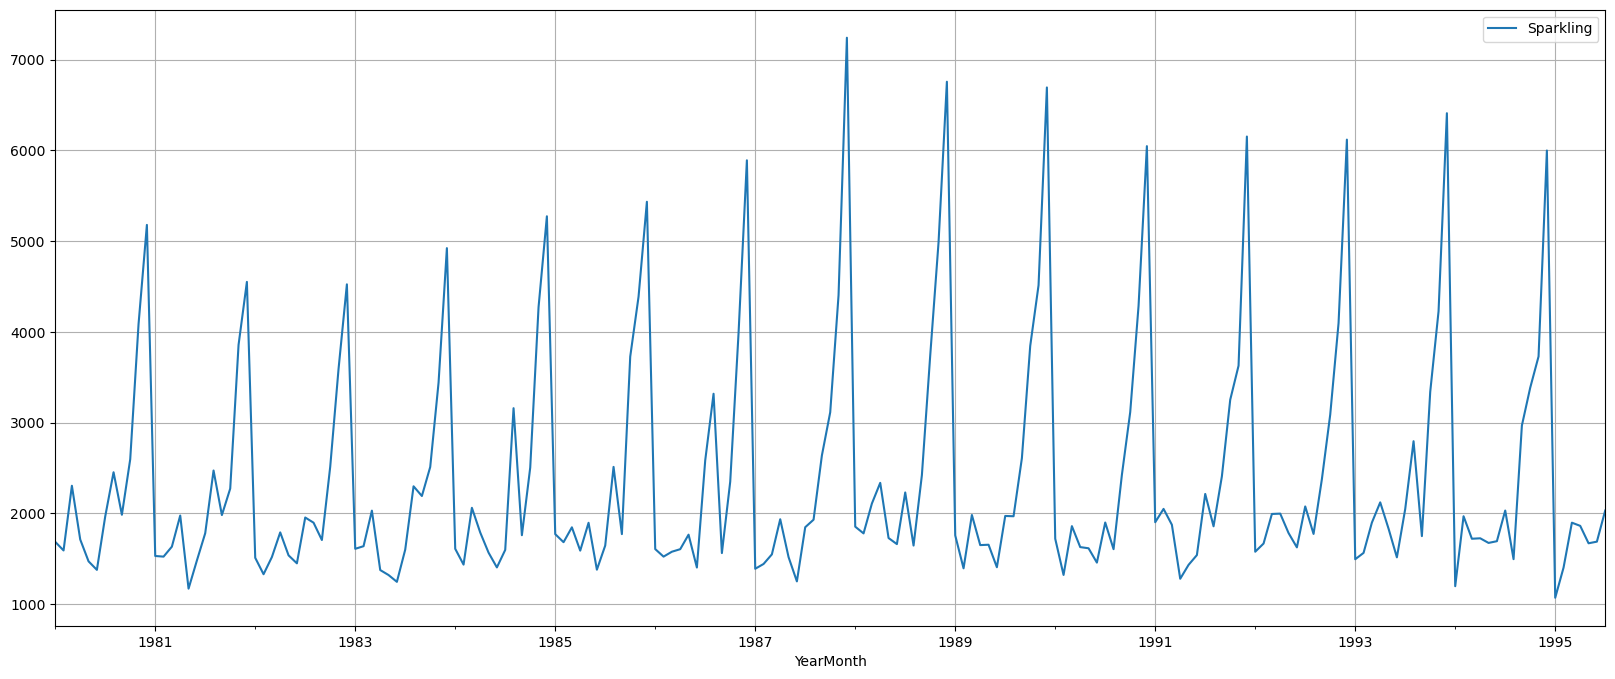

In [11]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [12]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [13]:
df.shape

(187, 3)

### Perform EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
 1   Year       187 non-null    int32
 2   Month      187 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 4.4 KB


In [15]:
df[df.Month==7]

Sparkling  Year  Month
YearMonth                         
1980-07-01       1966  1980      7
1981-07-01       1781  1981      7
1982-07-01       1954  1982      7
1983-07-01       1600  1983      7
1984-07-01       1597  1984      7
1985-07-01       1645  1985      7
1986-07-01       2584  1986      7
1987-07-01       1847  1987      7
1988-07-01       2230  1988      7
1989-07-01       1971  1989      7
1990-07-01       1899  1990      7
1991-07-01       2214  1991      7
1992-07-01       2076  1992      7
1993-07-01       2048  1993      7
1994-07-01       2031  1994      7
1995-07-01       2031  1995      7

In [16]:
#We will resample the data to get values at a month-level from the day-level data by taking the average over the months.

df = df.resample('M').mean()
df.head()

Sparkling    Year  Month
YearMonth                           
1980-01-31     1686.0  1980.0    1.0
1980-02-29     1591.0  1980.0    2.0
1980-03-31     2304.0  1980.0    3.0
1980-04-30     1712.0  1980.0    4.0
1980-05-31     1471.0  1980.0    5.0

In [17]:
df.shape#Find the shape of the data after resampling

(187, 3)

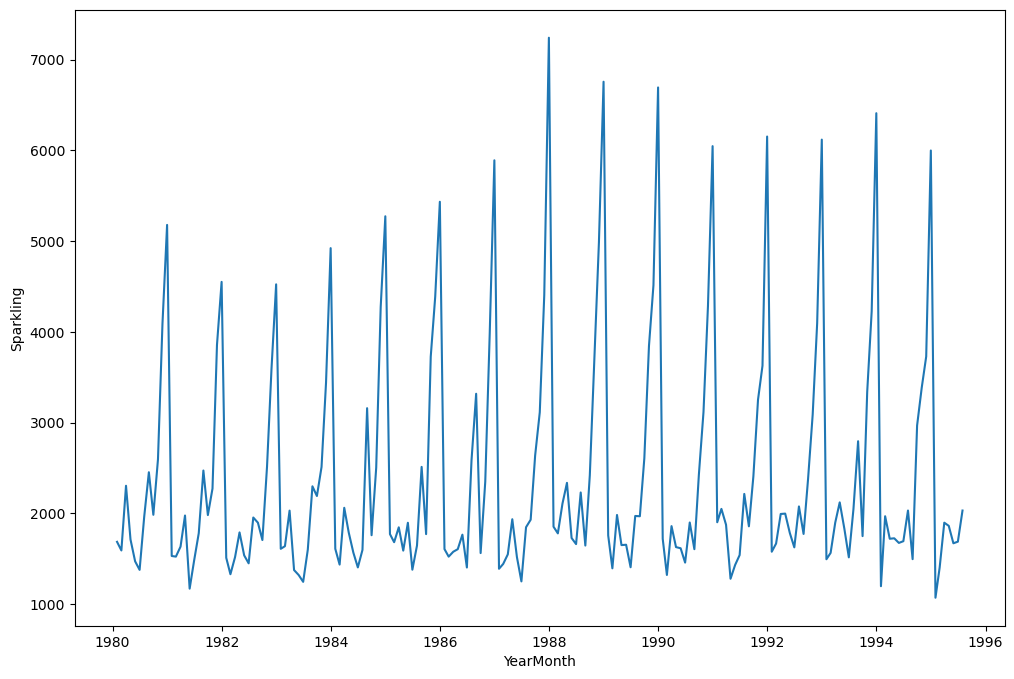

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Sparkling') #to find the trend of Sparkling at year-month level
plt.show()

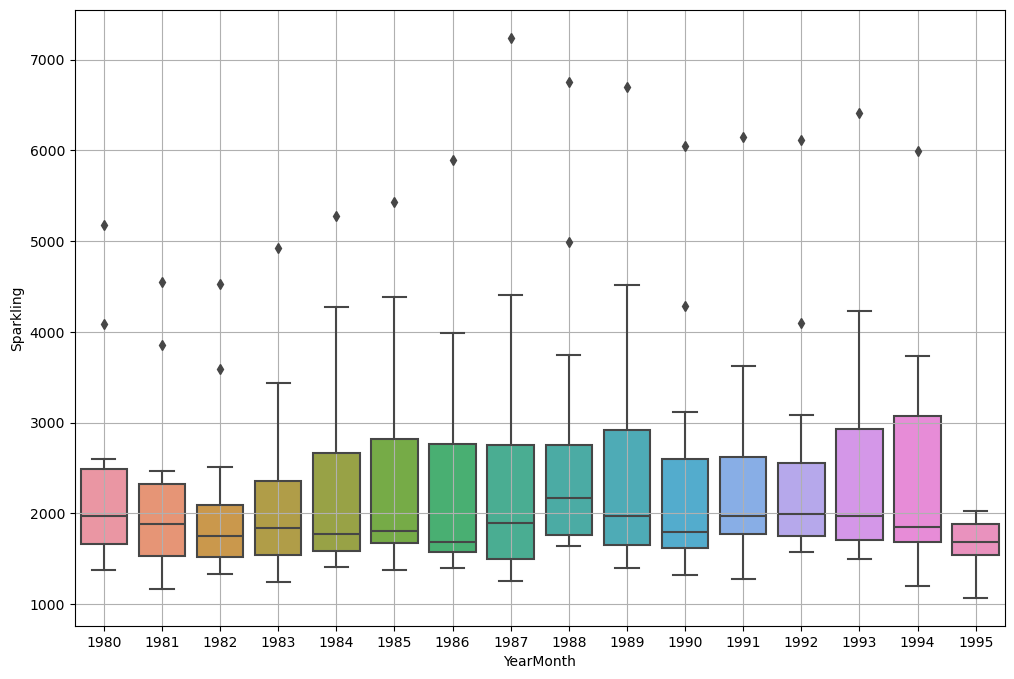

In [19]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.index.year,y = 'Sparkling',data=df) # to plot a boxplot at year level
plt.grid();

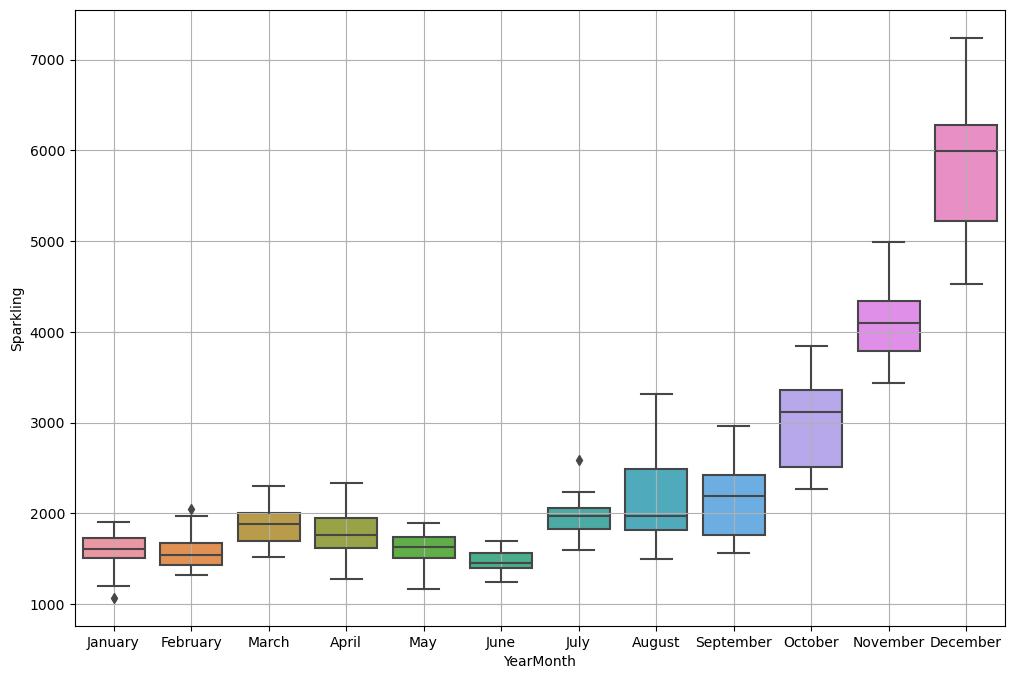

In [20]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.index.month_name(),y = 'Sparkling',data=df) # Complete the code to plot a boxplot at month level
plt.grid();

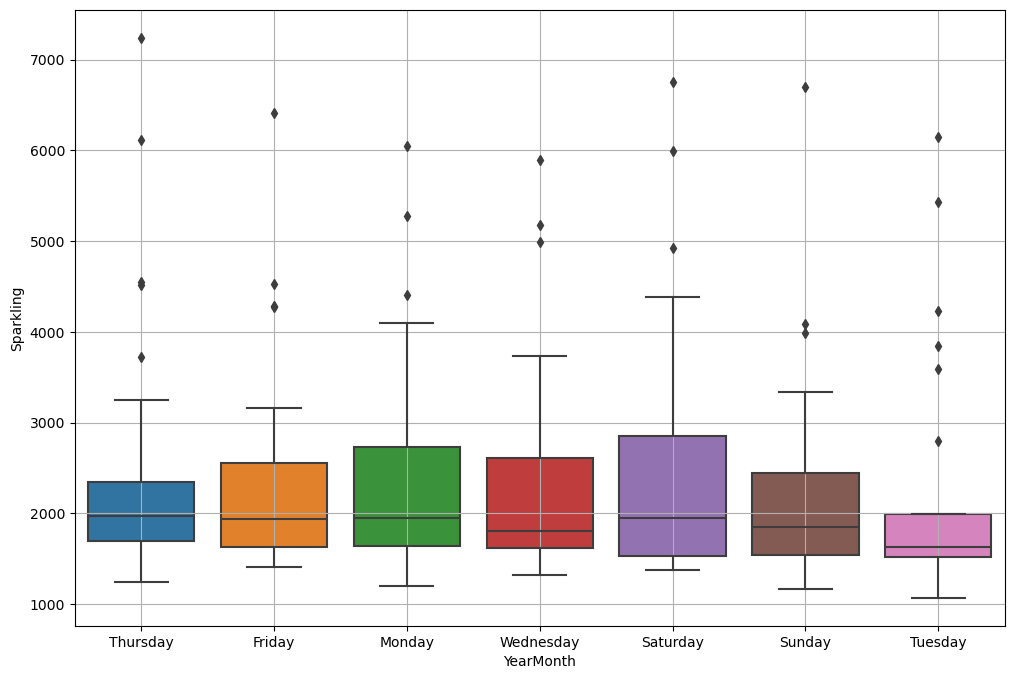

In [21]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.index.day_name(),y = 'Sparkling',data=df) # Complete the code to plot a boxplot at week level
plt.grid();

In [22]:
#a pivot table to display monthly price across years
monthly_price_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_price_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

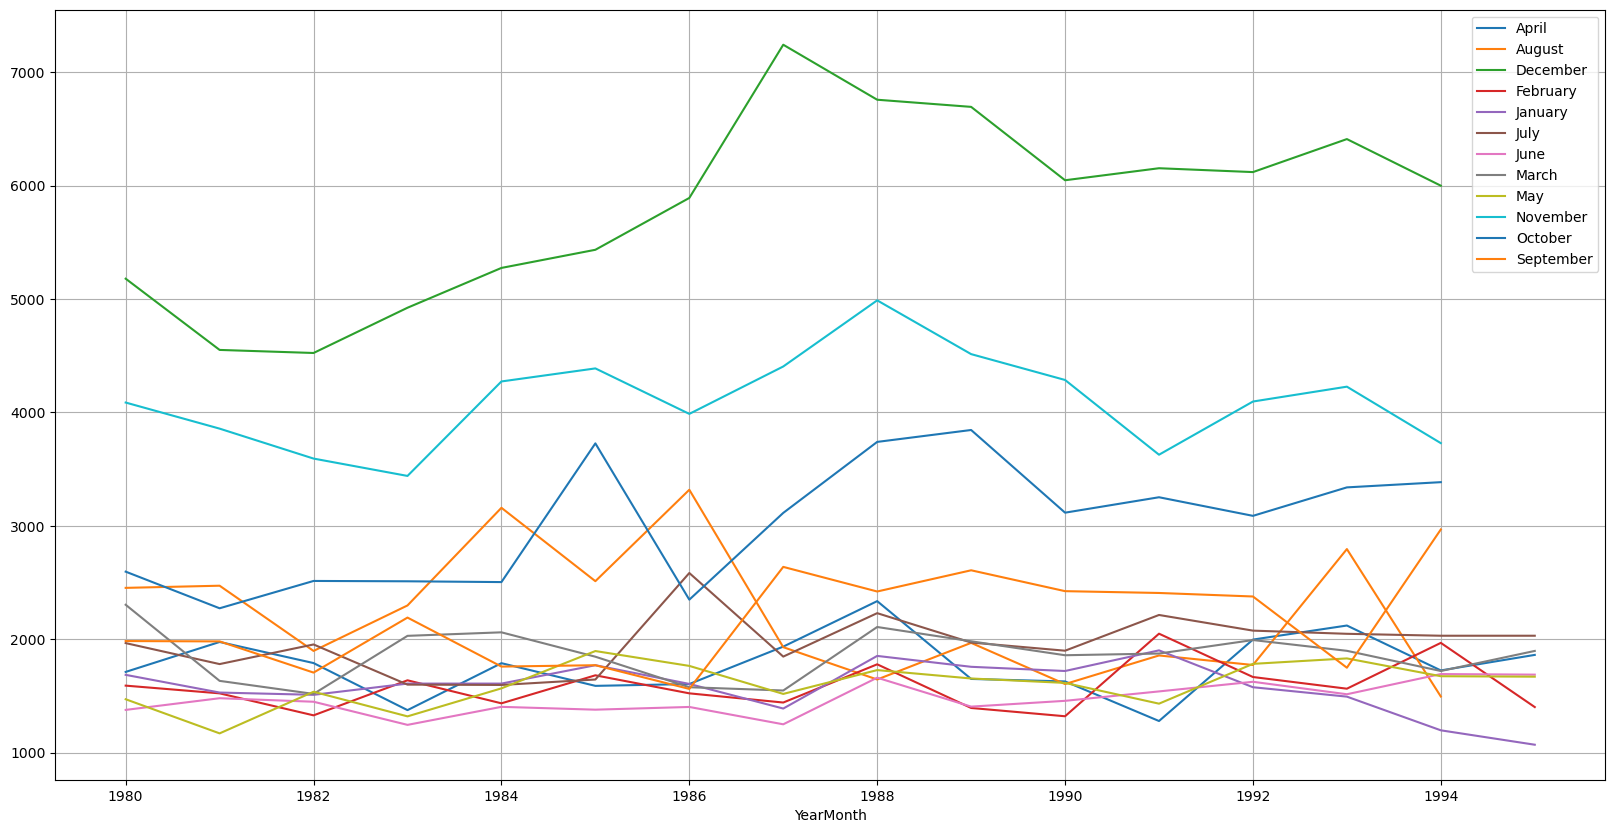

In [23]:
# Set the figure size
monthly_price_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend();

### Correlation plot

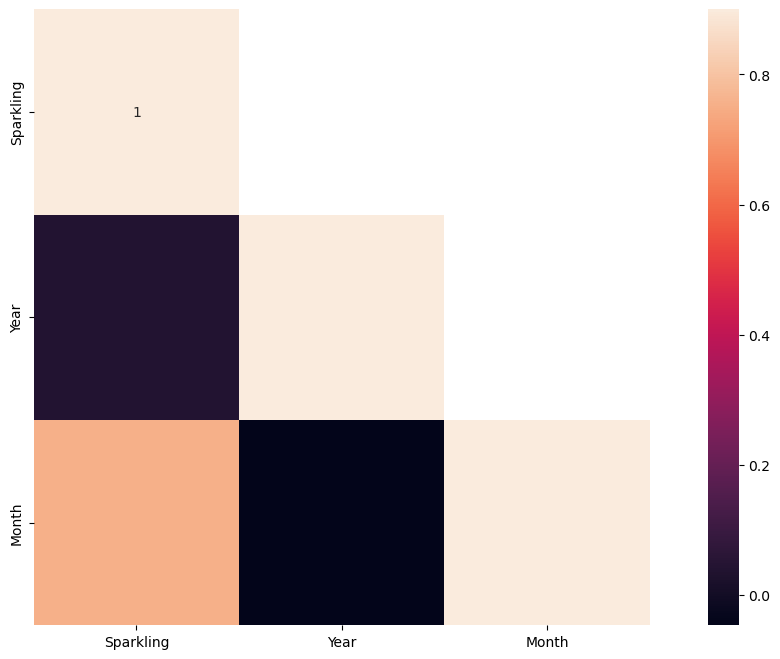

In [24]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

In [25]:
print(corr_all)

           Sparkling      Year     Month
Sparkling   1.000000  0.039035  0.752337
Year        0.039035  1.000000 -0.046502
Month       0.752337 -0.046502  1.000000


### Plot ECDF: Empirical Cumulative Distribution Function

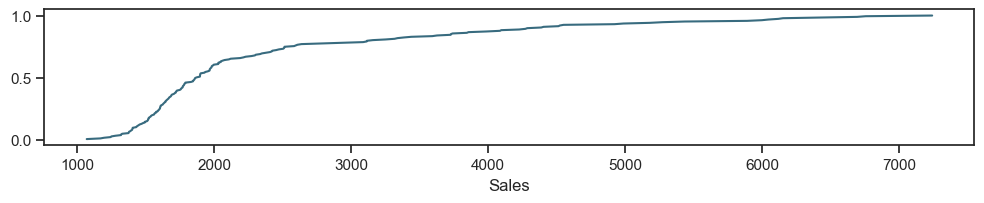

In [26]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

In [27]:
print(cdf.x)

[ -inf 1070. 1170. 1197. 1245. 1250. 1279. 1320. 1321. 1329. 1375. 1377.
 1379. 1389. 1394. 1402. 1403. 1404. 1406. 1432. 1435. 1442. 1449. 1457.
 1471. 1480. 1494. 1495. 1510. 1515. 1518. 1518. 1523. 1523. 1530. 1537.
 1540. 1548. 1562. 1564. 1567. 1577. 1577. 1589. 1591. 1597. 1600. 1605.
 1605. 1606. 1609. 1609. 1615. 1625. 1628. 1633. 1638. 1645. 1645. 1650.
 1654. 1661. 1667. 1670. 1674. 1682. 1686. 1688. 1693. 1706. 1712. 1720.
 1720. 1725. 1728. 1749. 1757. 1759. 1765. 1771. 1771. 1773. 1779. 1781.
 1783. 1789. 1790. 1831. 1846. 1847. 1853. 1857. 1859. 1862. 1874. 1896.
 1897. 1897. 1898. 1899. 1902. 1930. 1935. 1954. 1966. 1968. 1968. 1971.
 1976. 1981. 1982. 1984. 1993. 1997. 2030. 2031. 2031. 2048. 2049. 2061.
 2076. 2108. 2121. 2191. 2214. 2230. 2273. 2298. 2304. 2336. 2349. 2377.
 2408. 2421. 2424. 2453. 2472. 2504. 2511. 2512. 2514. 2584. 2596. 2608.
 2638. 2795. 2968. 3088. 3114. 3116. 3159. 3252. 3318. 3339. 3385. 3440.
 3593. 3627. 3727. 3729. 3740. 3845. 3857. 3987. 40

In [28]:
print(cdf.y)

[0.         0.00534759 0.01069519 0.01604278 0.02139037 0.02673797
 0.03208556 0.03743316 0.04278075 0.04812834 0.05347594 0.05882353
 0.06417112 0.06951872 0.07486631 0.0802139  0.0855615  0.09090909
 0.09625668 0.10160428 0.10695187 0.11229947 0.11764706 0.12299465
 0.12834225 0.13368984 0.13903743 0.14438503 0.14973262 0.15508021
 0.16042781 0.1657754  0.17112299 0.17647059 0.18181818 0.18716578
 0.19251337 0.19786096 0.20320856 0.20855615 0.21390374 0.21925134
 0.22459893 0.22994652 0.23529412 0.24064171 0.2459893  0.2513369
 0.25668449 0.26203209 0.26737968 0.27272727 0.27807487 0.28342246
 0.28877005 0.29411765 0.29946524 0.30481283 0.31016043 0.31550802
 0.32085561 0.32620321 0.3315508  0.3368984  0.34224599 0.34759358
 0.35294118 0.35828877 0.36363636 0.36898396 0.37433155 0.37967914
 0.38502674 0.39037433 0.39572193 0.40106952 0.40641711 0.41176471
 0.4171123  0.42245989 0.42780749 0.43315508 0.43850267 0.44385027
 0.44919786 0.45454545 0.45989305 0.46524064 0.47058824 0.47593

### Decomposition

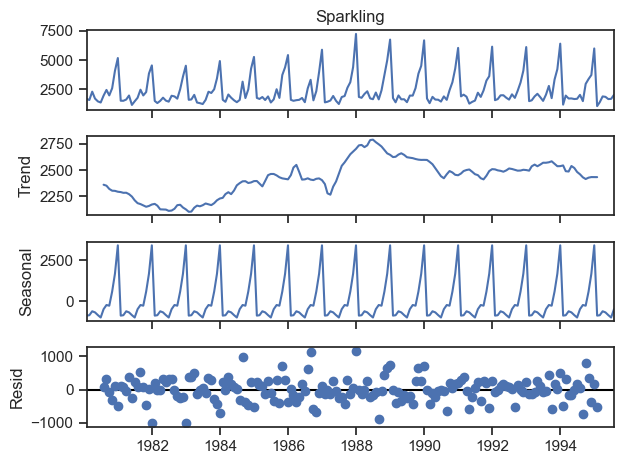

In [29]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Freq: M, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10

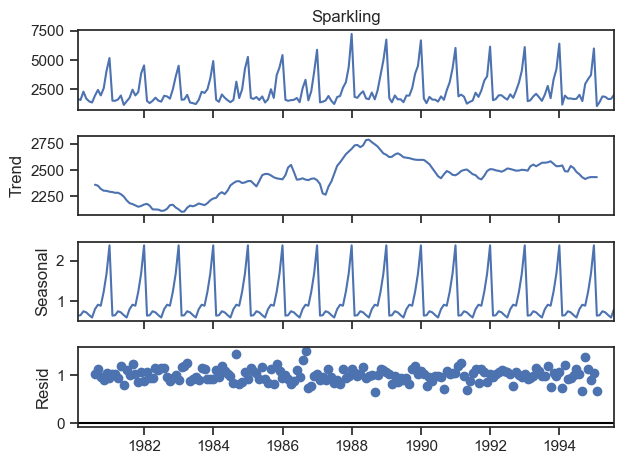

In [31]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [32]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Freq: M, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0

### Data Pre-processing

#### Split the data into train and test and plot the training and test data. The test data should start in 1991.

In [33]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [34]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling    Year  Month
YearMonth                           
1980-01-31     1686.0  1980.0    1.0
1980-02-29     1591.0  1980.0    2.0
1980-03-31     2304.0  1980.0    3.0
1980-04-30     1712.0  1980.0    4.0
1980-05-31     1471.0  1980.0    5.0

Last few rows of Training Data


Sparkling    Year  Month
YearMonth                           
1990-08-31     1605.0  1990.0    8.0
1990-09-30     2424.0  1990.0    9.0
1990-10-31     3116.0  1990.0   10.0
1990-11-30     4286.0  1990.0   11.0
1990-12-31     6047.0  1990.0   12.0

First few rows of Test Data


Sparkling    Year  Month
YearMonth                           
1991-01-31     1902.0  1991.0    1.0
1991-02-28     2049.0  1991.0    2.0
1991-03-31     1874.0  1991.0    3.0
1991-04-30     1279.0  1991.0    4.0
1991-05-31     1432.0  1991.0    5.0

Last few rows of Test Data


Sparkling    Year  Month
YearMonth                           
1995-03-31     1897.0  1995.0    3.0
1995-04-30     1862.0  1995.0    4.0
1995-05-31     1670.0  1995.0    5.0
1995-06-30     1688.0  1995.0    6.0
1995-07-31     2031.0  1995.0    7.0

In [35]:
#Complete the code to check the shape of train and test sets
print("Train: ",train.shape)
print("Test: ",test.shape)

Train:  (132, 3)
Test:  (55, 3)


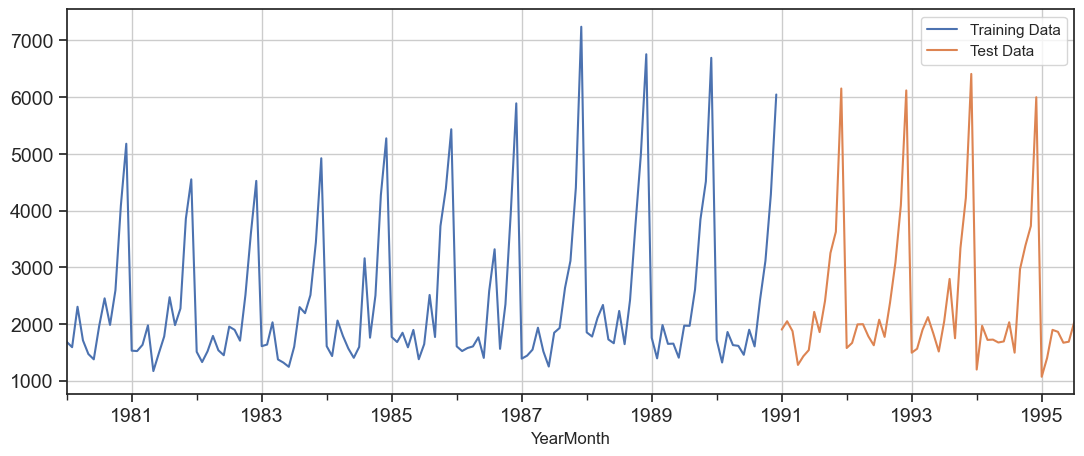

In [36]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14) #Complete the code to find the trend of train data
plt.grid()
test['Sparkling'].plot(figsize=(13,5), fontsize=14)  #Complete the code to find the trend of test data
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model Building - Original Data

### Linear Regression

In [37]:
#Complete the code to generate the numerical time instance order for both the training and test set.
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling    Year  Month  time
YearMonth                                 
1980-01-31     1686.0  1980.0    1.0     1
1980-02-29     1591.0  1980.0    2.0     2
1980-03-31     2304.0  1980.0    3.0     3
1980-04-30     1712.0  1980.0    4.0     4
1980-05-31     1471.0  1980.0    5.0     5 

Last few rows of Training Data 
             Sparkling    Year  Month  time
YearMonth                                 
1990-08-31     1605.0  1990.0    8.0   128
1990-09-30     2424.0  1990.0    9.0   129
1990-10-31     3116.0  1990.0   10.0   130
1990-11-30     4286.0  1990.0   11.0   131
1990-12-31     6047.0  1990.0   12.0   132 

First few rows of Test Data 
             Sparkling    Year  Month  time
YearMonth                                 
1991-01-31     1902.0  1991.0    1.0   132
1991-02-28     2049.0  1991.0    2.0   133
1991-03-31     1874.0  1991.0    3.0   134
1991-04-30     1279.0  1991.0    4.0   135
1991-05-31     1432.0  1991.0    5.0   

* Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
  to build the model on the training data and test the model on the test data.

In [40]:
lr = LinearRegression() #Complete the code to define the linear regression model

In [41]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

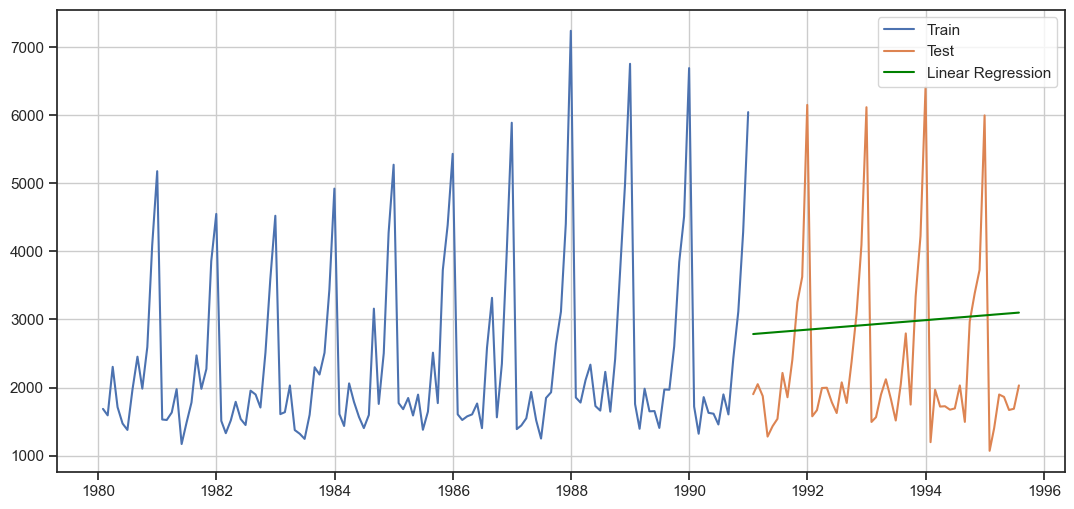

In [42]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])  #Complete the code to make predictions
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green') # Complete the code to plot the predictions made by the model
plt.legend(loc='best')
plt.grid();

In [43]:
## Test Data - RMSE

rmse_model1_test = mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False) # Complete the code to find the RMSE on test data
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1386.84


In [44]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1386.836243

### Moving Average (MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [45]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling    Year  Month
YearMonth                           
1980-01-31     1686.0  1980.0    1.0
1980-02-29     1591.0  1980.0    2.0
1980-03-31     2304.0  1980.0    3.0
1980-04-30     1712.0  1980.0    4.0
1980-05-31     1471.0  1980.0    5.0

In [46]:
#Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean() #to find 2 point trailing average
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean() #to find 4 point trailing average
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean() #to find 6 point trailing average
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean() #to find 9 point trailing average

MovingAverage.head()

Sparkling    Year  Month  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                                  
1980-01-31     1686.0  1980.0    1.0         NaN         NaN         NaN   
1980-02-29     1591.0  1980.0    2.0      1638.5         NaN         NaN   
1980-03-31     2304.0  1980.0    3.0      1947.5         NaN         NaN   
1980-04-30     1712.0  1980.0    4.0      2008.0     1823.25         NaN   
1980-05-31     1471.0  1980.0    5.0      1591.5     1769.50         NaN   

            Trailing_9  
YearMonth               
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

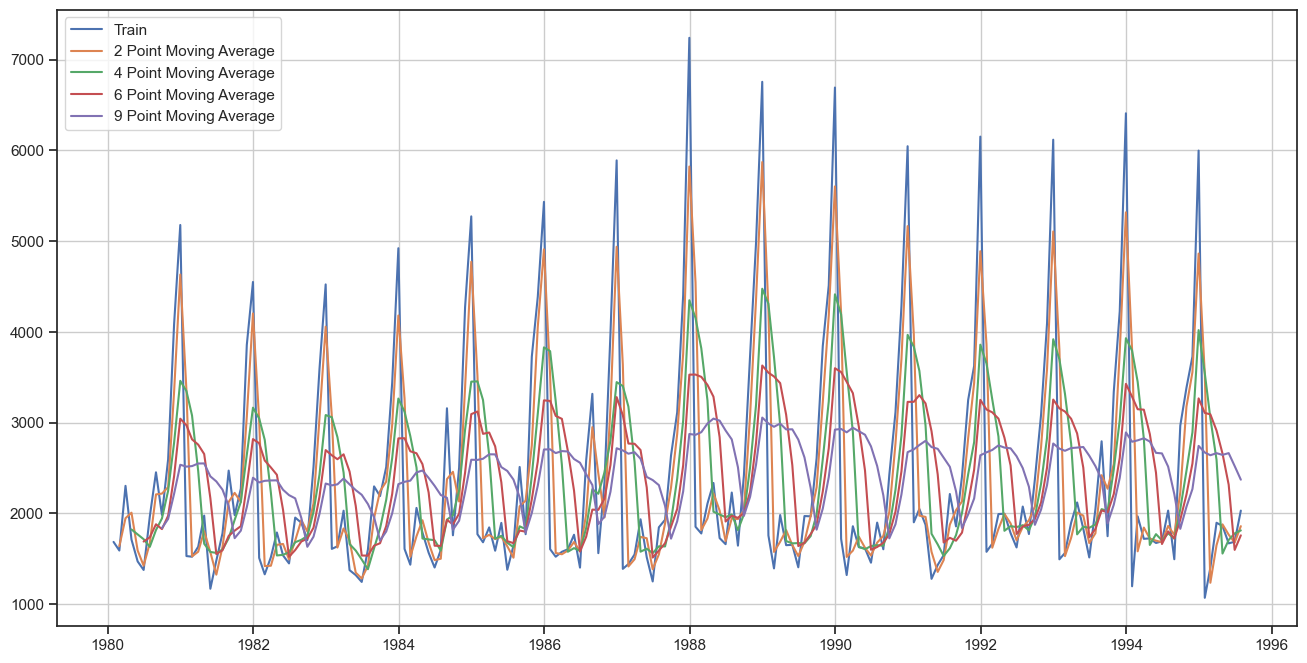

In [47]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average') #Complete the code to plot the 2 point moving average
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average') #Complete the code to plot the 4 point moving average
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average') #Complete the code to plot the 6 point moving average
plt.plot(MovingAverage['Trailing_9'], label='9 Point Moving Average') #Complete the code to plot the 9 point moving average

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [48]:
#Creating train and test set
trailing_MovingAverage_train= MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test= MovingAverage[MovingAverage.index >= '1991-01-01']


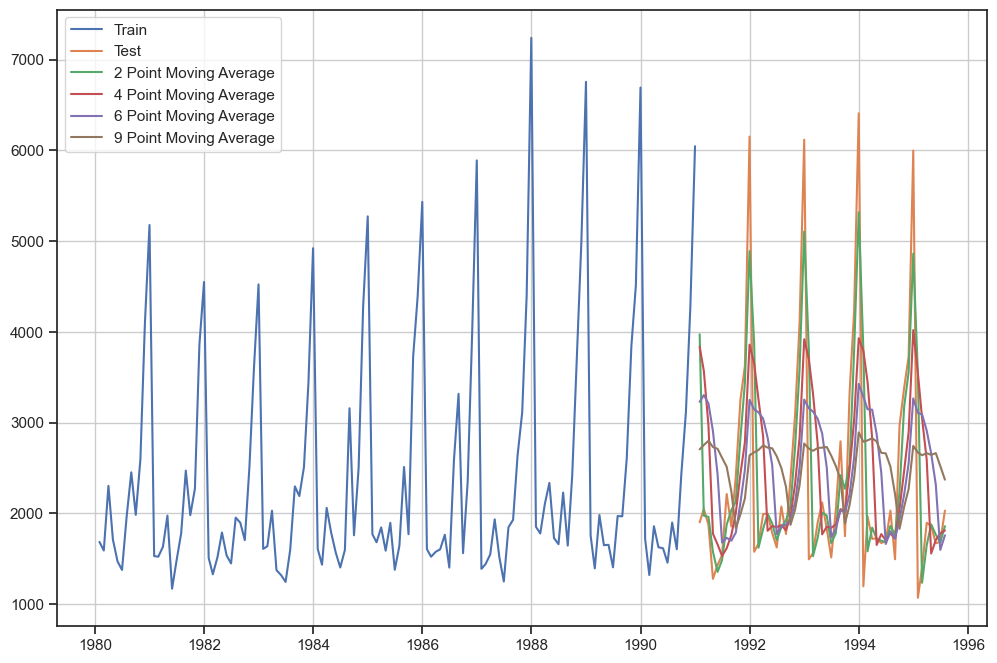

In [49]:
## Plotting on the whole data

plt.figure(figsize=(12,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average') #Complete the code to plot the 2 point moving average
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Moving Average') #Complete the code to plot the 4 point moving average
plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Moving Average') #Complete the code to plot the 6 point moving average
plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Moving Average') #Complete the code to plot the 9 point moving average

plt.legend(loc = 'best')
plt.grid();

In [50]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False) #Complete the code to find the RMSE for 2 point moving average
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False) #Complete the code to find the RMSE for 4 point moving average
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)   #Complete the code to find the RMSE for 6 point moving average
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))


## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)  #Complete the code to find the RMSE for 9 point moving average
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278


In [51]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            1386.836243
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

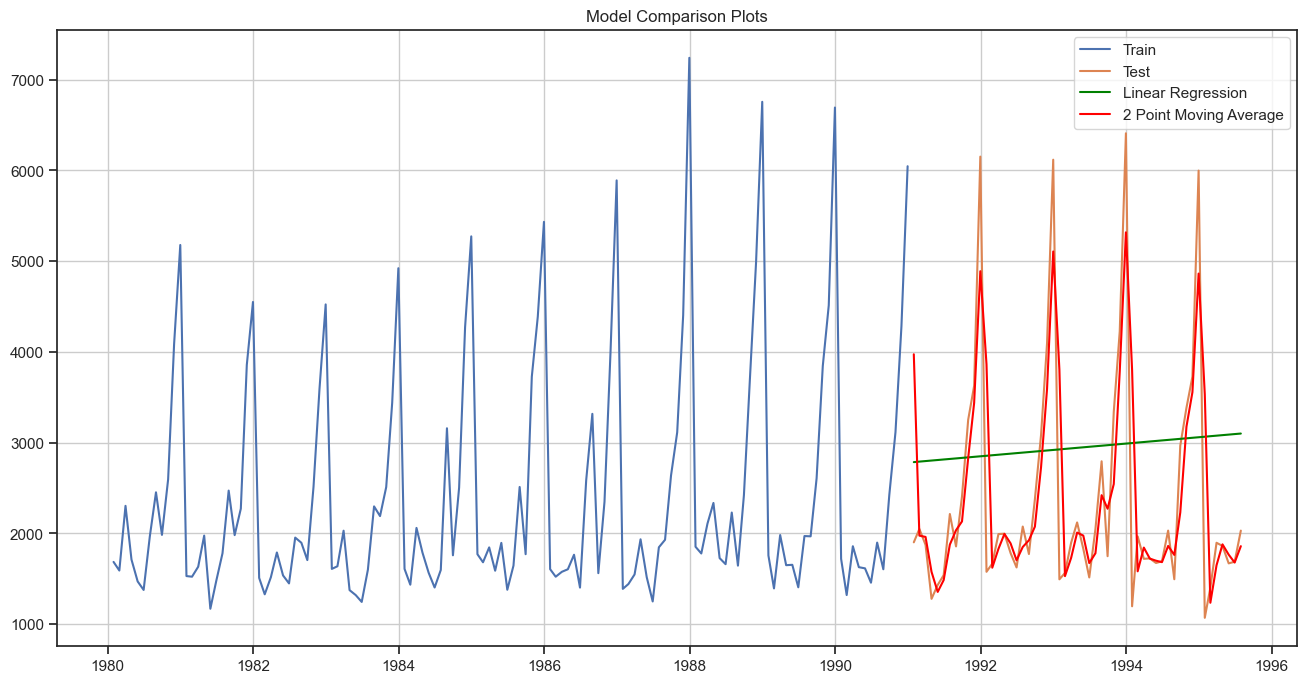

In [52]:
## Plotting on both Training and Test data

plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

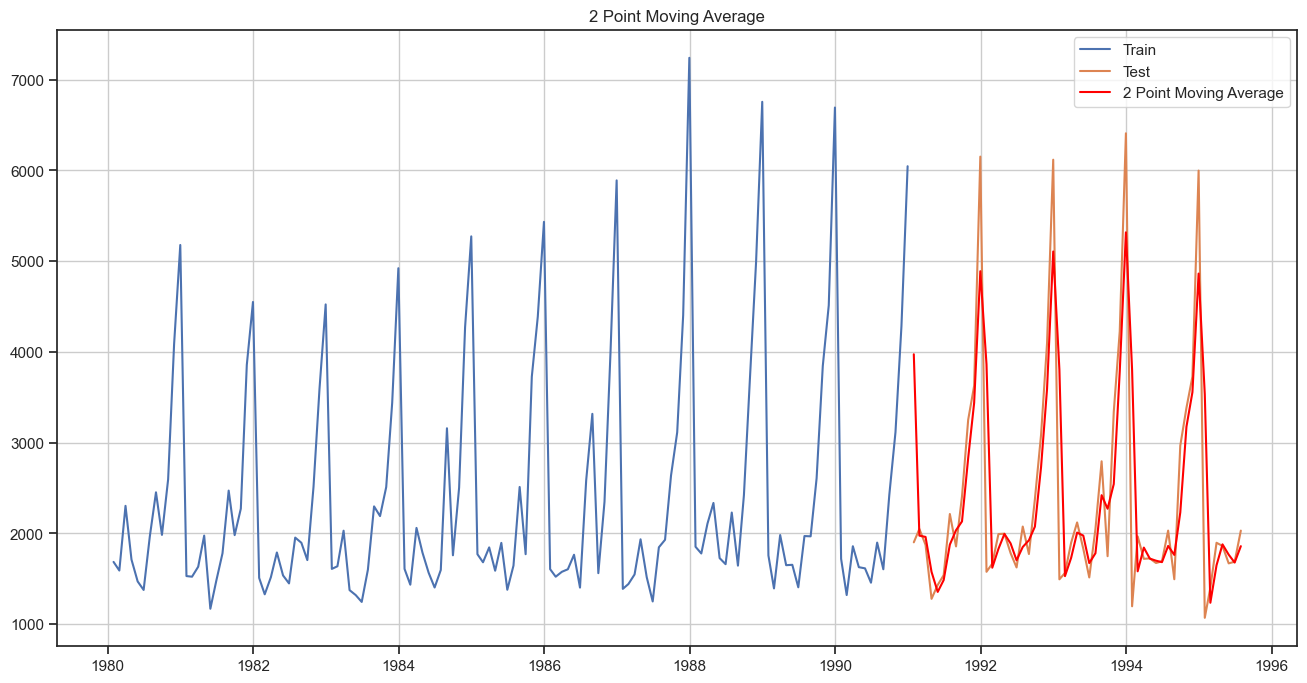

In [53]:
## Plotting on both Training and Test data

plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')


plt.legend(loc='best')
plt.title("2 Point Moving Average")
plt.grid();

### Simple Exponential Smoothening Models

In [54]:
SES_train = train.copy()
SES_test = test.copy()

In [55]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling']) #Define the simple exponential smoothening model

In [56]:
model_SES_autofit = model_SES.fit(optimized=True)   #Fit the simple exponential smoothening model

In [57]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))   #Forecast the model
SES_test.head()

Sparkling    Year  Month      predict
YearMonth                                        
1991-01-31     1902.0  1991.0    1.0  2676.676366
1991-02-28     2049.0  1991.0    2.0  2676.676366
1991-03-31     1874.0  1991.0    3.0  2676.676366
1991-04-30     1279.0  1991.0    4.0  2676.676366
1991-05-31     1432.0  1991.0    5.0  2676.676366

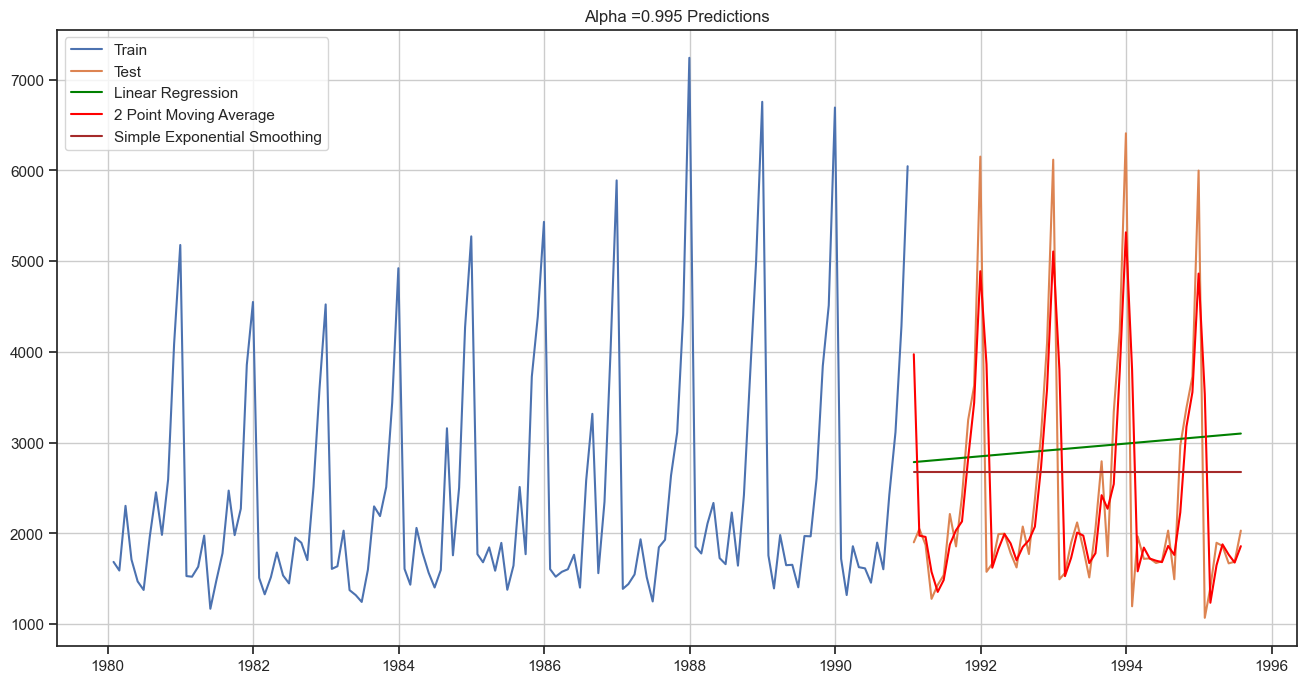

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

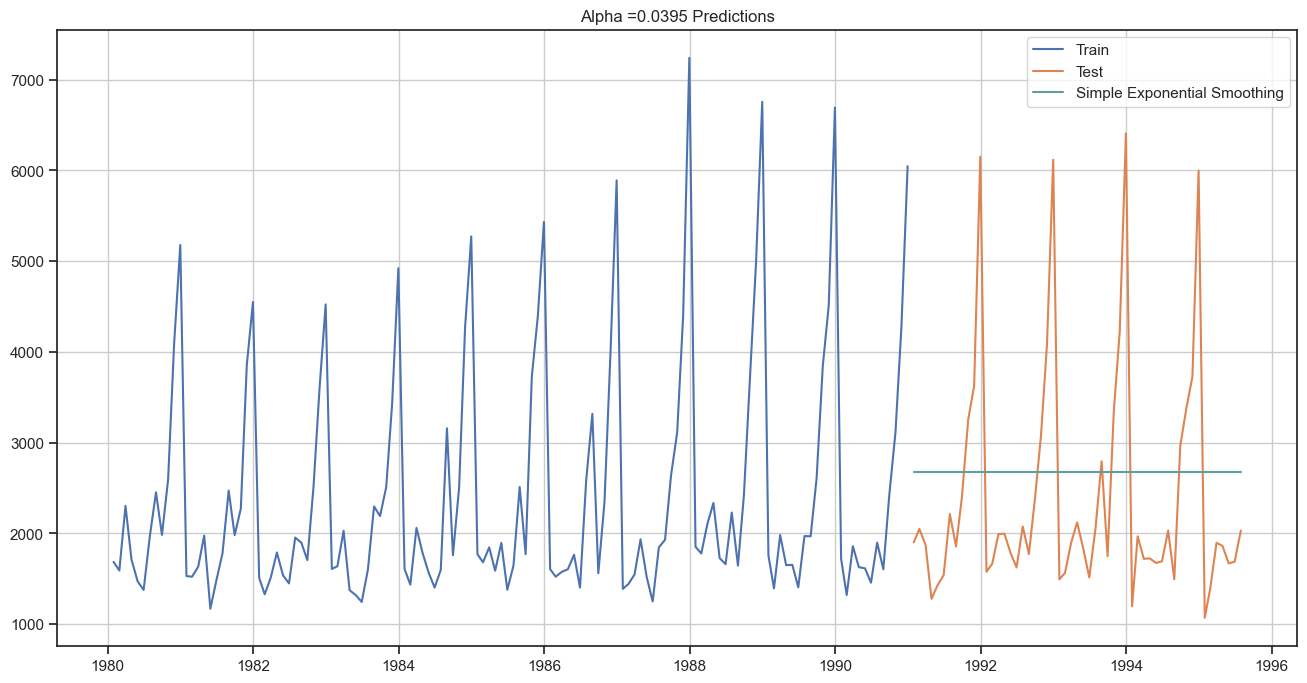

In [60]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='cadetblue')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0395 Predictions');

* Model Evaluation for 𝛼 = 0.0395 : Simple Exponential Smoothing

In [61]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model5_test_1 = mean_squared_error(SES_test['Sparkling'], SES_test['predict'],squared=False)
print("Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [62]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0395,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                        1386.836243
2pointTrailingMovingAverage               813.400684
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
9pointTrailingMovingAverage              1346.278315
Alpha=0.0395,SimpleExponentialSmoothing  1304.927405

### Double Exponential Smoothening (Holt's Model)
Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [63]:
DES_train = train.copy()
DES_test = test.copy()

In [64]:
model_DES = Holt(DES_train['Sparkling'])

In [65]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [66]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling    Year  Month      predict
YearMonth                                        
1991-01-31     1902.0  1991.0    1.0  5221.278699
1991-02-28     2049.0  1991.0    2.0  5127.886554
1991-03-31     1874.0  1991.0    3.0  5034.494409
1991-04-30     1279.0  1991.0    4.0  4941.102264
1991-05-31     1432.0  1991.0    5.0  4847.710119

In [68]:

## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [69]:
resultsDf_6 = []
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        # Append results as a dictionary
        resultsDf_6.append({'Alpha Values': i, 'Beta Values': j, 'Train RMSE': rmse_model6_train, 'Test RMSE': rmse_model6_test})
resultsDf_6
resultsDf_7 = pd.DataFrame(resultsDf_6)
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

In [70]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

In [71]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][2]]}
                           ,index=['Alpha=0.1,Beta=0.1, Double Exponential Smoothing prediction'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf


Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870

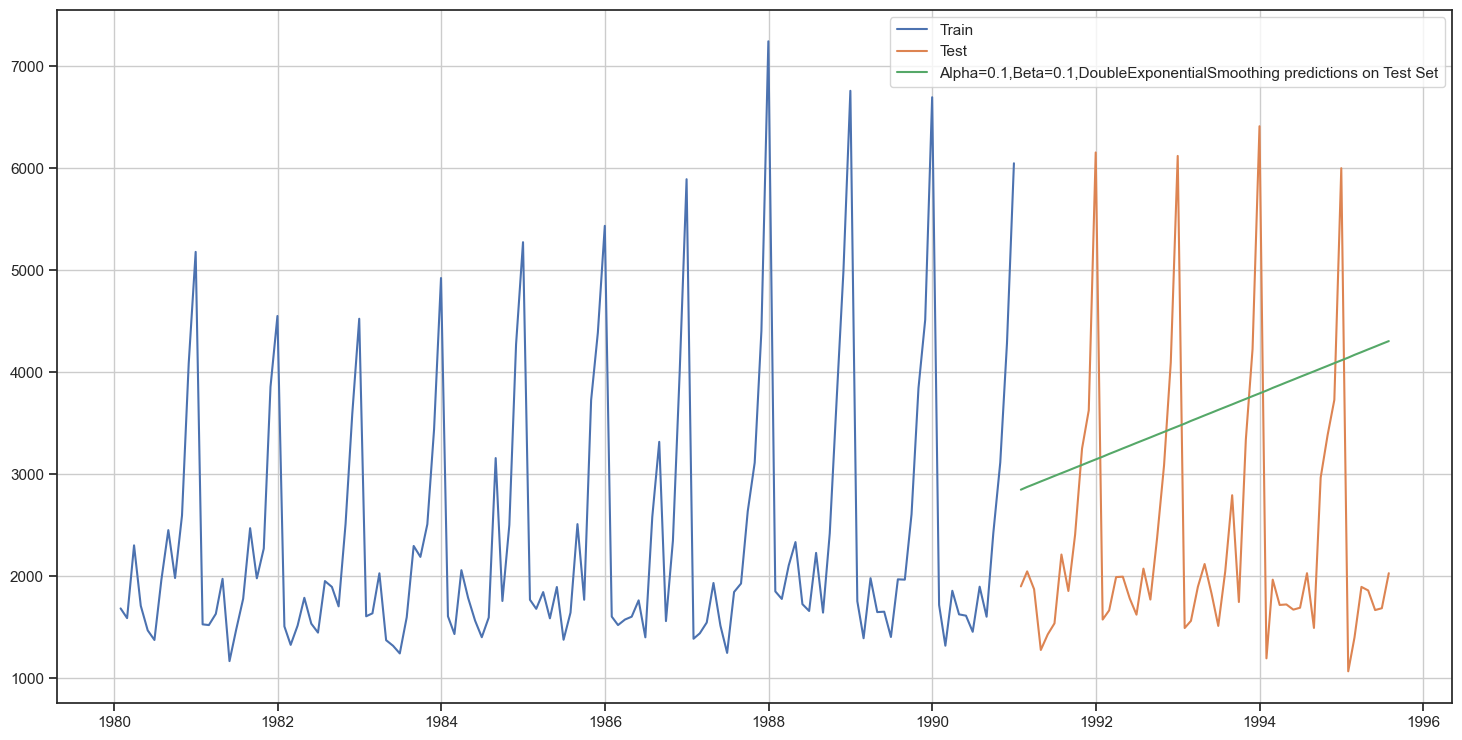

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

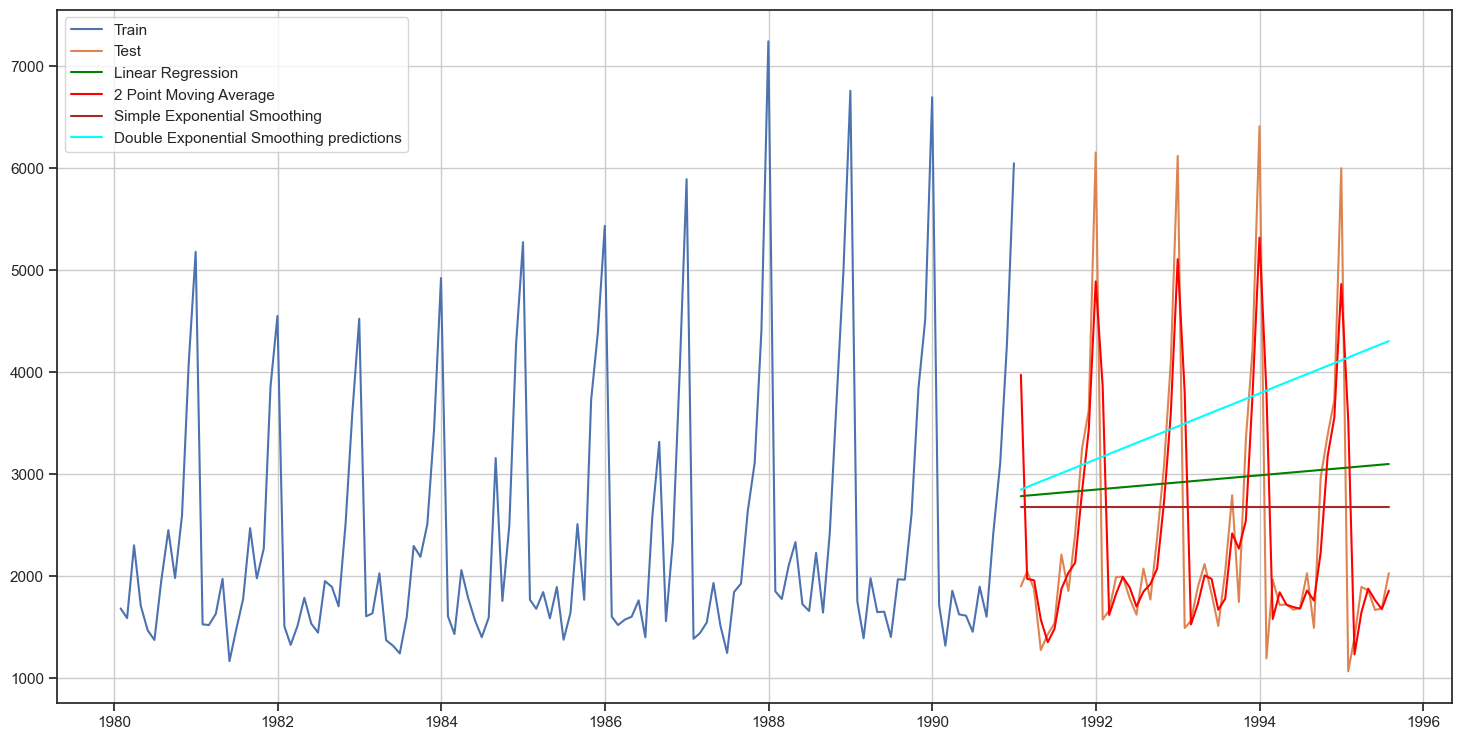

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')


plt.legend(loc='best')
plt.grid();

In [74]:
## Test Data

rmse_model_temp = mean_squared_error(DES_test['Sparkling'],DES_test['predict',0.1,0.1],squared=False)
print("𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1778.565


In [75]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model_temp]},index=['𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670

### Naive Approach

In [76]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [77]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-31    6047.0
1991-02-28    6047.0
1991-03-31    6047.0
1991-04-30    6047.0
1991-05-31    6047.0
Freq: M, Name: naive, dtype: float64

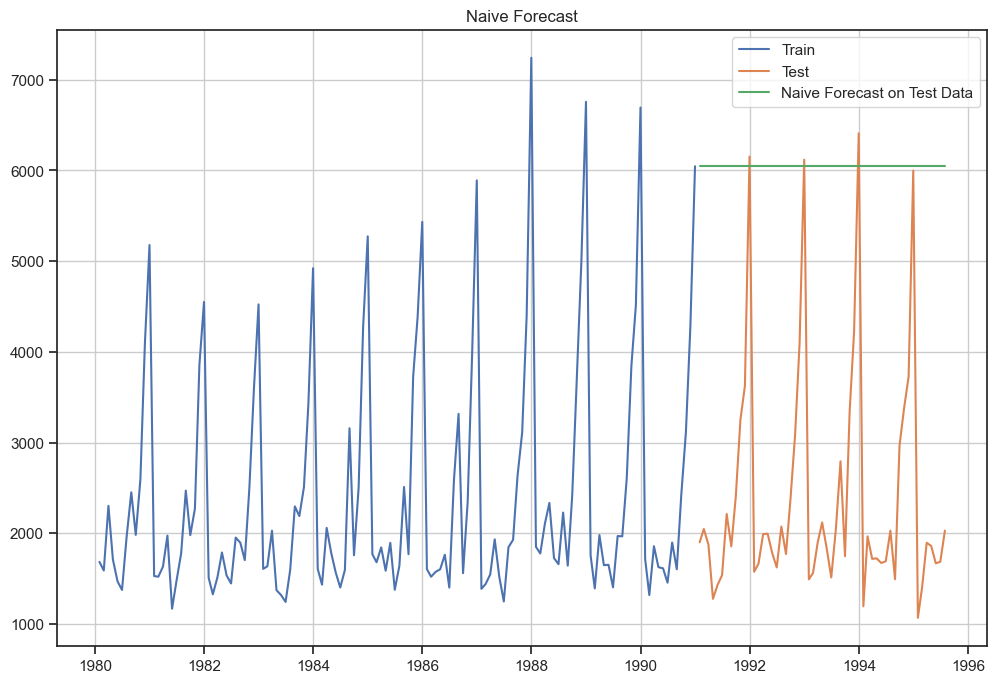

In [78]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [79]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model2_test_1 = mean_squared_error(NaiveModel_test['Sparkling'], NaiveModel_test['naive'],squared=False)
print("Naive Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test_1))


Naive Model forecast on the Test Data, RMSE is 3864.279


In [80]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_1]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352

In [81]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
Linear Regression                                   1386.836243
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352

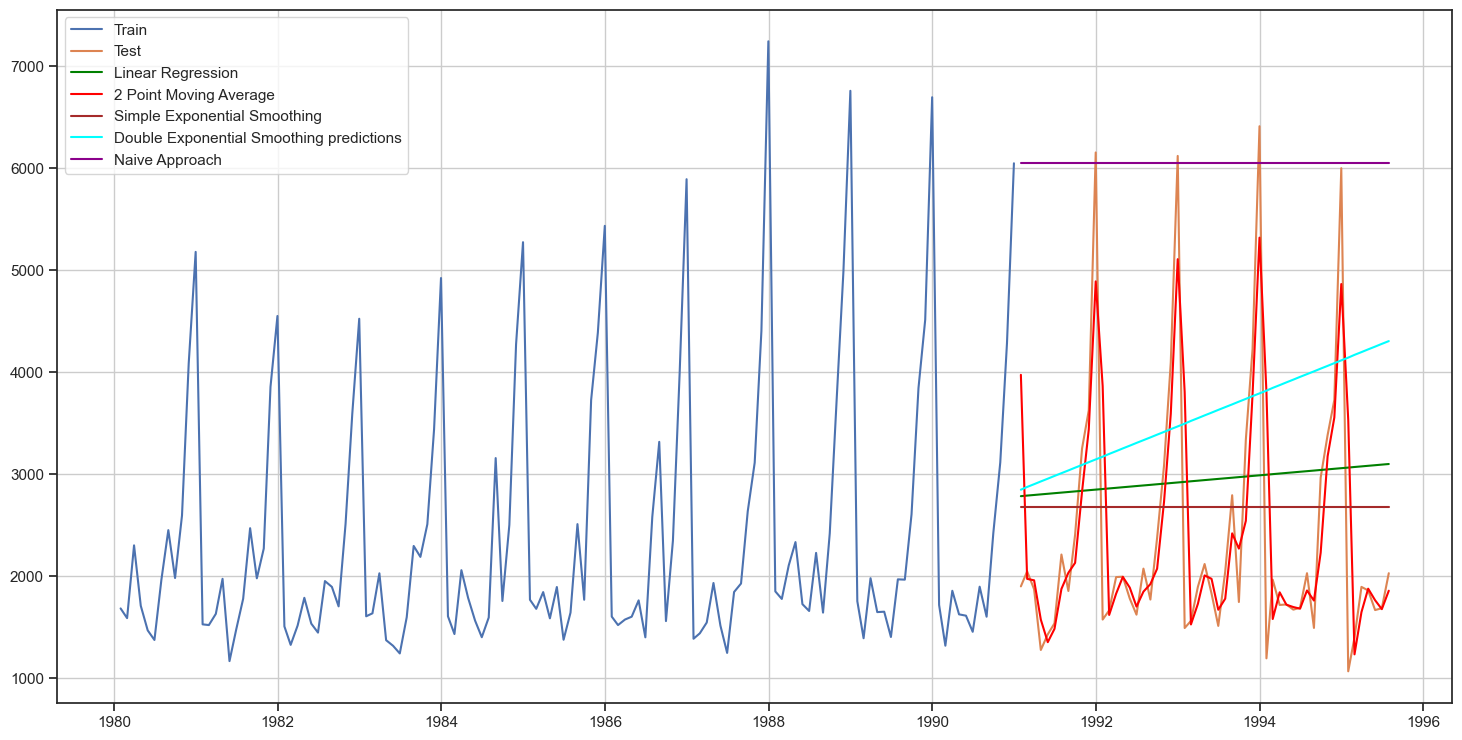

In [82]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')


plt.legend(loc='best')
plt.grid();

### Simple Average

In [83]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [84]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling    Year  Month  mean_forecast
YearMonth                                          
1991-01-31     1902.0  1991.0    1.0    2403.780303
1991-02-28     2049.0  1991.0    2.0    2403.780303
1991-03-31     1874.0  1991.0    3.0    2403.780303
1991-04-30     1279.0  1991.0    4.0    2403.780303
1991-05-31     1432.0  1991.0    5.0    2403.780303

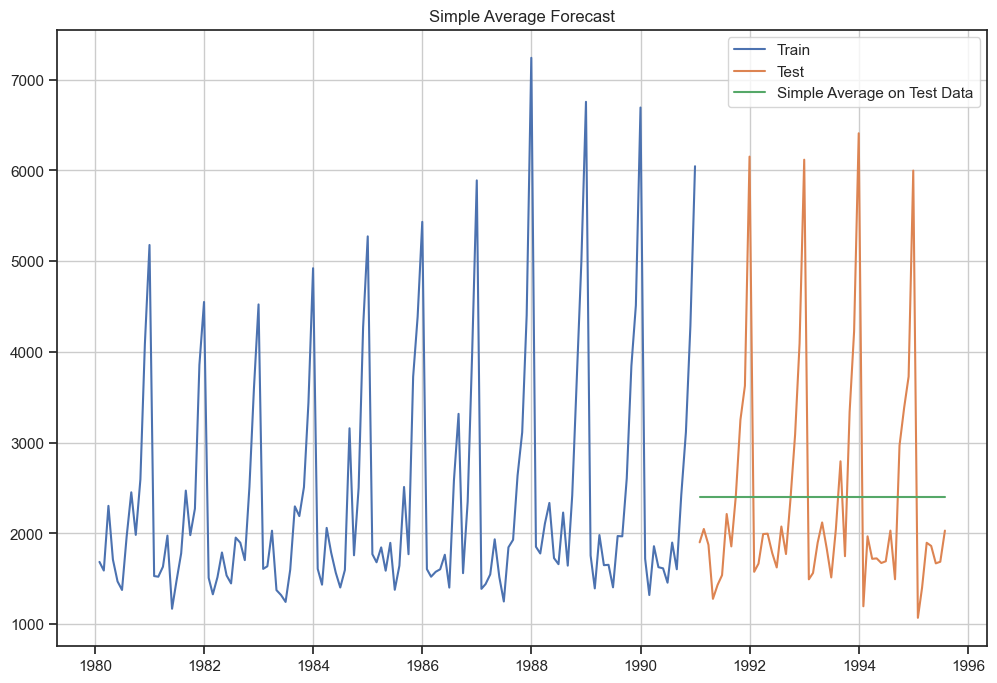

In [85]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [86]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model3_test_1 = mean_squared_error(SimpleAverage_test['Sparkling'], SimpleAverage_test['mean_forecast'],squared=False)
print("Simple Average forecast on the Test Data, RMSE is %3.3f" %(rmse_model3_test_1))


Simple Average forecast on the Test Data, RMSE is 1275.082


In [87]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352
Simple Average                                      1275.081804

In [88]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average                                      1275.081804
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
Linear Regression                                   1386.836243
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352

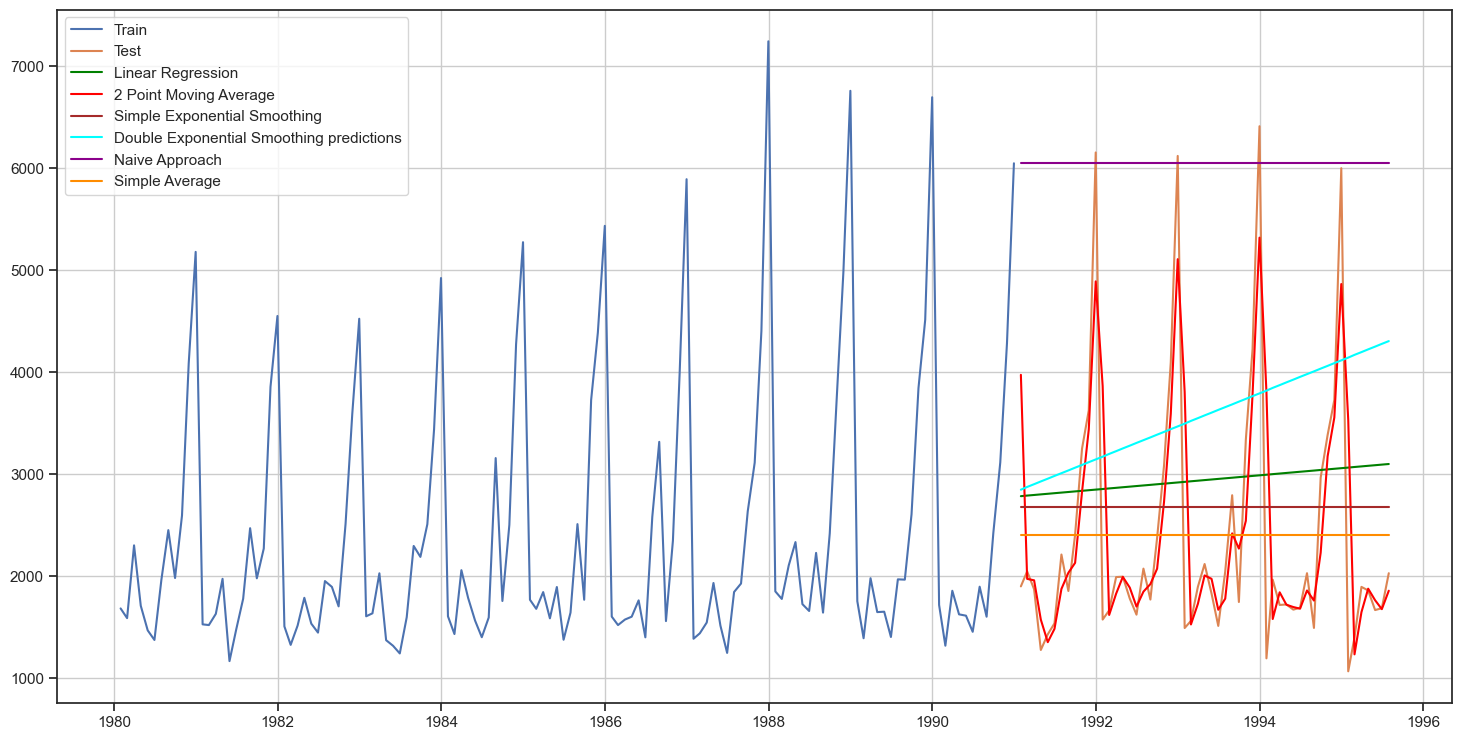

In [89]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')


plt.legend(loc='best')
plt.grid();

### Triple Exponential Smoothing (Holt - Winter's Model)

In [90]:
TES_train = train.copy()
TES_test = test.copy()

In [91]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='additive')


In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [93]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [94]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [95]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.11127227070058084,
 'smoothing_trend': 0.012360803767807805,
 'smoothing_seasonal': 0.46071766872684583,
 'damping_trend': nan,
 'initial_level': 2356.5778681222832,
 'initial_trend': -0.10270745178846165,
 'initial_seasons': array([-636.23324792, -722.98325584, -398.64405431, -473.43062126,
        -808.42495535, -815.3499128 , -384.23070619,   72.99473065,
        -237.44231481,  272.32597115, 1541.37736754, 2590.07675275]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11112895599385995,
 'smoothing_trend': 0.04938276235371962,
 'smoothing_seasonal': 0.3622465262795752,
 'damping_trend': nan,
 'initial_level': 2356.489512325504,
 'initial_trend': -9.617574734703803,
 'initial_seasons': array([0.71589551, 0.68542837, 0.90367452, 0.80815797, 0.65731141,
        0.65573983, 0.88627622, 1.13365285, 0.92335126, 1.21202174,
        1.87296336, 2.37776073]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107177677816653,
 'smoothing_trend': 0.04936524996401418,
 'smoothing_seasonal': 0.3621558972362866,
 'damping_trend': nan,
 'initial_level': 2356.541801052822,
 'initial_trend': 0.9987515146466076,
 'initial_seasons': array([0.73178205, 0.69831252, 0.89936207, 0.81024304, 0.66824576,
        0.66910271, 0.8785488 , 1.1157702 , 0.91685422, 1.18138472,
        1.84728471, 2.34634015]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11703673005426318,
 'smoothing_trend': 0.013702209315898944,
 'smoothing_seasonal': 0.4547622636850814,
 'damping_trend': nan,
 'initial_level': 2355.200009022416,
 'initial_trend': 0.9992999702839384,
 'initial_seasons': array([-690.90030355, -764.00571105, -294.70876418, -502.3998568 ,
        -861.3377747 , -866.81590794, -384.59999209,  142.43197562,
        -308.27570869,  257.57876701, 1677.84246197, 2695.55840376]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [99]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sparkling    Year  Month  predict_ta_sa
YearMonth                                          
1991-01-31     1902.0  1991.0    1.0    1490.402345
1991-02-28     2049.0  1991.0    2.0    1204.524549
1991-03-31     1874.0  1991.0    3.0    1688.733523
1991-04-30     1279.0  1991.0    4.0    1551.225407
1991-05-31     1432.0  1991.0    5.0    1461.197109

In [100]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sparkling    Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                         
1991-01-31     1902.0  1991.0    1.0    1490.402345    1587.783120
1991-02-28     2049.0  1991.0    2.0    1204.524549    1356.613184
1991-03-31     1874.0  1991.0    3.0    1688.733523    1763.175302
1991-04-30     1279.0  1991.0    4.0    1551.225407    1656.431648
1991-05-31     1432.0  1991.0    5.0    1461.197109    1542.264271

In [101]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sparkling    Year  Month  predict_ta_sa  predict_ta_sm  \
YearMonth                                                            
1991-01-31     1902.0  1991.0    1.0    1490.402345    1587.783120   
1991-02-28     2049.0  1991.0    2.0    1204.524549    1356.613184   
1991-03-31     1874.0  1991.0    3.0    1688.733523    1763.175302   
1991-04-30     1279.0  1991.0    4.0    1551.225407    1656.431648   
1991-05-31     1432.0  1991.0    5.0    1461.197109    1542.264271   

            predict_tm_sm  
YearMonth                  
1991-01-31    1591.465931  
1991-02-28    1360.487197  
1991-03-31    1767.996260  
1991-04-30    1661.674462  
1991-05-31    1547.442010

In [102]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sparkling    Year  Month  predict_ta_sa  predict_ta_sm  \
YearMonth                                                            
1991-01-31     1902.0  1991.0    1.0    1490.402345    1587.783120   
1991-02-28     2049.0  1991.0    2.0    1204.524549    1356.613184   
1991-03-31     1874.0  1991.0    3.0    1688.733523    1763.175302   
1991-04-30     1279.0  1991.0    4.0    1551.225407    1656.431648   
1991-05-31     1432.0  1991.0    5.0    1461.197109    1542.264271   

            predict_tm_sm  predict_tm_sa  
YearMonth                                 
1991-01-31    1591.465931    1480.573240  
1991-02-28    1360.487197    1196.962195  
1991-03-31    1767.996260    1680.434715  
1991-04-30    1661.674462    1544.941752  
1991-05-31    1547.442010    1454.538213

In [103]:
## Test Data

rmse_model_temp_ta_sa = mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 378.952
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 403.406
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.391
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 382.208


In [104]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670

In [105]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [106]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Sparkling'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['ta_sa']})], ignore_index=True)


In [107]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Sparkling'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Sparkling'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['ta_sm']})], ignore_index=True)


In [108]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Sparkling'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['tm_sm']})], ignore_index=True)



In [109]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Sparkling'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Sparkling'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['tm_sa']})], ignore_index=True)

In [110]:
TES_test.head()

Sparkling    Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                              
1991-01-31     1902.0  1991.0    1.0                     1671.894991   
1991-02-28     2049.0  1991.0    2.0                     1535.938082   
1991-03-31     1874.0  1991.0    3.0                     1882.992874   
1991-04-30     1279.0  1991.0    4.0                     1798.243923   
1991-05-31     1432.0  1991.0    5.0                     1576.572747   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-31                     1540.529588   
1991-02-28                     1354.094081   
1991-03-31                     1728.658127   
1991-04-30                     1638.281580   
1991-05-31                     1470.697707   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-31                                     1472.827405   
1991-02-28                                     1236.723426   
1991-03-31                                     1644.294990   
1991-04-30                                     1535.922824   
1991-05-31                                     1394.544409   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-31                     1444.947521                     1440.100315   
1991-02-28                     1163.127303                     1118.381068   
1991-03-31                     1605.772780                     1593.658780   
1991-04-30                     1469.062420                     1424.230588   
1991-05-31                     1347.223962                     1324.218679   

            (predict_ta_sa, 0.1, 0.1, 0.6000000000000001)  \
YearMonth                                                   
1991-01-31                                    1446.456719   
1991-02-28                                    1091.681321   
1991-03-31                                    1593.602194   
1991-04-30                                    1393.229741   
1991-05-31                                    1318.006765   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-31                                    1456.102126  ...   
1991-02-28                                    1075.381082  ...   
1991-03-31                                    1595.700721  ...   
1991-04-30                                    1370.975056  ...   
1991-05-31                                    1319.843928  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-31                   -5.868610e+20                     1681.548575   
1991-02-28                   -1.101754e+23                     2493.688129   
1991-03-31                   -4.674701e+24                     3209.508652   
1991-04-30                   -5.266723e+25                     3046.434803   
1991-05-31                   -1.636152e+26                     2755.658417   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-31                     1003.861817   
1991-02-28                     1469.309964   
1991-03-31                     2499.957287   
1991-04-30                     2171.122226   
1991-05-31                     1623.114204   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-31                                     1011.116778   
1991-02-28                                     1145.238568   
1991-03-31                                     2962.569457   
1991-04-30                                     3050.550334   
1991-05-31                                     2612.626803   

      

In [111]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
1301           0.4          0.1           0.2  384.467709  317.434302  ta_sm
2245           0.4          0.1           0.3  381.106645  326.579641  tm_sm
1211           0.3          0.2           0.2  388.544148  329.037543  ta_sm
1200           0.3          0.1           0.1  388.220071  337.080969  ta_sm
1110           0.2          0.2           0.1  398.482510  340.186457  ta_sm

In [112]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing Trend - Additive and Seasonality - Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf


Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

In [113]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average                                      1275.081804
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
Linear Regression                                   1386.836243
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
Naive Model                                         3864.279352

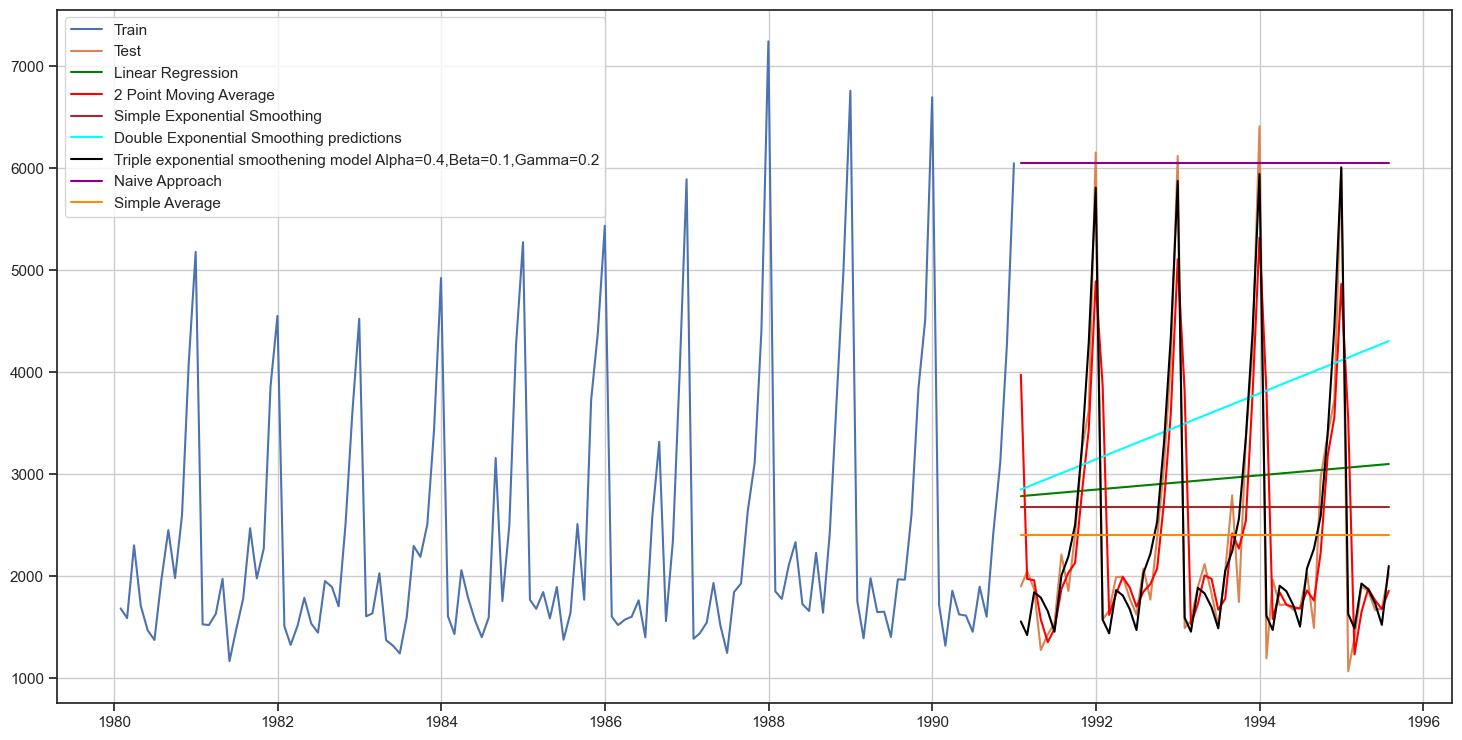

In [114]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_ta_sm',0.4,0.1,0.2], label='Triple exponential smoothening model Alpha=0.4,Beta=0.1,Gamma=0.2', color='black')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')


plt.legend(loc='best')
plt.grid();

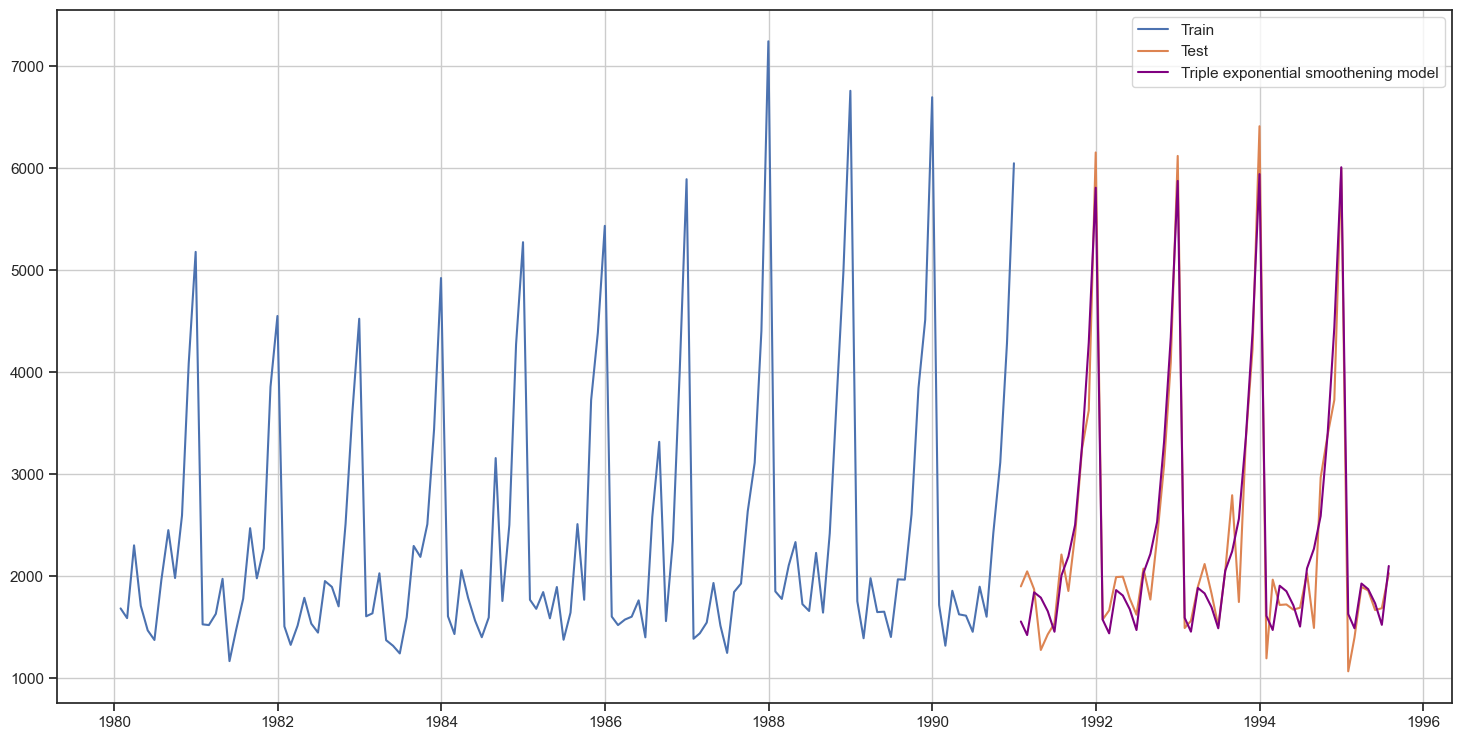

In [115]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_ta_sm',0.4,0.1,0.2], label='Triple exponential smoothening model', color='purple')


plt.legend(loc='best')
plt.grid();

In [116]:
print ('Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing Trend - Additive and Seasonality - Multiplicative RSME is ', resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4])

Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing Trend - Additive and Seasonality - Multiplicative RSME is  317.43430200265055


### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.
H1 : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

We see that at 5% significant level the Time Series is non-stationary.

In [117]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(18,9))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

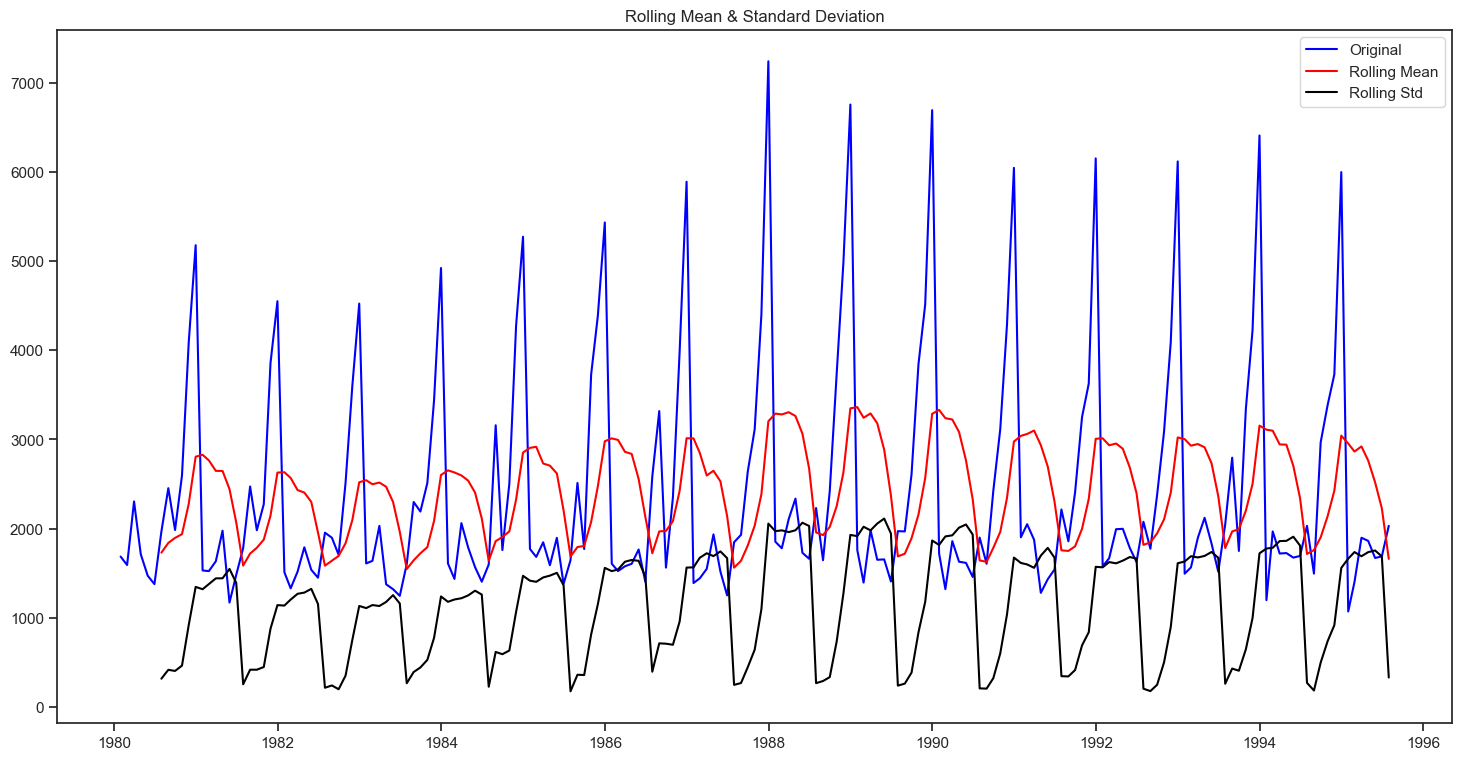

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [118]:
test_stationarity(df['Sparkling'])

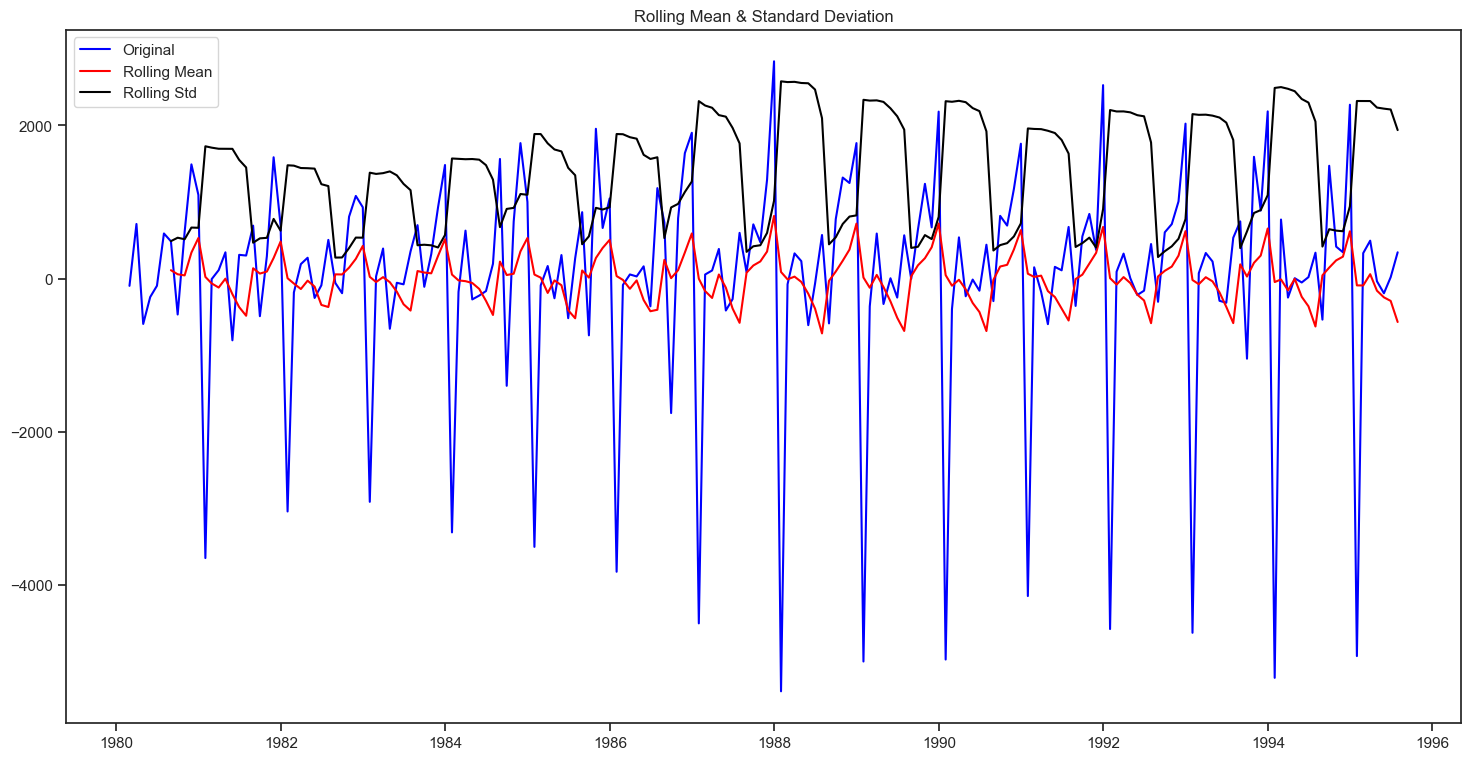

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [119]:
test_stationarity(df['Sparkling'].diff().dropna())

### Model Building - Stationary Data

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

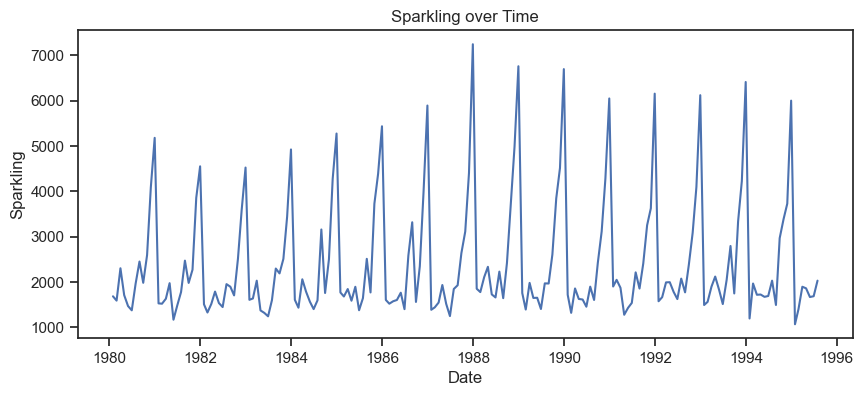

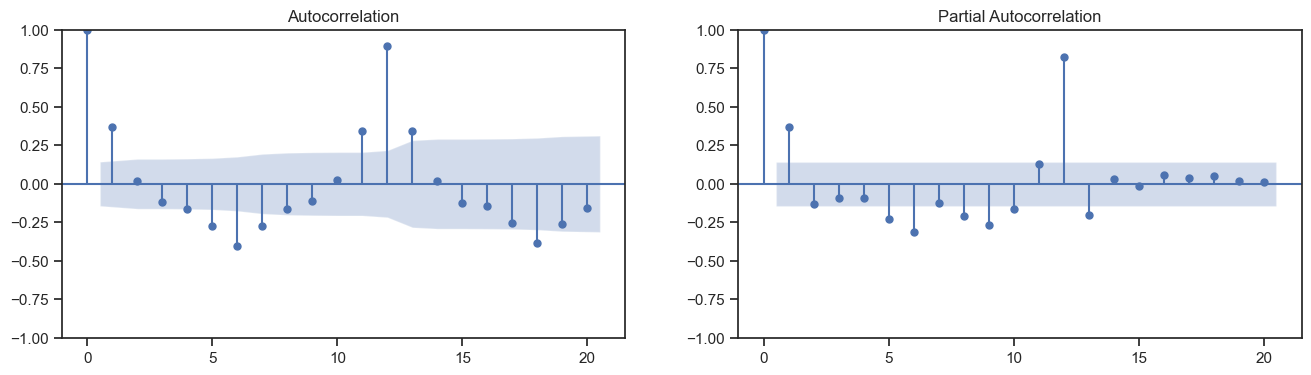

In [120]:
plt.figure(figsize=(10, 4))
plt.plot(df['Sparkling'])
plt.title('Sparkling over Time')
plt.xlabel('Date')
plt.ylabel('Sparkling')
plt.show()
# Plot the ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Sparkling'], lags=20, ax=ax[0])
plot_pacf(df['Sparkling'], lags=20, ax=ax[1])
plt.show()

### Auto ARIMA Model

In [121]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= [1] #complete the code to ensure stationarity
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [122]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [123]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()  #Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_AIC))   #Complete the code to find the AIC values
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:Empty DataFrame
Columns: [param, AIC]
Index: []
ARIMA(0, 1, 1) - AIC:       param          AIC
0  (0, 1, 0)  2267.663036
ARIMA(0, 1, 2) - AIC:       param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
ARIMA(0, 1, 3) - AIC:       param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
2  (0, 1, 2)  2234.408323
ARIMA(1, 1, 0) - AIC:       param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
2  (0, 1, 2)  2234.408323
3  (0, 1, 3)  2233.994858
ARIMA(1, 1, 1) - AIC:       param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
2  (0, 1, 2)  2234.408323
3  (0, 1, 3)  2233.994858
4  (1, 1, 0)  2266.608539
ARIMA(1, 1, 2) - AIC:       param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
2  (0, 1, 2)  2234.408323
3  (0, 1, 3)  2233.994858
4  (1, 1, 0)  2266.608539
5  (1, 1, 1)  2235.755095
ARIMA(1, 1, 3) - AIC:       param          AIC
0  (0, 1, 0)  2267.663036
1  (0, 1, 1)  2263.060016
2  (

In [124]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.452537
14  (3, 1, 2)  2230.816576
11  (2, 1, 3)  2232.917659
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.499067
7   (1, 1, 3)  2235.607814
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [125]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')  #Build the ARIMA model based on the best AIC values

results_auto_ARIMA = auto_ARIMA.fit()  #Fit the auto ARIMA model

print(results_auto_ARIMA.summary())   #Print the summary result

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 26 May 2024   AIC                           2213.509
Time:                        20:30:14   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

In [126]:
results_auto_ARIMA

In [127]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))  #Forecast using the auto ARIMA
predicted_auto_ARIMA

1991-01-31    4252.361455
1991-02-28    2863.104969
1991-03-31    2043.981140
1991-04-30    1746.206002
1991-05-31    1813.625098
1991-06-30    2068.631102
1991-07-31    2365.520097
1991-08-31    2612.447507
1991-09-30    2770.394735
1991-10-31    2839.533406
1991-11-30    2841.911681
1991-12-31    2806.363215
1992-01-31    2758.389507
1992-02-29    2715.324800
1992-03-31    2685.650644
1992-04-30    2670.800795
1992-05-31    2667.912797
1992-06-30    2672.428892
1992-07-31    2679.969760
1992-08-31    2687.338381
1992-09-30    2692.789250
1992-10-31    2695.820152
1992-11-30    2696.748380
1992-12-31    2696.271145
1993-01-31    2695.125805
1993-02-28    2693.889907
1993-03-31    2692.908856
1993-04-30    2692.312842
1993-05-31    2692.079503
1993-06-30    2692.106686
1993-07-31    2692.272858
1993-08-31    2692.475691
1993-09-30    2692.648891
1993-10-31    2692.762705
1993-11-30    2692.815171
1993-12-31    2692.820357
1994-01-31    2692.797818
1994-02-28    2692.765343
1994-03-31  

In [128]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print('RMSE for Auto ARIMA model for test data:', rmse)

RMSE for Auto ARIMA model for test data: 1299.9798975363012


In [129]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto ARIMA(2, 1, 2)'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2, 1, 2)                                 1299.979898

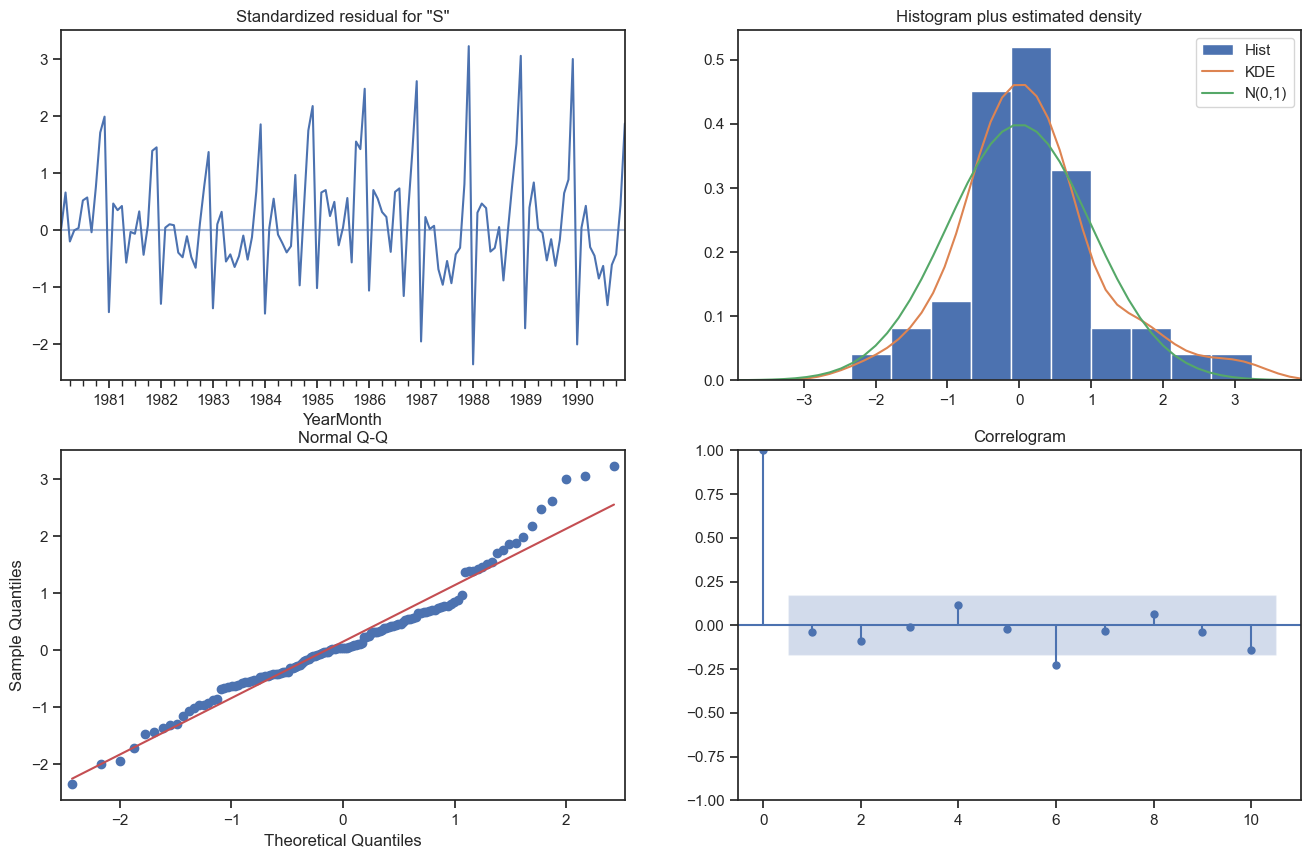

In [130]:
results_auto_ARIMA.plot_diagnostics(figsize=(16, 10))
plt.show()

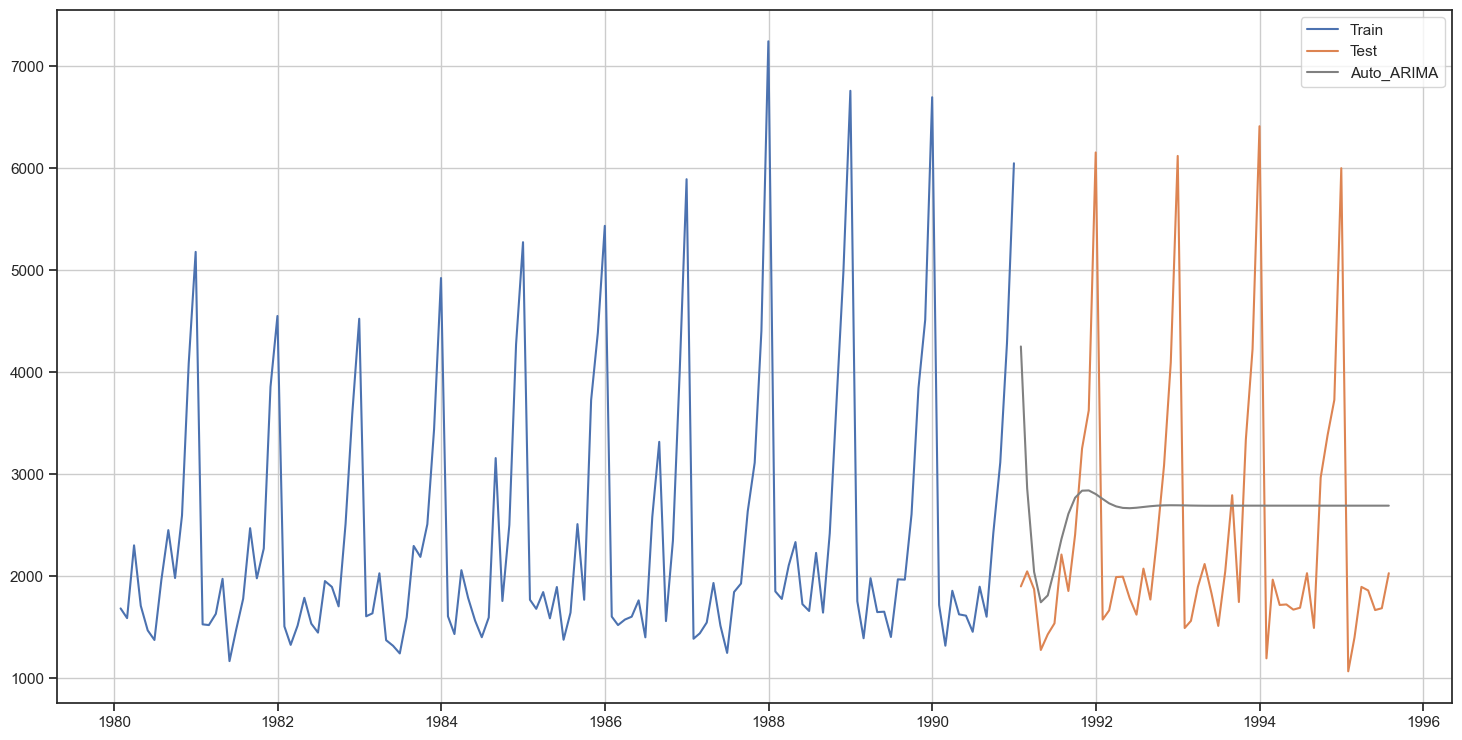

In [131]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA', color='gray')

plt.legend(loc='best')
plt.grid();


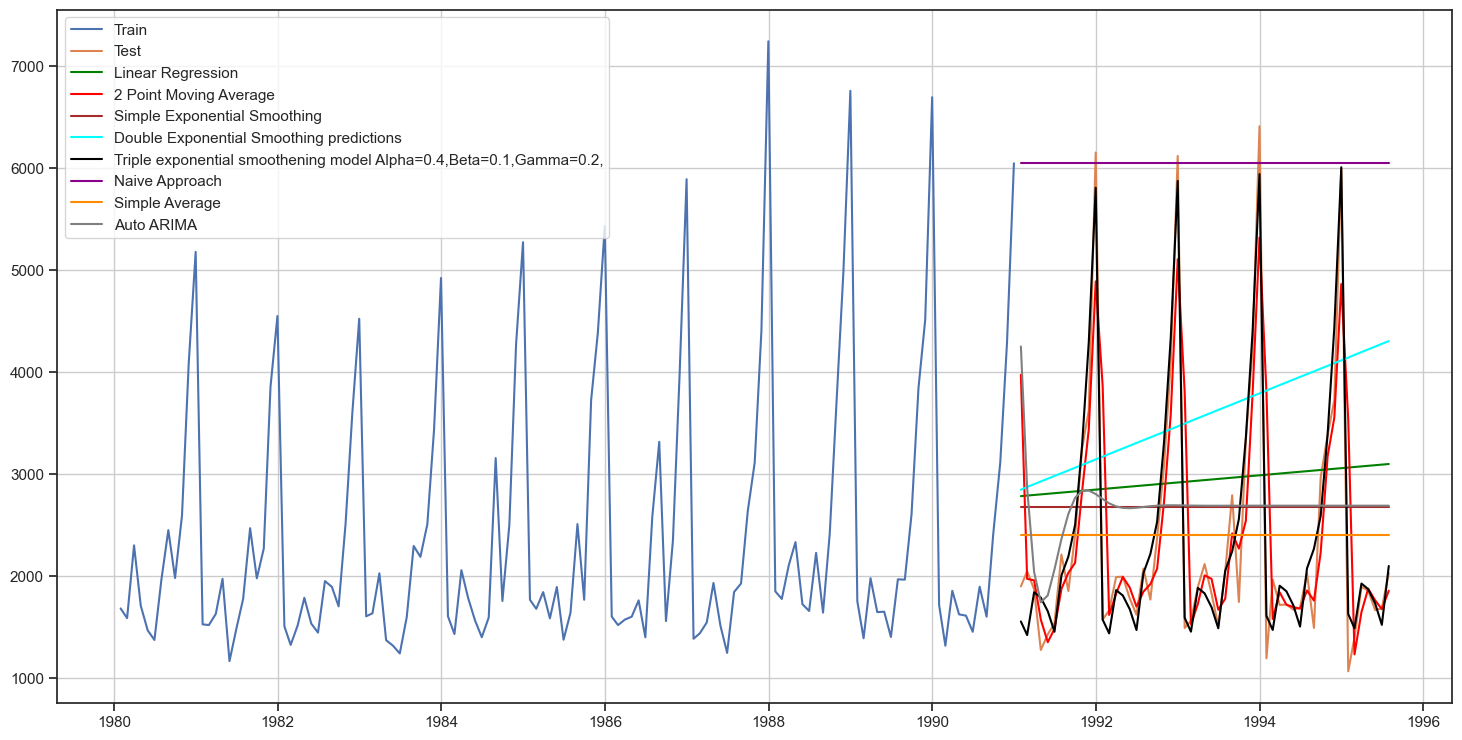

In [132]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_ta_sm',0.4,0.1,0.2], label='Triple exponential smoothening model Alpha=0.4,Beta=0.1,Gamma=0.2,', color='black')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto ARIMA', color='gray')


plt.legend(loc='best')
plt.grid();

### SARIMA

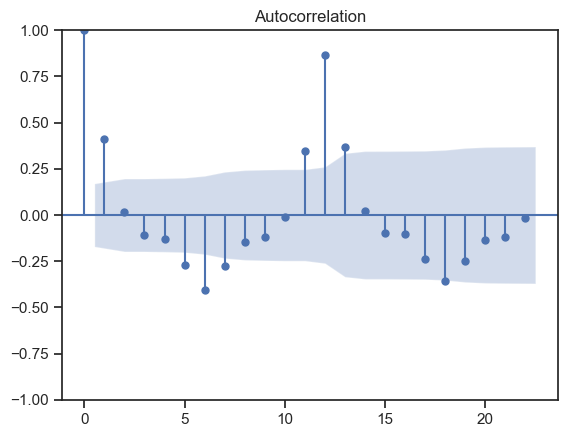

In [133]:
plot_acf(train['Sparkling'],alpha=0.05);

SARIMA Model building to estimate best parameters

In [134]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [135]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train['Sparkling'] is your time series data
# Replace with your actual DataFrame and column name

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Generate combinations for seasonal p, d, q, and m
seasonal_pdq = list(itertools.product(p, d, q, [12]))

# Initialize an empty DataFrame to store the AIC values
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

# Iterate over all combinations of pdq and seasonal_pdq
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Define the SARIMA model
            SARIMA_model = SARIMAX(train['Sparkling'].values,
                                   order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
            # Fit the model
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            # Print the AIC value
            print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
            # Append the results to the DataFrame using pd.concat
            SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],
                                                              'seasonal': [param_seasonal],
                                                              'AIC': [results_SARIMA.aic]})], ignore_index=True)
        except Exception as e:
            print(f'SARIMA{param}x{param_seasonal} - Exception: {e}')

# Display the DataFrame with AIC values
print(SARIMA_AIC)


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26340D+00    |proj g|=  1.71685D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.717D-06   9.263D+00
  F =   9.2634044804886333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2447.5387828489993
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  6.04040D+00    |proj g|=  9.49784D-04

At iterate   10    f=  6.04019D+00    |proj g|=  1.79431D-02

At iterate   15    f=  6.03194D+00    |proj g|=  3.70126D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     21      1     0     0   1.146D-08   6.031D+00
  F =   6.0312825767207077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.2586002542669
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.50807D+00    |proj g|=  4.44600D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     21      1     0     0   2.089D-06   5.507D+00
  F =   5.5072513415961986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:1457.9143541813964
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90681D+00    |proj g|=  2.19806D-01


 This problem is unconstrained.



At iterate    5    f=  4.78895D+00    |proj g|=  3.45635D-04

At iterate   10    f=  4.78889D+00    |proj g|=  1.07245D-02

At iterate   15    f=  4.78284D+00    |proj g|=  1.00900D-01

At iterate   20    f=  4.76358D+00    |proj g|=  2.99844D-03

At iterate   25    f=  4.76336D+00    |proj g|=  1.61519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   1.183D-05   4.763D+00
  F =   4.7633551146475810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:1263.5257502669613
RUNNING THE L-BFGS-B CODE
SARIMA(0, 0, 0)x(1, 0, 0, 12) - 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


6151D-01

At iterate    5    f=  6.66961D+00    |proj g|=  3.25315D-01

At iterate   10    f=  6.66663D+00    |proj g|=  4.12932D-04
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1765.990295795171

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   8.328D-04   6.667D+00
  F =   6.6666299083150422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06050D+00    |proj g|=  1.19149D+00

At ite

 This problem is unconstrained.



At iterate   10    f=  5.38867D+00    |proj g|=  2.02242D-04

At iterate   15    f=  5.38866D+00    |proj g|=  2.21724D-03

At iterate   20    f=  5.38752D+00    |proj g|=  2.10712D-02

At iterate   25    f=  5.38537D+00    |proj g|=  2.68728D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   3.115D-06   5.385D+00
  F =   5.3853644573514412     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:1429.7362167407805
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.49508D+00    |proj g|=  1.85255D-03

At iterate   10    f=  5.49330D+00    |proj g|=  4.05419D-02

At iterate   15    f=  5.46228D+00    |proj g|=  3.60518D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   3.423D-06   5.461D+00
  F =   5.4607073959499237     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:1447.6267525307799
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  4.78193D+00    |proj g|=  2.28036D-02

At iterate   10    f=  4.77806D+00    |proj g|=  2.87417D-04

At iterate   15    f=  4.77792D+00    |proj g|=  5.51096D-03

At iterate   20    f=  4.77219D+00    |proj g|=  5.47699D-02

At iterate   25    f=  4.76243D+00    |proj g|=  2.23282D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   3.152D-06   4.762D+00
  F =   4.7624192446610731     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:1265.2786805905232
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.02768D+00    |proj g|=  2.23107D-01

At iterate   10    f=  6.02694D+00    |proj g|=  4.53882D-03

At iterate   15    f=  6.02677D+00    |proj g|=  1.28049D-03

At iterate   20    f=  6.02677D+00    |proj g|=  1.92730D-03

At iterate   25    f=  6.02524D+00    |proj g|=  2.86027D-02

At iterate   30    f=  6.01270D+00    |proj g|=  6.21589D-02

At iterate   35    f=  6.00790D+00    |proj g|=  4.69758D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     44      1     0     0   5.832D-05   6.008D+00
  F =   6.0079022297356977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.43790D+00    |proj g|=  1.69817D-02

At iterate   10    f=  5.43747D+00    |proj g|=  1.46987D-04

At iterate   15    f=  5.43745D+00    |proj g|=  2.98924D-03

At iterate   20    f=  5.43661D+00    |proj g|=  1.50753D-02

At iterate   25    f=  5.43589D+00    |proj g|=  2.77645D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   2.776D-06   5.436D+00
  F =   5.4358910288528248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:1443.0752316171458
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.37660D+00    |proj g|=  6.09872D-03

At iterate   10    f=  5.37657D+00    |proj g|=  1.22295D-04

At iterate   15    f=  5.37656D+00    |proj g|=  2.19305D-03

At iterate   20    f=  5.37611D+00    |proj g|=  1.28947D-02

At iterate   25    f=  5.37550D+00    |proj g|=  9.91273D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   9.870D-06   5.376D+00
  F =   5.3755032018071507     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:1429.1328452770879
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.84292D+00    |proj g|=  1.06658D-03

At iterate   10    f=  4.84290D+00    |proj g|=  3.08975D-03

At iterate   15    f=  4.84120D+00    |proj g|=  4.12191D-02

At iterate   20    f=  4.81950D+00    |proj g|=  3.95083D-02

At iterate   25    f=  4.81840D+00    |proj g|=  2.01233D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   6.009D-06   4.818D+00
  F =   4.8183969873498169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(2, 2, 1, 12) - AIC:1280.0568046603516
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.76851D+00    |proj g|=  1.53231D-02

At iterate   10    f=  4.76191D+00    |proj g|=  9.11749D-03

At iterate   15    f=  4.76178D+00    |proj g|=  1.89548D-04

At iterate   20    f=  4.76176D+00    |proj g|=  5.78693D-03

At iterate   25    f=  4.76005D+00    |proj g|=  5.21696D-02

At iterate   30    f=  4.75636D+00    |proj g|=  9.13550D-03

At iterate   35    f=  4.75585D+00    |proj g|=  3.58787D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     42      1     0     0   3.440D-06   4.756D+00
  F =   4.7558349469630077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.10474D+00    |proj g|=  9.47641D-03

At iterate   10    f=  7.10448D+00    |proj g|=  3.74180D-04

At iterate   15    f=  7.10445D+00    |proj g|=  2.51695D-03

At iterate   20    f=  7.10032D+00    |proj g|=  3.34405D-02

At iterate   25    f=  6.87941D+00    |proj g|=  3.27031D-01

At iterate   30    f=  6.58171D+00    |proj g|=  3.28152D-02

At iterate   35    f=  6.58117D+00    |proj g|=  3.61696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     47      1     0     0   3.617D-05   6.581D+00
  F =   6.5811660809539605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.31120D+00    |proj g|=  5.07086D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     10      1     0     0   2.931D-05   5.311D+00
  F =   5.3111997027834974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(0, 1, 2, 12) - AIC:1410.1567215348432
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40613D+00    |proj g|=  2.69604D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.51581D+00    |proj g|=  2.13089D-03

At iterate   10    f=  5.50862D+00    |proj g|=  9.15482D-02

At iterate   15    f=  5.42471D+00    |proj g|=  6.00429D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   3.858D-06   5.423D+00
  F =   5.4231980280498071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 2, 1, 12) - AIC:1437.724279405149
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  4.79218D+00    |proj g|=  1.16984D-02

At iterate   10    f=  4.79153D+00    |proj g|=  1.68881D-03

At iterate   15    f=  4.79119D+00    |proj g|=  2.83530D-02

At iterate   20    f=  4.76968D+00    |proj g|=  1.76687D-01

At iterate   25    f=  4.69669D+00    |proj g|=  4.00060D-02

At iterate   30    f=  4.69584D+00    |proj g|=  1.76568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     39      1     0     0   6.230D-06   4.696D+00
  F =   4.6958378283146915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 2, 2, 12) - AIC:1247.7011866750

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.85222D+00    |proj g|=  3.96677D-04

At iterate   15    f=  7.85186D+00    |proj g|=  1.22825D-02

At iterate   20    f=  7.82901D+00    |proj g|=  1.09564D-01

At iterate   25    f=  7.33011D+00    |proj g|=  7.50104D-01

At iterate   30    f=  6.80463D+00    |proj g|=  7.44213D-01

At iterate   35    f=  6.64040D+00    |proj g|=  2.24410D-01

At iterate   40    f=  6.60401D+00    |proj g|=  1.87617D-01

At iterate   45    f=  6.59298D+00    |proj g|=  3.39002D-02

At iterate   50    f=  6.59164D+00    |proj g|=  2.50320D-02

At iterate   55    f=  6.59150D+00    |proj g|=  2.92307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.05426D+00    |proj g|=  3.64098D-03

At iterate   10    f=  7.05412D+00    |proj g|=  3.04138D-04

At iterate   15    f=  7.05328D+00    |proj g|=  5.94769D-03

At iterate   20    f=  6.93495D+00    |proj g|=  2.68337D-01

At iterate   25    f=  6.06249D+00    |proj g|=  2.06911D+00

At iterate   30    f=  5.98931D+00    |proj g|=  1.23824D-01

At iterate   35    f=  5.94851D+00    |proj g|=  5.40980D-02

At iterate   40    f=  5.94848D+00    |proj g|=  4.32073D-03

At iterate   45    f=  5.94816D+00    |proj g|=  3.68282D-02

At iterate   50    f=  5.94794D+00    |proj g|=  8.67329D-03

At iterate   55    f=  5.94791D+00    |proj g|=  2.17388D-03

At iterate   60    f=  5.94791D+00    |proj g|=  4.50767D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.95534D+00    |proj g|=  2.51316D-04

At iterate   10    f=  5.95532D+00    |proj g|=  4.19765D-03

At iterate   15    f=  5.95401D+00    |proj g|=  3.10567D-02

At iterate   20    f=  5.95306D+00    |proj g|=  2.35786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   3.122D-06   5.953D+00
  F =   5.9530622390766936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1579.6084311162472
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.31040D+00    |proj g|=  4.88608D-03

At iterate   10    f=  5.31022D+00    |proj g|=  3.46773D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   3.468D-05   5.310D+00
  F =   5.3102189772551025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:1411.897809995347
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68582D+00    |proj g|=  2.61157D-02

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  5.66785D+00    |proj g|=  7.48948D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   3.727D-06   5.660D+00
  F =   5.6604474375829383     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 2, 0, 12) - AIC:1500.3581235218958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50187D+00    |proj g|=  2.85765D-02

At iterate    5    f=  5.50071D+00    |proj g|=  5.61724D-04


 This problem is unconstrained.



At iterate   10    f=  5.50047D+00    |proj g|=  1.20185D-02

At iterate   15    f=  5.47645D+00    |proj g|=  1.27298D-01

At iterate   20    f=  5.39208D+00    |proj g|=  3.62884D-02

At iterate   25    f=  5.38966D+00    |proj g|=  1.10443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     28      1     0     0   1.370D-06   5.390D+00
  F =   5.3896646156807071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 2, 1, 12) - AIC:1430.8714585397067
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.79208D+00    |proj g|=  1.08929D-02

At iterate   10    f=  4.79109D+00    |proj g|=  4.94269D-04

At iterate   15    f=  4.79104D+00    |proj g|=  9.04352D-03

At iterate   20    f=  4.78454D+00    |proj g|=  1.33506D-01

At iterate   25    f=  4.70644D+00    |proj g|=  1.15537D-01

At iterate   30    f=  4.69564D+00    |proj g|=  5.44261D-03

At iterate   35    f=  4.69551D+00    |proj g|=  1.50162D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     42      1     0     0   1.327D-05   4.696D+00
  F =   4.6955091043251773     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  6.35292D+00    |proj g|=  2.25441D+00

At iterate   30    f=  6.07798D+00    |proj g|=  4.39935D-02

At iterate   35    f=  6.07712D+00    |proj g|=  9.10760D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     54      1     0     0   3.140D-05   6.077D+00
  F =   6.0771184422990494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:1612.359268766949
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   25    f=  7.17509D+00    |proj g|=  3.94340D-02

At iterate   30    f=  6.88570D+00    |proj g|=  4.01419D-01

At iterate   35    f=  6.15606D+00    |proj g|=  3.01530D-01

At iterate   40    f=  6.06474D+00    |proj g|=  3.28161D-01

At iterate   45    f=  6.05903D+00    |proj g|=  2.07506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     67      1     0     0   3.280D-05   6.059D+00
  F =   6.0590333206731701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:1609.5847966577169
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f=  7.05349D+00    |proj g|=  1.98716D-03

At iterate   20    f=  7.05327D+00    |proj g|=  6.20980D-03

At iterate   25    f=  7.05290D+00    |proj g|=  4.39507D-03

At iterate   30    f=  7.02855D+00    |proj g|=  1.56829D-01

At iterate   35    f=  6.50492D+00    |proj g|=  3.92424D-01

At iterate   40    f=  6.11167D+00    |proj g|=  8.17658D-01

At iterate   45    f=  5.94851D+00    |proj g|=  8.57246D-02

At iterate   50    f=  5.94093D+00    |proj g|=  2.29532D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     53     76      1     0     0   1.155D-04   5.941D+00
  F =   5.94087209469

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.41485D+00    |proj g|=  3.27602D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     10      1     0     0   6.810D-05   5.415D+00
  F =   5.4148394431046336     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:1439.5176129796232
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34235D+00    |proj g|=  2.34203D-01


 This problem is unconstrained.



At iterate    5    f=  5.30501D+00    |proj g|=  1.03132D-02

At iterate   10    f=  5.30487D+00    |proj g|=  1.69353D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     14      1     0     0   6.108D-05   5.305D+00
  F =   5.3048732731856836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:1412.4865441210204
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94457D+00    |proj g|=  1.79034D-02

At iterate    

 This problem is unconstrained.



At iterate   10    f=  4.94397D+00    |proj g|=  7.31340D-03

At iterate   15    f=  4.92647D+00    |proj g|=  8.19054D-02

At iterate   20    f=  4.90439D+00    |proj g|=  2.40526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   4.309D-07   4.904D+00
  F =   4.9043869210069344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(2, 2, 0, 12) - AIC:1302.7581471458307
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  4.90579D+00    |proj g|=  1.83718D-03

At iterate   10    f=  4.90574D+00    |proj g|=  2.57520D-03

At iterate   15    f=  4.90153D+00    |proj g|=  3.63920D-02

At iterate   20    f=  4.82054D+00    |proj g|=  1.12375D-01

At iterate   25    f=  4.80657D+00    |proj g|=  6.96672D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     29      1     0     0   3.891D-06   4.807D+00
  F =   4.8065717477589809     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(2, 2, 1, 12) - AIC:1278.934941408371
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  4.79033D+00    |proj g|=  5.43677D-03

At iterate   10    f=  4.78789D+00    |proj g|=  1.44897D-02

At iterate   15    f=  4.78777D+00    |proj g|=  5.03952D-04

At iterate   20    f=  4.78744D+00    |proj g|=  6.37094D-03

At iterate   25    f=  4.75022D+00    |proj g|=  8.12758D-02

At iterate   30    f=  4.69777D+00    |proj g|=  2.72648D-02

At iterate   35    f=  4.69005D+00    |proj g|=  1.11515D-03

At iterate   40    f=  4.69005D+00    |proj g|=  7.66440D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     45      1     0     0   5.875D-05   4.690D+00
  F =   4.69004578671

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08422D+00    |proj g|=  6.34714D-01

At iterate    5    f=  7.85490D+00    |proj g|=  1.47656D-03

At iterate   10    f=  7.85488D+00    |proj g|=  1.33852D-03

At iterate   15    f=  7.85365D+00    |proj g|=  2.09481D-02

At iterate   20    f=  7.76951D+00    |proj g|=  2.57277D-01

At iterate   25    f=  7.43515D+00    |proj g|=  1.36758D-01

At iterate   30    f=  7.42933D+00    |proj g|=  1.80704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  5.90216D+00    |proj g|=  2.04604D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     21      1     0     0   6.239D-06   5.902D+00
  F =   5.9016214912042670     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:1566.0280736779264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29434D+00    |proj g|=  2.54291D-01


 This problem is unconstrained.



At iterate    5    f=  5.25393D+00    |proj g|=  4.24548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   5.357D-05   5.254D+00
  F =   5.2539281093714170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(0, 1, 2, 12) - AIC:1397.0370208740542
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34006D+00    |proj g|=  4.11968D-02
SARIMA(0, 0, 2)x(0, 2, 0, 12) - AIC:1679.4892060029708

           * * *

Tit

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.44689D+00    |proj g|=  5.25127D-04

At iterate   10    f=  5.44662D+00    |proj g|=  1.12010D-02

At iterate   15    f=  5.41263D+00    |proj g|=  1.70678D-01

At iterate   20    f=  5.35697D+00    |proj g|=  2.69741D-03

At iterate   25    f=  5.35696D+00    |proj g|=  9.01679D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   9.017D-07   5.357D+00
  F =   5.3569627492437562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(0, 2, 1, 12) - AIC:1422.2381658003517
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.73011D+00    |proj g|=  1.74749D-02

At iterate   10    f=  4.72929D+00    |proj g|=  4.76597D-04

At iterate   15    f=  4.72917D+00    |proj g|=  9.00602D-03

At iterate   20    f=  4.71090D+00    |proj g|=  1.11986D-01

At iterate   25    f=  4.64767D+00    |proj g|=  2.76077D-02

At iterate   30    f=  4.64449D+00    |proj g|=  4.47362D-03

At iterate   35    f=  4.64391D+00    |proj g|=  4.78705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     43      1     0     0   9.372D-06   4.644D+00
  F =   4.6439084427041948     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   75    f=  6.78765D+00    |proj g|=  9.78952D-03

At iterate   80    f=  6.78733D+00    |proj g|=  1.69448D-02

At iterate   85    f=  6.78708D+00    |proj g|=  1.13864D-03

At iterate   90    f=  6.78694D+00    |proj g|=  1.35448D-03

At iterate   95    f=  6.78678D+00    |proj g|=  5.77470D-03

At iterate  100    f=  6.78669D+00    |proj g|=  2.14668D-03

At iterate  105    f=  6.78659D+00    |proj g|=  1.36941D-03

At iterate  110    f=  6.78651D+00    |proj g|=  2.94381D-03

At iterate  115    f=  6.78642D+00    |proj g|=  9.46171D-04

At iterate  120    f=  6.78636D+00    |proj g|=  8.33778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  7.56863D+00    |proj g|=  1.42433D-01

At iterate   35    f=  7.07945D+00    |proj g|=  9.07935D+00

At iterate   40    f=  6.53674D+00    |proj g|=  4.77793D-01

At iterate   45    f=  6.53244D+00    |proj g|=  3.72199D-01

At iterate   50    f=  6.53134D+00    |proj g|=  1.64725D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     51     73      1     0     0   1.150D-03   6.531D+00
  F =   6.5313410515666250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:1734.274037613589
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


At iterate    5    f=  6.98604D+00    |proj g|=  5.26343D-03

At iterate   10    f=  6.98573D+00    |proj g|=  4.05433D-04

At iterate   15    f=  6.98566D+00    |proj g|=  2.63264D-03

At iterate   20    f=  6.98036D+00    |proj g|=  3.39538D-02

At iterate   25    f=  6.85696D+00    |proj g|=  6.12028D-01

At iterate   30    f=  6.54285D+00    |proj g|=  1.83402D+00

At iterate   35    f=  6.28629D+00    |proj g|=  9.74397D-01

At iterate   40    f=  5.93338D+00    |proj g|=  1.27347D+00

At iterate   45    f=  5.89427D+00    |proj g|=  1.06209D-02

At iterate   50    f=  5.89422D+00    |proj g|=  1.38371D-02

At iterate   55    f=  5.89417D+00    |proj g|=  1.19896D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.90372D+00    |proj g|=  1.88924D-04

At iterate   10    f=  5.90371D+00    |proj g|=  1.84266D-03

At iterate   15    f=  5.90283D+00    |proj g|=  1.42019D-02

At iterate   20    f=  5.90155D+00    |proj g|=  3.95218D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   2.614D-06   5.902D+00
  F =   5.9015451814105466     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC:1568.0079278923843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.25357D+00    |proj g|=  3.42725D-03

At iterate   10    f=  5.25350D+00    |proj g|=  5.54502D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   5.545D-05   5.254D+00
  F =   5.2535021806343094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:1398.9245756874577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67942D+00    |proj g|=  4.53041D-02

At iterate    

 This problem is unconstrained.



At iterate   15    f=  5.66330D+00    |proj g|=  9.00253D-02

At iterate   20    f=  5.65438D+00    |proj g|=  9.92677D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     23      1     0     0   5.881D-06   5.654D+00
  F =   5.6543795958734036     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(1, 2, 0, 12) - AIC:1500.7562133105785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43577D+00    |proj g|=  3.66194D-02


 This problem is unconstrained.



At iterate    5    f=  5.43313D+00    |proj g|=  5.60760D-04

At iterate   10    f=  5.43291D+00    |proj g|=  8.91579D-03

At iterate   15    f=  5.41038D+00    |proj g|=  9.99241D-02

At iterate   20    f=  5.32655D+00    |proj g|=  2.02946D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   2.707D-06   5.326D+00
  F =   5.3259535444089536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(1, 2, 1, 12) - AIC:1416.0517357239637
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.72975D+00    |proj g|=  1.18860D-02

At iterate   10    f=  4.72857D+00    |proj g|=  4.77935D-04

At iterate   15    f=  4.72852D+00    |proj g|=  5.21958D-03

At iterate   20    f=  4.72128D+00    |proj g|=  5.58880D-02

At iterate   25    f=  4.64965D+00    |proj g|=  1.04322D-01

At iterate   30    f=  4.64433D+00    |proj g|=  8.83010D-03

At iterate   35    f=  4.64310D+00    |proj g|=  2.77238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     44      1     0     0   1.045D-05   4.643D+00
  F =   4.6431016354427390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   30    f=  6.14879D+00    |proj g|=  7.41668D-01

At iterate   35    f=  6.07599D+00    |proj g|=  1.07383D-01

At iterate   40    f=  6.07486D+00    |proj g|=  5.21169D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     60      1     0     0   4.388D-05   6.075D+00
  F =   6.0748603991099328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:1613.7631453650222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   20    f=  7.17099D+00    |proj g|=  3.29409D-02

At iterate   25    f=  6.78990D+00    |proj g|=  3.33289D+00

At iterate   30    f=  6.49043D+00    |proj g|=  1.21788D+00

At iterate   35    f=  6.23769D+00    |proj g|=  6.64317D-01

At iterate   40    f=  6.12030D+00    |proj g|=  9.58581D-01

At iterate   45    f=  6.08425D+00    |proj g|=  1.16387D-01

At iterate   50    f=  6.07312D+00    |proj g|=  9.92907D-02

At iterate   55    f=  6.06855D+00    |proj g|=  9.79543D-02

At iterate   60    f=  6.06484D+00    |proj g|=  1.71936D-02

At iterate   65    f=  6.06350D+00    |proj g|=  1.02122D-01

At iterate   70    f=  6.06205D+00    |proj g|=  1.89469D-02

At iterate   75    f=  6.06140D+00    |proj g|=  1.37936D-02

At iterate   80    f=  6.06103D+00    |proj g|=  1.78960D-02

At iterate   85    f=  6.06029D+00    |proj g|=  4.05493D-03

At iterate   90    f=  6.06013D+00    |proj g|=  1.05924D-02

At iterate   95    f=  6.05991D+00    |proj g|=  1.41904D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  6.98555D+00    |proj g|=  3.59116D-03

At iterate   10    f=  6.98512D+00    |proj g|=  3.02382D-04

At iterate   15    f=  6.98508D+00    |proj g|=  4.17169D-03

At iterate   20    f=  6.98456D+00    |proj g|=  3.08218D-03

At iterate   25    f=  6.98296D+00    |proj g|=  2.37706D-02

At iterate   30    f=  6.93581D+00    |proj g|=  1.22510D-01

At iterate   35    f=  6.72856D+00    |proj g|=  1.98701D-01

At iterate   40    f=  5.92560D+00    |proj g|=  5.39692D-01

At iterate   45    f=  5.88995D+00    |proj g|=  7.41451D-02

At iterate   50    f=  5.88624D+00    |proj g|=  2.71182D-02

At iterate   55    f=  5.88619D+00    |proj g|=  1.09804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


SARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:1439.2912397916498
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41663D+00    |proj g|=  2.03053D-02

At iterate    5    f=  5.41396D+00    |proj g|=  3.26706D-03


 This problem is unconstrained.



At iterate   10    f=  5.41394D+00    |proj g|=  9.37572D-05

At iterate   15    f=  5.41394D+00    |proj g|=  2.11183D-03

At iterate   20    f=  5.41355D+00    |proj g|=  1.09413D-02

At iterate   25    f=  5.41338D+00    |proj g|=  7.65219D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   2.825D-05   5.413D+00
  F =   5.4133770256600879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:1441.1315347742632
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.24942D+00    |proj g|=  1.61013D-02

At iterate   10    f=  5.24905D+00    |proj g|=  1.10553D-03

At iterate   15    f=  5.24905D+00    |proj g|=  1.75135D-04

At iterate   20    f=  5.24903D+00    |proj g|=  2.97394D-03

At iterate   25    f=  5.24874D+00    |proj g|=  6.32163D-03

At iterate   30    f=  5.24866D+00    |proj g|=  9.21837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     36      1     0     0   6.855D-05   5.249D+00
  F =   5.2486593639686587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:1399.6460720877

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94017D+00    |proj g|=  2.82566D-02

At iterate    5    f=  4.93853D+00    |proj g|=  3.70467D-04

At iterate   10    f=  4.93846D+00    |proj g|=  5.00794D-03

At iterate   15    f=  4.93182D+00    |proj g|=  9.04819D-02

At iterate   20    f=  4.90230D+00    |proj g|=  6.12699D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     25      1     0     0   1.158D-05   4.902D+00
  F =   4.9022996865734152     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  4.89915D+00    |proj g|=  8.71864D-04

At iterate   10    f=  4.89910D+00    |proj g|=  2.88111D-03

At iterate   15    f=  4.89409D+00    |proj g|=  4.03165D-02

At iterate   20    f=  4.81233D+00    |proj g|=  5.39661D-02

At iterate   25    f=  4.80527D+00    |proj g|=  3.46715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     29      1     0     0   6.547D-06   4.805D+00
  F =   4.8052725387021802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(2, 2, 1, 12) - AIC:1280.5919502173756


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77095D+00    |proj g|=  2.01501D-01

At iterate    5    f=  4.72678D+00    |proj g|=  5.54840D-03

At iterate   10    f=  4.72454D+00    |proj g|=  3.14406D-03

At iterate   15    f=  4.72451D+00    |proj g|=  1.29619D-03

At iterate   20    f=  4.72143D+00    |proj g|=  2.64970D-02

At iterate   25    f=  4.65241D+00    |proj g|=  6.01793D-02

At iterate   30    f=  4.63713D+00    |proj g|=  2.18415D-02

At iterate   35    f=  4.63694D+00    |proj g|=  6.75099D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.50693D+00    |proj g|=  2.72527D-02

At iterate   25    f=  6.50437D+00    |proj g|=  1.99053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     37      1     0     0   6.466D-07   6.504D+00
  F =   6.5043688031190925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234404
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90057D+00    |proj g|=  2.06134D-04

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.48087D+00    |proj g|=  1.37490D-04

At iterate   10    f=  5.48086D+00    |proj g|=  3.61285D-03

At iterate   15    f=  5.48016D+00    |proj g|=  1.92095D-02

At iterate   20    f=  5.47984D+00    |proj g|=  7.87734D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   7.877D-06   5.480D+00
  F =   5.4798384750977300     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574258007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.59632D+00    |proj g|=  1.51587D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     21      1     0     0   4.017D-07   5.588D+00
  F =   5.5878853813649529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:1479.2017406803475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92696D+00    |proj g|=  2.77012D-01


 This problem is unconstrained.



At iterate    5    f=  4.88292D+00    |proj g|=  9.41245D-04

At iterate   10    f=  4.88291D+00    |proj g|=  3.41291D-03

At iterate   15    f=  4.88219D+00    |proj g|=  4.46172D-02

At iterate   20    f=  4.85033D+00    |proj g|=  1.43531D-01

At iterate   25    f=  4.84033D+00    |proj g|=  2.24349D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     34      1     0     0   1.787D-05   4.840D+00
  F =   4.8403261291667974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(0, 2, 2, 12) - AIC:1283.8460981000344
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     43      1     0     0   2.381D-05   6.822D+00
  F =   6.8219338262836482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138883
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17524D+00    |proj g|=  7.25121D-01

At iterate    5    f=  6.15664D+00    |proj g|=  1.01122D-01

At iterate   10    f=  6.15610D+00    |proj g|=  3.04724D-03

           * * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.15149D+00    |proj g|=  4.79030D-04

At iterate   10    f=  6.15149D+00    |proj g|=  1.87920D-03

At iterate   15    f=  6.15112D+00    |proj g|=  2.33401D-02

At iterate   20    f=  6.14522D+00    |proj g|=  7.02881D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   2.459D-06   6.145D+00
  F =   6.1451681470405415     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.324390818703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC:1531.3718536941246
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61694D+00    |proj g|=  1.26295D-01

At iterate    5    f=  5.59678D+00    |proj g|=  3.64001D-04

At iterate   10    f=  5.59675D+00    |proj g|=  6.70071D-03

At iterate   15    f=  5.59303D+00    |proj g|=  7.65148D-02

At iterate   20    f=  5.55905D+00    |proj g|=  7.15232D-02

At iterate   25    f=  5.55458D+00    |proj g|=  1.41934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.



At iterate    5    f=  4.86196D+00    |proj g|=  4.84240D-02

At iterate   10    f=  4.84772D+00    |proj g|=  4.40701D-04

At iterate   15    f=  4.84772D+00    |proj g|=  1.45472D-03

At iterate   20    f=  4.84743D+00    |proj g|=  1.94079D-02

At iterate   25    f=  4.84172D+00    |proj g|=  4.89642D-02

At iterate   30    f=  4.84027D+00    |proj g|=  6.37721D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     37      1     0     0   3.536D-06   4.840D+00
  F =   4.8402693912571797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 2, 2, 12) - AIC:1285.8311192918

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  6.21133D+00    |proj g|=  3.58473D-02

At iterate   20    f=  6.20924D+00    |proj g|=  2.67023D-02

At iterate   25    f=  6.20911D+00    |proj g|=  2.61640D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   2.616D-05   6.209D+00
  F =   6.2091114237139147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158604735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  6.14370D+00    |proj g|=  1.89178D-04

At iterate   15    f=  6.14370D+00    |proj g|=  2.05372D-03

At iterate   20    f=  6.14349D+00    |proj g|=  3.47800D-02

At iterate   25    f=  6.14069D+00    |proj g|=  4.55990D-02

At iterate   30    f=  6.14011D+00    |proj g|=  1.50357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   1.163D-06   6.140D+00
  F =   6.1401128992124123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392077
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.53338D+00    |proj g|=  3.23818D-04

At iterate   15    f=  5.53336D+00    |proj g|=  4.29904D-03

At iterate   20    f=  5.53236D+00    |proj g|=  1.10920D-02

At iterate   25    f=  5.53220D+00    |proj g|=  2.52268D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   2.374D-07   5.532D+00
  F =   5.5321973416161541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866647
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  5.47762D+00    |proj g|=  1.77814D-03

At iterate   15    f=  5.47755D+00    |proj g|=  5.41434D-05

At iterate   20    f=  5.47754D+00    |proj g|=  7.91026D-04

At iterate   25    f=  5.47729D+00    |proj g|=  8.31323D-03

At iterate   30    f=  5.47724D+00    |proj g|=  1.87659D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   1.877D-05   5.477D+00
  F =   5.4772392248670156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553648922
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.91916D+00    |proj g|=  3.49500D-03

At iterate   10    f=  4.91914D+00    |proj g|=  1.12396D-03

At iterate   15    f=  4.91869D+00    |proj g|=  1.81226D-02

At iterate   20    f=  4.90180D+00    |proj g|=  9.83022D-02

At iterate   25    f=  4.89349D+00    |proj g|=  4.50248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   3.693D-06   4.893D+00
  F =   4.8934929833578469     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC:1299.8821476064716


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95866D+00    |proj g|=  6.15689D-01

At iterate    5    f=  4.84573D+00    |proj g|=  1.51342D-02

At iterate   10    f=  4.83511D+00    |proj g|=  3.04548D-02

At iterate   15    f=  4.83362D+00    |proj g|=  6.98119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   3.666D-05   4.834D+00
  F =   4.8336208137403167     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.39323D+00    |proj g|=  5.22692D-02

At iterate   20    f=  7.32939D+00    |proj g|=  3.15310D-01

At iterate   25    f=  7.26428D+00    |proj g|=  1.01195D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     39      1     0     0   1.734D-07   7.264D+00
  F =   7.2642760036236274     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566376
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.93948D+00    |proj g|=  4.31387D-04

At iterate   10    f=  5.93943D+00    |proj g|=  1.14784D-02

At iterate   15    f=  5.93351D+00    |proj g|=  1.33685D-01

At iterate   20    f=  5.92297D+00    |proj g|=  2.14540D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   2.611D-07   5.923D+00
  F =   5.9229694069053256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.663923423006
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.27851D+00    |proj g|=  6.55936D-04

At iterate   10    f=  5.27850D+00    |proj g|=  3.01676D-03

At iterate   15    f=  5.27707D+00    |proj g|=  3.90584D-02

At iterate   20    f=  5.26940D+00    |proj g|=  7.00268D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   8.335D-07   5.269D+00
  F =   5.2693499419241947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846679874
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:1696.5999271102532
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60520D+00    |proj g|=  3.17910D-01

At iterate    5    f=  5.53865D+00    |proj g|=  1.71017D-02

At iterate   10    f=  5.53833D+00    |proj g|=  1.01415D-03

At iterate   15    f=  5.53795D+00    |proj g|=  1.66279D-02

At iterate   20    f=  5.51365D+00    |proj g|=  1.00285D-01

At iterate   25    f=  5.40133D+00    |proj g|=  1.02751D-01

At iterate   30    f=  5.39645D+00    |proj g|=  8.24762D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value



 This problem is unconstrained.



At iterate    5    f=  4.80650D+00    |proj g|=  5.51583D-02

At iterate   10    f=  4.80457D+00    |proj g|=  4.04969D-03

At iterate   15    f=  4.80454D+00    |proj g|=  2.49816D-03

At iterate   20    f=  4.80346D+00    |proj g|=  2.63639D-02

At iterate   25    f=  4.77369D+00    |proj g|=  1.05466D-01

At iterate   30    f=  4.65670D+00    |proj g|=  2.97608D-03

At iterate   35    f=  4.65658D+00    |proj g|=  1.05447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     44      1     0     0   1.999D-05   4.657D+00
  F =   4.6565846492646603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.61165D+00    |proj g|=  6.83055D-01

At iterate   30    f=  6.55340D+00    |proj g|=  6.70289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     51      1     0     0   7.596D-06   6.553D+00
  F =   6.5533724218839549     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377364
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53402D+00    |proj g|=  1.77413D-01

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  6.51207D+00    |proj g|=  6.77501D-04

At iterate   20    f=  6.51091D+00    |proj g|=  2.73466D-02

At iterate   25    f=  6.46410D+00    |proj g|=  1.46076D-01

At iterate   30    f=  5.93605D+00    |proj g|=  7.77026D-01

At iterate   35    f=  5.91376D+00    |proj g|=  4.63894D-02

At iterate   40    f=  5.90969D+00    |proj g|=  2.18587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     63      1     0     0   5.187D-06   5.910D+00
  F =   5.9096625546649024     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144315

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.04886D+00    |proj g|=  2.23967D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   2.737D-06   6.049D+00
  F =   6.0487101587211525     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.8594819023842
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98979D+00    |proj g|=  1.64336D-01

At iterate    5    f=  5.93783D+00    |proj g|=  2.35907D-02

At iterate   1

 This problem is unconstrained.


At iterate    5    f=  5.27714D+00    |proj g|=  7.09441D-03

At iterate   10    f=  5.27712D+00    |proj g|=  6.31005D-04

At iterate   15    f=  5.27710D+00    |proj g|=  8.54097D-04

At iterate   20    f=  5.27678D+00    |proj g|=  1.67348D-02

At iterate   25    f=  5.26932D+00    |proj g|=  4.70169D-02

At iterate   30    f=  5.26770D+00    |proj g|=  1.68764D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   4.515D-06   5.268D+00
  F =   5.2676930015672241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.67095241374

 This problem is unconstrained.



At iterate    5    f=  5.70047D+00    |proj g|=  2.17099D-03

At iterate   10    f=  5.70028D+00    |proj g|=  1.54053D-02

At iterate   15    f=  5.66875D+00    |proj g|=  2.09602D-01

At iterate   20    f=  5.63810D+00    |proj g|=  1.94267D-02

At iterate   25    f=  5.63794D+00    |proj g|=  1.87761D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     34      1     0     0   1.878D-07   5.638D+00
  F =   5.6379382760689696     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:1494.415704882208
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  5.51841D+00    |proj g|=  5.83374D-04

At iterate   10    f=  5.51836D+00    |proj g|=  4.38307D-03

At iterate   15    f=  5.51167D+00    |proj g|=  6.06284D-02

At iterate   20    f=  5.35184D+00    |proj g|=  1.63261D-01

At iterate   25    f=  5.33985D+00    |proj g|=  2.74183D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     33      1     0     0   2.198D-06   5.340D+00
  F =   5.3398450410308413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:1417.7190908321422
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.81399D+00    |proj g|=  1.76450D-02

At iterate   10    f=  4.80306D+00    |proj g|=  7.23057D-03

At iterate   15    f=  4.80294D+00    |proj g|=  6.01579D-04

At iterate   20    f=  4.80257D+00    |proj g|=  1.30496D-02

At iterate   25    f=  4.75384D+00    |proj g|=  1.65957D-01

At iterate   30    f=  4.67956D+00    |proj g|=  2.56381D-02

At iterate   35    f=  4.65315D+00    |proj g|=  2.51383D-02

At iterate   40    f=  4.65235D+00    |proj g|=  3.24008D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     51      1     0     0   9.644D-06   4.652D+00
  F =   4.65233935513

 This problem is unconstrained.



At iterate   25    f=  6.05445D+00    |proj g|=  8.31341D-02

At iterate   30    f=  6.05180D+00    |proj g|=  1.54320D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     45      1     0     0   3.344D-07   6.052D+00
  F =   6.0517999826438462     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954179754
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64424D+00    |proj g|=  2.87967D-02

At iterate    

 This problem is unconstrained.



At iterate   15    f=  6.63363D+00    |proj g|=  2.55740D-02

At iterate   20    f=  6.57192D+00    |proj g|=  2.65873D-01

At iterate   25    f=  6.29220D+00    |proj g|=  8.82374D-02

At iterate   30    f=  6.04432D+00    |proj g|=  1.70917D-01

At iterate   35    f=  6.01980D+00    |proj g|=  2.50550D-02

At iterate   40    f=  6.01979D+00    |proj g|=  3.73422D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     61      1     0     0   3.734D-05   6.020D+00
  F =   6.0197898048959493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084925

 This problem is unconstrained.



At iterate   10    f=  6.50894D+00    |proj g|=  1.34084D-03

At iterate   15    f=  6.50888D+00    |proj g|=  6.84885D-04

At iterate   20    f=  6.50860D+00    |proj g|=  6.51049D-03

At iterate   25    f=  6.49600D+00    |proj g|=  3.31183D-02

At iterate   30    f=  6.43001D+00    |proj g|=  2.77088D-01

At iterate   35    f=  5.92726D+00    |proj g|=  1.92161D-01

At iterate   40    f=  5.90617D+00    |proj g|=  2.95940D-01

At iterate   45    f=  5.90323D+00    |proj g|=  4.20436D-02

At iterate   50    f=  5.90306D+00    |proj g|=  7.81918D-03

At iterate   55    f=  5.90304D+00    |proj g|=  8.35787D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.38952D+00    |proj g|=  1.17600D-03

At iterate   10    f=  5.38950D+00    |proj g|=  3.40212D-03

At iterate   15    f=  5.38783D+00    |proj g|=  4.19589D-02

At iterate   20    f=  5.37973D+00    |proj g|=  2.54873D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   1.370D-04   5.380D+00
  F =   5.3797154587704350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.244881115395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.


At iterate    5    f=  5.38842D+00    |proj g|=  6.14501D-03

At iterate   10    f=  5.38769D+00    |proj g|=  8.39754D-03

At iterate   15    f=  5.38764D+00    |proj g|=  1.31743D-03

At iterate   20    f=  5.38726D+00    |proj g|=  1.97454D-02

At iterate   25    f=  5.37940D+00    |proj g|=  3.95653D-02

At iterate   30    f=  5.37734D+00    |proj g|=  2.26844D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   5.454D-06   5.377D+00
  F =   5.3773363742288627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.61680279641

 This problem is unconstrained.



At iterate    5    f=  5.27777D+00    |proj g|=  1.16087D-02

At iterate   10    f=  5.27695D+00    |proj g|=  1.65876D-03

At iterate   15    f=  5.27694D+00    |proj g|=  1.69739D-03

At iterate   20    f=  5.27687D+00    |proj g|=  5.61064D-03

At iterate   25    f=  5.27167D+00    |proj g|=  4.09202D-02

At iterate   30    f=  5.26935D+00    |proj g|=  5.21254D-03

At iterate   35    f=  5.26758D+00    |proj g|=  1.44510D-03

At iterate   40    f=  5.26757D+00    |proj g|=  7.10321D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     48      1     0     0   7.103D-06   5.268D+00
  F =   5.26757041231

 This problem is unconstrained.



At iterate    5    f=  4.95353D+00    |proj g|=  5.47752D-04

At iterate   10    f=  4.95347D+00    |proj g|=  6.40267D-03

At iterate   15    f=  4.94506D+00    |proj g|=  1.26944D-01

At iterate   20    f=  4.87653D+00    |proj g|=  3.14329D-02

At iterate   25    f=  4.87290D+00    |proj g|=  3.47739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   9.745D-06   4.873D+00
  F =   4.8729033332282059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 2, 0, 12) - AIC:1294.4464799722464
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.92223D+00    |proj g|=  2.21544D-03

At iterate   10    f=  4.92217D+00    |proj g|=  3.45657D-03

At iterate   15    f=  4.91491D+00    |proj g|=  5.49514D-02

At iterate   20    f=  4.79022D+00    |proj g|=  2.06718D-01

At iterate   25    f=  4.76506D+00    |proj g|=  5.39162D-03

At iterate   30    f=  4.76504D+00    |proj g|=  5.90408D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     34      1     0     0   5.904D-06   4.765D+00
  F =   4.7650410785050950     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 2, 1, 12) - AIC:1267.9708447253

 This problem is unconstrained.



At iterate    5    f=  4.80641D+00    |proj g|=  1.19911D-02

At iterate   10    f=  4.80523D+00    |proj g|=  8.82275D-03

At iterate   15    f=  4.80124D+00    |proj g|=  8.04287D-03

At iterate   20    f=  4.80117D+00    |proj g|=  1.81660D-03

At iterate   25    f=  4.79994D+00    |proj g|=  2.25868D-02

At iterate   30    f=  4.70854D+00    |proj g|=  1.89915D-01

At iterate   35    f=  4.65041D+00    |proj g|=  4.53986D-02

At iterate   40    f=  4.64569D+00    |proj g|=  2.24117D-03

At iterate   45    f=  4.64564D+00    |proj g|=  4.85056D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     59   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59897D+00    |proj g|=  2.74808D-01

At iterate    5    f=  6.51398D+00    |proj g|=  3.13285D-02

At iterate   10    f=  6.51091D+00    |proj g|=  8.81403D-04

At iterate   15    f=  6.51089D+00    |proj g|=  1.95195D-03

At iterate   20    f=  6.50753D+00    |proj g|=  2.77660D-02

At iterate   25    f=  6.30993D+00    |proj g|=  1.87873D-01

At iterate   30    f=  6.25213D+00    |proj g|=  5.81692D-02

At iterate   35    f=  6.24954D+00    |proj g|=  1.84573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.57722D+00    |proj g|=  1.07965D-03

At iterate   15    f=  6.57714D+00    |proj g|=  1.65094D-02

At iterate   20    f=  6.57458D+00    |proj g|=  8.11865D-02

At iterate   25    f=  6.57318D+00    |proj g|=  9.97931D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   9.979D-06   6.573D+00
  F =   6.5731845531937632     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.3207220431534
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  5.20327D+00    |proj g|=  2.73517D-04

At iterate   15    f=  5.20323D+00    |proj g|=  5.83589D-03

At iterate   20    f=  5.20043D+00    |proj g|=  3.25657D-02

At iterate   25    f=  5.19880D+00    |proj g|=  3.45969D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   1.765D-05   5.199D+00
  F =   5.1988039927217233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.484254078535
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.



At iterate   15    f=  6.30456D+00    |proj g|=  5.35554D-02

At iterate   20    f=  6.30276D+00    |proj g|=  1.56242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     65      2     0     0   1.562D-05   6.303D+00
  F =   6.3027574955671222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(0, 2, 0, 12) - AIC:1669.9279788297204



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47609D+00    |proj g|=  3.09392D-01

At iterate    5    f=  5.42638D+00    |proj g|=  8.90369D-03

At iterate   10    f=  5.42607D+00    |proj g|=  1.70229D-03

At iterate   15    f=  5.42559D+00    |proj g|=  3.16442D-02

At iterate   20    f=  5.33347D+00    |proj g|=  1.65038D-01

At iterate   25    f=  5.31368D+00    |proj g|=  2.54060D-02

At iterate   30    f=  5.31286D+00    |proj g|=  2.77552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.70572D+00    |proj g|=  4.10387D-02

At iterate   10    f=  4.70453D+00    |proj g|=  4.75912D-04

At iterate   15    f=  4.70334D+00    |proj g|=  2.59448D-02

At iterate   20    f=  4.64114D+00    |proj g|=  1.50847D-01

At iterate   25    f=  4.59910D+00    |proj g|=  4.84792D-03

At iterate   30    f=  4.59896D+00    |proj g|=  2.63750D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     38      1     0     0   3.293D-06   4.599D+00
  F =   4.5989581831411215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 2, 2, 12) - AIC:1224.1249603492

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   20    f=  7.24213D+00    |proj g|=  2.07407D-01

At iterate   25    f=  6.78779D+00    |proj g|=  8.52010D-02

At iterate   30    f=  6.76093D+00    |proj g|=  1.41491D-01

At iterate   35    f=  6.75012D+00    |proj g|=  6.90193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     49      1     0     0   3.467D-06   6.750D+00
  F =   6.7501236107247342     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332313298
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate   15    f=  6.44035D+00    |proj g|=  2.87314D-03

At iterate   20    f=  6.43760D+00    |proj g|=  3.37024D-02

At iterate   25    f=  6.27971D+00    |proj g|=  1.52546D-01

At iterate   30    f=  5.94216D+00    |proj g|=  1.38873D+00

At iterate   35    f=  5.85704D+00    |proj g|=  1.03834D-01

At iterate   40    f=  5.85288D+00    |proj g|=  2.40358D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   1.890D-05   5.853D+00
  F =   5.8528807073052835     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067285

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.03697D+00    |proj g|=  6.10780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   7.544D-06   6.037D+00
  F =   6.0369648837124492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.7587293000865
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87806D+00    |proj g|=  8.00612D-02

At iterate    5    f=  5.86463D+00    |proj g|=  7.42708D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  5.20325D+00    |proj g|=  5.23852D-03

At iterate   10    f=  5.20293D+00    |proj g|=  4.62411D-03

At iterate   15    f=  5.20290D+00    |proj g|=  2.30386D-04

At iterate   20    f=  5.20284D+00    |proj g|=  4.91999D-03

At iterate   25    f=  5.20017D+00    |proj g|=  2.80345D-02

At iterate   30    f=  5.19848D+00    |proj g|=  1.75712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     37      1     0     0   3.296D-06   5.198D+00
  F =   5.1984805575839523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672021

 This problem is unconstrained.



At iterate   10    f=  5.65449D+00    |proj g|=  2.93601D-03

At iterate   15    f=  5.65409D+00    |proj g|=  3.16090D-02

At iterate   20    f=  5.64001D+00    |proj g|=  1.34518D-01

At iterate   25    f=  5.61612D+00    |proj g|=  8.67913D-03

At iterate   30    f=  5.61607D+00    |proj g|=  5.75824D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     34      1     0     0   5.758D-06   5.616D+00
  F =   5.6160726470732278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:1490.6431788273321
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.40932D+00    |proj g|=  1.02489D-02

At iterate   10    f=  5.40875D+00    |proj g|=  5.65125D-04

At iterate   15    f=  5.40845D+00    |proj g|=  1.64683D-02

At iterate   20    f=  5.37178D+00    |proj g|=  1.54171D-01

At iterate   25    f=  5.28709D+00    |proj g|=  6.82341D-02

At iterate   30    f=  5.27179D+00    |proj g|=  7.84613D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     39      1     0     0   8.250D-06   5.272D+00
  F =   5.2717460902184747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:1401.7409678176

 This problem is unconstrained.



At iterate    5    f=  4.71273D+00    |proj g|=  9.82113D-03

At iterate   10    f=  4.70450D+00    |proj g|=  3.85151D-02

At iterate   15    f=  4.70288D+00    |proj g|=  4.79174D-04

At iterate   20    f=  4.70275D+00    |proj g|=  1.03334D-02

At iterate   25    f=  4.68870D+00    |proj g|=  1.21129D-01

At iterate   30    f=  4.60249D+00    |proj g|=  1.03991D-01

At iterate   35    f=  4.59524D+00    |proj g|=  4.61350D-03

At iterate   40    f=  4.59517D+00    |proj g|=  7.11855D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     48      1     0     0   1.378D-04   4.595D+00
  F =   4.59516794518

 This problem is unconstrained.



At iterate   20    f=  6.61039D+00    |proj g|=  9.92767D-02

At iterate   25    f=  6.28017D+00    |proj g|=  4.03138D-01

At iterate   30    f=  6.04355D+00    |proj g|=  1.92788D-01

At iterate   35    f=  6.03775D+00    |proj g|=  6.79463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     46      1     0     0   7.963D-07   6.038D+00
  F =   6.0377480206312111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774466396
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  6.62428D+00    |proj g|=  7.76003D-03

At iterate   10    f=  6.62380D+00    |proj g|=  7.91784D-04

At iterate   15    f=  6.62374D+00    |proj g|=  2.62795D-03

At iterate   20    f=  6.62124D+00    |proj g|=  4.62257D-02

At iterate   25    f=  6.54720D+00    |proj g|=  1.50294D-01

At iterate   30    f=  6.10289D+00    |proj g|=  4.80168D-01

At iterate   35    f=  6.01784D+00    |proj g|=  7.48836D-02

At iterate   40    f=  6.01721D+00    |proj g|=  1.45620D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     56      1     0     0   7.546D-06   6.017D+00
  F =   6.01721166705

 This problem is unconstrained.



At iterate    5    f=  6.43958D+00    |proj g|=  1.67010D-02

At iterate   10    f=  6.43760D+00    |proj g|=  2.35412D-03

At iterate   15    f=  6.43756D+00    |proj g|=  1.49204D-03

At iterate   20    f=  6.43750D+00    |proj g|=  1.65009D-03

At iterate   25    f=  6.43627D+00    |proj g|=  8.98938D-03

At iterate   30    f=  6.35096D+00    |proj g|=  2.45952D-01

At iterate   35    f=  6.02352D+00    |proj g|=  3.50421D-01

At iterate   40    f=  5.87601D+00    |proj g|=  1.24980D-01

At iterate   45    f=  5.85266D+00    |proj g|=  2.65068D-02

At iterate   50    f=  5.84843D+00    |proj g|=  6.85439D-02

At iterate   55    f=  5.84540D+00    |proj g|=  1.06324D-02

At iterate   60    f=  5.84516D+00    |proj g|=  1.84940D-03

At iterate   65    f=  5.84516D+00    |proj g|=  4.74960D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  5.37229D+00    |proj g|=  1.41990D-02

At iterate   10    f=  5.37214D+00    |proj g|=  2.34814D-04

At iterate   15    f=  5.37210D+00    |proj g|=  5.04292D-03

At iterate   20    f=  5.36929D+00    |proj g|=  6.45367D-02

At iterate   25    f=  5.36772D+00    |proj g|=  4.05455D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     29      1     0     0   1.120D-04   5.368D+00
  F =   5.3677172024170687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773414381063
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  5.37046D+00    |proj g|=  3.36384D-03

At iterate   15    f=  5.37044D+00    |proj g|=  9.82250D-04

At iterate   20    f=  5.37011D+00    |proj g|=  1.57602D-02

At iterate   25    f=  5.36593D+00    |proj g|=  1.31953D-02

At iterate   30    f=  5.36573D+00    |proj g|=  1.32521D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     38      1     0     0   9.751D-06   5.366D+00
  F =   5.3657328664824817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.5534767513752
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.


At iterate    5    f=  5.20213D+00    |proj g|=  1.86184D-02

At iterate   10    f=  5.20158D+00    |proj g|=  2.00340D-03

At iterate   15    f=  5.20150D+00    |proj g|=  1.42019D-03

At iterate   20    f=  5.20149D+00    |proj g|=  1.05579D-03

At iterate   25    f=  5.20121D+00    |proj g|=  1.29259D-02

At iterate   30    f=  5.19736D+00    |proj g|=  2.10616D-02

At iterate   35    f=  5.19708D+00    |proj g|=  8.37430D-04

At iterate   40    f=  5.19706D+00    |proj g|=  3.56569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     47      1     0     0   1.189D-04   5.197D+00
  F =   5.197059599513

 This problem is unconstrained.



At iterate    5    f=  4.91308D+00    |proj g|=  3.14310D-03

At iterate   10    f=  4.91306D+00    |proj g|=  1.82023D-03

At iterate   15    f=  4.91199D+00    |proj g|=  2.78965D-02

At iterate   20    f=  4.87747D+00    |proj g|=  1.89934D-01

At iterate   25    f=  4.85992D+00    |proj g|=  2.36834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   8.723D-06   4.860D+00
  F =   4.8599201001455885     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:1293.0189064384354
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.87792D+00    |proj g|=  5.19822D-03

At iterate   10    f=  4.87782D+00    |proj g|=  5.04586D-04

At iterate   15    f=  4.87766D+00    |proj g|=  4.55901D-03

At iterate   20    f=  4.85947D+00    |proj g|=  1.06263D-01

At iterate   25    f=  4.76351D+00    |proj g|=  2.25565D-02

At iterate   30    f=  4.76111D+00    |proj g|=  2.81047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     39      1     0     0   1.139D-06   4.761D+00
  F =   4.7611015394676741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:1268.9308064194

 This problem is unconstrained.



At iterate    5    f=  4.70573D+00    |proj g|=  1.77167D-02

At iterate   10    f=  4.70439D+00    |proj g|=  1.19575D-02

At iterate   15    f=  4.70058D+00    |proj g|=  1.09732D-02

At iterate   20    f=  4.70025D+00    |proj g|=  4.87376D-04

At iterate   25    f=  4.70020D+00    |proj g|=  2.14359D-03

At iterate   30    f=  4.69424D+00    |proj g|=  7.24798D-02

At iterate   35    f=  4.59699D+00    |proj g|=  9.46487D-02

At iterate   40    f=  4.58947D+00    |proj g|=  3.95942D-03

At iterate   45    f=  4.58899D+00    |proj g|=  1.62993D-02

At iterate   50    f=  4.58769D+00    |proj g|=  3.34342D-03

At iterate   55    f=  4.58767D+00    |proj g|=  3.42169D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.03928D+00    |proj g|=  7.68891D-03

At iterate   15    f=  7.00432D+00    |proj g|=  1.20919D-01

At iterate   20    f=  6.79163D+00    |proj g|=  9.29274D-02

At iterate   25    f=  6.78665D+00    |proj g|=  1.77039D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   4.669D-06   6.787D+00
  F =   6.7866524249851681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:1797.6762401960843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.49886D+00    |proj g|=  5.99603D-03

At iterate   15    f=  6.49552D+00    |proj g|=  5.95333D-02

At iterate   20    f=  6.48992D+00    |proj g|=  1.66711D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     22      1     0     0   1.667D-07   6.490D+00
  F =   6.4899177742526160     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:1717.3382924026905
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.95813D+00    |proj g|=  5.56166D-03

At iterate   10    f=  5.95431D+00    |proj g|=  9.42374D-02

At iterate   15    f=  5.86125D+00    |proj g|=  8.41493D-02

At iterate   20    f=  5.85754D+00    |proj g|=  1.07025D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     25      1     0     0   1.070D-07   5.858D+00
  F =   5.8575364892973534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(0, 2, 1, 12) - AIC:1550.3896331745013
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  5.15129D+00    |proj g|=  6.43349D-04

At iterate   15    f=  5.14961D+00    |proj g|=  1.71068D-02

At iterate   20    f=  5.09203D+00    |proj g|=  9.67033D-02

At iterate   25    f=  5.08769D+00    |proj g|=  5.95779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     35      1     0     0   5.674D-06   5.087D+00
  F =   5.0874192786129413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(0, 2, 2, 12) - AIC:1349.0786895538165
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.48741D+00    |proj g|=  5.54012D-03

At iterate   20    f=  6.48552D+00    |proj g|=  1.08338D-01

At iterate   25    f=  6.48280D+00    |proj g|=  4.64445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     31      1     0     0   3.925D-06   6.483D+00
  F =   6.4827978211708013     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(1, 0, 2, 12) - AIC:1719.4586247890916
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.49051D+00    |proj g|=  1.04464D-02

At iterate   20    f=  6.48499D+00    |proj g|=  6.90385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   1.498D-05   6.485D+00
  F =   6.4849220578705769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(1, 1, 1, 12) - AIC:1718.0194232778324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94462D+00    |proj g|=  4.89081D-01


 This problem is unconstrained.



At iterate    5    f=  5.80105D+00    |proj g|=  1.26086D-02

At iterate   10    f=  5.77710D+00    |proj g|=  6.81462D-02

At iterate   15    f=  5.77104D+00    |proj g|=  2.54010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     27      1     0     0   8.174D-06   5.771D+00
  F =   5.7710364403391914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(1, 1, 2, 12) - AIC:1531.5536202495466
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.88904D+00    |proj g|=  2.36680D-04

At iterate   10    f=  5.88903D+00    |proj g|=  2.54614D-03

At iterate   15    f=  5.88830D+00    |proj g|=  3.23055D-02

At iterate   20    f=  5.85224D+00    |proj g|=  1.44936D-01

At iterate   25    f=  5.83897D+00    |proj g|=  5.49569D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   5.496D-06   5.839D+00
  F =   5.8389699453729786     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(1, 2, 1, 12) - AIC:1547.4880655784664
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.13643D+00    |proj g|=  3.20284D-02

At iterate   10    f=  5.10455D+00    |proj g|=  2.99481D-02

At iterate   15    f=  5.10223D+00    |proj g|=  1.10089D-03

At iterate   20    f=  5.10222D+00    |proj g|=  1.19158D-03

At iterate   25    f=  5.10184D+00    |proj g|=  2.49385D-02

At iterate   30    f=  5.08962D+00    |proj g|=  2.65846D-02

At iterate   35    f=  5.08636D+00    |proj g|=  1.94728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     42      1     0     0   9.179D-06   5.086D+00
  F =   5.0863553483309536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     14      1     0     0   2.321D-05   6.563D+00
  F =   6.5632274963213302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(2, 0, 0, 12) - AIC:1738.6920590288312
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.56935D+00    |proj g|=  8.75701D-02

At iterate    5    f=  6.56168D+00    |proj g|=  3.16888D-02

At iterate   10    f=  6.55475D+00    |proj g|=  2.38985D-04

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  6.48083D+00    |proj g|=  7.96532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   7.965D-05   6.481D+00
  F =   6.4808296487262105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(2, 0, 2, 12) - AIC:1720.9390272637195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82822D+00    |proj g|=  4.13047D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.82933D+00    |proj g|=  1.53355D-02

At iterate   10    f=  5.82866D+00    |proj g|=  6.21094D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   6.211D-05   5.829D+00
  F =   5.8286592133119699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(2, 1, 1, 12) - AIC:1546.76603231436
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94431D+00    |proj g|=  4.88314D-01


 This problem is unconstrained.



At iterate    5    f=  5.79692D+00    |proj g|=  6.51308D-03

At iterate   10    f=  5.78768D+00    |proj g|=  4.07981D-02

At iterate   15    f=  5.77266D+00    |proj g|=  1.63736D-02

At iterate   20    f=  5.77075D+00    |proj g|=  2.33550D-02

At iterate   25    f=  5.76923D+00    |proj g|=  4.68179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     37      1     0     0   9.896D-06   5.769D+00
  F =   5.7692341611377085     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(2, 1, 2, 12) - AIC:1533.077818540355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 2, 0)x(2, 2, 0, 12) - AIC:1390.7391128827128
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24931D+00    |proj g|=  8.83092D-02

At iterate    5    f=  5.16920D+00    |proj g|=  1.14891D-02

At iterate   10    f=  5.16908D+00    |proj g|=  6.95362D-04

At iterate   15    f=  5.16865D+00    |proj g|=  1.65429D-02

At iterate   20    f=  5.14948D+00    |proj g|=  9.14119D-02

At iterate   25    f=  5.14276D+00    |proj g|=  5.23256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     P

 This problem is unconstrained.



At iterate    5    f=  5.09668D+00    |proj g|=  1.64921D-02

At iterate   10    f=  5.08078D+00    |proj g|=  3.33785D-02

At iterate   15    f=  5.07972D+00    |proj g|=  6.16661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   4.504D-05   5.080D+00
  F =   5.0797235232967886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(2, 2, 2, 12) - AIC:1351.0470101503522
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.42240D+00    |proj g|=  1.34072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   1.341D-04   8.422D+00
  F =   8.4223997450309529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(0, 0, 0, 12) - AIC:2227.5135326881714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49658D+00    |proj g|=  2.62872D-01

At iterate    5    f=  7.45166D+00    |proj g|=  8.73868D-03

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     28      1     0     0   6.963D-06   6.049D+00
  F =   6.0489191884172806     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(0, 1, 1, 12) - AIC:1602.914665742162
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65941D+00    |proj g|=  2.11878D-01


 This problem is unconstrained.



At iterate    5    f=  5.46109D+00    |proj g|=  3.62569D-01

At iterate   10    f=  5.38333D+00    |proj g|=  7.12340D-03

At iterate   15    f=  5.38332D+00    |proj g|=  4.09913D-04

At iterate   20    f=  5.38319D+00    |proj g|=  1.14673D-02

At iterate   25    f=  5.37683D+00    |proj g|=  6.93965D-02

At iterate   30    f=  5.36969D+00    |proj g|=  2.19746D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     41      1     0     0   1.667D-04   5.370D+00
  F =   5.3696916635889664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(0, 1, 2, 12) - AIC:1425.5985991874

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.63390D+00    |proj g|=  1.20002D-02

At iterate   15    f=  5.62982D+00    |proj g|=  1.91958D-01

At iterate   20    f=  5.52329D+00    |proj g|=  2.76880D-01

At iterate   25    f=  5.48327D+00    |proj g|=  1.10021D-01

At iterate   30    f=  5.47778D+00    |proj g|=  8.77396D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     36      1     0     0   8.774D-06   5.478D+00
  F =   5.4777764551106323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(0, 2, 1, 12) - AIC:1452.132984149207
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  4.89812D+00    |proj g|=  3.73402D-02

At iterate   10    f=  4.88922D+00    |proj g|=  3.79505D-04

At iterate   15    f=  4.88921D+00    |proj g|=  6.42613D-03

At iterate   20    f=  4.88805D+00    |proj g|=  6.06788D-02

At iterate   25    f=  4.87038D+00    |proj g|=  1.68202D-01

At iterate   30    f=  4.74210D+00    |proj g|=  5.53145D-02

At iterate   35    f=  4.74127D+00    |proj g|=  2.62146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     44      1     0     0   1.813D-06   4.741D+00
  F =   4.7412689646873076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.94626D+00    |proj g|=  3.78649D-01

At iterate   25    f=  6.91758D+00    |proj g|=  3.02464D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     38      1     0     0   1.053D-05   6.918D+00
  F =   6.9175786202370046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(1, 0, 0, 12) - AIC:1832.2407557425693
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33656D+00    |proj g|=  3.88897D-02

At iterate    

 This problem is unconstrained.



At iterate    5    f=  6.57758D+00    |proj g|=  1.73859D-02

At iterate   10    f=  6.57729D+00    |proj g|=  4.39476D-04

At iterate   15    f=  6.57720D+00    |proj g|=  4.43395D-03

At iterate   20    f=  6.56064D+00    |proj g|=  6.14340D-02

At iterate   25    f=  6.15915D+00    |proj g|=  8.49490D-01

At iterate   30    f=  6.05244D+00    |proj g|=  3.86467D-02

At iterate   35    f=  6.05238D+00    |proj g|=  6.97634D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     46      1     0     0   2.451D-06   6.052D+00
  F =   6.0523814307202324     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.19738D+00    |proj g|=  5.48235D-03

At iterate   15    f=  6.19718D+00    |proj g|=  6.48725D-02

At iterate   20    f=  6.18858D+00    |proj g|=  2.77808D-01

At iterate   25    f=  6.18022D+00    |proj g|=  7.54324D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   1.039D-06   6.180D+00
  F =   6.1802229020635533     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(1, 1, 0, 12) - AIC:1637.578846144778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.41009D+00    |proj g|=  2.65044D-01

At iterate   10    f=  5.39042D+00    |proj g|=  3.44595D-02

At iterate   15    f=  5.38208D+00    |proj g|=  3.74927D-03

At iterate   20    f=  5.38208D+00    |proj g|=  1.13404D-03

At iterate   25    f=  5.38190D+00    |proj g|=  1.79987D-02

At iterate   30    f=  5.37389D+00    |proj g|=  4.12804D-02

At iterate   35    f=  5.36860D+00    |proj g|=  1.79370D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  5.36849D+00    |proj g|=  1.01949D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     54      1     0     0   1.019D-05   5.368D+00
  F =   5.3684867403787147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(1, 1, 2, 12) - AIC:1427.2804994599808
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81556D+00    |proj g|=  1.68247D-01

At iterate    5    f=  5.80601D+00    |proj g|=  9.65631D-04

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  5.62278D+00    |proj g|=  3.72111D-02

At iterate   10    f=  5.62227D+00    |proj g|=  4.38573D-04

At iterate   15    f=  5.62216D+00    |proj g|=  6.69123D-03

At iterate   20    f=  5.60985D+00    |proj g|=  8.02600D-02

At iterate   25    f=  5.45046D+00    |proj g|=  8.15359D-02

At iterate   30    f=  5.44316D+00    |proj g|=  1.78411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   4.501D-06   5.443D+00
  F =   5.4431559810722643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(1, 2, 1, 12) - AIC:1444.9931790030

 This problem is unconstrained.



At iterate    5    f=  4.90399D+00    |proj g|=  5.76446D-02

At iterate   10    f=  4.88931D+00    |proj g|=  1.12310D-02

At iterate   15    f=  4.88920D+00    |proj g|=  3.79369D-04

At iterate   20    f=  4.88916D+00    |proj g|=  8.63095D-03

At iterate   25    f=  4.88400D+00    |proj g|=  9.30798D-02

At iterate   30    f=  4.81548D+00    |proj g|=  1.72742D-01

At iterate   35    f=  4.76588D+00    |proj g|=  4.19764D-02

At iterate   40    f=  4.74381D+00    |proj g|=  7.98428D-02

At iterate   45    f=  4.74138D+00    |proj g|=  1.27619D-02

At iterate   50    f=  4.74125D+00    |proj g|=  8.47060D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At iterate    5    f=  6.70274D+00    |proj g|=  2.28728D-03

At iterate   10    f=  6.70271D+00    |proj g|=  3.83870D-03

At iterate   15    f=  6.70115D+00    |proj g|=  3.50345D-02

At iterate   20    f=  6.67894D+00    |proj g|=  1.04724D-01

At iterate   25    f=  6.26119D+00    |proj g|=  4.09513D-01

At iterate   30    f=  6.18259D+00    |proj g|=  6.95906D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     50      1     0     0   2.728D-06   6.183D+00
  F =   6.1825689493689229     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(2, 0, 0, 12) - AIC:1640.19820263339

 This problem is unconstrained.



At iterate   20    f=  6.70014D+00    |proj g|=  3.38236D-02

At iterate   25    f=  6.65265D+00    |proj g|=  1.40939D-01

At iterate   30    f=  6.36171D+00    |proj g|=  5.65602D-01

At iterate   35    f=  6.19092D+00    |proj g|=  1.81204D-01

At iterate   40    f=  6.16723D+00    |proj g|=  2.36862D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     57      1     0     0   6.202D-06   6.167D+00
  F =   6.1670093904284604     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(2, 0, 1, 12) - AIC:1638.0904790731136
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f=  6.57500D+00    |proj g|=  2.67895D-03

At iterate   20    f=  6.57492D+00    |proj g|=  3.00775D-03

At iterate   25    f=  6.57303D+00    |proj g|=  3.86158D-02

At iterate   30    f=  6.47610D+00    |proj g|=  2.29644D-01

At iterate   35    f=  6.30801D+00    |proj g|=  2.51878D-01

At iterate   40    f=  6.07637D+00    |proj g|=  1.49531D-01

At iterate   45    f=  6.04694D+00    |proj g|=  4.57497D-02

At iterate   50    f=  6.04588D+00    |proj g|=  5.88047D-02

At iterate   55    f=  6.04567D+00    |proj g|=  6.41796D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     56     65   

 This problem is unconstrained.



At iterate   10    f=  5.50180D+00    |proj g|=  1.28352D-02

At iterate   15    f=  5.50043D+00    |proj g|=  1.45951D-01

At iterate   20    f=  5.48958D+00    |proj g|=  6.32492D-02

At iterate   25    f=  5.48902D+00    |proj g|=  4.25499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   8.064D-06   5.489D+00
  F =   5.4890164514389577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(2, 1, 0, 12) - AIC:1457.100343179885
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.50202D+00    |proj g|=  9.16608D-03

At iterate   10    f=  5.50182D+00    |proj g|=  1.32148D-02

At iterate   15    f=  5.50167D+00    |proj g|=  2.96272D-04

At iterate   20    f=  5.50165D+00    |proj g|=  2.18421D-03

At iterate   25    f=  5.49950D+00    |proj g|=  7.38969D-02

At iterate   30    f=  5.48890D+00    |proj g|=  9.54910D-03

At iterate   35    f=  5.48879D+00    |proj g|=  7.54286D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     43      1     0     0   1.412D-05   5.489D+00
  F =   5.4887916942946164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  5.38202D+00    |proj g|=  8.53314D-03

At iterate   15    f=  5.38200D+00    |proj g|=  2.84281D-04

At iterate   20    f=  5.38198D+00    |proj g|=  1.01165D-02

At iterate   25    f=  5.38178D+00    |proj g|=  6.49114D-03

At iterate   30    f=  5.38161D+00    |proj g|=  1.68196D-02

At iterate   35    f=  5.37441D+00    |proj g|=  1.61915D-01

At iterate   40    f=  5.36865D+00    |proj g|=  1.07484D-02

At iterate   45    f=  5.36847D+00    |proj g|=  9.16014D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     49      1     0     0   9.160D-06   5.368D+00
  F =   5.36846680785

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04232D+00    |proj g|=  1.13045D-01

At iterate    5    f=  5.03605D+00    |proj g|=  2.41565D-03

At iterate   10    f=  5.03604D+00    |proj g|=  8.82258D-04

At iterate   15    f=  5.03599D+00    |proj g|=  1.42301D-02

At iterate   20    f=  5.03036D+00    |proj g|=  1.17971D-01

At iterate   25    f=  4.96372D+00    |proj g|=  1.40592D-01

At iterate   30    f=  4.95254D+00    |proj g|=  3.73049D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4 

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04404D+00    |proj g|=  1.17538D-01

At iterate    5    f=  5.01467D+00    |proj g|=  3.49802D-02

At iterate   10    f=  5.01017D+00    |proj g|=  4.25384D-04

At iterate   15    f=  5.01015D+00    |proj g|=  2.28406D-03

At iterate   20    f=  5.00797D+00    |proj g|=  2.89361D-02

At iterate   25    f=  4.92126D+00    |proj g|=  3.17253D-01

At iterate   30    f=  4.85790D+00    |proj g|=  1.46474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5

 This problem is unconstrained.



At iterate    5    f=  4.89222D+00    |proj g|=  3.04891D-02

At iterate   10    f=  4.89113D+00    |proj g|=  5.61826D-03

At iterate   15    f=  4.88803D+00    |proj g|=  9.08067D-03

At iterate   20    f=  4.88785D+00    |proj g|=  2.26175D-03

At iterate   25    f=  4.88782D+00    |proj g|=  4.92767D-03

At iterate   30    f=  4.88459D+00    |proj g|=  7.08155D-02

At iterate   35    f=  4.83138D+00    |proj g|=  8.09984D-02

At iterate   40    f=  4.79526D+00    |proj g|=  3.28153D-02

At iterate   45    f=  4.75646D+00    |proj g|=  6.24477D-03

At iterate   50    f=  4.75533D+00    |proj g|=  6.82750D-02

At iterate   55    f=  4.75038D+00    |proj g|=  2.48527D-02

At iterate   60    f=  4.74825D+00    |proj g|=  1.13933D-02

At iterate   65    f=  4.74751D+00    |proj g|=  1.73191D-02

At iterate   70    f=  4.74651D+00    |proj g|=  7.57965D-03

At iterate   75    f=  4.74560D+00    |proj g|=  3.66337D-03

At iterate   80    f=  4.74501D+00    |proj g|=  1.22318D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.39382D+00    |proj g|=  9.58497D-02

At iterate   10    f=  7.38543D+00    |proj g|=  3.25512D-02

At iterate   15    f=  7.38465D+00    |proj g|=  3.59198D-04

At iterate   20    f=  7.38344D+00    |proj g|=  2.53358D-02

At iterate   25    f=  7.29303D+00    |proj g|=  3.99059D-01

At iterate   30    f=  7.19603D+00    |proj g|=  2.38131D-01

At iterate   35    f=  7.19542D+00    |proj g|=  1.32589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     48      1     0     0   8.307D-06   7.195D+00
  F =   7.1954193459982188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  6.58902D+00    |proj g|=  4.60016D-02

At iterate   10    f=  6.58150D+00    |proj g|=  4.00016D-02

At iterate   15    f=  6.57983D+00    |proj g|=  2.34649D-02

At iterate   20    f=  6.57979D+00    |proj g|=  8.02857D-04

At iterate   25    f=  6.57978D+00    |proj g|=  1.52121D-02

At iterate   30    f=  6.57858D+00    |proj g|=  1.05486D-01

At iterate   35    f=  6.55968D+00    |proj g|=  1.28129D-01

At iterate   40    f=  6.40289D+00    |proj g|=  1.51804D-01

At iterate   45    f=  6.30988D+00    |proj g|=  1.08370D-02

At iterate   50    f=  6.30915D+00    |proj g|=  7.30218D-03

At iterate   55    f=  6.28329D+00    |proj g|=  7.88374D-01

At iterate   60    f=  6.28310D+00    |proj g|=  1.11393D-02

At iterate   65    f=  6.28310D+00    |proj g|=  2.51650D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.90047D+00    |proj g|=  9.30021D-02

At iterate   15    f=  5.89766D+00    |proj g|=  6.47731D-04

At iterate   20    f=  5.89726D+00    |proj g|=  2.97013D-02

At iterate   25    f=  5.87466D+00    |proj g|=  1.63051D+00

At iterate   30    f=  5.82702D+00    |proj g|=  3.19588D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     45      1     0     0   2.168D-05   5.827D+00
  F =   5.8270218135739213     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(0, 1, 1, 12) - AIC:1546.3337587835153
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.35572D+00    |proj g|=  4.59912D-01

At iterate   10    f=  5.23515D+00    |proj g|=  1.42565D+00

At iterate   15    f=  5.22446D+00    |proj g|=  2.78922D-01

At iterate   20    f=  5.22420D+00    |proj g|=  2.07614D-03

At iterate   25    f=  5.22420D+00    |proj g|=  9.95174D-04

At iterate   30    f=  5.22420D+00    |proj g|=  1.41870D-03

At iterate   35    f=  5.22414D+00    |proj g|=  1.74827D-02

At iterate   40    f=  5.21502D+00    |proj g|=  1.15860D+00

At iterate   45    f=  5.17300D+00    |proj g|=  2.85656D-01

At iterate   50    f=  5.17256D+00    |proj g|=  2.75870D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.37482D+00    |proj g|=  1.26422D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     23      1     0     0   5.577D-04   6.375D+00
  F =   6.3748241233933616     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(0, 2, 0, 12) - AIC:1688.9535685758474
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67582D+00    |proj g|=  3.68235D-01

At iterate    5    f=  5.54753D+00    |proj g|=  1.33837D-01


 This problem is unconstrained.



At iterate   10    f=  5.51322D+00    |proj g|=  4.31129D-02

At iterate   15    f=  5.51165D+00    |proj g|=  4.81685D-04

At iterate   20    f=  5.51164D+00    |proj g|=  7.83875D-03

At iterate   25    f=  5.51072D+00    |proj g|=  1.36251D-01

At iterate   30    f=  5.37556D+00    |proj g|=  5.39583D-01

At iterate   35    f=  5.30457D+00    |proj g|=  4.06574D-02

At iterate   40    f=  5.30450D+00    |proj g|=  7.42261D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     58      1     0     0   7.423D-05   5.304D+00
  F =   5.3044958158278730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.81981D+00    |proj g|=  9.98753D-02

At iterate   10    f=  4.77547D+00    |proj g|=  6.71214D-02

At iterate   15    f=  4.76456D+00    |proj g|=  3.25102D-02

At iterate   20    f=  4.76448D+00    |proj g|=  4.48472D-04

At iterate   25    f=  4.76447D+00    |proj g|=  2.90465D-03

At iterate   30    f=  4.76404D+00    |proj g|=  3.81623D-02

At iterate   35    f=  4.70551D+00    |proj g|=  3.17569D-01

At iterate   40    f=  4.55739D+00    |proj g|=  1.68334D-01

At iterate   45    f=  4.55218D+00    |proj g|=  1.00213D-02

At iterate   50    f=  4.55211D+00    |proj g|=  1.41103D-01

At iterate   55    f=  4.55192D+00    |proj g|=  3.87739D-03

At iterate   60    f=  4.55191D+00    |proj g|=  6.23543D-03

At iterate   65    f=  4.55189D+00    |proj g|=  1.04022D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     66     98      1     0     0   1.040D-03   4.552D+00
  F =   4.5518890170479720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(0, 2, 2, 12) - AIC:1211.6987005006647
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48130D+00    |proj g|=  3.90584D-01

At iterate    5    f=  7.47211D+00    |proj g|=  1.13948D-02

At iterate   10    f=  7.46890D+00    |proj g|=  4.95068D-04

At iterate   1

 This problem is unconstrained.



At iterate   20    f=  7.26038D+00    |proj g|=  4.33012D-02

At iterate   25    f=  7.21316D+00    |proj g|=  4.81883D-01

At iterate   30    f=  6.86526D+00    |proj g|=  4.56245D-01

At iterate   35    f=  6.50298D+00    |proj g|=  1.06591D+00

At iterate   40    f=  6.46867D+00    |proj g|=  5.35742D-01

At iterate   45    f=  6.46466D+00    |proj g|=  2.68047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     73      1     0     0   2.762D-05   6.465D+00
  F =   6.4646583572221976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(1, 0, 1, 12) - AIC:1716.6698063066

 This problem is unconstrained.



At iterate    5    f=  6.51666D+00    |proj g|=  4.16909D-02

At iterate   10    f=  6.50816D+00    |proj g|=  6.92895D-03

At iterate   15    f=  6.50764D+00    |proj g|=  4.49056D-04

At iterate   20    f=  6.50761D+00    |proj g|=  1.91014D-03

At iterate   25    f=  6.50587D+00    |proj g|=  1.64680D-02

At iterate   30    f=  6.48624D+00    |proj g|=  3.23197D-01

At iterate   35    f=  6.30911D+00    |proj g|=  5.95642D-01

At iterate   40    f=  5.99038D+00    |proj g|=  7.88216D-01

At iterate   45    f=  5.88706D+00    |proj g|=  4.32187D-01

At iterate   50    f=  5.82929D+00    |proj g|=  1.03054D-01

At iterate   55    f=  5.82384D+00    |proj g|=  2.54273D-02

At iterate   60    f=  5.82340D+00    |proj g|=  6.48810D-02

At iterate   65    f=  5.82327D+00    |proj g|=  2.84612D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  6.08885D+00    |proj g|=  9.48675D-03

At iterate   15    f=  6.08883D+00    |proj g|=  5.29004D-03

At iterate   20    f=  6.08883D+00    |proj g|=  2.77772D-03

At iterate   25    f=  6.08882D+00    |proj g|=  2.18215D-02

At iterate   30    f=  6.08592D+00    |proj g|=  1.92624D-01

At iterate   35    f=  6.04675D+00    |proj g|=  6.25644D-01

At iterate   40    f=  6.02416D+00    |proj g|=  4.61903D-01

At iterate   45    f=  6.02359D+00    |proj g|=  3.29575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     63      1     0     0   2.227D-04   6.024D+00
  F =   6.02358152955

 This problem is unconstrained.



At iterate   10    f=  5.90786D+00    |proj g|=  6.19245D-02

At iterate   15    f=  5.90028D+00    |proj g|=  3.42496D-01

At iterate   20    f=  5.89748D+00    |proj g|=  1.85448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   6.487D-04   5.897D+00
  F =   5.8974830557699329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(1, 1, 1, 12) - AIC:1566.9355267232622
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.30770D+00    |proj g|=  2.28758D-01

At iterate   10    f=  5.24321D+00    |proj g|=  2.67012D-01

At iterate   15    f=  5.23289D+00    |proj g|=  2.36728D-01

At iterate   20    f=  5.22281D+00    |proj g|=  1.60342D-02

At iterate   25    f=  5.22122D+00    |proj g|=  7.21738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   5.297D-04   5.221D+00
  F =   5.2212163116452306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(1, 1, 2, 12) - AIC:1390.401106274341
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


At iterate    5    f=  5.77036D+00    |proj g|=  2.90927D-01

At iterate   10    f=  5.73546D+00    |proj g|=  2.39886D-02

At iterate   15    f=  5.73532D+00    |proj g|=  5.42159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     25      1     0     0   4.095D-04   5.735D+00
  F =   5.7353197541343537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(1, 2, 0, 12) - AIC:1522.1244150914695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  5.51769D+00    |proj g|=  9.28922D-02

At iterate   10    f=  5.49859D+00    |proj g|=  3.36209D-02

At iterate   15    f=  5.49753D+00    |proj g|=  3.63162D-03

At iterate   20    f=  5.49752D+00    |proj g|=  3.57804D-03

At iterate   25    f=  5.49719D+00    |proj g|=  4.24704D-02

At iterate   30    f=  5.47717D+00    |proj g|=  3.32677D-01

At iterate   35    f=  5.29749D+00    |proj g|=  4.05163D-01

At iterate   40    f=  5.24934D+00    |proj g|=  1.45377D-01

At iterate   45    f=  5.24696D+00    |proj g|=  1.00454D-03

At iterate   50    f=  5.24696D+00    |proj g|=  1.42425D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.82912D+00    |proj g|=  6.34086D-02

At iterate   10    f=  4.79299D+00    |proj g|=  8.31411D-02

At iterate   15    f=  4.77298D+00    |proj g|=  5.30915D-02

At iterate   20    f=  4.77028D+00    |proj g|=  1.86386D-02

At iterate   25    f=  4.76462D+00    |proj g|=  6.33753D-02

At iterate   30    f=  4.76446D+00    |proj g|=  4.48428D-04

At iterate   35    f=  4.76434D+00    |proj g|=  1.16008D-02

At iterate   40    f=  4.75886D+00    |proj g|=  1.17769D-01

At iterate   45    f=  4.66793D+00    |proj g|=  4.94534D-01

At iterate   50    f=  4.63092D+00    |proj g|=  3.18274D-01

At iterate   55    f=  4.60605D+00    |proj g|=  7.21362D-02

At iterate   60    f=  4.55481D+00    |proj g|=  1.42262D-01

At iterate   65    f=  4.55176D+00    |proj g|=  1.61510D-02

At iterate   70    f=  4.55165D+00    |proj g|=  1.34499D-02

At iterate   75    f=  4.55156D+00    |proj g|=  6.34856D-02

At iterate   80    f=  4.55127D+00    |proj g|=  1.07581D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.70086D+00    |proj g|=  5.59049D-02

At iterate   10    f=  6.69783D+00    |proj g|=  1.30537D-03

At iterate   15    f=  6.69767D+00    |proj g|=  5.45572D-03

At iterate   20    f=  6.66417D+00    |proj g|=  1.06200D-01

At iterate   25    f=  6.21766D+00    |proj g|=  2.42482D-01

At iterate   30    f=  6.09705D+00    |proj g|=  1.73903D-01

At iterate   35    f=  6.03092D+00    |proj g|=  2.03445D-01

At iterate   40    f=  6.03068D+00    |proj g|=  2.29062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     58      1     0     0   1.762D-03   6.031D+00
  F =   6.03068026016

 This problem is unconstrained.



At iterate    5    f=  6.70107D+00    |proj g|=  4.21095D-02

At iterate   10    f=  6.69588D+00    |proj g|=  1.06769D-02

At iterate   15    f=  6.69542D+00    |proj g|=  5.84089D-04

At iterate   20    f=  6.69537D+00    |proj g|=  2.12576D-03

At iterate   25    f=  6.68874D+00    |proj g|=  6.20512D-02

At iterate   30    f=  6.60243D+00    |proj g|=  1.86211D-01

At iterate   35    f=  6.55684D+00    |proj g|=  4.25316D-01

At iterate   40    f=  6.44343D+00    |proj g|=  3.93248D-01

At iterate   45    f=  6.13536D+00    |proj g|=  7.40749D-01

At iterate   50    f=  6.00613D+00    |proj g|=  1.21265D+00

At iterate   55    f=  5.98909D+00    |proj g|=  2.26527D-01

At iterate   60    f=  5.98724D+00    |proj g|=  4.34430D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   10    f=  6.50560D+00    |proj g|=  2.50501D-02

At iterate   15    f=  6.50513D+00    |proj g|=  1.00651D-03

At iterate   20    f=  6.50507D+00    |proj g|=  1.10451D-03

At iterate   25    f=  6.50382D+00    |proj g|=  1.06684D-02

At iterate   30    f=  6.47186D+00    |proj g|=  3.42017D-01

At iterate   35    f=  6.41829D+00    |proj g|=  7.81370D-02

At iterate   40    f=  6.30243D+00    |proj g|=  1.98259D-01

At iterate   45    f=  6.16802D+00    |proj g|=  8.34859D-01

At iterate   50    f=  6.12652D+00    |proj g|=  5.75951D-01

At iterate   55    f=  5.97390D+00    |proj g|=  5.71024D-01

At iterate   60    f=  5.83783D+00    |proj g|=  4.00916D-01

At iterate   65    f=  5.81911D+00    |proj g|=  1.24154D-01

At iterate   70    f=  5.81730D+00    |proj g|=  5.76926D-03

At iterate   75    f=  5.81724D+00    |proj g|=  1.81662D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  5.45491D+00    |proj g|=  2.29485D-01

At iterate   10    f=  5.40349D+00    |proj g|=  3.42317D-01

At iterate   15    f=  5.40045D+00    |proj g|=  3.54056D-02

At iterate   20    f=  5.39964D+00    |proj g|=  2.10123D-02

At iterate   25    f=  5.39960D+00    |proj g|=  5.31847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   5.318D-04   5.400D+00
  F =   5.3995996634231220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(2, 1, 0, 12) - AIC:1435.4943111437042
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.44853D+00    |proj g|=  2.65055D-01

At iterate   10    f=  5.40048D+00    |proj g|=  1.22271D-01

At iterate   15    f=  5.39916D+00    |proj g|=  1.00244D-01

At iterate   20    f=  5.39900D+00    |proj g|=  9.21301D-02

At iterate   25    f=  5.39720D+00    |proj g|=  3.23660D-01

At iterate   30    f=  5.39391D+00    |proj g|=  2.55860D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     47      1     0     0   5.513D-04   5.394D+00
  F =   5.3938331818696543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(2, 1, 1, 12) - AIC:1435.9719600135

 This problem is unconstrained.



At iterate    5    f=  5.27415D+00    |proj g|=  1.34286D-01

At iterate   10    f=  5.22582D+00    |proj g|=  6.32888D-02

At iterate   15    f=  5.22174D+00    |proj g|=  4.59925D-02

At iterate   20    f=  5.22135D+00    |proj g|=  2.59482D-02

At iterate   25    f=  5.22115D+00    |proj g|=  3.64060D-02

At iterate   30    f=  5.22110D+00    |proj g|=  1.14147D-02

At iterate   35    f=  5.22109D+00    |proj g|=  5.30381D-04

At iterate   40    f=  5.22109D+00    |proj g|=  7.87727D-04

At iterate   45    f=  5.22106D+00    |proj g|=  3.67723D-02

At iterate   50    f=  5.22061D+00    |proj g|=  5.03078D-02

At iterate   55    f=  5.21933D+00    |proj g|=  4.91665D-02

At iterate   60    f=  5.20159D+00    |proj g|=  1.05501D-01

At iterate   65    f=  5.17099D+00    |proj g|=  8.43580D-01

At iterate   70    f=  5.16917D+00    |proj g|=  1.12512D-02

At iterate   75    f=  5.16917D+00    |proj g|=  7.08170D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  5.01183D+00    |proj g|=  4.04278D-01

At iterate   10    f=  4.97705D+00    |proj g|=  1.49577D-02

At iterate   15    f=  4.97692D+00    |proj g|=  1.14171D-03

At iterate   20    f=  4.97692D+00    |proj g|=  1.13723D-03

At iterate   25    f=  4.97665D+00    |proj g|=  1.23890D-02

At iterate   30    f=  4.96910D+00    |proj g|=  9.45625D-02

At iterate   35    f=  4.94649D+00    |proj g|=  1.60067D+00

At iterate   40    f=  4.85161D+00    |proj g|=  5.01380D-01

At iterate   45    f=  4.84407D+00    |proj g|=  8.07635D-02

At iterate   50    f=  4.84382D+00    |proj g|=  2.28785D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     51     86      2     0     0   1.938D-05   4.844D+00
  F =   4.8438160563776700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(2, 2, 0, 12) - AIC:1288.767438883705
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13310D+00    |proj g|=  3.27359D-01

At iterate    5    f=  4.99867D+00    |proj g|=  3.61587D-01

At iterate   10    f=  4.95056D+00    |proj g|=  6.53063D-02

At iterate   15    f=  4.94932D+00    |proj g|=  7.01762D-03

At iterate   20    f=  4.94921D+00    |proj g|=  1.15685D-03

At iterate   25    f=  4.94918D+00    |proj g|=  2.05704D-02

At iterate   30    f=  4.94757D+00    |proj g|=  5.97678D-02

At iterate   35    f=  4.87693D+00    |proj g|=  4.43528D-01

At iterate   40    f=  4.79930D+00    |proj g|=  2.28610D-01

At iterate   45    f=  4.74357D+00    |proj g|=  2.03061D-01

At iterate   50    f=  4.73180D+00    |proj g|=  5.95697D-03

At iterate   55    f=  4.73173D+00    |proj g|=  5.06544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total nu

 This problem is unconstrained.



At iterate    5    f=  4.80679D+00    |proj g|=  7.39268D-02

At iterate   10    f=  4.77482D+00    |proj g|=  4.13777D-02

At iterate   15    f=  4.77211D+00    |proj g|=  4.98390D-03

At iterate   20    f=  4.77109D+00    |proj g|=  1.75559D-02

At iterate   25    f=  4.76607D+00    |proj g|=  1.20960D-01

At iterate   30    f=  4.76438D+00    |proj g|=  1.27838D-02

At iterate   35    f=  4.76436D+00    |proj g|=  5.69665D-04

At iterate   40    f=  4.76436D+00    |proj g|=  6.30878D-03

At iterate   45    f=  4.76291D+00    |proj g|=  2.41030D-01

At iterate   50    f=  4.71006D+00    |proj g|=  7.07087D-01

At iterate   55    f=  4.58977D+00    |proj g|=  7.03169D-01

At iterate   60    f=  4.57084D+00    |proj g|=  1.30513D-01

At iterate   65    f=  4.56822D+00    |proj g|=  5.11795D-02

At iterate   70    f=  4.56692D+00    |proj g|=  1.26701D-02

At iterate   75    f=  4.56691D+00    |proj g|=  1.33716D-02

At iterate   80    f=  4.56687D+00    |proj g|=  3.13944D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.72590D+00    |proj g|=  4.07907D-04

At iterate   15    f=  6.72584D+00    |proj g|=  5.27861D-03

At iterate   20    f=  6.71977D+00    |proj g|=  4.58185D-02

At iterate   25    f=  6.62694D+00    |proj g|=  1.04225D-01

At iterate   30    f=  6.52355D+00    |proj g|=  3.84706D-02

At iterate   35    f=  6.52034D+00    |proj g|=  5.71536D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     48      1     0     0   1.223D-05   6.520D+00
  F =   6.5203352260343577     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:1729.3684996730

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.01199D+00    |proj g|=  5.55709D-04

At iterate   10    f=  6.01188D+00    |proj g|=  1.11536D-02

At iterate   15    f=  6.00943D+00    |proj g|=  1.85660D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   3.292D-07   6.009D+00
  F =   6.0092070549649748     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:1592.4306625107533
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.52655D+00    |proj g|=  2.02876D-01

At iterate   20    f=  5.48701D+00    |proj g|=  6.66237D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   1.214D-06   5.487D+00
  F =   5.4869856824066954     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 2, 1, 12) - AIC:1454.5642201553676
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95730D+00    |proj g|=  2.82133D-01


 This problem is unconstrained.



At iterate    5    f=  4.85314D+00    |proj g|=  3.04416D-02

At iterate   10    f=  4.85195D+00    |proj g|=  5.03305D-04

At iterate   15    f=  4.85192D+00    |proj g|=  7.63945D-03

At iterate   20    f=  4.84816D+00    |proj g|=  1.01227D-01

At iterate   25    f=  4.75336D+00    |proj g|=  3.00776D-02

At iterate   30    f=  4.75229D+00    |proj g|=  1.63794D-02

At iterate   35    f=  4.75134D+00    |proj g|=  1.21474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     46      1     0     0   9.156D-07   4.751D+00
  F =   4.7513372266758447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.35583D+00    |proj g|=  1.59064D-01

At iterate   15    f=  6.97334D+00    |proj g|=  6.87942D-01

At iterate   20    f=  6.73824D+00    |proj g|=  2.20040D-01

At iterate   25    f=  6.73412D+00    |proj g|=  1.09417D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     39      1     0     0   1.094D-05   6.734D+00
  F =   6.7341198912685583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1783.8076512948994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  6.62230D+00    |proj g|=  7.04449D-03

At iterate   10    f=  6.62210D+00    |proj g|=  5.47410D-04

At iterate   15    f=  6.62177D+00    |proj g|=  1.05118D-02

At iterate   20    f=  6.59768D+00    |proj g|=  1.08334D-01

At iterate   25    f=  6.30704D+00    |proj g|=  1.89531D-01

At iterate   30    f=  6.01560D+00    |proj g|=  7.46409D-01

At iterate   35    f=  6.00259D+00    |proj g|=  6.35930D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     65      1     0     0   2.000D-04   6.003D+00
  F =   6.0025862646470873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.00886D+00    |proj g|=  4.16554D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   3.512D-07   6.009D+00
  F =   6.0088600320054883     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:1594.339048449449
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39839D+00    |proj g|=  2.20954D-01

At iterate    5    f=  5.36586D+00    |proj g|=  7.05471D-03


 This problem is unconstrained.



At iterate   10    f=  5.36553D+00    |proj g|=  3.23436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   6.220D-05   5.366D+00
  F =   5.3655311986395695     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 1, 2, 12) - AIC:1426.5002364408463
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63353D+00    |proj g|=  1.01953D-02

At iterate    5    f=  5.63342D+00    |proj g|=  8.06663D-04


 This problem is unconstrained.



At iterate   10    f=  5.63310D+00    |proj g|=  1.44254D-02

At iterate   15    f=  5.61491D+00    |proj g|=  6.88586D-02

At iterate   20    f=  5.61015D+00    |proj g|=  6.25633D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   6.256D-07   5.610D+00
  F =   5.6101496848586256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 2, 0, 12) - AIC:1487.079516802677
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  5.56256D+00    |proj g|=  5.68846D-04

At iterate   10    f=  5.56211D+00    |proj g|=  1.39340D-02

At iterate   15    f=  5.52435D+00    |proj g|=  1.43080D-01

At iterate   20    f=  5.44745D+00    |proj g|=  2.19175D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   1.434D-06   5.447D+00
  F =   5.4474444055418472     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 2, 1, 12) - AIC:1446.1253230630477
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.85280D+00    |proj g|=  1.93146D-02

At iterate   10    f=  4.85138D+00    |proj g|=  5.03974D-04

At iterate   15    f=  4.85129D+00    |proj g|=  3.72018D-03

At iterate   20    f=  4.84105D+00    |proj g|=  5.23780D-02

At iterate   25    f=  4.76131D+00    |proj g|=  1.33799D-01

At iterate   30    f=  4.75112D+00    |proj g|=  1.56865D-02

At iterate   35    f=  4.75079D+00    |proj g|=  2.49260D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     41      1     0     0   4.121D-05   4.751D+00
  F =   4.7507945854061475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.62179D+00    |proj g|=  5.46956D-04

At iterate   15    f=  6.62169D+00    |proj g|=  1.93202D-02

At iterate   20    f=  6.60559D+00    |proj g|=  2.62889D-01

At iterate   25    f=  6.26691D+00    |proj g|=  5.92243D-01

At iterate   30    f=  6.05341D+00    |proj g|=  5.15617D-01

At iterate   35    f=  6.02706D+00    |proj g|=  8.24478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     50      1     0     0   5.110D-07   6.027D+00
  F =   6.0270513397377021     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:1599.1415536907

 This problem is unconstrained.



At iterate   10    f=  6.62005D+00    |proj g|=  1.66302D-03

At iterate   15    f=  6.62000D+00    |proj g|=  1.52430D-03

At iterate   20    f=  6.61820D+00    |proj g|=  4.66191D-03

At iterate   25    f=  6.49812D+00    |proj g|=  6.51206D-01

At iterate   30    f=  6.16709D+00    |proj g|=  2.71954D+00

At iterate   35    f=  5.99803D+00    |proj g|=  7.00474D-02

At iterate   40    f=  5.99537D+00    |proj g|=  1.02066D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     57      1     0     0   2.880D-05   5.995D+00
  F =   5.9953650163226664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   6.032D-05   5.364D+00
  F =   5.3644673523274680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(2, 1, 0, 12) - AIC:1424.2193810144515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36650D+00    |proj g|=  2.94138D-02

At iterate    5    f=  5.36386D+00    |proj g|=  2.10417D-03

At iterate   10    f=  5.36385D+00    |proj g|=  2.56968D-04

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  5.36069D+00    |proj g|=  5.79269D-04

At iterate   15    f=  5.36069D+00    |proj g|=  2.66497D-04

At iterate   20    f=  5.36068D+00    |proj g|=  3.12489D-03

At iterate   25    f=  5.36035D+00    |proj g|=  8.20604D-03

At iterate   30    f=  5.36021D+00    |proj g|=  5.00876D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     35      1     0     0   7.308D-06   5.360D+00
  F =   5.3602115523604716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 1, 2, 12) - AIC:1427.0958498231646
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.89041D+00    |proj g|=  2.51309D-03

At iterate   10    f=  4.88335D+00    |proj g|=  5.79161D-02

At iterate   15    f=  4.85179D+00    |proj g|=  1.21144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   2.647D-08   4.852D+00
  F =   4.8517575294741766     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 2, 0, 12) - AIC:1288.8639877811827


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86120D+00    |proj g|=  5.76875D-02

At iterate    5    f=  4.85175D+00    |proj g|=  1.99959D-03

At iterate   10    f=  4.85172D+00    |proj g|=  2.01798D-03

At iterate   15    f=  4.84900D+00    |proj g|=  3.23682D-02

At iterate   20    f=  4.77114D+00    |proj g|=  9.93668D-02

At iterate   25    f=  4.75383D+00    |proj g|=  6.55005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  4.85118D+00    |proj g|=  5.70779D-03

At iterate   10    f=  4.84850D+00    |proj g|=  7.66213D-03

At iterate   15    f=  4.84842D+00    |proj g|=  1.63044D-03

At iterate   20    f=  4.84555D+00    |proj g|=  2.59003D-02

At iterate   25    f=  4.76378D+00    |proj g|=  8.83380D-02

At iterate   30    f=  4.75097D+00    |proj g|=  2.29968D-02

At iterate   35    f=  4.74614D+00    |proj g|=  1.21395D-02

At iterate   40    f=  4.74585D+00    |proj g|=  3.74003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     47      1     0     0   7.618D-06   4.746D+00
  F =   4.74584872772

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.44877D+00    |proj g|=  2.46910D-01

At iterate   25    f=  7.35316D+00    |proj g|=  1.21218D-02

At iterate   30    f=  7.35238D+00    |proj g|=  4.83045D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     34      1     0     0   4.830D-06   7.352D+00
  F =   7.3523829734487762     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1949.029104990477
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.94927D+00    |proj g|=  3.11626D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   3.116D-06   5.949D+00
  F =   5.9492743041149971     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:1578.6084162863592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34867D+00    |proj g|=  2.52876D-01

At iterate    5    f=  5.30685D+00    |proj g|=  2.04762D-02


 This problem is unconstrained.



At iterate   10    f=  5.30337D+00    |proj g|=  1.57328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     18      1     0     0   6.333D-05   5.303D+00
  F =   5.3033698770223454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 1, 2, 12) - AIC:1410.089647533899
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40065D+00    |proj g|=  4.34300D-03

At iterate    5    f=  6.40063D+00    |proj g|=  4.33226D-03

           * * 

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 0, 1)x(0, 2, 0, 12) - AIC:1695.7634022145032
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56813D+00    |proj g|=  3.22491D-01

At iterate    5    f=  5.50701D+00    |proj g|=  8.72465D-03

At iterate   10    f=  5.50688D+00    |proj g|=  3.39093D-03

At iterate   15    f=  5.49939D+00    |proj g|=  7.40509D-02

At iterate   20    f=  5.43298D+00    |proj g|=  3.26707D-02

At iterate   25    f=  5.41847D+00    |proj g|=  1.11997D-01

At iterate   30    f=  5.41144D+00    |proj g|=  7.85185D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value



 This problem is unconstrained.



At iterate    5    f=  4.78858D+00    |proj g|=  1.51585D-02

At iterate   10    f=  4.78791D+00    |proj g|=  3.53022D-03

At iterate   15    f=  4.78787D+00    |proj g|=  1.23951D-03

At iterate   20    f=  4.78777D+00    |proj g|=  1.33310D-02

At iterate   25    f=  4.77801D+00    |proj g|=  8.60581D-02

At iterate   30    f=  4.70030D+00    |proj g|=  5.32127D-02

At iterate   35    f=  4.69527D+00    |proj g|=  1.50031D-02

At iterate   40    f=  4.69346D+00    |proj g|=  2.92576D-03

At iterate   45    f=  4.69340D+00    |proj g|=  5.93247D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     63   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.10261D+00    |proj g|=  5.09197D-01

At iterate   30    f=  6.77672D+00    |proj g|=  7.31388D-01

At iterate   35    f=  6.73527D+00    |proj g|=  4.49439D-02

At iterate   40    f=  6.71825D+00    |proj g|=  1.07863D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     68      1     0     0   4.211D-06   6.718D+00
  F =   6.7182409967463537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1781.6156231410373
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  6.56274D+00    |proj g|=  3.00234D-03

At iterate   15    f=  6.56197D+00    |proj g|=  3.16232D-03

At iterate   20    f=  6.56190D+00    |proj g|=  4.56446D-03

At iterate   25    f=  6.55392D+00    |proj g|=  3.87463D-02

At iterate   30    f=  6.40969D+00    |proj g|=  1.69128D-01

At iterate   35    f=  6.03627D+00    |proj g|=  3.64992D-01

At iterate   40    f=  5.94996D+00    |proj g|=  9.19294D-02

At iterate   45    f=  5.94271D+00    |proj g|=  5.38630D-01

At iterate   50    f=  5.94075D+00    |proj g|=  1.18499D-01

At iterate   55    f=  5.93998D+00    |proj g|=  1.79533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.01777D+00    |proj g|=  3.11857D-03

At iterate   20    f=  6.01686D+00    |proj g|=  1.59790D-02

At iterate   25    f=  6.01642D+00    |proj g|=  7.60135D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     33      1     0     0   1.188D-05   6.016D+00
  F =   6.0164157017643287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:1596.3337452657827
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.30470D+00    |proj g|=  3.19928D-02

At iterate   10    f=  5.30332D+00    |proj g|=  5.04587D-03

At iterate   15    f=  5.30319D+00    |proj g|=  9.24482D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     22      1     0     0   6.410D-05   5.303D+00
  F =   5.3031917244008193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:1412.0426152418163
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.61952D+00    |proj g|=  2.50147D-02

At iterate   10    f=  5.61818D+00    |proj g|=  3.59910D-04

At iterate   15    f=  5.61817D+00    |proj g|=  3.89690D-03

At iterate   20    f=  5.61706D+00    |proj g|=  2.09727D-02

At iterate   25    f=  5.61200D+00    |proj g|=  3.17480D-02

At iterate   30    f=  5.59551D+00    |proj g|=  6.03098D-02

At iterate   35    f=  5.59215D+00    |proj g|=  1.79057D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     47      1     0     0   1.791D-06   5.592D+00
  F =   5.5921539159995888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.49285D+00    |proj g|=  5.72429D-04

At iterate   15    f=  5.49261D+00    |proj g|=  1.07753D-02

At iterate   20    f=  5.46225D+00    |proj g|=  1.55925D-01

At iterate   25    f=  5.42167D+00    |proj g|=  8.08394D-02

At iterate   30    f=  5.40806D+00    |proj g|=  9.57091D-02

At iterate   35    f=  5.39550D+00    |proj g|=  2.28214D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     49      1     0     0   2.774D-06   5.395D+00
  F =   5.3954921553281654     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 2, 1, 12) - AIC:1434.4099290066

 This problem is unconstrained.



At iterate    5    f=  4.78831D+00    |proj g|=  1.45367D-02

At iterate   10    f=  4.78732D+00    |proj g|=  1.39151D-03

At iterate   15    f=  4.78729D+00    |proj g|=  3.47605D-03

At iterate   20    f=  4.78727D+00    |proj g|=  1.45017D-03

At iterate   25    f=  4.78717D+00    |proj g|=  8.26780D-03

At iterate   30    f=  4.77737D+00    |proj g|=  4.24813D-02

At iterate   35    f=  4.69755D+00    |proj g|=  2.95659D-02

At iterate   40    f=  4.69379D+00    |proj g|=  2.85927D-03

At iterate   45    f=  4.69376D+00    |proj g|=  8.96794D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     52   

 This problem is unconstrained.



At iterate   30    f=  6.27953D+00    |proj g|=  4.22687D-01

At iterate   35    f=  6.03083D+00    |proj g|=  5.40345D-02

At iterate   40    f=  6.01974D+00    |proj g|=  2.05229D-01

At iterate   45    f=  6.01827D+00    |proj g|=  3.61145D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     68      1     0     0   3.597D-05   6.018D+00
  F =   6.0182742825927251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:1598.8244106044795
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  6.62260D+00    |proj g|=  2.46130D-03

At iterate   15    f=  6.62230D+00    |proj g|=  1.52987D-03

At iterate   20    f=  6.62200D+00    |proj g|=  9.21241D-03

At iterate   25    f=  6.60924D+00    |proj g|=  1.17377D-01

At iterate   30    f=  6.57711D+00    |proj g|=  7.58611D-02

At iterate   35    f=  6.26319D+00    |proj g|=  7.66499D-01

At iterate   40    f=  6.03068D+00    |proj g|=  7.49171D-02

At iterate   45    f=  6.00753D+00    |proj g|=  6.71209D-02

At iterate   50    f=  6.00738D+00    |proj g|=  3.98282D-02
  ys=-2.226E-03  -gs= 1.248E-03 BFGS update SKIPPED

At iterate   55    f=  5.99989D+00    |proj g|=  2.76200D-01

At iterate   60    f=  5.99798D+00    |proj g|=  5.23040D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy poi

 This problem is unconstrained.



At iterate    5    f=  6.56070D+00    |proj g|=  3.24720D-03

At iterate   10    f=  6.56058D+00    |proj g|=  2.36016D-03

At iterate   15    f=  6.56002D+00    |proj g|=  1.53139D-03

At iterate   20    f=  6.55997D+00    |proj g|=  2.05128D-03

At iterate   25    f=  6.55995D+00    |proj g|=  9.47170D-04

At iterate   30    f=  6.55828D+00    |proj g|=  1.74404D-02

At iterate   35    f=  6.51131D+00    |proj g|=  6.09222D-01

At iterate   40    f=  6.24212D+00    |proj g|=  2.23381D-01

At iterate   45    f=  6.12239D+00    |proj g|=  6.68930D-01

At iterate   50    f=  5.94830D+00    |proj g|=  1.69519D-01

At iterate   55    f=  5.94278D+00    |proj g|=  4.99193D-02

At iterate   60    f=  5.93567D+00    |proj g|=  1.10111D-02

At iterate   65    f=  5.93543D+00    |proj g|=  1.13577D-03

At iterate   70    f=  5.93542D+00    |proj g|=  1.58752D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  5.35783D+00    |proj g|=  4.70515D-02

At iterate   10    f=  5.35491D+00    |proj g|=  2.52590D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     19      1     0     0   7.945D-05   5.355D+00
  F =   5.3549063836683573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:1423.6952852884463
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36250D+00    |proj g|=  1.89496D-02


 This problem is unconstrained.



At iterate    5    f=  5.35760D+00    |proj g|=  4.98501D-02

At iterate   10    f=  5.35456D+00    |proj g|=  1.39774D-02

At iterate   15    f=  5.35449D+00    |proj g|=  8.21420D-05

At iterate   20    f=  5.35448D+00    |proj g|=  2.05262D-03

At iterate   25    f=  5.35418D+00    |proj g|=  8.57249D-03

At iterate   30    f=  5.35405D+00    |proj g|=  8.90884D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     34      1     0     0   2.976D-05   5.354D+00
  F =   5.3540547456759429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:1425.4704528584

 This problem is unconstrained.



At iterate    5    f=  5.30104D+00    |proj g|=  2.88407D-02

At iterate   10    f=  5.29664D+00    |proj g|=  2.04589D-02

At iterate   15    f=  5.29640D+00    |proj g|=  4.13443D-04

At iterate   20    f=  5.29640D+00    |proj g|=  9.56014D-05

At iterate   25    f=  5.29640D+00    |proj g|=  1.31848D-03

At iterate   30    f=  5.29616D+00    |proj g|=  1.13129D-02

At iterate   35    f=  5.29580D+00    |proj g|=  1.60617D-04

At iterate   40    f=  5.29580D+00    |proj g|=  3.85338D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     45      1     0     0   3.853D-05   5.296D+00
  F =   5.29579932295

 This problem is unconstrained.



At iterate    5    f=  4.87830D+00    |proj g|=  9.01242D-03

At iterate   10    f=  4.87822D+00    |proj g|=  2.75866D-03

At iterate   15    f=  4.87723D+00    |proj g|=  5.15484D-02

At iterate   20    f=  4.84885D+00    |proj g|=  1.39595D-01

At iterate   25    f=  4.83760D+00    |proj g|=  3.23873D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   9.438D-06   4.838D+00
  F =   4.8375960974129386     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(2, 2, 0, 12) - AIC:1287.1253697170157
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85284D+00    |proj g|=  5.19434D-02

At iterate    5    f=  4.84229D+00    |proj g|=  5.37226D-03

At iterate   10    f=  4.84215D+00    |proj g|=  5.06346D-04

At iterate   15    f=  4.84189D+00    |proj g|=  1.23223D-02

At iterate   20    f=  4.80953D+00    |proj g|=  1.48096D-01

At iterate   25    f=  4.75142D+00    |proj g|=  2.34332D-02

At iterate   30    f=  4.74679D+00    |proj g|=  2.01365D-02

At iterate   35    f=  4.74641D+00    |proj g|=  1.59922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

  

 This problem is unconstrained.



At iterate    5    f=  4.78455D+00    |proj g|=  6.25502D-03

At iterate   10    f=  4.78351D+00    |proj g|=  2.64825D-03

At iterate   15    f=  4.78320D+00    |proj g|=  1.57992D-03

At iterate   20    f=  4.78312D+00    |proj g|=  8.13450D-03

At iterate   25    f=  4.77330D+00    |proj g|=  5.74532D-02

At iterate   30    f=  4.73962D+00    |proj g|=  5.03880D-02

At iterate   35    f=  4.71553D+00    |proj g|=  5.19088D-02

At iterate   40    f=  4.70159D+00    |proj g|=  4.30999D-02

At iterate   45    f=  4.69452D+00    |proj g|=  3.45989D-02

At iterate   50    f=  4.69334D+00    |proj g|=  5.75700D-03

At iterate   55    f=  4.68927D+00    |proj g|=  1.00582D-02

At iterate   60    f=  4.68858D+00    |proj g|=  1.25431D-02

At iterate   65    f=  4.68831D+00    |proj g|=  1.03993D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.35907D+00    |proj g|=  4.29539D-04

At iterate   25    f=  7.35906D+00    |proj g|=  1.74904D-03

At iterate   30    f=  7.35897D+00    |proj g|=  6.39232D-02

At iterate   35    f=  7.34415D+00    |proj g|=  4.60127D-01

At iterate   40    f=  7.25945D+00    |proj g|=  1.53458D-01

At iterate   45    f=  7.20157D+00    |proj g|=  9.50886D-01

At iterate   50    f=  7.17573D+00    |proj g|=  7.43507D-01

At iterate   55    f=  7.17517D+00    |proj g|=  5.17488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     58     91      1     0     0   9.280D-03   7.175D+00
  F =   7.17517340634

 This problem is unconstrained.



At iterate    5    f=  6.59475D+00    |proj g|=  8.75943D-02

At iterate   10    f=  6.57464D+00    |proj g|=  3.59545D-01

At iterate   15    f=  6.56918D+00    |proj g|=  1.62365D-01

At iterate   20    f=  6.56850D+00    |proj g|=  8.79875D-03

At iterate   25    f=  6.56830D+00    |proj g|=  3.78668D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     45      1     0     0   4.425D-04   6.568D+00
  F =   6.5683016712628453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:1746.0316412133911
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.60594D+00    |proj g|=  1.89577D-02

At iterate   15    f=  6.60568D+00    |proj g|=  1.16604D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     25      1     0     0   1.120D-04   6.606D+00
  F =   6.6056836083841377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC:1751.9004726134124
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90345D+00    |proj g|=  2.59599D-02

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.24716D+00    |proj g|=  6.46007D-03

At iterate   10    f=  5.24712D+00    |proj g|=  2.24362D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   8.283D-05   5.247D+00
  F =   5.2471186921773683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:1397.2393347348252
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33995D+00    |proj g|=  3.87888D-02

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:1681.4771432394898
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50616D+00    |proj g|=  3.16903D-01

At iterate    5    f=  5.44693D+00    |proj g|=  4.93329D-03

At iterate   10    f=  5.44492D+00    |proj g|=  1.17277D-02

At iterate   15    f=  5.44463D+00    |proj g|=  5.29172D-04

At iterate   20    f=  5.44422D+00    |proj g|=  1.14603D-02

At iterate   25    f=  5.43562D+00    |proj g|=  7.12475D-02

At iterate   30    f=  5.41588D+00    |proj g|=  6.65308D-02

At iterate   35    f=  5.36032D+00    |proj g|=  1.97101D-03

At iterate   40    f=  5.36030D+00    |proj g|=  4.69722D-03

At iterate   45    f=  5.36025D+00    |proj g|=  1.75707D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sea

 This problem is unconstrained.



At iterate    5    f=  4.72987D+00    |proj g|=  1.78281D-02

At iterate   10    f=  4.72931D+00    |proj g|=  6.94686D-04

At iterate   15    f=  4.72916D+00    |proj g|=  1.06992D-02

At iterate   20    f=  4.72898D+00    |proj g|=  5.37999D-04

At iterate   25    f=  4.72883D+00    |proj g|=  7.06241D-03

At iterate   30    f=  4.71084D+00    |proj g|=  4.42822D-02

At iterate   35    f=  4.65040D+00    |proj g|=  3.98282D-02

At iterate   40    f=  4.64445D+00    |proj g|=  9.17726D-03

At iterate   45    f=  4.64384D+00    |proj g|=  6.50769D-04

At iterate   50    f=  4.64384D+00    |proj g|=  4.81555D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  7.28130D+00    |proj g|=  1.87062D-01

At iterate   25    f=  6.99531D+00    |proj g|=  1.18398D+00

At iterate   30    f=  6.74004D+00    |proj g|=  3.00654D-01

At iterate   35    f=  6.73110D+00    |proj g|=  3.82600D-02

At iterate   40    f=  6.71610D+00    |proj g|=  2.80794D-02

At iterate   45    f=  6.71554D+00    |proj g|=  1.04758D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     78      1     0     0   1.009D-05   6.716D+00
  F =   6.7155407330972956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:1782.9027535376

 This problem is unconstrained.



At iterate   15    f=  7.23045D+00    |proj g|=  1.07107D-03

At iterate   20    f=  7.22959D+00    |proj g|=  2.03680D-02

At iterate   25    f=  7.22642D+00    |proj g|=  7.92475D-02

At iterate   30    f=  7.19811D+00    |proj g|=  4.51145D-01

At iterate   35    f=  7.04899D+00    |proj g|=  4.14737D-01

At iterate   40    f=  6.57922D+00    |proj g|=  1.82055D+00

At iterate   45    f=  6.54030D+00    |proj g|=  1.26064D-01

At iterate   50    f=  6.54008D+00    |proj g|=  1.64939D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     51     75      1     0     0   3.795D-05   6.540D+00
  F =   6.54007679128

 This problem is unconstrained.


At iterate   10    f=  6.49195D+00    |proj g|=  4.51682D-03

At iterate   15    f=  6.49124D+00    |proj g|=  6.90236D-03

At iterate   20    f=  6.49119D+00    |proj g|=  3.13585D-03

At iterate   25    f=  6.49115D+00    |proj g|=  5.23197D-03

At iterate   30    f=  6.48669D+00    |proj g|=  6.00825D-02

At iterate   35    f=  6.39759D+00    |proj g|=  1.35179D-01

At iterate   40    f=  6.12906D+00    |proj g|=  2.01829D+00

At iterate   45    f=  5.96720D+00    |proj g|=  5.44064D-01

At iterate   50    f=  5.89385D+00    |proj g|=  2.19002D-01

At iterate   55    f=  5.88711D+00    |proj g|=  2.95912D-02

At iterate   60    f=  5.88643D+00    |proj g|=  1.07249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

 This problem is unconstrained.



At iterate   20    f=  6.01650D+00    |proj g|=  2.03274D-02

At iterate   25    f=  6.01512D+00    |proj g|=  1.28958D-02

At iterate   30    f=  6.01504D+00    |proj g|=  1.61154D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   1.612D-05   6.015D+00
  F =   6.0150370162159437     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:1597.9697722810092
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  5.90196D+00    |proj g|=  2.42555D-04

At iterate   15    f=  5.90196D+00    |proj g|=  2.29707D-04

At iterate   20    f=  5.90194D+00    |proj g|=  2.69720D-03

At iterate   25    f=  5.90112D+00    |proj g|=  3.79342D-02

At iterate   30    f=  5.89979D+00    |proj g|=  1.61399D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     41      1     0     0   2.986D-06   5.900D+00
  F =   5.8997866754578903     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:1569.5436823208831
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.24682D+00    |proj g|=  4.52877D-03

At iterate   10    f=  5.24671D+00    |proj g|=  3.33031D-03

At iterate   15    f=  5.24669D+00    |proj g|=  1.37711D-03

At iterate   20    f=  5.24669D+00    |proj g|=  1.44344D-04

At iterate   25    f=  5.24668D+00    |proj g|=  3.18385D-03

At iterate   30    f=  5.24625D+00    |proj g|=  1.68536D-03

At iterate   35    f=  5.24622D+00    |proj g|=  4.96571D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     0     0   4.966D-05   5.246D+00
  F =   5.2462193447651311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate    5    f=  5.62035D+00    |proj g|=  3.73830D-03
  ys=-1.614E-03  -gs= 2.288E-03 BFGS update SKIPPED

At iterate   10    f=  5.61393D+00    |proj g|=  1.13034D-02

At iterate   15    f=  5.61383D+00    |proj g|=  3.39468D-04

At iterate   20    f=  5.61371D+00    |proj g|=  4.81222D-03

At iterate   25    f=  5.60586D+00    |proj g|=  6.49395D-02

At iterate   30    f=  5.59443D+00    |proj g|=  3.49082D-02

At iterate   35    f=  5.58880D+00    |proj g|=  6.97397D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     56      1     1     0   1.037D-04   5.589D+00
  F =   5.5887567027406906     


 This problem is unconstrained.



At iterate   10    f=  5.43002D+00    |proj g|=  3.63395D-03

At iterate   15    f=  5.42993D+00    |proj g|=  9.82644D-04

At iterate   20    f=  5.42865D+00    |proj g|=  2.55942D-02

At iterate   25    f=  5.38579D+00    |proj g|=  1.22640D-01

At iterate   30    f=  5.32020D+00    |proj g|=  3.12515D-02

At iterate   35    f=  5.31924D+00    |proj g|=  8.35671D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     48      1     0     0   1.019D-05   5.319D+00
  F =   5.3192353641889500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:1416.2781361458

 This problem is unconstrained.



At iterate    5    f=  4.72963D+00    |proj g|=  1.07242D-02

At iterate   10    f=  4.72860D+00    |proj g|=  1.42100D-03

At iterate   15    f=  4.72855D+00    |proj g|=  3.40993D-03

At iterate   20    f=  4.72797D+00    |proj g|=  6.33256D-03

At iterate   25    f=  4.72793D+00    |proj g|=  1.10950D-03

At iterate   30    f=  4.72740D+00    |proj g|=  1.39895D-02

At iterate   35    f=  4.70466D+00    |proj g|=  5.49370D-02

At iterate   40    f=  4.66164D+00    |proj g|=  1.21246D-01

At iterate   45    f=  4.64353D+00    |proj g|=  5.30652D-02

At iterate   50    f=  4.64116D+00    |proj g|=  5.79139D-04

At iterate   55    f=  4.64116D+00    |proj g|=  3.17352D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  6.61526D+00    |proj g|=  5.81854D-03

At iterate   10    f=  6.61411D+00    |proj g|=  3.66615D-03

At iterate   15    f=  6.61387D+00    |proj g|=  7.98192D-04

At iterate   20    f=  6.61382D+00    |proj g|=  2.60981D-03

At iterate   25    f=  6.61264D+00    |proj g|=  1.06215D-02

At iterate   30    f=  6.59582D+00    |proj g|=  6.96856D-02

At iterate   35    f=  6.23879D+00    |proj g|=  4.29294D-01

At iterate   40    f=  6.02550D+00    |proj g|=  2.59050D-01

At iterate   45    f=  6.02087D+00    |proj g|=  9.11780D-02

At iterate   50    f=  6.01803D+00    |proj g|=  2.39280D-02

At iterate   55    f=  6.01798D+00    |proj g|=  1.90368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  6.61496D+00    |proj g|=  9.32293D-03

At iterate   10    f=  6.61403D+00    |proj g|=  8.98679D-03

At iterate   15    f=  6.61376D+00    |proj g|=  2.70498D-03

At iterate   20    f=  6.61335D+00    |proj g|=  2.84226D-03

At iterate   25    f=  6.61303D+00    |proj g|=  1.16361D-03

At iterate   30    f=  6.61298D+00    |proj g|=  6.29525D-04

At iterate   35    f=  6.61177D+00    |proj g|=  1.40815D-02

At iterate   40    f=  6.56322D+00    |proj g|=  1.33824D-01

At iterate   45    f=  6.32466D+00    |proj g|=  8.99372D-01

At iterate   50    f=  6.07847D+00    |proj g|=  3.11666D-01

At iterate   55    f=  6.04504D+00    |proj g|=  1.29885D-01

At iterate   60    f=  6.01282D+00    |proj g|=  9.64131D-02

At iterate   65    f=  6.00605D+00    |proj g|=  7.20778D-03

At iterate   70    f=  6.00590D+00    |proj g|=  5.73527D-04

At iterate   75    f=  6.00588D+00    |proj g|=  1.09761D-02

At iterate   80    f=  6.00581D+00    |proj g|=  1.21724D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.49064D+00    |proj g|=  1.89607D-02

At iterate   10    f=  6.48974D+00    |proj g|=  1.85416D-03

At iterate   15    f=  6.48934D+00    |proj g|=  1.03399D-02

At iterate   20    f=  6.48920D+00    |proj g|=  6.14107D-04

At iterate   25    f=  6.48914D+00    |proj g|=  2.62992D-03

At iterate   30    f=  6.48895D+00    |proj g|=  2.02571D-03

At iterate   35    f=  6.48775D+00    |proj g|=  1.26777D-02

At iterate   40    f=  6.42166D+00    |proj g|=  1.62824D-01

At iterate   45    f=  6.15479D+00    |proj g|=  6.94431D-01

At iterate   50    f=  6.04484D+00    |proj g|=  1.75655D-01

At iterate   55    f=  6.00218D+00    |proj g|=  6.59298D-01

At iterate   60    f=  5.94834D+00    |proj g|=  3.28190D-01

At iterate   65    f=  5.92635D+00    |proj g|=  7.70005D-02

At iterate   70    f=  5.91336D+00    |proj g|=  2.22683D-01

At iterate   75    f=  5.90877D+00    |proj g|=  3.83958D-02

At iterate   80    f=  5.90592D+00    |proj g|=  2.66137D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.35399D+00    |proj g|=  5.89148D-04

At iterate   20    f=  5.35393D+00    |proj g|=  4.20724D-03

At iterate   25    f=  5.35330D+00    |proj g|=  5.44804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   9.577D-05   5.353D+00
  F =   5.3532780460218508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:1425.2654041497685
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.35440D+00    |proj g|=  1.60182D-02

At iterate   10    f=  5.35356D+00    |proj g|=  3.96815D-04

At iterate   15    f=  5.35356D+00    |proj g|=  1.07578D-04

At iterate   20    f=  5.35356D+00    |proj g|=  2.05457D-03

At iterate   25    f=  5.35338D+00    |proj g|=  1.18056D-02

At iterate   30    f=  5.35286D+00    |proj g|=  6.36239D-03

At iterate   35    f=  5.35280D+00    |proj g|=  7.40956D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     43      1     0     0   5.848D-06   5.353D+00
  F =   5.3528019377049825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.24732D+00    |proj g|=  2.86283D-02

At iterate   10    f=  5.24278D+00    |proj g|=  1.44871D-03

At iterate   15    f=  5.24275D+00    |proj g|=  3.78355D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     18     21      1     0     0   1.005D-04   5.243D+00
  F =   5.2427507890424394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:1400.086208307204


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88392D+00    |proj g|=  2.88101D-02

At iterate    5    f=  4.88182D+00    |proj g|=  5.00358D-03

At iterate   10    f=  4.87541D+00    |proj g|=  1.01802D-02

At iterate   15    f=  4.87513D+00    |proj g|=  3.78583D-04

At iterate   20    f=  4.87511D+00    |proj g|=  7.61029D-03

At iterate   25    f=  4.87365D+00    |proj g|=  2.07886D-02

At iterate   30    f=  4.85885D+00    |proj g|=  6.63595D-02

At iterate   35    f=  4.84989D+00    |proj g|=  5.45905D-03

At iterate   40    f=  4.84980D+00    |proj g|=  2.50174D-03

At iterate   45    f=  4.84978D+00    |proj g|=  7.11671D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  4.84194D+00    |proj g|=  2.80214D-03

At iterate   10    f=  4.84053D+00    |proj g|=  1.99908D-02

At iterate   15    f=  4.83898D+00    |proj g|=  5.04416D-04

At iterate   20    f=  4.83895D+00    |proj g|=  1.68563D-03

At iterate   25    f=  4.83617D+00    |proj g|=  2.08354D-02

At iterate   30    f=  4.79157D+00    |proj g|=  1.16263D-01

At iterate   35    f=  4.75417D+00    |proj g|=  6.96159D-02

At iterate   40    f=  4.74826D+00    |proj g|=  2.61812D-02

At iterate   45    f=  4.74620D+00    |proj g|=  3.13789D-03

At iterate   50    f=  4.74619D+00    |proj g|=  1.22409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.72671D+00    |proj g|=  7.09196D-03

At iterate   10    f=  4.72423D+00    |proj g|=  1.83670D-03

At iterate   15    f=  4.72359D+00    |proj g|=  1.11313D-02

At iterate   20    f=  4.72328D+00    |proj g|=  4.89910D-04

At iterate   25    f=  4.72320D+00    |proj g|=  4.59531D-03

At iterate   30    f=  4.71593D+00    |proj g|=  3.96688D-02

At iterate   35    f=  4.68598D+00    |proj g|=  3.59885D-02

At iterate   40    f=  4.64955D+00    |proj g|=  4.64402D-02

At iterate   45    f=  4.64284D+00    |proj g|=  4.05584D-02

At iterate   50    f=  4.63710D+00    |proj g|=  2.11856D-02

At iterate   55    f=  4.63620D+00    |proj g|=  3.36450D-03

At iterate   60    f=  4.63615D+00    |proj g|=  1.35744D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  6.67957D+00    |proj g|=  3.82996D-03

At iterate   15    f=  6.67055D+00    |proj g|=  5.75588D-02

At iterate   20    f=  6.49924D+00    |proj g|=  1.10771D-01

At iterate   25    f=  6.48966D+00    |proj g|=  1.04516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   2.528D-06   6.490D+00
  F =   6.4896547258924100     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.09106D+00    |proj g|=  3.96923D-02

At iterate   20    f=  6.08993D+00    |proj g|=  3.85381D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   3.854D-07   6.090D+00
  F =   6.0899269065947959     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.7407033410261
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45657D+00    |proj g|=  1.31527D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.65808D+00    |proj g|=  1.20154D-02

At iterate   15    f=  5.62755D+00    |proj g|=  1.54468D-01

At iterate   20    f=  5.55703D+00    |proj g|=  2.82545D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   8.223D-06   5.557D+00
  F =   5.5570243422419141     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 2, 1, 12) - AIC:1473.0544263518652
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  4.91037D+00    |proj g|=  4.32312D-04

At iterate   15    f=  4.90985D+00    |proj g|=  1.61822D-02

At iterate   20    f=  4.84884D+00    |proj g|=  1.60281D-01

At iterate   25    f=  4.79213D+00    |proj g|=  1.81863D-03

At iterate   30    f=  4.79202D+00    |proj g|=  6.63469D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     33      1     0     0   6.635D-06   4.792D+00
  F =   4.7920174628634671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 2, 2, 12) - AIC:1273.0926101959553
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.33802D+00    |proj g|=  1.80522D-03

At iterate   10    f=  7.33319D+00    |proj g|=  3.50590D-02

At iterate   15    f=  7.09978D+00    |proj g|=  4.34180D-01

At iterate   20    f=  6.83815D+00    |proj g|=  3.51392D-02

At iterate   25    f=  6.83805D+00    |proj g|=  7.55129D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     35      1     0     0   7.551D-07   6.838D+00
  F =   6.8380455603526942     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279331113
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.09462D+00    |proj g|=  1.83705D-02

At iterate   10    f=  6.09422D+00    |proj g|=  5.34350D-04

At iterate   15    f=  6.09386D+00    |proj g|=  8.51474D-03

At iterate   20    f=  6.09007D+00    |proj g|=  5.11118D-03

At iterate   25    f=  6.08993D+00    |proj g|=  4.90736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   4.907D-06   6.090D+00
  F =   6.0899259413729263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485224527
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.42959D+00    |proj g|=  2.87909D-03

At iterate   10    f=  5.42931D+00    |proj g|=  2.68474D-04

At iterate   15    f=  5.42931D+00    |proj g|=  2.80131D-04

At iterate   20    f=  5.42923D+00    |proj g|=  7.98649D-03

At iterate   25    f=  5.42844D+00    |proj g|=  4.08119D-03

At iterate   30    f=  5.42842D+00    |proj g|=  2.69696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   1.178D-05   5.428D+00
  F =   5.4284225485525743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:1443.1035528178

 This problem is unconstrained.



At iterate   15    f=  5.69214D+00    |proj g|=  8.88943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   6.126D-06   5.692D+00
  F =   5.6921349285802298     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 2, 0, 12) - AIC:1508.7236211451807
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64445D+00    |proj g|=  6.77445D-02

At iterate    5    f=  5.63658D+00    |proj g|=  4.84250D-04


 This problem is unconstrained.



At iterate   10    f=  5.63650D+00    |proj g|=  5.06300D-03

At iterate   15    f=  5.62744D+00    |proj g|=  6.27485D-02

At iterate   20    f=  5.51526D+00    |proj g|=  8.90785D-02

At iterate   25    f=  5.50435D+00    |proj g|=  4.28625D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   4.288D-06   5.504D+00
  F =   5.5043514714491844     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 2, 1, 12) - AIC:1461.1487884625847
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.91473D+00    |proj g|=  4.98061D-02

At iterate   10    f=  4.90956D+00    |proj g|=  2.33950D-03

At iterate   15    f=  4.90928D+00    |proj g|=  9.18932D-03

At iterate   20    f=  4.88618D+00    |proj g|=  1.61895D-01

At iterate   25    f=  4.79377D+00    |proj g|=  1.49741D-02

At iterate   30    f=  4.79120D+00    |proj g|=  5.15409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     43      1     0     0   6.705D-06   4.791D+00
  F =   4.7911956995230636     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 2, 2, 12) - AIC:1274.8756646740

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.13725D+00    |proj g|=  1.72689D-01

At iterate   25    f=  6.11226D+00    |proj g|=  4.28357D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   5.529D-06   6.112D+00
  F =   6.1122557121700920     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58908D+00    |proj g|=  2.46980D-02

At iterate    

 This problem is unconstrained.



At iterate   20    f=  6.58429D+00    |proj g|=  5.43421D-03

At iterate   25    f=  6.54333D+00    |proj g|=  1.04729D-01

At iterate   30    f=  6.17965D+00    |proj g|=  2.73399D-01

At iterate   35    f=  6.08920D+00    |proj g|=  5.81474D-02

At iterate   40    f=  6.07782D+00    |proj g|=  1.07283D-02

At iterate   45    f=  6.07781D+00    |proj g|=  3.16674D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     54      1     0     0   3.167D-05   6.078D+00
  F =   6.0778076013155191     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067472

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   3.741D-06   5.426D+00
  F =   5.4264172833709186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.5741628099224
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43094D+00    |proj g|=  6.38954D-02

At iterate    5    f=  5.42710D+00    |proj g|=  2.82424D-04


 This problem is unconstrained.



At iterate   10    f=  5.42710D+00    |proj g|=  2.99372D-04

At iterate   15    f=  5.42706D+00    |proj g|=  5.96615D-03

At iterate   20    f=  5.42621D+00    |proj g|=  5.31323D-03

At iterate   25    f=  5.42616D+00    |proj g|=  2.44386D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   3.085D-06   5.426D+00
  F =   5.4261588527445754     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:1442.505937124568
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.42934D+00    |proj g|=  1.77072D-02

At iterate   10    f=  5.42690D+00    |proj g|=  1.28404D-03

At iterate   15    f=  5.42683D+00    |proj g|=  1.00182D-04

At iterate   20    f=  5.42681D+00    |proj g|=  3.80053D-03

At iterate   25    f=  5.42607D+00    |proj g|=  9.20841D-03

At iterate   30    f=  5.42587D+00    |proj g|=  9.85987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     38      1     0     0   6.566D-07   5.426D+00
  F =   5.4258614567951620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.4274245939

 This problem is unconstrained.



At iterate    5    f=  4.94583D+00    |proj g|=  3.30060D-04

At iterate   10    f=  4.94577D+00    |proj g|=  7.12349D-03

At iterate   15    f=  4.93872D+00    |proj g|=  8.73184D-02

At iterate   20    f=  4.89591D+00    |proj g|=  2.33062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   2.209D-05   4.896D+00
  F =   4.8958686062673422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 2, 0, 12) - AIC:1300.5093120545785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.90795D+00    |proj g|=  5.28157D-03

At iterate   10    f=  4.90787D+00    |proj g|=  2.96357D-03

At iterate   15    f=  4.90139D+00    |proj g|=  4.93130D-02

At iterate   20    f=  4.79674D+00    |proj g|=  5.24015D-02

At iterate   25    f=  4.78904D+00    |proj g|=  3.60417D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   3.763D-06   4.789D+00
  F =   4.7890383635926339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 2, 1, 12) - AIC:1274.3061279884553
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.91138D+00    |proj g|=  1.04007D-02

At iterate   10    f=  4.90704D+00    |proj g|=  1.54284D-02

At iterate   15    f=  4.90646D+00    |proj g|=  4.37652D-04

At iterate   20    f=  4.90641D+00    |proj g|=  6.04040D-03

At iterate   25    f=  4.90218D+00    |proj g|=  5.59669D-02

At iterate   30    f=  4.84478D+00    |proj g|=  1.06886D-01

At iterate   35    f=  4.78772D+00    |proj g|=  3.64237D-02

At iterate   40    f=  4.78569D+00    |proj g|=  3.34194D-03

At iterate   45    f=  4.78567D+00    |proj g|=  1.57461D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     54   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.36260D+00    |proj g|=  8.99969D-03

At iterate   10    f=  7.36253D+00    |proj g|=  7.01920D-04

At iterate   15    f=  7.36222D+00    |proj g|=  1.36518D-02

At iterate   20    f=  7.33589D+00    |proj g|=  3.08737D-01

At iterate   25    f=  7.19483D+00    |proj g|=  1.93555D-02

At iterate   30    f=  7.19453D+00    |proj g|=  3.93618D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   4.188D-06   7.195D+00
  F =   7.1945299144456349     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974136

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.91481D+00    |proj g|=  4.79557D-02

At iterate   25    f=  5.91433D+00    |proj g|=  5.07860D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   5.079D-07   5.914D+00
  F =   5.9143285480351562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812811
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31220D+00    |proj g|=  2.00831D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.26984D+00    |proj g|=  2.57875D-03

At iterate   15    f=  5.26889D+00    |proj g|=  2.88883D-02

At iterate   20    f=  5.26048D+00    |proj g|=  6.98951D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   5.273D-05   5.260D+00
  F =   5.2604400273570091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.7561672222505
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  6.38682D+00    |proj g|=  1.86868D-02

At iterate   20    f=  6.38437D+00    |proj g|=  1.88783D-01

At iterate   25    f=  6.37363D+00    |proj g|=  1.50027D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     34      1     0     0   7.949D-06   6.373D+00
  F =   6.3734557032040131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 2, 0, 12) - AIC:1688.5923056458594
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.


At iterate    5    f=  5.52475D+00    |proj g|=  1.44832D-03

At iterate   10    f=  5.52472D+00    |proj g|=  5.10294D-03

At iterate   15    f=  5.52132D+00    |proj g|=  7.30989D-02

At iterate   20    f=  5.40397D+00    |proj g|=  1.18827D-01

At iterate   25    f=  5.38114D+00    |proj g|=  1.10415D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     33      1     0     0   2.690D-06   5.381D+00
  F =   5.3811392158038940     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 2, 1, 12) - AIC:1428.620752972228
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  4.79931D+00    |proj g|=  1.78380D-02

At iterate   10    f=  4.79554D+00    |proj g|=  9.77090D-04

At iterate   15    f=  4.79552D+00    |proj g|=  2.50126D-03

At iterate   20    f=  4.79336D+00    |proj g|=  3.43038D-02

At iterate   25    f=  4.71227D+00    |proj g|=  9.50073D-02

At iterate   30    f=  4.65400D+00    |proj g|=  2.10258D-02

At iterate   35    f=  4.65359D+00    |proj g|=  3.83401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     42      1     0     0   2.835D-06   4.654D+00
  F =   4.6535845496363262     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     65      1     0     0   1.245D-04   6.694D+00
  F =   6.6937213939795894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424480106116
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26217D+00    |proj g|=  4.89411D-01

At iterate    5    f=  7.23407D+00    |proj g|=  3.06733D-02

At iterate   10    f=  7.23074D+00    |proj g|=  6.06755D-04

At iterate   15

 This problem is unconstrained.



At iterate   40    f=  6.71109D+00    |proj g|=  1.38097D+00

At iterate   45    f=  6.58217D+00    |proj g|=  1.06307D+00

At iterate   50    f=  6.55162D+00    |proj g|=  1.39056D-01

At iterate   55    f=  6.55129D+00    |proj g|=  4.55163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     57     82      1     0     0   7.055D-05   6.551D+00
  F =   6.5512891843324068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5403446637554
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  6.49269D+00    |proj g|=  1.35046D-03

At iterate   15    f=  6.49267D+00    |proj g|=  3.58479D-03

At iterate   20    f=  6.49141D+00    |proj g|=  1.50204D-02

At iterate   25    f=  6.43442D+00    |proj g|=  1.20512D-01

At iterate   30    f=  6.01047D+00    |proj g|=  2.29127D-01

At iterate   35    f=  5.91233D+00    |proj g|=  1.12035D-01

At iterate   40    f=  5.90654D+00    |proj g|=  1.07890D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     50      1     0     0   3.615D-05   5.907D+00
  F =   5.9065336604545458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.99797D+00    |proj g|=  1.03055D-03

At iterate   10    f=  5.99796D+00    |proj g|=  4.90554D-03

At iterate   15    f=  5.99682D+00    |proj g|=  5.67524D-02

At iterate   20    f=  5.98572D+00    |proj g|=  3.97236D-02

At iterate   25    f=  5.98510D+00    |proj g|=  5.18998D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     29      1     0     0   5.190D-06   5.985D+00
  F =   5.9850968457157210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1588.0655672689504
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.26882D+00    |proj g|=  4.74188D-03

At iterate   10    f=  5.26872D+00    |proj g|=  2.26647D-03

At iterate   15    f=  5.26871D+00    |proj g|=  1.45971D-03

At iterate   20    f=  5.26848D+00    |proj g|=  2.11028D-02

At iterate   25    f=  5.26236D+00    |proj g|=  7.88910D-02

At iterate   30    f=  5.25929D+00    |proj g|=  1.13142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     37      1     0     0   1.618D-05   5.259D+00
  F =   5.2592893508130842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.4523886146

 This problem is unconstrained.



At iterate   15    f=  5.62706D+00    |proj g|=  2.40386D-02

At iterate   20    f=  5.61839D+00    |proj g|=  1.07637D-01

At iterate   25    f=  5.56805D+00    |proj g|=  7.97278D-02

At iterate   30    f=  5.56593D+00    |proj g|=  6.13092D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     37      1     0     0   1.953D-06   5.566D+00
  F =   5.5659275802389203     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 2, 0, 12) - AIC:1477.404881183075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.50790D+00    |proj g|=  1.94271D-03

At iterate   10    f=  5.50783D+00    |proj g|=  4.55994D-03

At iterate   15    f=  5.50156D+00    |proj g|=  6.95968D-02

At iterate   20    f=  5.36503D+00    |proj g|=  1.70747D-01

At iterate   25    f=  5.33564D+00    |proj g|=  3.76142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     33      1     0     0   9.244D-06   5.336D+00
  F =   5.3356417907723106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:1418.60943276389
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  4.80498D+00    |proj g|=  1.67252D-02

At iterate   10    f=  4.79453D+00    |proj g|=  2.01607D-02

At iterate   15    f=  4.79413D+00    |proj g|=  4.91951D-04

At iterate   20    f=  4.79398D+00    |proj g|=  9.04817D-03

At iterate   25    f=  4.77702D+00    |proj g|=  9.31014D-02

At iterate   30    f=  4.69550D+00    |proj g|=  7.99796D-02

At iterate   35    f=  4.67089D+00    |proj g|=  6.95442D-02

At iterate   40    f=  4.65033D+00    |proj g|=  1.85425D-02

At iterate   45    f=  4.64997D+00    |proj g|=  6.33024D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     55   

 This problem is unconstrained.



At iterate    5    f=  6.55589D+00    |proj g|=  2.16797D-02

At iterate   10    f=  6.55337D+00    |proj g|=  5.44443D-04

At iterate   15    f=  6.55319D+00    |proj g|=  6.01839D-03

At iterate   20    f=  6.52239D+00    |proj g|=  8.04993D-02

At iterate   25    f=  6.00887D+00    |proj g|=  2.33331D-01

At iterate   30    f=  5.98722D+00    |proj g|=  9.68326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   5.601D-06   5.987D+00
  F =   5.9871824268480704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606878

 This problem is unconstrained.



At iterate   15    f=  6.55231D+00    |proj g|=  2.26859D-03

At iterate   20    f=  6.55097D+00    |proj g|=  2.01452D-02

At iterate   25    f=  6.48499D+00    |proj g|=  1.62098D-01

At iterate   30    f=  6.39063D+00    |proj g|=  8.35472D-02

At iterate   35    f=  6.21130D+00    |proj g|=  3.91632D-01

At iterate   40    f=  6.15127D+00    |proj g|=  2.18916D-02

At iterate   45    f=  6.05362D+00    |proj g|=  3.82477D-01

At iterate   50    f=  5.96840D+00    |proj g|=  6.75023D-02

At iterate   55    f=  5.96331D+00    |proj g|=  1.02737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     57     87   

 This problem is unconstrained.



At iterate    5    f=  6.49416D+00    |proj g|=  3.15239D-02

At iterate   10    f=  6.48959D+00    |proj g|=  1.12765D-03

At iterate   15    f=  6.48956D+00    |proj g|=  1.99846D-03

At iterate   20    f=  6.48939D+00    |proj g|=  6.15620D-03

At iterate   25    f=  6.46871D+00    |proj g|=  6.60790D-02

At iterate   30    f=  6.17977D+00    |proj g|=  2.64889D+00

At iterate   35    f=  5.93715D+00    |proj g|=  2.51871D-01

At iterate   40    f=  5.92137D+00    |proj g|=  1.46936D-01

At iterate   45    f=  5.91770D+00    |proj g|=  1.63979D-01

At iterate   50    f=  5.91657D+00    |proj g|=  7.98401D-03

At iterate   55    f=  5.91627D+00    |proj g|=  8.72498D-02

At iterate   60    f=  5.90893D+00    |proj g|=  1.91093D-01

At iterate   65    f=  5.90143D+00    |proj g|=  1.09276D-01

At iterate   70    f=  5.90079D+00    |proj g|=  1.74788D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f=  5.32516D+00    |proj g|=  1.92603D-02

At iterate   20    f=  5.31724D+00    |proj g|=  2.30927D-02

At iterate   25    f=  5.31655D+00    |proj g|=  3.12934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     28      1     0     0   7.239D-06   5.317D+00
  F =   5.3165454013689173     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.5679859613942
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.32371D+00    |proj g|=  3.23974D-04

At iterate   15    f=  5.32235D+00    |proj g|=  2.47454D-02

At iterate   20    f=  5.31395D+00    |proj g|=  7.51062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   9.766D-06   5.314D+00
  F =   5.3139154096985655     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681604212
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.26880D+00    |proj g|=  1.96857D-02

At iterate   10    f=  5.26815D+00    |proj g|=  7.45280D-04

At iterate   15    f=  5.26812D+00    |proj g|=  3.17013D-04

At iterate   20    f=  5.26811D+00    |proj g|=  3.41192D-03

At iterate   25    f=  5.26661D+00    |proj g|=  1.99937D-02

At iterate   30    f=  5.25866D+00    |proj g|=  5.01551D-03

At iterate   35    f=  5.25861D+00    |proj g|=  6.20858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     41      1     0     0   6.531D-06   5.259D+00
  F =   5.2586108609106734     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  4.88407D+00    |proj g|=  9.47357D-04

At iterate   10    f=  4.88405D+00    |proj g|=  2.22038D-03

At iterate   15    f=  4.88191D+00    |proj g|=  2.96465D-02

At iterate   20    f=  4.82909D+00    |proj g|=  1.11635D-01

At iterate   25    f=  4.80655D+00    |proj g|=  2.68133D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     37      1     0     0   1.762D-05   4.807D+00
  F =   4.8065429889140487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 2, 0, 12) - AIC:1278.927349073309
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  4.85443D+00    |proj g|=  1.12287D-02

At iterate   10    f=  4.85416D+00    |proj g|=  8.54160D-04

At iterate   15    f=  4.85370D+00    |proj g|=  1.62071D-02

At iterate   20    f=  4.76817D+00    |proj g|=  1.10662D-01

At iterate   25    f=  4.70560D+00    |proj g|=  7.81812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   6.531D-05   4.706D+00
  F =   4.7055212049514825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:1254.2575981071914
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.79715D+00    |proj g|=  7.36651D-03

At iterate   10    f=  4.79534D+00    |proj g|=  1.57944D-02

At iterate   15    f=  4.79259D+00    |proj g|=  8.87471D-03

At iterate   20    f=  4.79233D+00    |proj g|=  4.97409D-04

At iterate   25    f=  4.79192D+00    |proj g|=  1.23422D-02

At iterate   30    f=  4.74641D+00    |proj g|=  1.06539D-01

At iterate   35    f=  4.64388D+00    |proj g|=  9.61410D-03

At iterate   40    f=  4.64343D+00    |proj g|=  1.34623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     53      1     0     0   1.583D-05   4.643D+00
  F =   4.64342613580

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  8.26023D+00    |proj g|=  3.45112D-02

At iterate   10    f=  8.25933D+00    |proj g|=  1.60234D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   1.602D-04   8.259D+00
  F =   8.2593308524636626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33508D+00    |proj g|=  1.14817D-01

At iterate    5    f=  7.30209D+00    |proj g|=  2.44909D-03

At itera

 This problem is unconstrained.


At iterate   15    f=  6.51064D+00    |proj g|=  6.45963D-04

At iterate   20    f=  6.51061D+00    |proj g|=  6.31399D-03

At iterate   25    f=  6.50850D+00    |proj g|=  7.67455D-02

At iterate   30    f=  6.39168D+00    |proj g|=  2.67827D-01

At iterate   35    f=  6.25467D+00    |proj g|=  1.39862D-01

At iterate   40    f=  6.24103D+00    |proj g|=  4.30500D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   7.934D-06   6.241D+00
  F =   6.2410194778133441     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.62914214272

 This problem is unconstrained.
 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86939D+00    |proj g|=  1.06137D-01

At iterate    5    f=  5.85851D+00    |proj g|=  4.87358D-04

At iterate   10    f=  5.85850D+00    |proj g|=  7.25010D-04

At iterate   15    f=  5.85838D+00    |proj g|=  1.17467D-02

At iterate   20    f=  5.85455D+00    |proj g|=  5.58874D-02

At iterate   25    f=  5.85212D+00    |proj g|=  2.50106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   8.463D-06   5.852D+00
  F =   5.8521152041731064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 This problem is unconstrained.



At iterate   10    f=  5.19456D+00    |proj g|=  2.20306D-04

At iterate   15    f=  5.19453D+00    |proj g|=  3.86948D-03

At iterate   20    f=  5.19210D+00    |proj g|=  2.83226D-02

At iterate   25    f=  5.19071D+00    |proj g|=  1.07305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   1.622D-05   5.191D+00
  F =   5.1907112880037891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800330004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  6.30093D+00    |proj g|=  5.49201D-03

At iterate   10    f=  6.30039D+00    |proj g|=  3.75636D-03

At iterate   15    f=  6.30038D+00    |proj g|=  1.95660D-03

At iterate   20    f=  6.30019D+00    |proj g|=  2.71851D-02

At iterate   25    f=  6.29823D+00    |proj g|=  2.75291D-02

At iterate   30    f=  6.29805D+00    |proj g|=  1.61164D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     37      1     0     0   1.612D-05   6.298D+00
  F =   6.2980469894874682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 2, 0, 12) - AIC:1670.6844052246

 This problem is unconstrained.



At iterate   10    f=  5.41314D+00    |proj g|=  7.15193D-04

At iterate   15    f=  5.39905D+00    |proj g|=  5.76814D-02

At iterate   20    f=  5.38113D+00    |proj g|=  9.43217D-02

At iterate   25    f=  5.37112D+00    |proj g|=  1.93924D-01

At iterate   30    f=  5.33106D+00    |proj g|=  7.58393D-02

At iterate   35    f=  5.30492D+00    |proj g|=  5.70694D-02

At iterate   40    f=  5.29966D+00    |proj g|=  3.24448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     71      1     0     0   1.428D-06   5.300D+00
  F =   5.2996521969998254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74748D+00    |proj g|=  2.79254D-01

At iterate    5    f=  4.69730D+00    |proj g|=  2.97045D-02

At iterate   10    f=  4.69653D+00    |proj g|=  2.85955D-03

At iterate   15    f=  4.69648D+00    |proj g|=  7.81675D-04

At iterate   20    f=  4.69600D+00    |proj g|=  1.79204D-02

At iterate   25    f=  4.67430D+00    |proj g|=  1.26359D-01

At iterate   30    f=  4.59853D+00    |proj g|=  5.38299D-02

At iterate   35    f=  4.59394D+00    |proj g|=  1.38931D-02

At iterate   40    f=  4.59362D+00    |proj g|=  3.49054D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


At iterate    5    f=  7.31160D+00    |proj g|=  1.99145D-03

At iterate   10    f=  7.31054D+00    |proj g|=  6.53316D-03

At iterate   15    f=  7.31039D+00    |proj g|=  2.05714D-03

At iterate   20    f=  7.30167D+00    |proj g|=  3.52734D-02

At iterate   25    f=  7.28355D+00    |proj g|=  5.14124D-02

At iterate   30    f=  7.06887D+00    |proj g|=  3.47166D-01

At iterate   35    f=  6.67598D+00    |proj g|=  3.41034D-02

At iterate   40    f=  6.67361D+00    |proj g|=  7.58631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     66      1     0     0   5.257D-06   6.674D+00
  F =   6.673583257280

 This problem is unconstrained.



At iterate   40    f=  6.48484D+00    |proj g|=  2.32470D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     62      1     0     0   5.093D-05   6.485D+00
  F =   6.4848303794958539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952201869055
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45923D+00    |proj g|=  1.77384D-01

At iterate    5    f=  6.44029D+00    |proj g|=  1.21511D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  6.43872D+00    |proj g|=  5.42073D-03

At iterate   20    f=  6.43865D+00    |proj g|=  1.69617D-03

At iterate   25    f=  6.43530D+00    |proj g|=  1.98267D-02

At iterate   30    f=  6.41824D+00    |proj g|=  6.01134D-02

At iterate   35    f=  6.26445D+00    |proj g|=  2.44646D-01

At iterate   40    f=  5.88070D+00    |proj g|=  1.33462D-01

At iterate   45    f=  5.84198D+00    |proj g|=  2.55391D-02

At iterate   50    f=  5.83933D+00    |proj g|=  4.95534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     53     73      1     0     0   2.564D-05   5.839D+00
  F =   5.83933426966

 This problem is unconstrained.



At iterate   20    f=  5.96915D+00    |proj g|=  1.72064D-02

At iterate   25    f=  5.96889D+00    |proj g|=  1.59907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   1.163D-06   5.969D+00
  F =   5.9688867048944436     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.786090092133
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87085D+00    |proj g|=  9.77624D-02

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  5.85580D+00    |proj g|=  4.73467D-03

At iterate   20    f=  5.85311D+00    |proj g|=  3.22246D-02

At iterate   25    f=  5.84967D+00    |proj g|=  1.02788D-02

At iterate   30    f=  5.84898D+00    |proj g|=  5.68308D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     33      1     0     0   5.736D-06   5.849D+00
  F =   5.8489774400435568     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.130044171499


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22843D+00    |proj g|=  1.75461D-01

At iterate    5    f=  5.19414D+00    |proj g|=  7.15333D-03

At iterate   10    f=  5.19381D+00    |proj g|=  3.40333D-03

At iterate   15    f=  5.19374D+00    |proj g|=  2.19682D-04

At iterate   20    f=  5.19373D+00    |proj g|=  2.22781D-03

At iterate   25    f=  5.19298D+00    |proj g|=  2.85012D-02

At iterate   30    f=  5.19004D+00    |proj g|=  3.42128D-03

At iterate   35    f=  5.18992D+00    |proj g|=  1.63329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.58755D+00    |proj g|=  7.17102D-03

At iterate   10    f=  5.58624D+00    |proj g|=  1.45507D-02

At iterate   15    f=  5.58598D+00    |proj g|=  3.75933D-04

At iterate   20    f=  5.58570D+00    |proj g|=  1.33167D-02

At iterate   25    f=  5.56856D+00    |proj g|=  1.71535D-01

At iterate   30    f=  5.54818D+00    |proj g|=  9.65910D-03

At iterate   35    f=  5.54787D+00    |proj g|=  1.19372D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     43      1     0     0   6.908D-06   5.548D+00
  F =   5.5478680208707667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.39696D+00    |proj g|=  5.75602D-04

At iterate   15    f=  5.39661D+00    |proj g|=  1.34872D-02

At iterate   20    f=  5.37308D+00    |proj g|=  1.20039D-01

At iterate   25    f=  5.29819D+00    |proj g|=  4.55285D-01

At iterate   30    f=  5.26016D+00    |proj g|=  1.20582D-02

At iterate   35    f=  5.25923D+00    |proj g|=  2.93900D-03

At iterate   40    f=  5.25921D+00    |proj g|=  4.11333D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     49      1     0     0   4.113D-06   5.259D+00
  F =   5.2592106455502918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  4.70203D+00    |proj g|=  1.66197D-02

At iterate   10    f=  4.69480D+00    |proj g|=  2.96483D-03

At iterate   15    f=  4.69476D+00    |proj g|=  6.75075D-04

At iterate   20    f=  4.69434D+00    |proj g|=  1.37534D-02

At iterate   25    f=  4.65309D+00    |proj g|=  1.72219D-01

At iterate   30    f=  4.59824D+00    |proj g|=  2.33957D-02

At iterate   35    f=  4.59768D+00    |proj g|=  8.77772D-03

At iterate   40    f=  4.59696D+00    |proj g|=  4.98033D-03

At iterate   45    f=  4.59164D+00    |proj g|=  3.85136D-02

At iterate   50    f=  4.58974D+00    |proj g|=  7.17739D-03

At iterate   55    f=  4.58958D+00    |proj g|=  6.15518D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   15    f=  6.56096D+00    |proj g|=  1.08629D-03

At iterate   20    f=  6.56084D+00    |proj g|=  4.06281D-03

At iterate   25    f=  6.53899D+00    |proj g|=  1.28734D-01

At iterate   30    f=  6.27781D+00    |proj g|=  1.00873D-01

At iterate   35    f=  6.04534D+00    |proj g|=  1.73826D-01

At iterate   40    f=  5.97189D+00    |proj g|=  2.80096D-02

At iterate   45    f=  5.97129D+00    |proj g|=  1.99236D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     68      1     0     0   3.574D-05   5.971D+00
  F =   5.9712942932477828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.56146D+00    |proj g|=  4.16012D-03

At iterate   10    f=  6.56103D+00    |proj g|=  4.35443D-03

At iterate   15    f=  6.56044D+00    |proj g|=  4.43624D-03

At iterate   20    f=  6.56027D+00    |proj g|=  5.49592D-04

At iterate   25    f=  6.55912D+00    |proj g|=  1.08582D-02

At iterate   30    f=  6.53877D+00    |proj g|=  4.57450D-02

At iterate   35    f=  6.50475D+00    |proj g|=  4.93940D-02

At iterate   40    f=  6.45419D+00    |proj g|=  3.15222D-01

At iterate   45    f=  6.15448D+00    |proj g|=  1.64396D+00

At iterate   50    f=  5.96291D+00    |proj g|=  4.49647D-02

At iterate   55    f=  5.96213D+00    |proj g|=  9.36742D-03

At iterate   60    f=  5.95856D+00    |proj g|=  7.49620D-02

At iterate   65    f=  5.95320D+00    |proj g|=  5.01285D-02

At iterate   70    f=  5.95272D+00    |proj g|=  3.66095D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  6.43753D+00    |proj g|=  1.45211D-02

At iterate   10    f=  6.43683D+00    |proj g|=  1.25084D-03

At iterate   15    f=  6.43634D+00    |proj g|=  6.69343D-03

At iterate   20    f=  6.43597D+00    |proj g|=  3.48526D-03

At iterate   25    f=  6.43589D+00    |proj g|=  1.45172D-03

At iterate   30    f=  6.43575D+00    |proj g|=  6.52004D-03

At iterate   35    f=  6.42163D+00    |proj g|=  9.48070D-02

At iterate   40    f=  6.28883D+00    |proj g|=  3.40587D-01

At iterate   45    f=  5.97514D+00    |proj g|=  3.36894D-01

At iterate   50    f=  5.87277D+00    |proj g|=  5.92075D-02

At iterate   55    f=  5.86240D+00    |proj g|=  8.06024D-02

At iterate   60    f=  5.85620D+00    |proj g|=  2.72756D-02

At iterate   65    f=  5.85021D+00    |proj g|=  1.44973D-02

At iterate   70    f=  5.84879D+00    |proj g|=  2.42410D-02

At iterate   75    f=  5.84736D+00    |proj g|=  1.34370D-02

At iterate   80    f=  5.84653D+00    |proj g|=  9.68402D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  5.30675D+00    |proj g|=  4.37294D-04

At iterate   15    f=  5.30667D+00    |proj g|=  9.26182D-03

At iterate   20    f=  5.30410D+00    |proj g|=  3.72075D-02

At iterate   25    f=  5.30300D+00    |proj g|=  1.01951D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.891D-05   5.303D+00
  F =   5.3030015566970814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.9924109680294
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.30579D+00    |proj g|=  6.37231D-03

At iterate   10    f=  5.30550D+00    |proj g|=  9.37561D-04

At iterate   15    f=  5.30549D+00    |proj g|=  1.08734D-03

At iterate   20    f=  5.30526D+00    |proj g|=  1.46007D-02

At iterate   25    f=  5.30160D+00    |proj g|=  8.38515D-03

At iterate   30    f=  5.30148D+00    |proj g|=  4.23411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     35      1     0     0   2.138D-04   5.301D+00
  F =   5.3014842021053923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.5918293558

 This problem is unconstrained.



At iterate    5    f=  5.19369D+00    |proj g|=  3.54696D-02

At iterate   10    f=  5.19218D+00    |proj g|=  2.67502D-03

At iterate   15    f=  5.19215D+00    |proj g|=  1.58819D-03

At iterate   20    f=  5.19214D+00    |proj g|=  6.25893D-04

At iterate   25    f=  5.19204D+00    |proj g|=  4.17767D-03

At iterate   30    f=  5.18927D+00    |proj g|=  1.88929D-02

At iterate   35    f=  5.18822D+00    |proj g|=  9.30928D-04

At iterate   40    f=  5.18821D+00    |proj g|=  1.40527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     46      1     0     0   1.687D-05   5.188D+00
  F =   5.18821485143

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85138D+00    |proj g|=  5.85956D-02

At iterate    5    f=  4.84257D+00    |proj g|=  1.20550D-02

At iterate   10    f=  4.84189D+00    |proj g|=  3.98676D-04

At iterate   15    f=  4.84186D+00    |proj g|=  4.01102D-03

At iterate   20    f=  4.83849D+00    |proj g|=  4.04872D-02

At iterate   25    f=  4.79847D+00    |proj g|=  1.00779D-01

At iterate   30    f=  4.78861D+00    |proj g|=  9.82067D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.81008D+00    |proj g|=  1.39444D-02

At iterate   10    f=  4.80947D+00    |proj g|=  1.57197D-03

At iterate   15    f=  4.80944D+00    |proj g|=  2.55322D-03

At iterate   20    f=  4.80633D+00    |proj g|=  2.74592D-02

At iterate   25    f=  4.77289D+00    |proj g|=  6.40997D-02

At iterate   30    f=  4.69984D+00    |proj g|=  4.51840D-02

At iterate   35    f=  4.69635D+00    |proj g|=  1.60385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     49      1     0     0   1.031D-05   4.696D+00
  F =   4.6963443921344243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.69581D+00    |proj g|=  8.08148D-03

At iterate   10    f=  4.69364D+00    |proj g|=  4.53310D-03

At iterate   15    f=  4.69155D+00    |proj g|=  1.89086D-03

At iterate   20    f=  4.69154D+00    |proj g|=  8.19453D-04

At iterate   25    f=  4.69028D+00    |proj g|=  2.51509D-02

At iterate   30    f=  4.60053D+00    |proj g|=  1.42106D-01

At iterate   35    f=  4.58338D+00    |proj g|=  7.24179D-03

At iterate   40    f=  4.58170D+00    |proj g|=  7.32811D-03

At iterate   45    f=  4.58160D+00    |proj g|=  5.60344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     55   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.85813D+00    |proj g|=  4.35966D-02

At iterate   20    f=  6.71391D+00    |proj g|=  1.55971D-01

At iterate   25    f=  6.69097D+00    |proj g|=  6.10298D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     29      1     0     0   2.783D-05   6.691D+00
  F =   6.6909697760596138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(0, 0, 2, 12) - AIC:1774.416020879738
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.34366D+00    |proj g|=  4.50246D-03

At iterate   15    f=  6.34240D+00    |proj g|=  4.08371D-02

At iterate   20    f=  6.34053D+00    |proj g|=  5.78932D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     25      1     0     0   1.322D-06   6.341D+00
  F =   6.3405333734838702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(0, 1, 1, 12) - AIC:1679.9008105997418
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.85733D+00    |proj g|=  3.53599D-02

At iterate   15    f=  5.77766D+00    |proj g|=  1.33089D-01

At iterate   20    f=  5.76284D+00    |proj g|=  3.04989D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   3.117D-07   5.763D+00
  F =   5.7628436108572378     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(0, 2, 1, 12) - AIC:1527.3907132663107
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.08236D+00    |proj g|=  3.80354D-04

At iterate   15    f=  5.08233D+00    |proj g|=  8.53920D-03

At iterate   20    f=  5.07924D+00    |proj g|=  9.44997D-02

At iterate   25    f=  5.00030D+00    |proj g|=  2.42161D-01

At iterate   30    f=  4.97389D+00    |proj g|=  4.27053D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     37      1     0     0   7.499D-06   4.974D+00
  F =   4.9738473830394616     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(0, 2, 2, 12) - AIC:1321.095709122418
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.54628D+00    |proj g|=  8.55230D-02

At iterate   10    f=  7.16288D+00    |proj g|=  5.87144D-01

At iterate   15    f=  7.11088D+00    |proj g|=  3.73591D-04
SARIMA(1, 2, 0)x(1, 0, 0, 12) - AIC:1883.2729547831327

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     27      1     0     0   3.983D-06   7.111D+00
  F =   7.1108824044815631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  6.77482D+00    |proj g|=  5.27914D-03

At iterate   10    f=  6.77456D+00    |proj g|=  6.88672D-04

At iterate   15    f=  6.77418D+00    |proj g|=  2.18167D-02

At iterate   20    f=  6.70089D+00    |proj g|=  3.64341D-01

At iterate   25    f=  6.36952D+00    |proj g|=  2.04512D-01

At iterate   30    f=  6.33725D+00    |proj g|=  3.14137D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     40      1     0     0   1.405D-06   6.337D+00
  F =   6.3372457337224768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(1, 0, 2, 12) - AIC:1683.0328737027

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.36309D+00    |proj g|=  3.43610D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   3.436D-06   6.363D+00
  F =   6.3630928320761244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(1, 1, 0, 12) - AIC:1685.8565076680968
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38144D+00    |proj g|=  1.71819D-01

At iterate    5    f=  6.34393D+00    |proj g|=  3.02319D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  5.65405D+00    |proj g|=  1.68277D-02

At iterate   15    f=  5.64441D+00    |proj g|=  9.38672D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   4.595D-05   5.644D+00
  F =   5.6442628901250247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(1, 1, 2, 12) - AIC:1500.0854029930065
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92565D+00    |proj g|=  5.19349D-02

At iterate    

 This problem is unconstrained.



At iterate   15    f=  5.91583D+00    |proj g|=  9.25857D-02

At iterate   20    f=  5.90068D+00    |proj g|=  4.13377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   1.497D-06   5.901D+00
  F =   5.9006750889011714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(1, 2, 0, 12) - AIC:1563.7782234699093
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89389D+00    |proj g|=  1.24050D-01


 This problem is unconstrained.



At iterate    5    f=  5.84018D+00    |proj g|=  3.23507D-04

At iterate   10    f=  5.84011D+00    |proj g|=  5.78173D-03

At iterate   15    f=  5.83112D+00    |proj g|=  6.75693D-02

At iterate   20    f=  5.73591D+00    |proj g|=  5.17630D-02

At iterate   25    f=  5.71854D+00    |proj g|=  2.10498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     34      1     0     0   2.122D-06   5.719D+00
  F =   5.7185380669178336     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(1, 2, 1, 12) - AIC:1517.694049666308


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31412D+00    |proj g|=  3.65734D-01

At iterate    5    f=  5.10135D+00    |proj g|=  3.28480D-02

At iterate   10    f=  5.08361D+00    |proj g|=  2.95420D-02

At iterate   15    f=  5.08228D+00    |proj g|=  2.54985D-03

At iterate   20    f=  5.08226D+00    |proj g|=  8.22746D-04

At iterate   25    f=  5.08203D+00    |proj g|=  1.36330D-02

At iterate   30    f=  5.03959D+00    |proj g|=  6.29086D-02

At iterate   35    f=  4.98854D+00    |proj g|=  8.37221D-02

At iterate   40    f=  4.97386D+00    |proj g|=  3.30820D-03

At iterate   45    f=  4.97383D+00    |proj g|=  2.70046D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.77635D+00    |proj g|=  3.64428D-04

At iterate   10    f=  6.77633D+00    |proj g|=  4.59753D-03

At iterate   15    f=  6.77405D+00    |proj g|=  5.72192D-02

At iterate   20    f=  6.60057D+00    |proj g|=  8.16093D-01

At iterate   25    f=  6.36359D+00    |proj g|=  4.29677D-02

At iterate   30    f=  6.36291D+00    |proj g|=  4.24665D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     37      1     0     0   4.247D-06   6.363D+00
  F =   6.3629097234266920     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(2, 0, 0, 12) - AIC:1687.8081669846

 This problem is unconstrained.



At iterate   20    f=  6.76094D+00    |proj g|=  1.69198D-01

At iterate   25    f=  6.53555D+00    |proj g|=  6.09131D-01

At iterate   30    f=  6.34258D+00    |proj g|=  5.15969D-02

At iterate   35    f=  6.34175D+00    |proj g|=  2.78856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     53      1     0     0   2.091D-05   6.342D+00
  F =   6.3417458640877546     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 0, 1, 12) - AIC:1684.2209081191672
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   15    f=  6.77271D+00    |proj g|=  1.36652D-03

At iterate   20    f=  6.77215D+00    |proj g|=  2.35823D-02

At iterate   25    f=  6.70273D+00    |proj g|=  1.74593D-01

At iterate   30    f=  6.37237D+00    |proj g|=  3.19559D-01

At iterate   35    f=  6.33366D+00    |proj g|=  3.75474D-02

At iterate   40    f=  6.33171D+00    |proj g|=  7.30306D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     51      1     0     0   1.977D-05   6.332D+00
  F =   6.3317076139827853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 0, 2, 12) - AIC:1683.5708100914

 This problem is unconstrained.



At iterate    5    f=  5.64425D+00    |proj g|=  4.11365D-05

At iterate   10    f=  5.64424D+00    |proj g|=  3.10041D-03

At iterate   15    f=  5.64396D+00    |proj g|=  1.02013D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   9.988D-06   5.644D+00
  F =   5.6439045122157161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(2, 1, 0, 12) - AIC:1497.9907912249491
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.64413D+00    |proj g|=  4.44565D-03

At iterate   10    f=  5.64366D+00    |proj g|=  1.19798D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   4.285D-05   5.644D+00
  F =   5.6436607632373992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 1, 1, 12) - AIC:1499.9264414946733
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89248D+00    |proj g|=  7.01768D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.65136D+00    |proj g|=  3.87045D-02

At iterate   15    f=  5.64368D+00    |proj g|=  4.10666D-03

At iterate   20    f=  5.64363D+00    |proj g|=  4.80486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   4.326D-05   5.644D+00
  F =   5.6436281635738332     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 1, 2, 12) - AIC:1501.917835183492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  5.12071D+00    |proj g|=  2.13342D-04

At iterate   10    f=  5.12047D+00    |proj g|=  9.90670D-03

At iterate   15    f=  5.09995D+00    |proj g|=  1.18196D-01

At iterate   20    f=  5.07745D+00    |proj g|=  4.68821D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   6.195D-06   5.077D+00
  F =   5.0774487713045424     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(2, 2, 0, 12) - AIC:1348.4464756243992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.08125D+00    |proj g|=  1.49753D-02

At iterate   10    f=  5.08066D+00    |proj g|=  3.13129D-04

At iterate   15    f=  5.08052D+00    |proj g|=  7.23905D-03

At iterate   20    f=  5.06391D+00    |proj g|=  8.52600D-02

At iterate   25    f=  4.97759D+00    |proj g|=  6.67929D-02

At iterate   30    f=  4.97201D+00    |proj g|=  5.10891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     36      1     0     0   3.299D-06   4.972D+00
  F =   4.9720067346143617     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(2, 2, 1, 12) - AIC:1322.6097779381

 This problem is unconstrained.



At iterate    5    f=  5.08649D+00    |proj g|=  6.76153D-03

At iterate   10    f=  5.08218D+00    |proj g|=  2.31186D-02

At iterate   15    f=  5.07925D+00    |proj g|=  2.90127D-04

At iterate   20    f=  5.07921D+00    |proj g|=  3.17207D-03

At iterate   25    f=  5.07690D+00    |proj g|=  9.00496D-02

At iterate   30    f=  5.04892D+00    |proj g|=  4.70849D-02

At iterate   35    f=  4.99147D+00    |proj g|=  5.06834D-02

At iterate   40    f=  4.98764D+00    |proj g|=  7.70375D-03

At iterate   45    f=  4.98752D+00    |proj g|=  9.52503D-03

At iterate   50    f=  4.98748D+00    |proj g|=  1.39342D-03

At iterate   55    f=  4.98747D+00    |proj g|=  7.43472D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.44421D+00    |proj g|=  7.71732D-02

At iterate   10    f=  7.43918D+00    |proj g|=  1.03380D-03

At iterate   15    f=  7.43917D+00    |proj g|=  3.11746D-03

At iterate   20    f=  7.43893D+00    |proj g|=  3.87659D-02

At iterate   25    f=  7.41135D+00    |proj g|=  1.73174D-01

At iterate   30    f=  7.33175D+00    |proj g|=  1.13047D-01

At iterate   35    f=  7.26928D+00    |proj g|=  1.20655D-02

At iterate   40    f=  7.26924D+00    |proj g|=  5.40874D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     52      1     0     0   5.409D-06   7.269D+00
  F =   7.26923521946

 This problem is unconstrained.



At iterate    5    f=  6.63660D+00    |proj g|=  2.87815D-02

At iterate   10    f=  6.63390D+00    |proj g|=  1.85111D-03

At iterate   15    f=  6.63390D+00    |proj g|=  1.16013D-03

At iterate   20    f=  6.63374D+00    |proj g|=  1.56778D-02

At iterate   25    f=  6.62308D+00    |proj g|=  1.15356D-01

At iterate   30    f=  6.51561D+00    |proj g|=  1.24770D-01

At iterate   35    f=  6.39154D+00    |proj g|=  3.22679D-02

At iterate   40    f=  6.39034D+00    |proj g|=  1.24579D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     54      1     0     0   1.246D-05   6.390D+00
  F =   6.39034173745

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  6.74234D+00    |proj g|=  3.30596D-02

At iterate   30    f=  6.74177D+00    |proj g|=  1.83494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     48      1     0     0   1.835D-05   6.742D+00
  F =   6.7417698020794736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(0, 1, 0, 12) - AIC:1785.827227748981
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08923D+00    |proj g|=  2.53784D-01

At iterate    5

 This problem is unconstrained.



At iterate    5    f=  5.41867D+00    |proj g|=  2.21283D-01

At iterate   10    f=  5.34885D+00    |proj g|=  1.35623D-02

At iterate   15    f=  5.34881D+00    |proj g|=  5.91048D-04

At iterate   20    f=  5.34866D+00    |proj g|=  1.76033D-02

At iterate   25    f=  5.33707D+00    |proj g|=  1.63901D-01

At iterate   30    f=  5.32049D+00    |proj g|=  1.96325D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     38      1     0     0   3.141D-05   5.320D+00
  F =   5.3204853343412450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(0, 1, 2, 12) - AIC:1414.6081282660

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.62282D+00    |proj g|=  1.16467D-03

At iterate   10    f=  5.62280D+00    |proj g|=  2.42088D-03

At iterate   15    f=  5.62082D+00    |proj g|=  5.64064D-02

At iterate   20    f=  5.48734D+00    |proj g|=  3.42928D-01

At iterate   25    f=  5.44932D+00    |proj g|=  2.20392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   1.049D-06   5.449D+00
  F =   5.4493153255229432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(0, 2, 1, 12) - AIC:1446.619245938057
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  4.87609D+00    |proj g|=  5.15350D-02

At iterate   10    f=  4.87359D+00    |proj g|=  2.03783D-03

At iterate   15    f=  4.87358D+00    |proj g|=  2.37011D-03

At iterate   20    f=  4.87307D+00    |proj g|=  2.96019D-02

At iterate   25    f=  4.85135D+00    |proj g|=  1.25074D-01

At iterate   30    f=  4.72197D+00    |proj g|=  2.82885D-01

At iterate   35    f=  4.69608D+00    |proj g|=  1.30754D-02

At iterate   40    f=  4.69602D+00    |proj g|=  2.22043D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     47      1     0     0   2.220D-05   4.696D+00
  F =   4.69602024286

 This problem is unconstrained.



At iterate   20    f=  7.38409D+00    |proj g|=  4.97267D-02

At iterate   25    f=  7.31099D+00    |proj g|=  2.09834D-01

At iterate   30    f=  6.97786D+00    |proj g|=  4.67664D-01

At iterate   35    f=  6.82629D+00    |proj g|=  2.96991D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     59      1     0     0   3.773D-05   6.826D+00
  F =   6.8260680538549305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(1, 0, 0, 12) - AIC:1810.0819662177016
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.30200D+00    |proj g|=  1.25591D-01

At iterate   25    f=  6.78053D+00    |proj g|=  3.97187D-01

At iterate   30    f=  6.64419D+00    |proj g|=  2.04234D-02

At iterate   35    f=  6.64374D+00    |proj g|=  2.14209D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     51      1     0     0   4.031D-05   6.644D+00
  F =   6.6437371232343745     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(1, 0, 1, 12) - AIC:1763.946600533875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   25    f=  6.07144D+00    |proj g|=  1.20296D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   3.432D-06   6.071D+00
  F =   6.0713300249018189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(1, 1, 0, 12) - AIC:1610.8311265740801
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.09423D+00    |proj g|=  2.47835D-01

At iterate    5    f=  6.03978D+00    |proj g|=  3.46350D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f=  6.02858D+00    |proj g|=  1.14956D-01

At iterate   25    f=  5.99517D+00    |proj g|=  7.45890D-02

At iterate   30    f=  5.99430D+00    |proj g|=  1.65631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   3.480D-06   5.994D+00
  F =   5.9942977752446547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(1, 1, 1, 12) - AIC:1592.4946126645889
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.38641D+00    |proj g|=  2.06262D-01

At iterate   10    f=  5.35240D+00    |proj g|=  2.67924D-02

At iterate   15    f=  5.34760D+00    |proj g|=  1.92491D-03

At iterate   20    f=  5.34755D+00    |proj g|=  9.04246D-03

At iterate   25    f=  5.34383D+00    |proj g|=  3.00609D-02

At iterate   30    f=  5.31943D+00    |proj g|=  7.60206D-03

At iterate   35    f=  5.31914D+00    |proj g|=  1.42510D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     46      1     0     0   4.973D-06   5.319D+00
  F =   5.3191419017681296     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.72808D+00    |proj g|=  3.41751D-04

At iterate   15    f=  5.72807D+00    |proj g|=  6.66680D-03

At iterate   20    f=  5.72702D+00    |proj g|=  6.70471D-02

At iterate   25    f=  5.70100D+00    |proj g|=  2.57653D-01

At iterate   30    f=  5.65444D+00    |proj g|=  2.32709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     39      1     0     0   4.192D-06   5.654D+00
  F =   5.6544345250465033     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(1, 2, 0, 12) - AIC:1500.7707146122768
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.60758D+00    |proj g|=  1.58239D-02

At iterate   10    f=  5.60723D+00    |proj g|=  4.63797D-04

At iterate   15    f=  5.60706D+00    |proj g|=  7.90901D-03

At iterate   20    f=  5.59411D+00    |proj g|=  7.86963D-02

At iterate   25    f=  5.43227D+00    |proj g|=  2.72637D-01

At iterate   30    f=  5.39546D+00    |proj g|=  8.43539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     39      1     0     0   1.316D-05   5.395D+00
  F =   5.3954405236283307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(1, 2, 1, 12) - AIC:1434.3962982378

 This problem is unconstrained.



At iterate    5    f=  4.89562D+00    |proj g|=  5.28136D-02

At iterate   10    f=  4.88499D+00    |proj g|=  1.90051D-02

At iterate   15    f=  4.87344D+00    |proj g|=  8.33085D-03

At iterate   20    f=  4.87323D+00    |proj g|=  4.04388D-04

At iterate   25    f=  4.87205D+00    |proj g|=  1.77617D-02

At iterate   30    f=  4.77251D+00    |proj g|=  2.08193D-01

At iterate   35    f=  4.70117D+00    |proj g|=  3.36644D-02

At iterate   40    f=  4.69541D+00    |proj g|=  8.47414D-03

At iterate   45    f=  4.69532D+00    |proj g|=  1.87993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     55   

 This problem is unconstrained.



At iterate    5    f=  6.62681D+00    |proj g|=  5.31397D-02

At iterate   10    f=  6.62522D+00    |proj g|=  2.01979D-03

At iterate   15    f=  6.62520D+00    |proj g|=  2.89112D-03

At iterate   20    f=  6.62375D+00    |proj g|=  5.80696D-02

At iterate   25    f=  6.46414D+00    |proj g|=  3.91567D-01

At iterate   30    f=  6.08520D+00    |proj g|=  2.17256D-01

At iterate   35    f=  6.07756D+00    |proj g|=  1.71564D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     48      1     0     0   4.946D-06   6.078D+00
  F =   6.0775592243959808     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  6.62414D+00    |proj g|=  6.28709D-03

At iterate   15    f=  6.62404D+00    |proj g|=  4.56484D-04

At iterate   20    f=  6.62381D+00    |proj g|=  1.40266D-02

At iterate   25    f=  6.60522D+00    |proj g|=  1.05634D-01

At iterate   30    f=  6.28757D+00    |proj g|=  2.91905D-01

At iterate   35    f=  6.06778D+00    |proj g|=  7.01624D-02

At iterate   40    f=  6.04888D+00    |proj g|=  1.44330D-02

At iterate   45    f=  6.04885D+00    |proj g|=  1.14620D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     60      1     0     0   1.287D-05   6.049D+00
  F =   6.04884754552

 This problem is unconstrained.



At iterate   15    f=  6.55970D+00    |proj g|=  1.34304D-03

At iterate   20    f=  6.55871D+00    |proj g|=  7.74383D-03

At iterate   25    f=  6.40257D+00    |proj g|=  2.41652D-01

At iterate   30    f=  6.05937D+00    |proj g|=  6.02360D-01

At iterate   35    f=  5.99985D+00    |proj g|=  2.77542D-02

At iterate   40    f=  5.99562D+00    |proj g|=  3.35641D-03

At iterate   45    f=  5.99508D+00    |proj g|=  1.11220D-01

At iterate   50    f=  5.99103D+00    |proj g|=  6.21148D-02

At iterate   55    f=  5.98218D+00    |proj g|=  8.21077D-03

At iterate   60    f=  5.98138D+00    |proj g|=  6.54307D-03

At iterate   65    f=  5.98101D+00    |proj g|=  1.50350D-03

At iterate   70    f=  5.98100D+00    |proj g|=  6.39111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   15    f=  5.40952D+00    |proj g|=  9.85234D-03

At iterate   20    f=  5.39820D+00    |proj g|=  8.12233D-02

At iterate   25    f=  5.38322D+00    |proj g|=  2.77414D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     32      1     0     0   3.313D-06   5.383D+00
  F =   5.3832103098545012     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:1431.1675218015882
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.41372D+00    |proj g|=  2.77769D-01

At iterate   10    f=  5.40960D+00    |proj g|=  1.38649D-03

At iterate   15    f=  5.40952D+00    |proj g|=  5.88612D-04

At iterate   20    f=  5.40951D+00    |proj g|=  2.39336D-03

At iterate   25    f=  5.40853D+00    |proj g|=  4.47449D-02

At iterate   30    f=  5.40526D+00    |proj g|=  1.16520D-02

At iterate   35    f=  5.38872D+00    |proj g|=  5.27640D-02

At iterate   40    f=  5.38315D+00    |proj g|=  9.81560D-03

At iterate   45    f=  5.38301D+00    |proj g|=  3.19858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     60   

 This problem is unconstrained.



At iterate   10    f=  5.34790D+00    |proj g|=  9.23207D-03

At iterate   15    f=  5.34761D+00    |proj g|=  4.29292D-03

At iterate   20    f=  5.34751D+00    |proj g|=  3.94610D-04

At iterate   25    f=  5.34750D+00    |proj g|=  1.95169D-03

At iterate   30    f=  5.34644D+00    |proj g|=  4.68306D-02

At iterate   35    f=  5.32352D+00    |proj g|=  1.02338D-01

At iterate   40    f=  5.31912D+00    |proj g|=  3.82230D-03

At iterate   45    f=  5.31912D+00    |proj g|=  2.13977D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     53      1     0     0   4.788D-06   5.319D+00
  F =   5.31911808818

 This problem is unconstrained.



At iterate    5    f=  4.95879D+00    |proj g|=  9.26541D-03

At iterate   10    f=  4.95866D+00    |proj g|=  5.33773D-04

At iterate   15    f=  4.95865D+00    |proj g|=  5.40034D-03

At iterate   20    f=  4.95804D+00    |proj g|=  4.66320D-02

At iterate   25    f=  4.92731D+00    |proj g|=  1.98356D-01

At iterate   30    f=  4.86364D+00    |proj g|=  8.35759D-02

At iterate   35    f=  4.85674D+00    |proj g|=  6.99176D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     41      1     0     0   6.992D-05   4.857D+00
  F =   4.8567428464074114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.94383D+00    |proj g|=  3.23949D-02

At iterate   10    f=  4.93338D+00    |proj g|=  3.12064D-03

At iterate   15    f=  4.93336D+00    |proj g|=  1.57278D-03

At iterate   20    f=  4.93202D+00    |proj g|=  2.50047D-02

At iterate   25    f=  4.90048D+00    |proj g|=  1.54946D-01

At iterate   30    f=  4.82868D+00    |proj g|=  1.84179D-01

At iterate   35    f=  4.75226D+00    |proj g|=  4.49934D-02

At iterate   40    f=  4.75167D+00    |proj g|=  1.08679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     52      1     0     0   7.938D-06   4.752D+00
  F =   4.75166733089

 This problem is unconstrained.



At iterate    5    f=  4.87824D+00    |proj g|=  1.98748D-02

At iterate   10    f=  4.87621D+00    |proj g|=  4.22233D-03

At iterate   15    f=  4.87378D+00    |proj g|=  1.84176D-02

At iterate   20    f=  4.87233D+00    |proj g|=  3.66382D-03

At iterate   25    f=  4.87232D+00    |proj g|=  4.81926D-04

At iterate   30    f=  4.87152D+00    |proj g|=  1.69945D-02

At iterate   35    f=  4.76898D+00    |proj g|=  1.33681D-01

At iterate   40    f=  4.70123D+00    |proj g|=  6.56702D-02

At iterate   45    f=  4.69318D+00    |proj g|=  8.35742D-03

At iterate   50    f=  4.69314D+00    |proj g|=  5.69293D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.37423D+00    |proj g|=  3.51943D+00

At iterate   20    f=  7.36421D+00    |proj g|=  1.84765D-02

At iterate   25    f=  7.36336D+00    |proj g|=  9.19275D-04

At iterate   30    f=  7.36336D+00    |proj g|=  4.70589D-03

At iterate   35    f=  7.36316D+00    |proj g|=  7.47974D-02

At iterate   40    f=  7.33253D+00    |proj g|=  1.09151D-01

At iterate   45    f=  7.18345D+00    |proj g|=  1.73997D-01

At iterate   50    f=  7.14254D+00    |proj g|=  2.32145D-01

At iterate   55    f=  7.09938D+00    |proj g|=  9.85823D-01

At iterate   60    f=  7.09797D+00    |proj g|=  1.40912D-02

At iterate   65    f=  7.09796D+00    |proj g|=  9.73838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  6.58179D+00    |proj g|=  1.94920D-03

At iterate   15    f=  6.58144D+00    |proj g|=  1.77629D-02

At iterate   20    f=  6.57757D+00    |proj g|=  6.83558D-02

At iterate   25    f=  6.57130D+00    |proj g|=  1.13666D-01

At iterate   30    f=  6.56990D+00    |proj g|=  1.83009D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     50      1     0     0   6.500D-04   6.570D+00
  F =   6.5698763877313420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:1746.4473663610743
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.67934D+00    |proj g|=  4.13726D+00

At iterate   15    f=  6.62216D+00    |proj g|=  5.19238D-01

At iterate   20    f=  6.61664D+00    |proj g|=  1.37006D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     51      1     0     0   6.270D-04   6.616D+00
  F =   6.6164932095063449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:1754.754207309675
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65093D+00    |proj g|=  1.34712D-01

At iterate    5    f=  5.36412D+00    |proj g|=  1.40557D-01

At iterate   10    f=  5.30291D+00    |proj g|=  3.24134D-02

At iterate   15    f=  5.23917D+00    |proj g|=  7.37998D-01

At iterate   20    f=  5.21578D+00    |proj g|=  1.85232D-01

At iterate   25    f=  5.21137D+00    |proj g|=  2.19897D-01

At iterate   30    f=  5.20849D+00    |proj g|=  8.52289D-03

At iterate   35    f=  5.20839D+00    |proj g|=  9.85628D-03

At iterate   40    f=  5.20839D+00    |proj g|=  9.34981D-03

At iterate   45    f=  5.20776D+00    |proj g|=  2.89093D-01

At iterate   50    f=  5.20510D+00    |proj g|=  2.85747D-01

At iterate   55    f=  5.17987D+00    |proj g|=  1.00842D+00

At iterate   60    f=  5.16436D+00    |proj g|=  5.15609D-01

At iterate   65    f=  5.1

 This problem is unconstrained.



At iterate   10    f=  6.42171D+00    |proj g|=  2.09654D-02

At iterate   15    f=  6.42163D+00    |proj g|=  5.39476D-04

At iterate   20    f=  6.42160D+00    |proj g|=  1.17998D-02

At iterate   25    f=  6.41957D+00    |proj g|=  7.65376D-02

At iterate   30    f=  6.41798D+00    |proj g|=  1.31633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     45      1     0     0   8.221D-05   6.418D+00
  F =   6.4179789789547010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:1702.346450444041


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62128D+00    |proj g|=  2.75526D-01

At iterate    5    f=  5.53159D+00    |proj g|=  2.34175D-03

At iterate   10    f=  5.53083D+00    |proj g|=  5.02758D-02

At iterate   15    f=  5.52894D+00    |proj g|=  1.78723D-03

At iterate   20    f=  5.52889D+00    |proj g|=  4.93809D-03

At iterate   25    f=  5.51658D+00    |proj g|=  1.30325D-01

At iterate   30    f=  5.42156D+00    |proj g|=  1.03619D-01

At iterate   35    f=  5.41718D+00    |proj g|=  5.29512D-02

At iterate   40    f=  5.41579D+00    |proj g|=  9.44385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  4.79471D+00    |proj g|=  6.63990D-02

At iterate   10    f=  4.78909D+00    |proj g|=  7.97616D-02

At iterate   15    f=  4.76100D+00    |proj g|=  1.42418D-01

At iterate   20    f=  4.74266D+00    |proj g|=  7.54407D-02

At iterate   25    f=  4.74169D+00    |proj g|=  5.89072D-03

At iterate   30    f=  4.74169D+00    |proj g|=  1.23525D-03

At iterate   35    f=  4.74023D+00    |proj g|=  1.02526D-01

At iterate   40    f=  4.66832D+00    |proj g|=  5.35047D-01

At iterate   45    f=  4.56557D+00    |proj g|=  3.40269D-01

At iterate   50    f=  4.54690D+00    |proj g|=  7.36100D-02

At iterate   55    f=  4.54674D+00    |proj g|=  5.48548D-03

At iterate   60    f=  4.54674D+00    |proj g|=  3.18798D-03

At iterate   65    f=  4.54674D+00    |proj g|=  1.05435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  7.40526D+00    |proj g|=  1.62986D-03

At iterate   10    f=  7.40486D+00    |proj g|=  2.18567D-02

At iterate   15    f=  7.40194D+00    |proj g|=  2.32390D-02

At iterate   20    f=  7.40172D+00    |proj g|=  4.96121D-04

At iterate   25    f=  7.40117D+00    |proj g|=  7.96933D-03

At iterate   30    f=  7.37652D+00    |proj g|=  2.27896D-01

At iterate   35    f=  6.85831D+00    |proj g|=  3.85402D-01

At iterate   40    f=  6.79243D+00    |proj g|=  6.99468D-01

At iterate   45    f=  6.73784D+00    |proj g|=  1.42052D+00

At iterate   50    f=  6.71772D+00    |proj g|=  7.87917D-01

At iterate   55    f=  6.71481D+00    |proj g|=  4.55719D-02

At iterate   60    f=  6.71460D+00    |proj g|=  2.56545D-02

At iterate   65    f=  6.71454D+00    |proj g|=  2.92992D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   15    f=  7.25922D+00    |proj g|=  3.75543D-03

At iterate   20    f=  7.25916D+00    |proj g|=  5.07880D-04

At iterate   25    f=  7.25871D+00    |proj g|=  1.99556D-02

At iterate   30    f=  7.17547D+00    |proj g|=  2.31794D-01

At iterate   35    f=  6.85420D+00    |proj g|=  1.59406D+00

At iterate   40    f=  6.56032D+00    |proj g|=  1.15308D+00

At iterate   45    f=  6.46539D+00    |proj g|=  2.86206D-01

At iterate   50    f=  6.46197D+00    |proj g|=  6.15833D-03

At iterate   55    f=  6.46196D+00    |proj g|=  3.44856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     55     74   

 This problem is unconstrained.



At iterate   10    f=  6.50963D+00    |proj g|=  2.13321D-02

At iterate   15    f=  6.50445D+00    |proj g|=  7.55587D-03

At iterate   20    f=  6.50436D+00    |proj g|=  4.50943D-04

At iterate   25    f=  6.50400D+00    |proj g|=  5.71430D-03

At iterate   30    f=  6.49629D+00    |proj g|=  6.37994D-02

At iterate   35    f=  6.39480D+00    |proj g|=  1.37920D-01

At iterate   40    f=  6.19902D+00    |proj g|=  3.00895D+00

At iterate   45    f=  6.14455D+00    |proj g|=  2.38901D-01

At iterate   50    f=  5.89611D+00    |proj g|=  1.44934D+00

At iterate   55    f=  5.82778D+00    |proj g|=  2.07434D+00

At iterate   60    f=  5.82124D+00    |proj g|=  1.24254D-01

At iterate   65    f=  5.82058D+00    |proj g|=  4.76330D-02

At iterate   70    f=  5.82057D+00    |proj g|=  1.23827D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  6.02855D+00    |proj g|=  6.08654D-01

At iterate   15    f=  6.01185D+00    |proj g|=  2.17782D-02

At iterate   20    f=  6.01182D+00    |proj g|=  6.28580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   6.136D-04   6.012D+00
  F =   6.0118149752578178     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(1, 1, 0, 12) - AIC:1597.1191534680638
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.99949D+00    |proj g|=  1.00294D-01

At iterate   10    f=  5.92944D+00    |proj g|=  2.72534D-01

At iterate   15    f=  5.89962D+00    |proj g|=  5.38344D-01

At iterate   20    f=  5.88628D+00    |proj g|=  2.54865D-01

At iterate   25    f=  5.87921D+00    |proj g|=  2.93852D-02

At iterate   30    f=  5.87920D+00    |proj g|=  1.56788D-03

At iterate   35    f=  5.87914D+00    |proj g|=  3.21384D-02

At iterate   40    f=  5.85652D+00    |proj g|=  8.89551D-02

At iterate   45    f=  5.84185D+00    |proj g|=  6.57955D-02

At iterate   50    f=  5.81835D+00    |proj g|=  1.99275D+00

At iterate   55    f=  5.81682D+00    |proj g|=  1.70291D-02

At iterate   60    f=  5.81682D+00    |proj g|=  1.76156D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  5.32295D+00    |proj g|=  1.41208D-01

At iterate   10    f=  5.30670D+00    |proj g|=  9.43346D-02

At iterate   15    f=  5.22163D+00    |proj g|=  9.69777D-02

At iterate   20    f=  5.21414D+00    |proj g|=  1.45357D-02

At iterate   25    f=  5.20589D+00    |proj g|=  1.82307D-02

At iterate   30    f=  5.20539D+00    |proj g|=  1.78113D-02

At iterate   35    f=  5.20538D+00    |proj g|=  4.18701D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     50      1     0     0   5.172D-04   5.205D+00
  F =   5.2053768705713077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate    5    f=  5.71443D+00    |proj g|=  3.07304D-03

At iterate   10    f=  5.66847D+00    |proj g|=  1.22284D-01

At iterate   15    f=  5.65314D+00    |proj g|=  7.15283D-02

At iterate   20    f=  5.64854D+00    |proj g|=  4.86782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     40      1     0     0   4.137D-04   5.649D+00
  F =   5.6485440956732287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(1, 2, 0, 12) - AIC:1501.2156412577324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  5.51773D+00    |proj g|=  1.80888D-02

At iterate   10    f=  5.51678D+00    |proj g|=  5.63095D-03

At iterate   15    f=  5.50651D+00    |proj g|=  6.98945D-02

At iterate   20    f=  5.47112D+00    |proj g|=  2.84739D-02

At iterate   25    f=  5.47090D+00    |proj g|=  5.18918D-04

At iterate   30    f=  5.47088D+00    |proj g|=  2.63150D-03

At iterate   35    f=  5.47046D+00    |proj g|=  2.40338D-02

At iterate   40    f=  5.45550D+00    |proj g|=  1.13441D-01

At iterate   45    f=  5.28099D+00    |proj g|=  6.24857D-01

At iterate   50    f=  5.24434D+00    |proj g|=  1.55913D-01

At iterate   55    f=  5.24169D+00    |proj g|=  1.86073D-03

At iterate   60    f=  5.24166D+00    |proj g|=  1.67248D-03

At iterate   65    f=  5.24166D+00    |proj g|=  1.07324D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  4.80993D+00    |proj g|=  3.09794D-02

At iterate   10    f=  4.77377D+00    |proj g|=  1.02281D-01

At iterate   15    f=  4.76086D+00    |proj g|=  2.60092D-02

At iterate   20    f=  4.75095D+00    |proj g|=  4.91223D-02

At iterate   25    f=  4.74184D+00    |proj g|=  1.42894D-02

At iterate   30    f=  4.74171D+00    |proj g|=  4.58304D-04

At iterate   35    f=  4.74170D+00    |proj g|=  2.14787D-02

At iterate   40    f=  4.74165D+00    |proj g|=  4.41625D-03

At iterate   45    f=  4.74006D+00    |proj g|=  1.26006D-01

At iterate   50    f=  4.61533D+00    |proj g|=  7.21908D-01

At iterate   55    f=  4.55271D+00    |proj g|=  1.28234D-01

At iterate   60    f=  4.55136D+00    |proj g|=  9.70277D-03

At iterate   65    f=  4.54700D+00    |proj g|=  3.90254D-02

At iterate   70    f=  4.54674D+00    |proj g|=  1.45667D-02

At iterate   75    f=  4.54673D+00    |proj g|=  1.29205D-02

At iterate   80    f=  4.54673D+00    |proj g|=  5.89190D-04

       

 This problem is unconstrained.



At iterate    5    f=  6.63889D+00    |proj g|=  5.37302D-03

At iterate   10    f=  6.63613D+00    |proj g|=  1.82014D-02

At iterate   15    f=  6.63175D+00    |proj g|=  1.77948D-02

At iterate   20    f=  6.63133D+00    |proj g|=  1.63857D-03

At iterate   25    f=  6.63030D+00    |proj g|=  3.20928D-02

At iterate   30    f=  6.55793D+00    |proj g|=  2.71132D-01

At iterate   35    f=  6.33099D+00    |proj g|=  6.75318D-01

At iterate   40    f=  6.12867D+00    |proj g|=  7.23557D-02

At iterate   45    f=  6.12626D+00    |proj g|=  1.29956D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     58   

 This problem is unconstrained.



At iterate   15    f=  6.62949D+00    |proj g|=  1.03572D-02

At iterate   20    f=  6.62921D+00    |proj g|=  7.01522D-04

At iterate   25    f=  6.62920D+00    |proj g|=  4.61123D-04

At iterate   30    f=  6.62913D+00    |proj g|=  1.38581D-02

At iterate   35    f=  6.61464D+00    |proj g|=  2.56434D-01

At iterate   40    f=  6.56188D+00    |proj g|=  1.75201D-01

At iterate   45    f=  6.47109D+00    |proj g|=  1.51142D-01

At iterate   50    f=  6.16389D+00    |proj g|=  6.56505D-01

At iterate   55    f=  6.09072D+00    |proj g|=  5.96257D-02

At iterate   60    f=  6.04931D+00    |proj g|=  3.99752D-01

At iterate   65    f=  6.00166D+00    |proj g|=  4.61665D-01

At iterate   70    f=  5.95405D+00    |proj g|=  9.88211D-02

At iterate   75    f=  5.95031D+00    |proj g|=  5.20184D-02

At iterate   80    f=  5.95026D+00    |proj g|=  1.93189D-02

At iterate   85    f=  5.93822D+00    |proj g|=  4.39088D-01

At iterate   90    f=  5.93287D+00    |proj g|=  8.25274D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  6.50679D+00    |proj g|=  1.64426D-02

At iterate   15    f=  6.50351D+00    |proj g|=  4.29434D-02

At iterate   20    f=  6.50204D+00    |proj g|=  1.64858D-03

At iterate   25    f=  6.50197D+00    |proj g|=  4.52766D-04

At iterate   30    f=  6.50193D+00    |proj g|=  3.39774D-03

At iterate   35    f=  6.50058D+00    |proj g|=  1.24824D-02

At iterate   40    f=  6.48555D+00    |proj g|=  9.90960D-02

At iterate   45    f=  6.42099D+00    |proj g|=  9.56357D-02

At iterate   50    f=  6.24210D+00    |proj g|=  3.88725D-01

At iterate   55    f=  6.02818D+00    |proj g|=  1.59442D-01

At iterate   60    f=  5.99255D+00    |proj g|=  4.32614D-02

At iterate   65    f=  5.98528D+00    |proj g|=  3.15072D-02

At iterate   70    f=  5.96974D+00    |proj g|=  2.34203D-01

At iterate   75    f=  5.86107D+00    |proj g|=  1.12830D-01

At iterate   80    f=  5.82511D+00    |proj g|=  2.73308D-01

At iterate   85    f=  5.82043D+00    |proj g|=  5.12468D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.42386D+00    |proj g|=  4.63875D-02

At iterate   10    f=  5.35408D+00    |proj g|=  1.25847D-01

At iterate   15    f=  5.32834D+00    |proj g|=  1.92675D-02

At iterate   20    f=  5.32546D+00    |proj g|=  2.45167D-02

At iterate   25    f=  5.32535D+00    |proj g|=  6.28706D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     43      1     0     0   1.480D-03   5.325D+00
  F =   5.3253506455313548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(2, 1, 0, 12) - AIC:1417.8925704202777
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.42353D+00    |proj g|=  5.89935D-02

At iterate   10    f=  5.36260D+00    |proj g|=  7.73194D-01

At iterate   15    f=  5.32588D+00    |proj g|=  4.35706D-01

At iterate   20    f=  5.32460D+00    |proj g|=  2.93589D-02

At iterate   25    f=  5.32228D+00    |proj g|=  3.18795D-01

At iterate   30    f=  5.32158D+00    |proj g|=  8.74293D-03

At iterate   35    f=  5.32158D+00    |proj g|=  5.26145D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     46      1     0     0   5.261D-04   5.322D+00
  F =   5.3215750336030521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.34763D+00    |proj g|=  1.05560D-01

At iterate   10    f=  5.27839D+00    |proj g|=  2.12756D-01

At iterate   15    f=  5.24180D+00    |proj g|=  5.49988D-02

At iterate   20    f=  5.21707D+00    |proj g|=  3.64302D-01

At iterate   25    f=  5.20611D+00    |proj g|=  2.35406D-01

At iterate   30    f=  5.20520D+00    |proj g|=  7.65356D-04

At iterate   35    f=  5.20520D+00    |proj g|=  7.67417D-04

At iterate   40    f=  5.20518D+00    |proj g|=  4.04762D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     54      1     0     0   5.183D-04   5.205D+00
  F =   5.20518095955

 This problem is unconstrained.



At iterate    5    f=  4.94298D+00    |proj g|=  2.39233D-03

At iterate   10    f=  4.91494D+00    |proj g|=  6.58924D-02

At iterate   15    f=  4.89805D+00    |proj g|=  6.59060D-02

At iterate   20    f=  4.89765D+00    |proj g|=  1.92102D-03

At iterate   25    f=  4.89763D+00    |proj g|=  6.90295D-04

At iterate   30    f=  4.89762D+00    |proj g|=  1.90107D-03

At iterate   35    f=  4.89645D+00    |proj g|=  4.30412D-02

At iterate   40    f=  4.87549D+00    |proj g|=  4.26883D-02

At iterate   45    f=  4.79831D+00    |proj g|=  2.86897D+00

At iterate   50    f=  4.78030D+00    |proj g|=  6.22770D-04

At iterate   55    f=  4.78029D+00    |proj g|=  5.34086D-03

At iterate   60    f=  4.78029D+00    |proj g|=  6.20509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  4.92158D+00    |proj g|=  5.66121D-02

At iterate   10    f=  4.90601D+00    |proj g|=  1.27663D-02

At iterate   15    f=  4.88478D+00    |proj g|=  1.43660D-01

At iterate   20    f=  4.86624D+00    |proj g|=  5.03515D-02

At iterate   25    f=  4.86610D+00    |proj g|=  6.32893D-04

At iterate   30    f=  4.86603D+00    |proj g|=  7.90809D-03

At iterate   35    f=  4.86366D+00    |proj g|=  4.86618D-02

At iterate   40    f=  4.71505D+00    |proj g|=  4.02150D-01

At iterate   45    f=  4.67660D+00    |proj g|=  4.48329D-01

At iterate   50    f=  4.67097D+00    |proj g|=  6.44530D-02

At iterate   55    f=  4.67042D+00    |proj g|=  1.85724D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  4.79454D+00    |proj g|=  1.90242D-02

At iterate   10    f=  4.78519D+00    |proj g|=  5.03550D-02

At iterate   15    f=  4.75848D+00    |proj g|=  4.72440D-02

At iterate   20    f=  4.74610D+00    |proj g|=  1.89251D-02

At iterate   25    f=  4.74438D+00    |proj g|=  1.11093D-02

At iterate   30    f=  4.74207D+00    |proj g|=  2.04066D-02

At iterate   35    f=  4.74163D+00    |proj g|=  1.55840D-02

At iterate   40    f=  4.74162D+00    |proj g|=  1.04309D-03

At iterate   45    f=  4.74162D+00    |proj g|=  9.94935D-04

At iterate   50    f=  4.74160D+00    |proj g|=  4.15722D-03

At iterate   55    f=  4.74155D+00    |proj g|=  5.39390D-02

At iterate   60    f=  4.73009D+00    |proj g|=  1.60815D-01

At iterate   65    f=  4.67000D+00    |proj g|=  1.14404D-01

At iterate   70    f=  4.57903D+00    |proj g|=  3.83341D-01

At iterate   75    f=  4.56776D+00    |proj g|=  2.92942D-02

At iterate   80    f=  4.55874D+00    |proj g|=  3.93825D-01

At iter

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.74877D+00    |proj g|=  8.03278D-02

At iterate   10    f=  6.72423D+00    |proj g|=  4.09005D-04

At iterate   15    f=  6.72421D+00    |proj g|=  2.47714D-03

At iterate   20    f=  6.72274D+00    |proj g|=  3.28013D-02

At iterate   25    f=  6.57945D+00    |proj g|=  2.23815D-01

At iterate   30    f=  6.51904D+00    |proj g|=  2.08121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   6.972D-06   6.519D+00
  F =   6.5190256695181299     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:1731.0227767527

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:1594.280625000222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40705D+00    |proj g|=  2.50777D-01

At iterate    5    f=  5.36641D+00    |proj g|=  2.08244D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   5.914D-05   5.366D+00
  F =   5.3664104326402509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:1426.732354217026
RUNNING THE L-BFGS-B COD

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.56803D+00    |proj g|=  3.21998D-02

At iterate   15    f=  5.50334D+00    |proj g|=  1.61833D-01

At iterate   20    f=  5.47884D+00    |proj g|=  1.06289D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   7.534D-06   5.479D+00
  F =   5.4788410040290394     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(0, 2, 1, 12) - AIC:1454.4140250636665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  4.84731D+00    |proj g|=  1.91580D-02

At iterate   10    f=  4.84671D+00    |proj g|=  5.00106D-04

At iterate   15    f=  4.84669D+00    |proj g|=  5.52695D-03

At iterate   20    f=  4.84553D+00    |proj g|=  3.55874D-02

At iterate   25    f=  4.78825D+00    |proj g|=  1.01823D-01

At iterate   30    f=  4.75246D+00    |proj g|=  2.44723D-02

At iterate   35    f=  4.75214D+00    |proj g|=  6.69639D-03

At iterate   40    f=  4.75080D+00    |proj g|=  9.98198D-03

At iterate   45    f=  4.75058D+00    |proj g|=  1.33030D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     52   

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:1771.1402508799467
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31766D+00    |proj g|=  4.65574D-02

At iterate    5    f=  7.30050D+00    |proj g|=  1.03795D-02

At iterate   10    f=  7.30002D+00    |proj g|=  1.40592D-03

At iterate   15    f=  7.29992D+00    |proj g|=  1.89170D-02

At iterate   20    f=  7.29027D+00    |proj g|=  1.58413D-01

At iterate   25    f=  7.02141D+00    |proj g|=  5.64200D-01

At iterate   30    f=  6.65140D+00    |proj g|=  5.92029D-01

At iterate   35    f=  6.59334D+00    |proj g|=  5.96749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm 

 This problem is unconstrained.



At iterate   20    f=  6.62103D+00    |proj g|=  4.02676D-03

At iterate   25    f=  6.61833D+00    |proj g|=  6.31148D-02

At iterate   30    f=  6.54400D+00    |proj g|=  1.44240D-01

At iterate   35    f=  6.09475D+00    |proj g|=  4.90002D-01

At iterate   40    f=  6.00185D+00    |proj g|=  1.31502D-02

At iterate   45    f=  6.00163D+00    |proj g|=  5.91135D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     58      1     0     0   3.567D-06   6.002D+00
  F =   6.0016324342652219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:1596.4309626460

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.95773D+00    |proj g|=  2.51043D-03

At iterate   10    f=  5.95772D+00    |proj g|=  1.76255D-03

At iterate   15    f=  5.95693D+00    |proj g|=  2.26009D-02

At iterate   20    f=  5.95507D+00    |proj g|=  8.82279D-04

At iterate   25    f=  5.95506D+00    |proj g|=  5.50671D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   5.507D-06   5.955D+00
  F =   5.9550645334892369     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC:1582.1370368411585
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.36523D+00    |proj g|=  7.38815D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   6.639D-05   5.365D+00
  F =   5.3651658447038830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(1, 1, 2, 12) - AIC:1428.403783001825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56984D+00    |proj g|=  3.20358D-02

At iterate    5    f=  5.56823D+00    |proj g|=  6.34595D-04



 This problem is unconstrained.


At iterate   10    f=  5.56782D+00    |proj g|=  1.84020D-02

At iterate   15    f=  5.54962D+00    |proj g|=  5.75061D-02

At iterate   20    f=  5.54723D+00    |proj g|=  1.60897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   2.233D-07   5.547D+00
  F =   5.5472329127672797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 2, 0, 12) - AIC:1472.4694889705618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  5.49797D+00    |proj g|=  5.60328D-04

At iterate   10    f=  5.49767D+00    |proj g|=  9.52421D-03

At iterate   15    f=  5.46910D+00    |proj g|=  1.07546D-01

At iterate   20    f=  5.39054D+00    |proj g|=  8.37122D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   2.990D-06   5.390D+00
  F =   5.3904257617388698     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 2, 1, 12) - AIC:1433.0724010990616
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88790D+00    |proj g|=  2.36251D-01

At iterate    5    f=  4.84776D+00    |proj g|=  1.78153D-02

At iterate   10    f=  4.84616D+00    |proj g|=  2.47602D-03

At iterate   15    f=  4.84613D+00    |proj g|=  2.91388D-03

At iterate   20    f=  4.84149D+00    |proj g|=  4.49129D-02

At iterate   25    f=  4.77591D+00    |proj g|=  4.69016D-02

At iterate   30    f=  4.75550D+00    |proj g|=  1.25194D-01

At iterate   35    f=  4.75078D+00    |proj g|=  3.98258D-04

At iterate   40    f=  4.75078D+00    |proj g|=  4.05347D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projec

 This problem is unconstrained.



At iterate   20    f=  6.55919D+00    |proj g|=  1.37675D-02

At iterate   25    f=  6.55604D+00    |proj g|=  7.79214D-02

At iterate   30    f=  6.31545D+00    |proj g|=  3.30290D-01

At iterate   35    f=  5.98756D+00    |proj g|=  3.22261D-01

At iterate   40    f=  5.97205D+00    |proj g|=  2.43651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     51      1     0     0   2.940D-04   5.972D+00
  F =   5.9720051179324143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:1586.6093511341574
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  6.55869D+00    |proj g|=  3.62108D-03

At iterate   10    f=  6.55848D+00    |proj g|=  1.51462D-03

At iterate   15    f=  6.55843D+00    |proj g|=  1.58497D-03

At iterate   20    f=  6.55841D+00    |proj g|=  5.43476D-04

At iterate   25    f=  6.55781D+00    |proj g|=  2.16478D-02

At iterate   30    f=  6.50257D+00    |proj g|=  1.33792D-01

At iterate   35    f=  6.40960D+00    |proj g|=  5.15518D-01

At iterate   40    f=  6.00831D+00    |proj g|=  3.52875D-01

At iterate   45    f=  5.95722D+00    |proj g|=  2.83510D-01

At iterate   50    f=  5.95417D+00    |proj g|=  1.31713D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.55778D+00    |proj g|=  8.41502D-03

At iterate   15    f=  6.55766D+00    |proj g|=  5.05343D-03

At iterate   20    f=  6.55764D+00    |proj g|=  1.26215D-03

At iterate   25    f=  6.55761D+00    |proj g|=  3.92523D-03

At iterate   30    f=  6.55752D+00    |proj g|=  1.73736D-03

At iterate   35    f=  6.55222D+00    |proj g|=  3.48729D-02

At iterate   40    f=  6.28217D+00    |proj g|=  5.09941D-01

At iterate   45    f=  5.98005D+00    |proj g|=  1.13905D-01

At iterate   50    f=  5.94912D+00    |proj g|=  1.48933D-01

At iterate   55    f=  5.94134D+00    |proj g|=  4.56094D-03

At iterate   60    f=  5.94134D+00    |proj g|=  2.18271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.31040D+00    |proj g|=  5.09801D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      8      1     0     0   5.098D-05   5.310D+00
  F =   5.3104035286494629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(2, 1, 0, 12) - AIC:1411.9465315634582
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31329D+00    |proj g|=  3.34456D-02

At iterate    5    f=  5.30967D+00    |proj g|=  5.03313D-03

           * *

 This problem is unconstrained.



At iterate   10    f=  5.30587D+00    |proj g|=  2.88559D-04

At iterate   15    f=  5.30587D+00    |proj g|=  4.47695D-04

At iterate   20    f=  5.30581D+00    |proj g|=  6.49566D-03

At iterate   25    f=  5.30543D+00    |proj g|=  1.32860D-03

At iterate   30    f=  5.30543D+00    |proj g|=  1.37948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     34      1     0     0   5.518D-06   5.305D+00
  F =   5.3054296632773763     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(2, 1, 2, 12) - AIC:1414.6334311052274
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.82961D+00    |proj g|=  6.86932D-04

At iterate   10    f=  4.82958D+00    |proj g|=  4.15551D-03

At iterate   15    f=  4.82618D+00    |proj g|=  5.32482D-02

At iterate   20    f=  4.79634D+00    |proj g|=  8.21879D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     26      1     0     0   4.312D-05   4.796D+00
  F =   4.7962678217806705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(2, 2, 0, 12) - AIC:1276.214704950097
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  4.78863D+00    |proj g|=  1.11334D-03

At iterate   10    f=  4.78860D+00    |proj g|=  1.75633D-03

At iterate   15    f=  4.78568D+00    |proj g|=  2.87705D-02

At iterate   20    f=  4.71408D+00    |proj g|=  1.01367D-01

At iterate   25    f=  4.69792D+00    |proj g|=  3.95666D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     31      1     0     0   3.114D-06   4.698D+00
  F =   4.6979211073926850     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(2, 2, 1, 12) - AIC:1252.2511723516689
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.78797D+00    |proj g|=  5.29676D-03

At iterate   10    f=  4.78534D+00    |proj g|=  4.30649D-03

At iterate   15    f=  4.78527D+00    |proj g|=  5.01363D-04

At iterate   20    f=  4.78495D+00    |proj g|=  9.80523D-03

At iterate   25    f=  4.76759D+00    |proj g|=  1.11223D-01

At iterate   30    f=  4.71933D+00    |proj g|=  2.49406D-02

At iterate   35    f=  4.70429D+00    |proj g|=  3.31068D-02

At iterate   40    f=  4.69200D+00    |proj g|=  4.00549D-02

At iterate   45    f=  4.69082D+00    |proj g|=  1.98827D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     55   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:2222.2155292033376
At iterate   15    f=  8.38718D+00    |proj g|=  6.28970D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     64      2     0     0   6.290D-03   8.387D+00
  F =   8.3871800348611281     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37828D+00    |proj g|=  4.91334D-01

At iterate    5    f=  7.64383D+00    |proj g|=  6.62905D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  6.74297D+00    |proj g|=  4.80779D-01

At iterate   10    f=  6.64718D+00    |proj g|=  2.60722D-01

At iterate   15    f=  6.63759D+00    |proj g|=  1.09741D-01

At iterate   20    f=  6.63444D+00    |proj g|=  4.65051D-02

At iterate   25    f=  6.63007D+00    |proj g|=  6.52695D-02

At iterate   30    f=  6.62991D+00    |proj g|=  8.87404D-03

At iterate   35    f=  6.62990D+00    |proj g|=  4.84737D-04

At iterate   40    f=  6.62981D+00    |proj g|=  6.87514D-02

At iterate   45    f=  6.61765D+00    |proj g|=  8.39984D-01

At iterate   50    f=  6.52989D+00    |proj g|=  1.34338D+00

At iterate   55    f=  6.39979D+00    |proj g|=  2.88885D-01

At iterate   60    f=  6.37554D+00    |proj g|=  6.63552D-01

At iterate   65    f=  6.37520D+00    |proj g|=  1.32137D-02

At iterate   70    f=  6.37520D+00    |proj g|=  3.25484D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.95073D+00    |proj g|=  2.24326D-03

At iterate   20    f=  5.94998D+00    |proj g|=  1.72286D-02

At iterate   25    f=  5.94816D+00    |proj g|=  6.92111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     34      1     0     0   9.516D-07   5.948D+00
  F =   5.9481638766266975     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC:1580.3152634294481
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.30193D+00    |proj g|=  2.36480D-02

At iterate   10    f=  5.30165D+00    |proj g|=  6.88345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     13      1     0     0   6.884D-05   5.302D+00
  F =   5.3016535673268521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:1411.6365417742888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39978D+00    |proj g|=  9.15706D-03

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.50730D+00    |proj g|=  2.93490D-02

At iterate   10    f=  5.50619D+00    |proj g|=  2.00156D-03

At iterate   15    f=  5.50617D+00    |proj g|=  1.08484D-03

At iterate   20    f=  5.50560D+00    |proj g|=  2.05417D-02

At iterate   25    f=  5.45425D+00    |proj g|=  1.42201D-01

At iterate   30    f=  5.41124D+00    |proj g|=  6.28239D-03

At iterate   35    f=  5.41119D+00    |proj g|=  5.06533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     46      1     0     0   4.321D-06   5.411D+00
  F =   5.4111947215837981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  4.78946D+00    |proj g|=  4.35219D-02

At iterate   10    f=  4.78753D+00    |proj g|=  1.81882D-03

At iterate   15    f=  4.78733D+00    |proj g|=  7.07870D-03

At iterate   20    f=  4.78725D+00    |proj g|=  5.17740D-04

At iterate   25    f=  4.78677D+00    |proj g|=  1.35016D-02

At iterate   30    f=  4.77759D+00    |proj g|=  5.30047D-02

At iterate   35    f=  4.76647D+00    |proj g|=  2.19521D-02

At iterate   40    f=  4.73383D+00    |proj g|=  1.78327D-01

At iterate   45    f=  4.69929D+00    |proj g|=  1.69246D-02

At iterate   50    f=  4.69922D+00    |proj g|=  1.81488D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.42521D+00    |proj g|=  1.08307D-01

At iterate   10    f=  7.29336D+00    |proj g|=  3.54470D-02

At iterate   15    f=  7.29016D+00    |proj g|=  1.94392D-03

At iterate   20    f=  7.29010D+00    |proj g|=  6.07625D-04

At iterate   25    f=  7.28924D+00    |proj g|=  3.06495D-03

At iterate   30    f=  7.27232D+00    |proj g|=  1.49962D-01

At iterate   35    f=  6.98174D+00    |proj g|=  1.05522D+00

At iterate   40    f=  6.68076D+00    |proj g|=  5.03539D-01

At iterate   45    f=  6.66810D+00    |proj g|=  4.24912D-01

At iterate   50    f=  6.66083D+00    |proj g|=  3.24597D-03
SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:1768.457445519681

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = fina

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01787D+00    |proj g|=  3.55223D-01

At iterate    5    f=  7.41900D+00    |proj g|=  1.61967D-01

At iterate   10    f=  7.31053D+00    |proj g|=  3.45221D-01

At iterate   15    f=  7.28643D+00    |proj g|=  9.00313D-02

At iterate   20    f=  7.28539D+00    |proj g|=  1.68896D-02

At iterate   25    f=  7.28509D+00    |proj g|=  4.54519D-03

At iterate   30    f=  7.28496D+00    |proj g|=  5.01926D-03

At iterate   35    f=  7.28319D+00    |proj g|=  7.53733D-02

At iterate   40    f=  7.22815D+00    |proj g|=  2.58942D-01

At iterate   45    f=  6.97072D+00    |proj g|=  5.44625D-01

At iterate   50    f=  6.74873D+00    |proj g|=  1.08356D+00

At iterate   55    f=  6.60077D+00    |proj g|=  4.93200D-02

At iterate   60    f=  6.58779D+00    |proj g|=  5.30544D-01

At iterate   65    f=  6.58439D+00    |proj g|=  1.58641D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.



At iterate    5    f=  6.66667D+00    |proj g|=  9.58689D-02

At iterate   10    f=  6.61276D+00    |proj g|=  1.20191D+00

At iterate   15    f=  6.55153D+00    |proj g|=  5.59406D-02

At iterate   20    f=  6.54813D+00    |proj g|=  7.21206D-03

At iterate   25    f=  6.54661D+00    |proj g|=  2.50049D-02

At iterate   30    f=  6.54625D+00    |proj g|=  1.74581D-03

At iterate   35    f=  6.54617D+00    |proj g|=  1.92610D-02

At iterate   40    f=  6.54140D+00    |proj g|=  8.66174D-02

At iterate   45    f=  6.51776D+00    |proj g|=  9.55138D-02

At iterate   50    f=  6.36539D+00    |proj g|=  3.68899D-01

At iterate   55    f=  5.99407D+00    |proj g|=  7.96262D-01

At iterate   60    f=  5.94773D+00    |proj g|=  7.83262D-02

At iterate   65    f=  5.94697D+00    |proj g|=  7.82096D-02

At iterate   70    f=  5.94425D+00    |proj g|=  3.93708D-01

At iterate   75    f=  5.94074D+00    |proj g|=  2.92242D-02

At iterate   80    f=  5.94053D+00    |proj g|=  8.45643D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.96151D+00    |proj g|=  1.20655D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   2.834D-05   5.961D+00
  F =   5.9612538986814902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:1583.7710292519134
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96291D+00    |proj g|=  9.16653D-02

At iterate    5    f=  5.95183D+00    |proj g|=  1.95452D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  5.30137D+00    |proj g|=  1.06276D-04

At iterate   15    f=  5.30137D+00    |proj g|=  8.98109D-05

At iterate   20    f=  5.30137D+00    |proj g|=  3.63720D-03

At iterate   25    f=  5.30115D+00    |proj g|=  1.40518D-02

At iterate   30    f=  5.30105D+00    |proj g|=  1.00304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     36      1     0     0   5.551D-05   5.301D+00
  F =   5.3010536994701365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:1413.478176660116
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  5.56442D+00    |proj g|=  1.76670D-02

At iterate   10    f=  5.55883D+00    |proj g|=  1.65845D-02

At iterate   15    f=  5.55851D+00    |proj g|=  8.06995D-04

At iterate   20    f=  5.55844D+00    |proj g|=  1.42177D-02

At iterate   25    f=  5.55180D+00    |proj g|=  1.18807D-01

At iterate   30    f=  5.53317D+00    |proj g|=  4.52428D-03

At iterate   35    f=  5.53308D+00    |proj g|=  4.10047D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     43      1     0     0   4.100D-05   5.533D+00
  F =   5.5330836377888808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  5.49220D+00    |proj g|=  7.79488D-03

At iterate   15    f=  5.49202D+00    |proj g|=  5.72099D-04

At iterate   20    f=  5.49169D+00    |proj g|=  1.24289D-02

At iterate   25    f=  5.45500D+00    |proj g|=  1.47794D-01

At iterate   30    f=  5.40403D+00    |proj g|=  5.57785D-02

At iterate   35    f=  5.39715D+00    |proj g|=  5.35190D-02

At iterate   40    f=  5.38986D+00    |proj g|=  3.93180D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     65      1     0     0   2.091D-05   5.390D+00
  F =   5.3898574743501939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.78811D+00    |proj g|=  1.12223D-02

At iterate   10    f=  4.78689D+00    |proj g|=  1.67732D-03

At iterate   15    f=  4.78665D+00    |proj g|=  1.20703D-03

At iterate   20    f=  4.78661D+00    |proj g|=  2.33068D-03

At iterate   25    f=  4.78373D+00    |proj g|=  2.12865D-02

At iterate   30    f=  4.78056D+00    |proj g|=  1.40767D-02

At iterate   35    f=  4.75807D+00    |proj g|=  3.31137D-02

At iterate   40    f=  4.70056D+00    |proj g|=  5.73641D-02

At iterate   45    f=  4.69760D+00    |proj g|=  2.64563D-03

At iterate   50    f=  4.69746D+00    |proj g|=  2.73943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.65920D+00    |proj g|=  1.84193D-01

At iterate   10    f=  6.61663D+00    |proj g|=  9.67724D-02

At iterate   15    f=  6.55025D+00    |proj g|=  1.87196D-02

At iterate   20    f=  6.54808D+00    |proj g|=  3.38099D-02

At iterate   25    f=  6.54601D+00    |proj g|=  3.93289D-03

At iterate   30    f=  6.54575D+00    |proj g|=  1.29061D-03

At iterate   35    f=  6.54562D+00    |proj g|=  1.78656D-03

At iterate   40    f=  6.53252D+00    |proj g|=  1.00519D-01

At iterate   45    f=  6.10827D+00    |proj g|=  7.99768D-01

At iterate   50    f=  5.98570D+00    |proj g|=  1.65427D-01

At iterate   55    f=  5.96333D+00    |proj g|=  1.34298D-02

At iterate   60    f=  5.96326D+00    |proj g|=  3.48744D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  6.65786D+00    |proj g|=  1.17742D-01

At iterate   10    f=  6.58925D+00    |proj g|=  5.65324D-01

At iterate   15    f=  6.54790D+00    |proj g|=  6.11994D-02

At iterate   20    f=  6.54679D+00    |proj g|=  1.16439D-02

At iterate   25    f=  6.54576D+00    |proj g|=  3.57588D-03

At iterate   30    f=  6.54534D+00    |proj g|=  6.00492D-03

At iterate   35    f=  6.54501D+00    |proj g|=  5.51705D-04

At iterate   40    f=  6.54499D+00    |proj g|=  6.95948D-04

At iterate   45    f=  6.54462D+00    |proj g|=  4.48111D-03

At iterate   50    f=  6.54262D+00    |proj g|=  8.98344D-03

At iterate   55    f=  6.52763D+00    |proj g|=  2.69351D-02

At iterate   60    f=  6.33171D+00    |proj g|=  7.42936D-01

At iterate   65    f=  6.11387D+00    |proj g|=  2.44964D-01

At iterate   70    f=  5.98441D+00    |proj g|=  3.81609D-01

At iterate   75    f=  5.96297D+00    |proj g|=  8.03619D-02

At iterate   80    f=  5.95693D+00    |proj g|=  7.21543D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.65475D+00    |proj g|=  1.09638D-01

At iterate   10    f=  6.61935D+00    |proj g|=  3.23035D-01

At iterate   15    f=  6.55289D+00    |proj g|=  3.77130D-02

At iterate   20    f=  6.54518D+00    |proj g|=  7.55533D-03

At iterate   25    f=  6.54474D+00    |proj g|=  1.69239D-02

At iterate   30    f=  6.54436D+00    |proj g|=  1.87513D-03

At iterate   35    f=  6.54427D+00    |proj g|=  6.77930D-03

At iterate   40    f=  6.54422D+00    |proj g|=  5.53030D-04

At iterate   45    f=  6.54413D+00    |proj g|=  1.58090D-03

At iterate   50    f=  6.54029D+00    |proj g|=  9.31791D-03

At iterate   55    f=  6.47572D+00    |proj g|=  2.42913D-01

At iterate   60    f=  6.25980D+00    |proj g|=  5.90289D-01

At iterate   65    f=  5.95326D+00    |proj g|=  5.58094D-01

At iterate   70    f=  5.93569D+00    |proj g|=  3.38553D-02

At iterate   75    f=  5.93498D+00    |proj g|=  2.33011D-03

At iterate   80    f=  5.93497D+00    |proj g|=  1.77884D-03

       

 This problem is unconstrained.



At iterate    5    f=  5.29952D+00    |proj g|=  3.93968D-02

At iterate   10    f=  5.29911D+00    |proj g|=  4.21316D-04

At iterate   15    f=  5.29911D+00    |proj g|=  2.67470D-04

At iterate   20    f=  5.29909D+00    |proj g|=  3.30011D-03

At iterate   25    f=  5.29878D+00    |proj g|=  2.10773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   1.655D-04   5.299D+00
  F =   5.2987738807203950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:1410.8763045101844
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  5.29859D+00    |proj g|=  1.71387D-02

At iterate   15    f=  5.29843D+00    |proj g|=  7.63528D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     19      1     0     0   7.635D-05   5.298D+00
  F =   5.2984298875046481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:1412.7854903012271
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33878D+00    |proj g|=  2.34770D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.29545D+00    |proj g|=  1.00244D-03

At iterate   15    f=  5.29545D+00    |proj g|=  3.30082D-04

At iterate   20    f=  5.29545D+00    |proj g|=  1.47551D-04

At iterate   25    f=  5.29543D+00    |proj g|=  3.13949D-03

At iterate   30    f=  5.29498D+00    |proj g|=  6.61075D-03

At iterate   35    f=  5.29484D+00    |proj g|=  2.73906D-04

At iterate   40    f=  5.29484D+00    |proj g|=  4.30921D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     47      1     0     0   1.785D-05   5.295D+00
  F =   5.2948405265783309     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.82251D+00    |proj g|=  3.96167D-02

At iterate   10    f=  4.81978D+00    |proj g|=  2.40327D-03

At iterate   15    f=  4.81977D+00    |proj g|=  1.16557D-03

At iterate   20    f=  4.81940D+00    |proj g|=  1.86481D-02

At iterate   25    f=  4.79256D+00    |proj g|=  8.40344D-02

At iterate   30    f=  4.78082D+00    |proj g|=  2.45716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     37      1     0     0   7.408D-06   4.781D+00
  F =   4.7808112118977988     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(2, 2, 0, 12) - AIC:1274.1341599410

 This problem is unconstrained.



At iterate    5    f=  4.78636D+00    |proj g|=  2.97681D-03

At iterate   10    f=  4.78427D+00    |proj g|=  9.51628D-03

At iterate   15    f=  4.78409D+00    |proj g|=  4.96856D-04

At iterate   20    f=  4.78386D+00    |proj g|=  6.60868D-03

At iterate   25    f=  4.75651D+00    |proj g|=  9.03951D-02

At iterate   30    f=  4.69195D+00    |proj g|=  8.41919D-03

At iterate   35    f=  4.69162D+00    |proj g|=  6.65617D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     44      1     0     0   1.355D-05   4.692D+00
  F =   4.6916195874366018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.78594D+00    |proj g|=  7.50825D-03

At iterate   10    f=  4.78283D+00    |proj g|=  2.50338D-03

At iterate   15    f=  4.78265D+00    |proj g|=  3.66506D-03

At iterate   20    f=  4.78258D+00    |proj g|=  5.61499D-04

At iterate   25    f=  4.78204D+00    |proj g|=  1.31869D-02

At iterate   30    f=  4.75887D+00    |proj g|=  3.35979D-01

At iterate   35    f=  4.69085D+00    |proj g|=  5.85413D-02

At iterate   40    f=  4.68824D+00    |proj g|=  1.03951D-03

At iterate   45    f=  4.68823D+00    |proj g|=  1.66179D-04

At iterate   50    f=  4.68823D+00    |proj g|=  9.20950D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.35926D+00    |proj g|=  2.18433D-01

At iterate   15    f=  7.35889D+00    |proj g|=  4.66530D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     36      1     0     0   4.296D-04   7.359D+00
  F =   7.3588596750352115     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:1954.7389542092958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09905D+00    |proj g|=  3.12510D-01


 This problem is unconstrained.



At iterate    5    f=  6.61704D+00    |proj g|=  1.42288D-01

At iterate   10    f=  6.58530D+00    |proj g|=  2.13870D-02

At iterate   15    f=  6.57313D+00    |proj g|=  2.94307D-01

At iterate   20    f=  6.57093D+00    |proj g|=  4.70822D-02

At iterate   25    f=  6.56943D+00    |proj g|=  4.50927D-02

At iterate   30    f=  6.56896D+00    |proj g|=  1.43912D-01

At iterate   35    f=  6.56840D+00    |proj g|=  1.35393D-01

At iterate   40    f=  6.56804D+00    |proj g|=  2.85141D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     63      1     0     0   4.426D-04   6.568D+00
  F =   6.56803557548

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.60740D+00    |proj g|=  2.05555D-02

At iterate   20    f=  6.60562D+00    |proj g|=  1.99640D-03

At iterate   25    f=  6.60561D+00    |proj g|=  1.06567D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     38      1     0     0   1.066D-04   6.606D+00
  F =   6.6056125519472593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC:1753.8817137140763
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.24451D+00    |proj g|=  1.10138D-02

At iterate   10    f=  5.24394D+00    |proj g|=  8.72877D-03

At iterate   15    f=  5.24281D+00    |proj g|=  2.63899D-02

At iterate   20    f=  5.24231D+00    |proj g|=  3.90997D-04

At iterate   25    f=  5.24230D+00    |proj g|=  4.73114D-04

At iterate   30    f=  5.24225D+00    |proj g|=  3.71672D-03

At iterate   35    f=  5.24163D+00    |proj g|=  3.81193D-03

At iterate   40    f=  5.24161D+00    |proj g|=  4.13721D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     52      1     0     0   1.911D-06   5.242D+00
  F =   5.24160561869

 This problem is unconstrained.



At iterate   20    f=  6.33882D+00    |proj g|=  1.47380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   1.393D-05   6.339D+00
  F =   6.3388173859883663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(0, 2, 0, 12) - AIC:1683.4477899009287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50556D+00    |proj g|=  3.18439D-01

At iterate    5    f=  5.44411D+00    |proj g|=  2.85459D-02


 This problem is unconstrained.



At iterate   10    f=  5.44255D+00    |proj g|=  1.57270D-02

At iterate   15    f=  5.44104D+00    |proj g|=  4.95446D-03

At iterate   20    f=  5.44098D+00    |proj g|=  9.46765D-04

At iterate   25    f=  5.43958D+00    |proj g|=  2.29601D-02

At iterate   30    f=  5.42060D+00    |proj g|=  3.88685D-01

At iterate   35    f=  5.41363D+00    |proj g|=  6.15832D-02

At iterate   40    f=  5.41005D+00    |proj g|=  6.50282D-02

At iterate   45    f=  5.38798D+00    |proj g|=  2.05202D-01

At iterate   50    f=  5.37694D+00    |proj g|=  4.79618D-02

At iterate   55    f=  5.36013D+00    |proj g|=  1.03061D-01

At iterate   60    f=  5.35238D+00    |proj g|=  5.18565D-02

At iterate   65    f=  5.34954D+00    |proj g|=  1.59359D-02

At iterate   70    f=  5.34904D+00    |proj g|=  4.35538D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84068D+00    |proj g|=  2.55256D-01

At iterate    5    f=  4.72998D+00    |proj g|=  2.51060D-02

At iterate   10    f=  4.72826D+00    |proj g|=  8.25661D-03

At iterate   15    f=  4.72800D+00    |proj g|=  5.26035D-04

At iterate   20    f=  4.72790D+00    |proj g|=  2.95992D-03

At iterate   25    f=  4.72768D+00    |proj g|=  5.56933D-03

At iterate   30    f=  4.72169D+00    |proj g|=  6.70914D-02

At iterate   35    f=  4.68858D+00    |proj g|=  2.81187D-01

At iterate   40    f=  4.68158D+00    |proj g|=  3.47481D-02

At iterate   45    f=  4.67358D+00    |proj g|=  2.46144D-01

At iterate   50    f=  4.66489D+00    |proj g|=  2.87819D-01

At iterate   55    f=  4.63201D+00    |proj g|=  5.21796D-02

At iterate   60    f=  4.62982D+00    |proj g|=  1.93812D-01

At iterate   65    f=  4.6

 This problem is unconstrained.



At iterate   10    f=  7.29735D+00    |proj g|=  1.07886D-03

At iterate   15    f=  7.29697D+00    |proj g|=  2.45750D-03
  ys=-2.487E-05  -gs= 1.986E-04 BFGS update SKIPPED

At iterate   20    f=  7.29622D+00    |proj g|=  1.14993D-03

At iterate   25    f=  7.29611D+00    |proj g|=  1.71854D-03

At iterate   30    f=  7.28055D+00    |proj g|=  7.58266D-02

At iterate   35    f=  6.71227D+00    |proj g|=  5.27154D-01

At iterate   40    f=  6.67107D+00    |proj g|=  5.93711D-02

At iterate   45    f=  6.66031D+00    |proj g|=  1.56562D-02

At iterate   50    f=  6.66021D+00    |proj g|=  6.86912D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  7.22979D+00    |proj g|=  1.88103D-03

At iterate   25    f=  7.22968D+00    |proj g|=  1.48372D-03

At iterate   30    f=  7.22800D+00    |proj g|=  3.72142D-02

At iterate   35    f=  7.17022D+00    |proj g|=  9.75996D-02

At iterate   40    f=  7.01701D+00    |proj g|=  5.82852D-01

At iterate   45    f=  6.61384D+00    |proj g|=  3.60732D-01

At iterate   50    f=  6.57833D+00    |proj g|=  4.60397D-01

At iterate   55    f=  6.56709D+00    |proj g|=  9.32905D-02

At iterate   60    f=  6.56693D+00    |proj g|=  3.01290D-03

At iterate   65    f=  6.56690D+00    |proj g|=  2.99192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.49377D+00    |proj g|=  1.41066D-02

At iterate   10    f=  6.49175D+00    |proj g|=  2.59239D-03

At iterate   15    f=  6.49110D+00    |proj g|=  2.20501D-03

At iterate   20    f=  6.49073D+00    |proj g|=  1.66253D-03

At iterate   25    f=  6.49061D+00    |proj g|=  3.55569D-03

At iterate   30    f=  6.48636D+00    |proj g|=  1.61954D-01

At iterate   35    f=  6.46432D+00    |proj g|=  2.96097D-01

At iterate   40    f=  6.34300D+00    |proj g|=  4.75237D-01

At iterate   45    f=  6.27524D+00    |proj g|=  3.70507D-01

At iterate   50    f=  6.22185D+00    |proj g|=  7.91966D-01

At iterate   55    f=  5.93330D+00    |proj g|=  2.19102D+00

At iterate   60    f=  5.90230D+00    |proj g|=  1.12962D-01

At iterate   65    f=  5.89372D+00    |proj g|=  9.98272D-02

At iterate   70    f=  5.89324D+00    |proj g|=  2.13281D-01

At iterate   75    f=  5.88906D+00    |proj g|=  4.07671D-02

At iterate   80    f=  5.88836D+00    |proj g|=  4.49439D-02

At iter

 This problem is unconstrained.



At iterate   30    f=  5.95913D+00    |proj g|=  7.74921D-03

At iterate   35    f=  5.95900D+00    |proj g|=  8.94310D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     42      1     0     0   8.385D-06   5.959D+00
  F =   5.9589999487907068     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC:1585.1759864807466
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90517D+00    |proj g|=  3.20051D-02

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.89490D+00    |proj g|=  2.27401D-02

At iterate   15    f=  5.89448D+00    |proj g|=  6.46387D-03

At iterate   20    f=  5.89441D+00    |proj g|=  2.22828D-04

At iterate   25    f=  5.89441D+00    |proj g|=  3.25860D-03

At iterate   30    f=  5.89379D+00    |proj g|=  3.08564D-02

At iterate   35    f=  5.89141D+00    |proj g|=  3.85655D-03

At iterate   40    f=  5.89136D+00    |proj g|=  2.57307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     54      1     0     0   1.180D-05   5.891D+00
  F =   5.8913609881854443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27783D+00    |proj g|=  2.15625D-01

At iterate    5    f=  5.24366D+00    |proj g|=  1.79277D-02

At iterate   10    f=  5.24232D+00    |proj g|=  2.33560D-02

At iterate   15    f=  5.24147D+00    |proj g|=  2.11319D-03

At iterate   20    f=  5.24136D+00    |proj g|=  9.21184D-04

At iterate   25    f=  5.24136D+00    |proj g|=  1.49115D-04

At iterate   30    f=  5.24135D+00    |proj g|=  1.40123D-03

At iterate   35    f=  5.24106D+00    |proj g|=  1.47892D-02

At iterate   40    f=  5.24078D+00    |proj g|=  5.09088D-03

At iterate   45    f=  5.24062D+00    |proj g|=  6.79320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  5.56063D+00    |proj g|=  3.81697D-02

At iterate   10    f=  5.55803D+00    |proj g|=  6.31919D-04

At iterate   15    f=  5.55802D+00    |proj g|=  2.64487D-03

At iterate   20    f=  5.55623D+00    |proj g|=  2.08272D-02

At iterate   25    f=  5.55550D+00    |proj g|=  6.49231D-03

At iterate   30    f=  5.55536D+00    |proj g|=  8.02659D-04

At iterate   35    f=  5.55527D+00    |proj g|=  1.44965D-02

At iterate   40    f=  5.54662D+00    |proj g|=  2.68772D-02

At iterate   45    f=  5.53525D+00    |proj g|=  7.28828D-03

At iterate   50    f=  5.53469D+00    |proj g|=  9.18204D-04

At iterate   55    f=  5.53467D+00    |proj g|=  6.32785D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  5.42964D+00    |proj g|=  4.37162D-03

At iterate   15    f=  5.42536D+00    |proj g|=  2.14340D-02

At iterate   20    f=  5.42415D+00    |proj g|=  5.74448D-04

At iterate   25    f=  5.42406D+00    |proj g|=  3.62689D-03

At iterate   30    f=  5.41412D+00    |proj g|=  1.83915D-01

At iterate   35    f=  5.39077D+00    |proj g|=  9.89091D-01

At iterate   40    f=  5.38435D+00    |proj g|=  3.50287D-01

At iterate   45    f=  5.38123D+00    |proj g|=  7.74637D-02

At iterate   50    f=  5.37622D+00    |proj g|=  4.10058D-01

At iterate   55    f=  5.34468D+00    |proj g|=  1.76209D-01

At iterate   60    f=  5.31496D+00    |proj g|=  3.50239D-02

At iterate   65    f=  5.31173D+00    |proj g|=  1.95066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76760D+00    |proj g|=  2.26197D-01

At iterate    5    f=  4.72822D+00    |proj g|=  9.81159D-03

At iterate   10    f=  4.72657D+00    |proj g|=  1.81872D-03

At iterate   15    f=  4.72651D+00    |proj g|=  6.78314D-04

At iterate   20    f=  4.72644D+00    |proj g|=  4.83294D-04

At iterate   25    f=  4.72634D+00    |proj g|=  6.63097D-03

At iterate   30    f=  4.72398D+00    |proj g|=  1.33129D-02

At iterate   35    f=  4.69630D+00    |proj g|=  5.65463D-02

At iterate   40    f=  4.63779D+00    |proj g|=  8.96080D-03

At iterate   45    f=  4.63731D+00    |proj g|=  1.47868D-03

At iterate   50    f=  4.63729D+00    |proj g|=  5.55878D-04

At iterate   55    f=  4.63729D+00    |proj g|=  2.61100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.



At iterate    5    f=  6.55371D+00    |proj g|=  1.09767D-02

At iterate   10    f=  6.55256D+00    |proj g|=  1.08531D-03

At iterate   15    f=  6.55207D+00    |proj g|=  2.80078D-03

At iterate   20    f=  6.55174D+00    |proj g|=  8.96217D-04

At iterate   25    f=  6.55160D+00    |proj g|=  3.00753D-03

At iterate   30    f=  6.54246D+00    |proj g|=  5.51440D-02

At iterate   35    f=  6.45794D+00    |proj g|=  6.46565D-02

At iterate   40    f=  6.19567D+00    |proj g|=  4.50986D-01

At iterate   45    f=  6.02054D+00    |proj g|=  3.37147D-01

At iterate   50    f=  5.98482D+00    |proj g|=  4.08182D-02

At iterate   55    f=  5.98281D+00    |proj g|=  7.79395D-03

At iterate   60    f=  5.96752D+00    |proj g|=  9.68378D-02

At iterate   65    f=  5.96147D+00    |proj g|=  7.73154D-02

At iterate   70    f=  5.96081D+00    |proj g|=  2.19240D-02

At iterate   75    f=  5.95972D+00    |proj g|=  7.12067D-02

At iterate   80    f=  5.95926D+00    |proj g|=  3.75502D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  6.55214D+00    |proj g|=  1.08744D-02

At iterate   20    f=  6.55184D+00    |proj g|=  1.04483D-03

At iterate   25    f=  6.55174D+00    |proj g|=  1.55380D-02

At iterate   30    f=  6.55145D+00    |proj g|=  4.13529D-03

At iterate   35    f=  6.55101D+00    |proj g|=  1.54472D-03

At iterate   40    f=  6.55096D+00    |proj g|=  6.95822D-04

At iterate   45    f=  6.55093D+00    |proj g|=  5.87107D-03

At iterate   50    f=  6.55019D+00    |proj g|=  1.33157D-02

At iterate   55    f=  6.54385D+00    |proj g|=  1.68495D-02

At iterate   60    f=  6.53884D+00    |proj g|=  9.43016D-03

At iterate   65    f=  6.49628D+00    |proj g|=  1.84183D-01

At iterate   70    f=  6.40683D+00    |proj g|=  4.33855D-01

At iterate   75    f=  6.24059D+00    |proj g|=  1.03906D+00

At iterate   80    f=  5.97481D+00    |proj g|=  2.93494D-01

At iterate   85    f=  5.97107D+00    |proj g|=  3.54967D-02

At iterate   90    f=  5.97024D+00    |proj g|=  7.39564D-02

At iter

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50021D+00    |proj g|=  4.54569D-02

At iterate    5    f=  6.49063D+00    |proj g|=  2.46877D-02

At iterate   10    f=  6.48982D+00    |proj g|=  3.94383D-03

At iterate   15    f=  6.48931D+00    |proj g|=  9.70556D-04

At iterate   20    f=  6.48907D+00    |proj g|=  1.15072D-02

At iterate   25    f=  6.48861D+00    |proj g|=  4.83242D-03

At iterate   30    f=  6.48857D+00    |proj g|=  1.20448D-03

At iterate   35    f=  6.48816D+00    |proj g|=  7.56728D-03

At iterate   40    f=  6.46292D+00    |proj g|=  1.92767D-01

At iterate   45    f=  6.30732D+00    |proj g|=  3.32820D-01

At iterate   50    f=  6.16695D+00    |proj g|=  6.28372D-01

At iterate   55    f=  6.01427D+00    |proj g|=  4.90168D-01

At iterate   60    f=  5.92510D+00    |proj g|=  5.36213D-01

At iterate   65    f=  5.90738D+00    |proj g|=  9.8

 This problem is unconstrained.



At iterate    5    f=  5.29709D+00    |proj g|=  1.04846D-02

At iterate   10    f=  5.29664D+00    |proj g|=  6.31627D-03

At iterate   15    f=  5.29619D+00    |proj g|=  2.04146D-03

At iterate   20    f=  5.29618D+00    |proj g|=  1.05818D-04

At iterate   25    f=  5.29616D+00    |proj g|=  3.91892D-03

At iterate   30    f=  5.29559D+00    |proj g|=  4.97336D-03

At iterate   35    f=  5.29544D+00    |proj g|=  1.10305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     46      1     0     0   1.455D-04   5.295D+00
  F =   5.2954395303214996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  5.29619D+00    |proj g|=  5.39722D-03

At iterate   15    f=  5.29545D+00    |proj g|=  2.30722D-02

At iterate   20    f=  5.29470D+00    |proj g|=  5.48824D-03

At iterate   25    f=  5.29438D+00    |proj g|=  1.02285D-01

At iterate   30    f=  5.29372D+00    |proj g|=  1.73303D-02

At iterate   35    f=  5.29363D+00    |proj g|=  1.00685D-03

At iterate   40    f=  5.29363D+00    |proj g|=  1.50821D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     65      1     0     0   1.508D-04   5.294D+00
  F =   5.2936261602571726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.24037D+00    |proj g|=  2.35907D-02

At iterate   10    f=  5.23964D+00    |proj g|=  1.30534D-03

At iterate   15    f=  5.23964D+00    |proj g|=  2.88590D-04

At iterate   20    f=  5.23964D+00    |proj g|=  5.25040D-04

At iterate   25    f=  5.23963D+00    |proj g|=  1.23105D-04

At iterate   30    f=  5.23961D+00    |proj g|=  3.80795D-03

At iterate   35    f=  5.23902D+00    |proj g|=  7.49532D-03

At iterate   40    f=  5.23884D+00    |proj g|=  1.15179D-03

At iterate   45    f=  5.23880D+00    |proj g|=  5.80754D-04

At iterate   50    f=  5.23880D+00    |proj g|=  2.03496D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82627D+00    |proj g|=  5.20296D-02

At iterate    5    f=  4.81940D+00    |proj g|=  4.89600D-02

At iterate   10    f=  4.81723D+00    |proj g|=  7.98042D-04

At iterate   15    f=  4.81707D+00    |proj g|=  2.45403D-03

At iterate   20    f=  4.81705D+00    |proj g|=  2.09585D-03

At iterate   25    f=  4.81580D+00    |proj g|=  2.51065D-02

At iterate   30    f=  4.78963D+00    |proj g|=  7.37538D-02

At iterate   35    f=  4.77939D+00    |proj g|=  2.97370D-03

At iterate   40    f=  4.77936D+00    |proj g|=  9.92236D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final project

 This problem is unconstrained.



At iterate    5    f=  4.78190D+00    |proj g|=  9.86454D-03

At iterate   10    f=  4.78077D+00    |proj g|=  8.72029D-04

At iterate   15    f=  4.78040D+00    |proj g|=  4.54999D-03

At iterate   20    f=  4.78033D+00    |proj g|=  1.11621D-03

At iterate   25    f=  4.77831D+00    |proj g|=  2.50767D-02

At iterate   30    f=  4.71435D+00    |proj g|=  6.18447D-02

At iterate   35    f=  4.69763D+00    |proj g|=  1.57488D-02

At iterate   40    f=  4.69705D+00    |proj g|=  1.32165D-02

At iterate   45    f=  4.69361D+00    |proj g|=  5.23846D-02

At iterate   50    f=  4.68847D+00    |proj g|=  2.75390D-02

At iterate   55    f=  4.68783D+00    |proj g|=  4.70697D-03

At iterate   60    f=  4.68774D+00    |proj g|=  7.69768D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  4.72503D+00    |proj g|=  7.43907D-03

At iterate   10    f=  4.72228D+00    |proj g|=  4.97757D-03

At iterate   15    f=  4.72182D+00    |proj g|=  4.88559D-03

At iterate   20    f=  4.72163D+00    |proj g|=  2.75645D-03

At iterate   25    f=  4.72155D+00    |proj g|=  4.93777D-04

At iterate   30    f=  4.72087D+00    |proj g|=  1.09304D-02

At iterate   35    f=  4.68046D+00    |proj g|=  1.26194D-01

At iterate   40    f=  4.63728D+00    |proj g|=  1.50991D-02

At iterate   45    f=  4.63530D+00    |proj g|=  5.68764D-03

At iterate   50    f=  4.63249D+00    |proj g|=  3.10308D-02

At iterate   55    f=  4.63085D+00    |proj g|=  6.72654D-03

At iterate   60    f=  4.63068D+00    |proj g|=  1.54173D-03

At iterate   65    f=  4.63067D+00    |proj g|=  2.28783D-04

At iterate   70    f=  4.63067D+00    |proj g|=  1.05066D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46478D+00    |proj g|=  9.93930D-02

At iterate    5    f=  7.46019D+00    |proj g|=  3.68476D-04

At iterate   10    f=  7.46016D+00    |proj g|=  3.32675D-03

At iterate   15    f=  7.45573D+00    |proj g|=  4.06208D-02

At iterate   20    f=  7.36113D+00    |proj g|=  1.39176D-01

At iterate   25    f=  7.34257D+00    |proj g|=  1.14779D-04
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435412283

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39842D+00    |proj g|=  1.32537D-01

At iterate    5    f=  5.37787D+00    |proj g|=  8.48068D-05

At iterate   10    f=  5.37787D+00    |proj g|=  9.64045D-04

At iterate   15    f=  5.37776D+00    |proj g|=  1.07402D-02

At iterate   20    f=  5.37728D+00    |proj g|=  1.31964D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   7.216D-06   5.377D+00
  F =   5.3772815207999480     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.59225D+00    |proj g|=  4.00565D-03

At iterate   15    f=  5.58404D+00    |proj g|=  5.31751D-02

At iterate   20    f=  5.49167D+00    |proj g|=  1.99574D-02

At iterate   25    f=  5.49116D+00    |proj g|=  1.28741D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   1.287D-06   5.491D+00
  F =   5.4911577146310862     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 2, 1, 12) - AIC:1457.6656366626066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.85483D+00    |proj g|=  2.09050D-02

At iterate   10    f=  4.85435D+00    |proj g|=  7.56248D-04

At iterate   15    f=  4.85425D+00    |proj g|=  3.94168D-03

At iterate   20    f=  4.84326D+00    |proj g|=  5.12947D-02

At iterate   25    f=  4.74431D+00    |proj g|=  1.24360D-01

At iterate   30    f=  4.74077D+00    |proj g|=  1.92341D-04

At iterate   35    f=  4.74077D+00    |proj g|=  8.15373D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     42      1     0     0   4.230D-05   4.741D+00
  F =   4.7407661626135118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.90942D+00    |proj g|=  8.84313D-01

At iterate   25    f=  6.71502D+00    |proj g|=  6.83235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     39      1     0     0   8.670D-06   6.715D+00
  F =   6.7150174492621169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066051989
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24308D+00    |proj g|=  5.22461D-02

At iterate    

 This problem is unconstrained.



At iterate   20    f=  6.54482D+00    |proj g|=  7.33789D-02

At iterate   25    f=  6.28985D+00    |proj g|=  4.27096D-01

At iterate   30    f=  6.06926D+00    |proj g|=  2.29527D-01

At iterate   35    f=  6.01889D+00    |proj g|=  1.18071D-02

At iterate   40    f=  6.01883D+00    |proj g|=  2.30127D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     51      1     0     0   2.301D-06   6.019D+00
  F =   6.0188265923766355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702203874317
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.97903D+00    |proj g|=  4.27334D-04

At iterate   15    f=  5.97895D+00    |proj g|=  7.49231D-03

At iterate   20    f=  5.97678D+00    |proj g|=  2.42916D-02

At iterate   25    f=  5.97543D+00    |proj g|=  1.35061D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   1.243D-06   5.975D+00
  F =   5.9754334267327778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246574532
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.37679D+00    |proj g|=  4.59939D-03

At iterate   10    f=  5.37640D+00    |proj g|=  2.63087D-04

At iterate   15    f=  5.37640D+00    |proj g|=  4.79471D-04

At iterate   20    f=  5.37622D+00    |proj g|=  8.34129D-03

At iterate   25    f=  5.37571D+00    |proj g|=  1.75727D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   3.750D-06   5.376D+00
  F =   5.3757095211673329     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.1873135881758
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.59186D+00    |proj g|=  2.88092D-04

At iterate   10    f=  5.59174D+00    |proj g|=  8.05560D-03

At iterate   15    f=  5.58106D+00    |proj g|=  7.46550D-02

At iterate   20    f=  5.56774D+00    |proj g|=  1.41439D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   2.580D-06   5.568D+00
  F =   5.5677399632676350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 2, 0, 12) - AIC:1477.8833503026556
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  5.51255D+00    |proj g|=  5.22176D-04

At iterate   10    f=  5.51234D+00    |proj g|=  6.59131D-03

At iterate   15    f=  5.49018D+00    |proj g|=  7.81279D-02

At iterate   20    f=  5.38681D+00    |proj g|=  3.47827D-02

At iterate   25    f=  5.38559D+00    |proj g|=  7.51212D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   7.512D-06   5.386D+00
  F =   5.3855887775253839     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 2, 1, 12) - AIC:1431.7954372667014
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  4.85363D+00    |proj g|=  1.54678D-03

At iterate   15    f=  4.85342D+00    |proj g|=  7.43977D-03

At iterate   20    f=  4.82581D+00    |proj g|=  1.02828D-01

At iterate   25    f=  4.74478D+00    |proj g|=  3.80647D-02

At iterate   30    f=  4.74035D+00    |proj g|=  4.49251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     41      1     0     0   1.100D-05   4.740D+00
  F =   4.7403508978792788     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 2, 2, 12) - AIC:1263.4526370401295
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  6.49698D+00    |proj g|=  2.80236D-03

At iterate   15    f=  6.47389D+00    |proj g|=  4.36095D-02

At iterate   20    f=  6.02256D+00    |proj g|=  5.64138D-01

At iterate   25    f=  5.99333D+00    |proj g|=  3.28458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   2.144D-05   5.993D+00
  F =   5.9933346457924186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464891986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  6.49552D+00    |proj g|=  1.27268D-03

At iterate   15    f=  6.49497D+00    |proj g|=  1.95106D-02

At iterate   20    f=  6.47053D+00    |proj g|=  9.95366D-02

At iterate   25    f=  6.22616D+00    |proj g|=  2.36970D-01

At iterate   30    f=  5.99821D+00    |proj g|=  9.78679D-02

At iterate   35    f=  5.96833D+00    |proj g|=  1.95950D-02

At iterate   40    f=  5.96831D+00    |proj g|=  7.23102D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     49      1     0     0   7.364D-05   5.968D+00
  F =   5.9683124968663792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.49583D+00    |proj g|=  2.04006D-02

At iterate   10    f=  6.49418D+00    |proj g|=  5.34643D-04

At iterate   15    f=  6.49417D+00    |proj g|=  1.17464D-03

At iterate   20    f=  6.49174D+00    |proj g|=  1.63654D-02

At iterate   25    f=  6.43426D+00    |proj g|=  2.17699D-01

At iterate   30    f=  6.13523D+00    |proj g|=  6.48618D-01

At iterate   35    f=  5.97556D+00    |proj g|=  5.37899D-02

At iterate   40    f=  5.96491D+00    |proj g|=  1.68598D-01

At iterate   45    f=  5.95548D+00    |proj g|=  2.59810D-02

At iterate   50    f=  5.95425D+00    |proj g|=  1.61453D-03

At iterate   55    f=  5.95424D+00    |proj g|=  1.34325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  5.31695D+00    |proj g|=  4.04912D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   2.064D-06   5.317D+00
  F =   5.3169457293281415     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1413.6736725426294
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31973D+00    |proj g|=  3.47769D-02



 This problem is unconstrained.


At iterate    5    f=  5.31755D+00    |proj g|=  1.41960D-04

At iterate   10    f=  5.31755D+00    |proj g|=  1.49366D-04

At iterate   15    f=  5.31754D+00    |proj g|=  2.21647D-03

At iterate   20    f=  5.31714D+00    |proj g|=  1.56232D-02

At iterate   25    f=  5.31679D+00    |proj g|=  1.05409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   7.308D-05   5.317D+00
  F =   5.3167895052692673     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.6324293910866
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  5.32016D+00    |proj g|=  2.58525D-02

At iterate   10    f=  5.31664D+00    |proj g|=  1.27061D-03

At iterate   15    f=  5.31663D+00    |proj g|=  3.42622D-04

At iterate   20    f=  5.31663D+00    |proj g|=  2.38144D-04

At iterate   25    f=  5.31656D+00    |proj g|=  5.17895D-03

At iterate   30    f=  5.31580D+00    |proj g|=  1.04129D-03

At iterate   35    f=  5.31578D+00    |proj g|=  1.76782D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     40      1     0     0   4.470D-06   5.316D+00
  F =   5.3157835124944439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  4.83088D+00    |proj g|=  3.49908D-04

At iterate   10    f=  4.83081D+00    |proj g|=  3.87678D-03

At iterate   15    f=  4.82269D+00    |proj g|=  4.45974D-02

At iterate   20    f=  4.78441D+00    |proj g|=  2.94623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   1.161D-05   4.784D+00
  F =   4.7843943696849562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 2, 0, 12) - AIC:1273.0801135968284
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.79199D+00    |proj g|=  6.28362D-03

At iterate   10    f=  4.79185D+00    |proj g|=  1.18718D-03

At iterate   15    f=  4.79074D+00    |proj g|=  2.33109D-02

At iterate   20    f=  4.71220D+00    |proj g|=  1.93447D-01

At iterate   25    f=  4.67930D+00    |proj g|=  8.70925D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   8.374D-06   4.679D+00
  F =   4.6791226457102448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 2, 1, 12) - AIC:1247.2883784675046
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.79518D+00    |proj g|=  8.94413D-03

At iterate   10    f=  4.79095D+00    |proj g|=  1.63104D-02

At iterate   15    f=  4.78999D+00    |proj g|=  1.16719D-03

At iterate   20    f=  4.78995D+00    |proj g|=  2.47433D-03

At iterate   25    f=  4.78640D+00    |proj g|=  3.70997D-02

At iterate   30    f=  4.70170D+00    |proj g|=  1.74648D-01

At iterate   35    f=  4.67734D+00    |proj g|=  6.74753D-03

At iterate   40    f=  4.67615D+00    |proj g|=  1.47219D-03

At iterate   45    f=  4.67614D+00    |proj g|=  1.82728D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     49   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.25891D+00    |proj g|=  7.48448D-02

At iterate   30    f=  7.22385D+00    |proj g|=  2.91097D-01

At iterate   35    f=  7.17816D+00    |proj g|=  4.53197D-03

At iterate   40    f=  7.17811D+00    |proj g|=  1.07644D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     62      1     0     0   2.867D-05   7.178D+00
  F =   7.1781096576429304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496177335
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  6.56082D+00    |proj g|=  5.74249D-03

At iterate   15    f=  6.56080D+00    |proj g|=  4.44063D-04

At iterate   20    f=  6.56077D+00    |proj g|=  3.01152D-03

At iterate   25    f=  6.55695D+00    |proj g|=  3.70456D-02

At iterate   30    f=  6.35422D+00    |proj g|=  4.39572D-01

At iterate   35    f=  6.30085D+00    |proj g|=  2.76857D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     46      1     0     0   2.298D-05   6.301D+00
  F =   6.3008462425482401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080327

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.63108D+00    |proj g|=  1.07373D-02

At iterate   30    f=  6.63092D+00    |proj g|=  3.39708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     46      1     0     0   4.962D-06   6.631D+00
  F =   6.6309152942676182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1758.5616376866512
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95927D+00    |proj g|=  1.18287D-01

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.26718D+00    |proj g|=  3.12964D-02

At iterate   10    f=  5.26511D+00    |proj g|=  2.76541D-04

At iterate   15    f=  5.26507D+00    |proj g|=  6.18471D-03

At iterate   20    f=  5.26161D+00    |proj g|=  4.62164D-02

At iterate   25    f=  5.25837D+00    |proj g|=  4.33482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     32      1     0     0   8.363D-06   5.258D+00
  F =   5.2583706749270815     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.2098581807495
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  6.36779D+00    |proj g|=  5.98078D-03

At iterate   10    f=  6.36776D+00    |proj g|=  1.87396D-04

At iterate   15    f=  6.36773D+00    |proj g|=  5.53210D-03

At iterate   20    f=  6.36560D+00    |proj g|=  5.43037D-02

At iterate   25    f=  6.35977D+00    |proj g|=  1.69286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     38      1     0     0   5.180D-06   6.360D+00
  F =   6.3597692441134885     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 2, 0, 12) - AIC:1686.979080445961


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55729D+00    |proj g|=  3.13726D-01

At iterate    5    f=  5.50243D+00    |proj g|=  3.82643D-02

At iterate   10    f=  5.49814D+00    |proj g|=  5.34383D-04

At iterate   15    f=  5.49808D+00    |proj g|=  4.82850D-03

At iterate   20    f=  5.48702D+00    |proj g|=  5.74890D-02

At iterate   25    f=  5.37878D+00    |proj g|=  9.83144D-02

At iterate   30    f=  5.37225D+00    |proj g|=  1.39015D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.77625D+00    |proj g|=  2.87267D-02

At iterate   10    f=  4.77395D+00    |proj g|=  9.72699D-04

At iterate   15    f=  4.77392D+00    |proj g|=  8.59055D-03

At iterate   20    f=  4.77039D+00    |proj g|=  7.17774D-02

At iterate   25    f=  4.68768D+00    |proj g|=  2.18531D-01

At iterate   30    f=  4.65143D+00    |proj g|=  3.62523D-02

At iterate   35    f=  4.65070D+00    |proj g|=  1.55299D-02

At iterate   40    f=  4.65031D+00    |proj g|=  1.61796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     54      1     0     0   5.300D-06   4.650D+00
  F =   4.65030986473

 This problem is unconstrained.


At iterate   35    f=  6.75396D+00    |proj g|=  7.35988D-02

At iterate   40    f=  6.75312D+00    |proj g|=  4.82473D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     63      1     0     0   5.673D-06   6.753D+00
  F =   6.7531190492408451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823428999583
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23303D+00    |proj g|=  4.09177D-02

At iterate    5 

 This problem is unconstrained.



At iterate   35    f=  6.56033D+00    |proj g|=  7.00917D-02

At iterate   40    f=  6.54580D+00    |proj g|=  8.14288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     61      1     0     0   1.340D-05   6.546D+00
  F =   6.5457997148075009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911247091803
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50643D+00    |proj g|=  1.80236D-01

At iterate    

 This problem is unconstrained.



At iterate   15    f=  6.48495D+00    |proj g|=  1.35463D-03

At iterate   20    f=  6.47945D+00    |proj g|=  2.22722D-02

At iterate   25    f=  6.42354D+00    |proj g|=  7.38286D-02

At iterate   30    f=  6.32183D+00    |proj g|=  2.33554D-01

At iterate   35    f=  6.16462D+00    |proj g|=  3.24480D-01

At iterate   40    f=  5.99848D+00    |proj g|=  8.56851D-02

At iterate   45    f=  5.98997D+00    |proj g|=  8.36220D-02

At iterate   50    f=  5.92841D+00    |proj g|=  5.80754D-01

At iterate   55    f=  5.90204D+00    |proj g|=  1.87953D-02

At iterate   60    f=  5.90150D+00    |proj g|=  5.29210D-03

At iterate   65    f=  5.90147D+00    |proj g|=  5.33934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  5.92565D+00    |proj g|=  1.73378D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   1.734D-05   5.926D+00
  F =   5.9256530557787883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724067256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96578D+00    |proj g|=  1.30146D-01

At iterate    5    f=  5.92221D+00    |proj g|=  9.83280D-03

At iterate   10  

 This problem is unconstrained.



At iterate   15    f=  5.92159D+00    |proj g|=  4.87364D-03

At iterate   20    f=  5.91369D+00    |proj g|=  8.75720D-02

At iterate   25    f=  5.90855D+00    |proj g|=  9.94625D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   1.340D-05   5.909D+00
  F =   5.9085520409122791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388008416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.26799D+00    |proj g|=  7.06501D-02

At iterate   10    f=  5.26406D+00    |proj g|=  1.18422D-03

At iterate   15    f=  5.26399D+00    |proj g|=  6.30605D-04

At iterate   20    f=  5.26399D+00    |proj g|=  1.62339D-03

At iterate   25    f=  5.26358D+00    |proj g|=  2.73908D-02

At iterate   30    f=  5.25790D+00    |proj g|=  3.75378D-02

At iterate   35    f=  5.25724D+00    |proj g|=  3.40401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     42      1     0     0   3.126D-06   5.257D+00
  F =   5.2572364392829414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.54047D+00    |proj g|=  1.58168D-02

At iterate   10    f=  5.54017D+00    |proj g|=  3.95119D-04

At iterate   15    f=  5.54004D+00    |proj g|=  6.59508D-03

At iterate   20    f=  5.52532D+00    |proj g|=  7.79072D-02

At iterate   25    f=  5.49145D+00    |proj g|=  8.05332D-03

At iterate   30    f=  5.49129D+00    |proj g|=  4.31874D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     34      1     0     0   4.319D-05   5.491D+00
  F =   5.4912943112935624     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:1459.7016981815

 This problem is unconstrained.



At iterate   10    f=  5.48199D+00    |proj g|=  5.70445D-04

At iterate   15    f=  5.48138D+00    |proj g|=  1.13447D-02

At iterate   20    f=  5.42855D+00    |proj g|=  1.38039D-01

At iterate   25    f=  5.33126D+00    |proj g|=  2.67117D-02

At iterate   30    f=  5.33108D+00    |proj g|=  4.09382D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     39      1     0     0   2.310D-06   5.331D+00
  F =   5.3310782501993614     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:1419.4046580526315
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.78375D+00    |proj g|=  4.69985D-02

At iterate   10    f=  4.77787D+00    |proj g|=  1.78495D-02

At iterate   15    f=  4.77281D+00    |proj g|=  3.86062D-03

At iterate   20    f=  4.77276D+00    |proj g|=  1.00306D-03

At iterate   25    f=  4.77134D+00    |proj g|=  1.75011D-02

At iterate   30    f=  4.75111D+00    |proj g|=  2.79038D-02

At iterate   35    f=  4.66396D+00    |proj g|=  2.27760D-02

At iterate   40    f=  4.64745D+00    |proj g|=  3.02970D-03

At iterate   45    f=  4.64745D+00    |proj g|=  1.48421D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     52   

 This problem is unconstrained.



At iterate   15    f=  6.48327D+00    |proj g|=  2.51645D-02

At iterate   20    f=  6.42019D+00    |proj g|=  1.09933D-01

At iterate   25    f=  5.95551D+00    |proj g|=  2.23731D-01

At iterate   30    f=  5.92858D+00    |proj g|=  1.55102D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     45      1     0     0   3.141D-06   5.928D+00
  F =   5.9284981291276155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896904
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   15    f=  6.48138D+00    |proj g|=  1.39584D-02

At iterate   20    f=  6.45529D+00    |proj g|=  4.63488D-02

At iterate   25    f=  6.18906D+00    |proj g|=  2.44642D-01

At iterate   30    f=  5.91467D+00    |proj g|=  5.89177D-01

At iterate   35    f=  5.90595D+00    |proj g|=  3.18994D-02

At iterate   40    f=  5.90591D+00    |proj g|=  5.38323D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     52      1     0     0   5.383D-05   5.906D+00
  F =   5.9059075186790162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595849312

 This problem is unconstrained.



At iterate    5    f=  6.48415D+00    |proj g|=  1.20644D-02

At iterate   10    f=  6.48205D+00    |proj g|=  5.47216D-04

At iterate   15    f=  6.48200D+00    |proj g|=  1.44421D-03

At iterate   20    f=  6.48143D+00    |proj g|=  9.49106D-03

At iterate   25    f=  6.46138D+00    |proj g|=  5.61824D-02

At iterate   30    f=  6.18231D+00    |proj g|=  3.41582D-01

At iterate   35    f=  5.96012D+00    |proj g|=  6.57501D-02

At iterate   40    f=  5.91071D+00    |proj g|=  2.66410D-01

At iterate   45    f=  5.90364D+00    |proj g|=  4.05466D-01

At iterate   50    f=  5.89665D+00    |proj g|=  4.81986D-02

At iterate   55    f=  5.89564D+00    |proj g|=  1.14908D-02

At iterate   60    f=  5.89541D+00    |proj g|=  1.82318D-02

At iterate   65    f=  5.89524D+00    |proj g|=  1.37986D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  5.26810D+00    |proj g|=  3.03543D-02

At iterate   10    f=  5.26720D+00    |proj g|=  2.60033D-04

At iterate   15    f=  5.26718D+00    |proj g|=  3.08666D-03

At iterate   20    f=  5.26505D+00    |proj g|=  3.07516D-02

At iterate   25    f=  5.26131D+00    |proj g|=  7.35789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   5.209D-06   5.261D+00
  F =   5.2613083597818662     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854069824128
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.26564D+00    |proj g|=  1.73371D-02

At iterate   10    f=  5.26433D+00    |proj g|=  1.20664D-02

At iterate   15    f=  5.26422D+00    |proj g|=  4.30720D-04

At iterate   20    f=  5.26414D+00    |proj g|=  6.10545D-03

At iterate   25    f=  5.26152D+00    |proj g|=  8.19183D-02

At iterate   30    f=  5.25755D+00    |proj g|=  1.37327D-03

At iterate   35    f=  5.25755D+00    |proj g|=  1.05476D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     0     0   1.055D-05   5.258D+00
  F =   5.2575472482935535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.26752D+00    |proj g|=  6.08399D-02

At iterate   10    f=  5.26382D+00    |proj g|=  6.80133D-03

At iterate   15    f=  5.26371D+00    |proj g|=  2.48548D-03

At iterate   20    f=  5.26369D+00    |proj g|=  2.78067D-04

At iterate   25    f=  5.26366D+00    |proj g|=  3.89061D-03

At iterate   30    f=  5.26147D+00    |proj g|=  2.42646D-02

At iterate   35    f=  5.25748D+00    |proj g|=  1.64841D-02

At iterate   40    f=  5.25689D+00    |proj g|=  2.33530D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     48      1     0     0   7.190D-05   5.257D+00
  F =   5.25688767293

 This problem is unconstrained.



At iterate    5    f=  4.80945D+00    |proj g|=  2.76945D-02

At iterate   10    f=  4.80700D+00    |proj g|=  3.92464D-04

At iterate   15    f=  4.80697D+00    |proj g|=  3.50997D-03

At iterate   20    f=  4.80295D+00    |proj g|=  4.53287D-02

At iterate   25    f=  4.75065D+00    |proj g|=  6.15857D-02

At iterate   30    f=  4.74734D+00    |proj g|=  2.11261D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     40      1     0     0   3.418D-05   4.747D+00
  F =   4.7473298737953842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:1265.2950866819

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80743D+00    |proj g|=  6.42302D-02

At iterate    5    f=  4.77378D+00    |proj g|=  8.95513D-03

At iterate   10    f=  4.77320D+00    |proj g|=  4.93765D-04

At iterate   15    f=  4.77308D+00    |proj g|=  4.92400D-03

At iterate   20    f=  4.75946D+00    |proj g|=  6.20681D-02

At iterate   25    f=  4.64721D+00    |proj g|=  1.82107D-02

At iterate   30    f=  4.64654D+00    |proj g|=  3.59494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82515D+00    |proj g|=  2.14178D-01

At iterate    5    f=  4.77730D+00    |proj g|=  2.03261D-02

At iterate   10    f=  4.77516D+00    |proj g|=  5.67584D-03

At iterate   15    f=  4.77187D+00    |proj g|=  1.35218D-02

At iterate   20    f=  4.77075D+00    |proj g|=  5.23297D-03

At iterate   25    f=  4.77070D+00    |proj g|=  1.59425D-03

At iterate   30    f=  4.76556D+00    |proj g|=  3.07519D-02

At iterate   35    f=  4.64300D+00    |proj g|=  2.52206D-02

At iterate   40    f=  4.64133D+00    |proj g|=  3.58129D-03

At iterate   45    f=  4.64123D+00    |proj g|=  1.92171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.30118D+00    |proj g|=  2.12986D-03

At iterate   20    f=  7.30116D+00    |proj g|=  6.46429D-04

At iterate   25    f=  7.30092D+00    |proj g|=  1.33874D-02

At iterate   30    f=  7.29510D+00    |proj g|=  3.36082D-01
  ys=-4.890E-02  -gs= 6.333E-03 BFGS update SKIPPED

At iterate   35    f=  7.19548D+00    |proj g|=  2.89472D-01

At iterate   40    f=  7.12238D+00    |proj g|=  1.09810D-01

At iterate   45    f=  7.12211D+00    |proj g|=  2.36418D-03

At iterate   50    f=  7.12211D+00    |proj g|=  4.76593D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.60213D+00    |proj g|=  2.78332D-01

At iterate    5    f=  6.51144D+00    |proj g|=  3.83163D-02

At iterate   10    f=  6.51021D+00    |proj g|=  1.60535D-03

At iterate   15    f=  6.50971D+00    |proj g|=  2.90264D-03

At iterate   20    f=  6.50969D+00    |proj g|=  1.34287D-03

At iterate   25    f=  6.50782D+00    |proj g|=  2.11511D-02

At iterate   30    f=  6.43941D+00    |proj g|=  5.57084D-01

At iterate   35    f=  6.25399D+00    |proj g|=  7.99188D-02

At iterate   40    f=  6.24385D+00    |proj g|=  3.12056D-02

At iterate   45    f=  6.24075D+00    |proj g|=  2.75546D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.56690D+00    |proj g|=  2.55200D-02

At iterate   10    f=  6.56610D+00    |proj g|=  2.22845D-03

At iterate   15    f=  6.56610D+00    |proj g|=  9.00071D-04

At iterate   20    f=  6.56593D+00    |proj g|=  1.28806D-02

At iterate   25    f=  6.56384D+00    |proj g|=  4.60425D-02

At iterate   30    f=  6.56277D+00    |proj g|=  3.49378D-02

At iterate   35    f=  6.56177D+00    |proj g|=  1.46723D-02

At iterate   40    f=  6.56172D+00    |proj g|=  3.89192D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     52      1     0     0   6.159D-06   6.562D+00
  F =   6.56171617737

 This problem is unconstrained.



At iterate    5    f=  5.19441D+00    |proj g|=  4.33401D-03

At iterate   10    f=  5.19430D+00    |proj g|=  2.16307D-04

At iterate   15    f=  5.19429D+00    |proj g|=  2.49181D-03

At iterate   20    f=  5.19350D+00    |proj g|=  2.71990D-02

At iterate   25    f=  5.19060D+00    |proj g|=  1.24497D-03

At iterate   30    f=  5.19060D+00    |proj g|=  5.02922D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     33      1     0     0   5.029D-06   5.191D+00
  F =   5.1905970381232693     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.3176180645

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   1.105D-04   6.300D+00
  F =   6.2997401023468615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 2, 0, 12) - AIC:1673.1313870195715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46245D+00    |proj g|=  3.10264D-01

At iterate    5    f=  5.41378D+00    |proj g|=  8.36410D-03


 This problem is unconstrained.



At iterate   10    f=  5.41315D+00    |proj g|=  5.37189D-04

At iterate   15    f=  5.41306D+00    |proj g|=  5.18253D-03

At iterate   20    f=  5.38893D+00    |proj g|=  1.46431D-01

At iterate   25    f=  5.30092D+00    |proj g|=  4.15380D-02

At iterate   30    f=  5.29935D+00    |proj g|=  2.76265D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     34      1     0     0   2.928D-06   5.299D+00
  F =   5.2993467989743070     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 2, 1, 12) - AIC:1411.027554929217
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  4.69672D+00    |proj g|=  2.92937D-02

At iterate   10    f=  4.69603D+00    |proj g|=  1.47341D-03

At iterate   15    f=  4.69597D+00    |proj g|=  5.72064D-04

At iterate   20    f=  4.69572D+00    |proj g|=  1.21152D-02

At iterate   25    f=  4.66232D+00    |proj g|=  1.18462D-01

At iterate   30    f=  4.60489D+00    |proj g|=  1.00782D-01

At iterate   35    f=  4.59664D+00    |proj g|=  2.93493D-02

At iterate   40    f=  4.59407D+00    |proj g|=  6.78442D-03

At iterate   45    f=  4.59351D+00    |proj g|=  1.28175D-02

At iterate   50    f=  4.59315D+00    |proj g|=  2.03942D-02

At iterate   55    f=  4.59297D+00    |proj g|=  5.91446D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   30    f=  7.22678D+00    |proj g|=  1.12437D-01

At iterate   35    f=  7.20114D+00    |proj g|=  6.13081D-02

At iterate   40    f=  7.00395D+00    |proj g|=  8.25033D-01

At iterate   45    f=  6.75297D+00    |proj g|=  3.12032D-01

At iterate   50    f=  6.61888D+00    |proj g|=  9.72248D-02

At iterate   55    f=  6.61072D+00    |proj g|=  9.38369D-03

At iterate   60    f=  6.61065D+00    |proj g|=  1.38178D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     61    100      1     0     0   3.523D-06   6.611D+00
  F =   6.6106530361173199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.17752D+00    |proj g|=  1.66470D-03

At iterate   10    f=  7.17737D+00    |proj g|=  2.17309D-03

At iterate   15    f=  7.17686D+00    |proj g|=  3.37078D-03

At iterate   20    f=  7.17680D+00    |proj g|=  7.25477D-04

At iterate   25    f=  7.17417D+00    |proj g|=  2.93280D-02

At iterate   30    f=  7.15243D+00    |proj g|=  8.20256D-02

At iterate   35    f=  7.11062D+00    |proj g|=  8.65480D-02

At iterate   40    f=  6.94357D+00    |proj g|=  4.01597D-01

At iterate   45    f=  6.65374D+00    |proj g|=  8.52997D-01

At iterate   50    f=  6.49861D+00    |proj g|=  1.43750D-01

At iterate   55    f=  6.49459D+00    |proj g|=  3.70137D-02

At iterate   60    f=  6.48395D+00    |proj g|=  1.57441D-01
  ys=-2.144E-03  -gs= 5.202E-03 BFGS update SKIPPED

At iterate   65    f=  6.48345D+00    |proj g|=  1.16644D-02

At iterate   70    f=  6.48337D+00    |proj g|=  2.78306D-03

At iterate   75    f=  6.48337D+00    |proj g|=  1.67939D-05

           * * *


 This problem is unconstrained.



At iterate   10    f=  6.43812D+00    |proj g|=  8.51811D-04

At iterate   15    f=  6.43771D+00    |proj g|=  5.31521D-03

At iterate   20    f=  6.43714D+00    |proj g|=  1.11296D-03

At iterate   25    f=  6.43710D+00    |proj g|=  5.41007D-04

At iterate   30    f=  6.43654D+00    |proj g|=  7.06455D-03

At iterate   35    f=  6.39344D+00    |proj g|=  1.05575D-01

At iterate   40    f=  6.03369D+00    |proj g|=  2.48175D+00

At iterate   45    f=  5.87045D+00    |proj g|=  8.25888D-01

At iterate   50    f=  5.83864D+00    |proj g|=  1.11855D-02

At iterate   55    f=  5.83841D+00    |proj g|=  9.01292D-04

At iterate   60    f=  5.83841D+00    |proj g|=  3.60799D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  5.91873D+00    |proj g|=  1.08476D-02

At iterate   10    f=  5.91868D+00    |proj g|=  5.84430D-04

At iterate   15    f=  5.91862D+00    |proj g|=  8.55090D-03

At iterate   20    f=  5.91488D+00    |proj g|=  3.73861D-02

At iterate   25    f=  5.91332D+00    |proj g|=  1.05121D-03

At iterate   30    f=  5.91332D+00    |proj g|=  7.87423D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     32      1     0     0   7.874D-06   5.913D+00
  F =   5.9133214562167309     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644412

 This problem is unconstrained.



At iterate   15    f=  5.85551D+00    |proj g|=  3.03843D-04

At iterate   20    f=  5.85548D+00    |proj g|=  4.43057D-03

At iterate   25    f=  5.85332D+00    |proj g|=  3.86927D-02

At iterate   30    f=  5.84897D+00    |proj g|=  4.21724D-03

At iterate   35    f=  5.84894D+00    |proj g|=  2.91639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     44      1     0     0   6.926D-05   5.849D+00
  F =   5.8489397319989749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892477293
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.19401D+00    |proj g|=  1.07675D-02

At iterate   10    f=  5.19354D+00    |proj g|=  4.75320D-03

At iterate   15    f=  5.19344D+00    |proj g|=  6.35528D-04

At iterate   20    f=  5.19343D+00    |proj g|=  2.09890D-03

At iterate   25    f=  5.19281D+00    |proj g|=  1.62086D-02

At iterate   30    f=  5.19005D+00    |proj g|=  5.00228D-03

At iterate   35    f=  5.18980D+00    |proj g|=  1.81921D-03

At iterate   40    f=  5.18976D+00    |proj g|=  1.85707D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     48      1     0     0   8.037D-05   5.190D+00
  F =   5.18976228031

 This problem is unconstrained.



At iterate    5    f=  5.52127D+00    |proj g|=  8.75395D-03

At iterate   10    f=  5.51931D+00    |proj g|=  3.06609D-02

At iterate   15    f=  5.51762D+00    |proj g|=  2.15278D-03

At iterate   20    f=  5.51761D+00    |proj g|=  1.08968D-03

At iterate   25    f=  5.51726D+00    |proj g|=  1.62814D-02

At iterate   30    f=  5.50070D+00    |proj g|=  2.25785D-01

At iterate   35    f=  5.47679D+00    |proj g|=  4.65534D-03

At iterate   40    f=  5.47677D+00    |proj g|=  4.98961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     54      1     0     0   4.990D-06   5.477D+00
  F =   5.47677034143

 This problem is unconstrained.



At iterate    5    f=  5.39735D+00    |proj g|=  3.54725D-03

At iterate   10    f=  5.39675D+00    |proj g|=  5.75725D-04

At iterate   15    f=  5.39648D+00    |proj g|=  8.27785D-03

At iterate   20    f=  5.36200D+00    |proj g|=  1.28969D-01

At iterate   25    f=  5.25911D+00    |proj g|=  7.51326D-03

At iterate   30    f=  5.25903D+00    |proj g|=  4.99385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     34      1     0     0   8.393D-06   5.259D+00
  F =   5.2590337994529621     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(1, 2, 1, 12) - AIC:1402.3849230555

 This problem is unconstrained.



At iterate    5    f=  4.70193D+00    |proj g|=  1.75803D-02

At iterate   10    f=  4.69471D+00    |proj g|=  5.37563D-03

At iterate   15    f=  4.69417D+00    |proj g|=  5.13513D-04

At iterate   20    f=  4.69414D+00    |proj g|=  5.59664D-03

At iterate   25    f=  4.68798D+00    |proj g|=  1.47947D-01

At iterate   30    f=  4.68215D+00    |proj g|=  3.53039D-02

At iterate   35    f=  4.67291D+00    |proj g|=  7.83627D-02

At iterate   40    f=  4.60899D+00    |proj g|=  2.06336D-01

At iterate   45    f=  4.59429D+00    |proj g|=  1.67533D-02

At iterate   50    f=  4.59358D+00    |proj g|=  7.56978D-03

At iterate   55    f=  4.59337D+00    |proj g|=  3.83947D-03

At iterate   60    f=  4.59336D+00    |proj g|=  2.94649D-04

At iterate   65    f=  4.59336D+00    |proj g|=  3.63469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   15    f=  6.49759D+00    |proj g|=  8.04898D-03

At iterate   20    f=  6.49744D+00    |proj g|=  5.36784D-04

At iterate   25    f=  6.49716D+00    |proj g|=  5.42815D-03

At iterate   30    f=  6.47113D+00    |proj g|=  8.46235D-02

At iterate   35    f=  6.33059D+00    |proj g|=  6.04109D-01

At iterate   40    f=  6.29276D+00    |proj g|=  5.41713D-01

At iterate   45    f=  6.25843D+00    |proj g|=  1.91318D-01

At iterate   50    f=  6.12550D+00    |proj g|=  5.32366D-01

At iterate   55    f=  6.07550D+00    |proj g|=  3.27660D-01

At iterate   60    f=  5.96785D+00    |proj g|=  1.62504D-01

At iterate   65    f=  5.91765D+00    |proj g|=  1.29865D-02

At iterate   70    f=  5.91686D+00    |proj g|=  1.24716D-02

At iterate   75    f=  5.91684D+00    |proj g|=  2.11775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  6.49828D+00    |proj g|=  2.75777D-03

At iterate   10    f=  6.49805D+00    |proj g|=  2.39873D-03

At iterate   15    f=  6.49714D+00    |proj g|=  6.08526D-03

At iterate   20    f=  6.49677D+00    |proj g|=  6.11330D-04

At iterate   25    f=  6.49666D+00    |proj g|=  2.49278D-03

At iterate   30    f=  6.49464D+00    |proj g|=  1.47211D-02

At iterate   35    f=  6.46959D+00    |proj g|=  6.14743D-02

At iterate   40    f=  6.43328D+00    |proj g|=  2.12689D-01

At iterate   45    f=  6.18793D+00    |proj g|=  6.19440D-01

At iterate   50    f=  5.94508D+00    |proj g|=  5.96766D-02

At iterate   55    f=  5.90890D+00    |proj g|=  1.26575D-01

At iterate   60    f=  5.90674D+00    |proj g|=  1.93720D-02

At iterate   65    f=  5.90633D+00    |proj g|=  1.71070D-03

At iterate   70    f=  5.90620D+00    |proj g|=  8.40856D-03

At iterate   75    f=  5.90597D+00    |proj g|=  2.13059D-02
  ys=-1.824E-03  -gs= 3.505E-04 BFGS update SKIPPED

At iterate   80  

 This problem is unconstrained.



At iterate   10    f=  6.43542D+00    |proj g|=  1.03633D-03

At iterate   15    f=  6.43530D+00    |proj g|=  6.47814D-03

At iterate   20    f=  6.43441D+00    |proj g|=  2.94188D-03

At iterate   25    f=  6.43425D+00    |proj g|=  7.29110D-04

At iterate   30    f=  6.43419D+00    |proj g|=  5.73960D-04

At iterate   35    f=  6.43368D+00    |proj g|=  5.70619D-03

At iterate   40    f=  6.42182D+00    |proj g|=  2.35933D-02

At iterate   45    f=  6.34725D+00    |proj g|=  4.61355D-02

At iterate   50    f=  6.29772D+00    |proj g|=  7.33002D-02

At iterate   55    f=  6.20188D+00    |proj g|=  1.89872D-01

At iterate   60    f=  6.06236D+00    |proj g|=  1.89661D-01

At iterate   65    f=  5.97606D+00    |proj g|=  2.14847D-01

At iterate   70    f=  5.91828D+00    |proj g|=  8.60778D-01

At iterate   75    f=  5.90160D+00    |proj g|=  1.30397D-01

At iterate   80    f=  5.86861D+00    |proj g|=  4.97969D-01

At iterate   85    f=  5.84649D+00    |proj g|=  7.91237D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.25238D+00    |proj g|=  6.02519D-03

At iterate   10    f=  5.25229D+00    |proj g|=  2.01571D-04

At iterate   15    f=  5.25227D+00    |proj g|=  1.72226D-03

At iterate   20    f=  5.25025D+00    |proj g|=  3.01560D-02

At iterate   25    f=  5.24915D+00    |proj g|=  2.27113D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     32      1     0     0   1.065D-05   5.249D+00
  F =   5.2491501287845139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.7756339991117
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.25138D+00    |proj g|=  9.84877D-03

At iterate   10    f=  5.25043D+00    |proj g|=  1.77636D-03

At iterate   15    f=  5.25041D+00    |proj g|=  9.23071D-04

At iterate   20    f=  5.25020D+00    |proj g|=  1.33909D-02

At iterate   25    f=  5.24789D+00    |proj g|=  1.97455D-02

At iterate   30    f=  5.24693D+00    |proj g|=  3.08722D-03

At iterate   35    f=  5.24691D+00    |proj g|=  6.46597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     39      1     0     0   2.861D-05   5.247D+00
  F =   5.2469061216720405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.19434D+00    |proj g|=  2.77020D-02

At iterate   10    f=  5.19182D+00    |proj g|=  1.99603D-03

At iterate   15    f=  5.19179D+00    |proj g|=  2.36219D-03

At iterate   20    f=  5.19177D+00    |proj g|=  4.36482D-04

At iterate   25    f=  5.19177D+00    |proj g|=  2.70996D-03

At iterate   30    f=  5.19072D+00    |proj g|=  3.05761D-02

At iterate   35    f=  5.18801D+00    |proj g|=  4.39551D-03

At iterate   40    f=  5.18799D+00    |proj g|=  8.39204D-04

At iterate   45    f=  5.18798D+00    |proj g|=  4.29882D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     51   

 This problem is unconstrained.



At iterate    5    f=  4.78319D+00    |proj g|=  1.57227D-02

At iterate   10    f=  4.78259D+00    |proj g|=  1.45274D-03

At iterate   15    f=  4.78257D+00    |proj g|=  1.05686D-03

At iterate   20    f=  4.78196D+00    |proj g|=  1.34190D-02

At iterate   25    f=  4.74624D+00    |proj g|=  8.69077D-02

At iterate   30    f=  4.73024D+00    |proj g|=  7.05330D-03

At iterate   35    f=  4.73020D+00    |proj g|=  6.19123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     43      1     0     0   6.153D-06   4.730D+00
  F =   4.7301966979750834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  4.75047D+00    |proj g|=  8.44585D-03

At iterate   10    f=  4.75001D+00    |proj g|=  2.11534D-03

At iterate   15    f=  4.74998D+00    |proj g|=  8.00655D-04

At iterate   20    f=  4.74876D+00    |proj g|=  1.15954D-02

At iterate   25    f=  4.72614D+00    |proj g|=  3.43984D-02

At iterate   30    f=  4.65555D+00    |proj g|=  8.84670D-02

At iterate   35    f=  4.63874D+00    |proj g|=  6.84228D-03

At iterate   40    f=  4.63867D+00    |proj g|=  1.76773D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     49      1     0     0   1.579D-05   4.639D+00
  F =   4.63867341562

 This problem is unconstrained.



At iterate    5    f=  4.69548D+00    |proj g|=  7.98066D-03

At iterate   10    f=  4.69342D+00    |proj g|=  6.44750D-03

At iterate   15    f=  4.69101D+00    |proj g|=  4.55748D-03

At iterate   20    f=  4.69089D+00    |proj g|=  4.92302D-04

At iterate   25    f=  4.69085D+00    |proj g|=  3.88447D-03

At iterate   30    f=  4.68696D+00    |proj g|=  3.17443D-02

At iterate   35    f=  4.65045D+00    |proj g|=  1.57770D-01

At iterate   40    f=  4.60565D+00    |proj g|=  1.06535D-01

At iterate   45    f=  4.58247D+00    |proj g|=  2.37927D-02

At iterate   50    f=  4.58096D+00    |proj g|=  3.62922D-03

At iterate   55    f=  4.58090D+00    |proj g|=  4.47288D-04

At iterate   60    f=  4.58089D+00    |proj g|=  5.48294D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  6.78860D+00    |proj g|=  1.24175D-03

At iterate   10    f=  6.78859D+00    |proj g|=  1.06130D-03

At iterate   15    f=  6.78789D+00    |proj g|=  1.79588D-02

At iterate   20    f=  6.72410D+00    |proj g|=  2.54123D-01

At iterate   25    f=  6.60171D+00    |proj g|=  1.66440D-02

At iterate   30    f=  6.60140D+00    |proj g|=  5.98728D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   5.987D-05   6.601D+00
  F =   6.6013979025727307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(0, 0, 2, 12) - AIC:1752.76904627920

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.19416D+00    |proj g|=  2.74429D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     27      1     0     0   2.744D-06   6.194D+00
  F =   6.1941601161958175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(0, 1, 1, 12) - AIC:1643.258270675696
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83258D+00    |proj g|=  3.89304D-01


 This problem is unconstrained.



At iterate    5    f=  5.66817D+00    |proj g|=  4.20587D-02

At iterate   10    f=  5.66656D+00    |proj g|=  3.97097D-04

At iterate   15    f=  5.66601D+00    |proj g|=  1.60441D-02

At iterate   20    f=  5.62242D+00    |proj g|=  1.80906D-01

At iterate   25    f=  5.54130D+00    |proj g|=  3.53309D-02

At iterate   30    f=  5.52221D+00    |proj g|=  2.13447D-02

At iterate   35    f=  5.51910D+00    |proj g|=  5.26943D-03

At iterate   40    f=  5.51753D+00    |proj g|=  5.37250D-03

At iterate   45    f=  5.51713D+00    |proj g|=  1.77601D-03

At iterate   50    f=  5.51669D+00    |proj g|=  1.55389D-03

At iterate   55    f=  5.51648D+00    |proj g|=  5.48192D-03

At iterate   60    f=  5.51634D+00    |proj g|=  1.63294D-03

At iterate   65    f=  5.51622D+00    |proj g|=  2.77849D-03

At iterate   70    f=  5.51614D+00    |proj g|=  3.63696D-03

At iterate   75    f=  5.51610D+00    |proj g|=  1.86747D-03

At iterate   80    f=  5.51606D+00    |proj g|=  1.69423D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.74080D+00    |proj g|=  3.93296D-04

At iterate   10    f=  5.74058D+00    |proj g|=  1.48103D-02

At iterate   15    f=  5.71612D+00    |proj g|=  1.79650D-01

At iterate   20    f=  5.63979D+00    |proj g|=  1.44056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     26      1     0     0   4.312D-06   5.640D+00
  F =   5.6396150652022925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(0, 2, 1, 12) - AIC:1496.8583772134052
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  4.97613D+00    |proj g|=  4.92158D-02

At iterate   10    f=  4.97186D+00    |proj g|=  1.86443D-03

At iterate   15    f=  4.97185D+00    |proj g|=  3.37485D-03

At iterate   20    f=  4.97062D+00    |proj g|=  4.15438D-02

At iterate   25    f=  4.93357D+00    |proj g|=  2.43066D-01

At iterate   30    f=  4.85236D+00    |proj g|=  4.56776D-03

At iterate   35    f=  4.85231D+00    |proj g|=  7.37148D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     43      1     0     0   6.564D-06   4.852D+00
  F =   4.8523119969974129     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.38965D+00    |proj g|=  8.62020D-02

At iterate   20    f=  6.95023D+00    |proj g|=  7.22395D-01

At iterate   25    f=  6.90828D+00    |proj g|=  1.89597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   5.706D-06   6.908D+00
  F =   6.9082812809453600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(1, 0, 0, 12) - AIC:1831.7862581695751
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  6.69761D+00    |proj g|=  7.46094D-03

At iterate   20    f=  6.68383D+00    |proj g|=  1.46864D-01

At iterate   25    f=  6.32523D+00    |proj g|=  2.45658D-01

At iterate   30    f=  6.19887D+00    |proj g|=  1.05074D-01

At iterate   35    f=  6.19015D+00    |proj g|=  7.24396D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     42      1     0     0   1.113D-05   6.190D+00
  F =   6.1901478885637999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(1, 0, 2, 12) - AIC:1646.199042580843
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 2, 0)x(1, 1, 0, 12) - AIC:1634.232394245633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18476D+00    |proj g|=  1.89812D-01

At iterate    5    f=  6.14119D+00    |proj g|=  2.99910D-02

At iterate   10    f=  6.14027D+00    |proj g|=  3.03648D-04

At iterate   15    f=  6.14003D+00    |proj g|=  1.36022D-02

At iterate   20    f=  6.13552D+00    |proj g|=  1.28177D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   1.357D-0

 This problem is unconstrained.



At iterate    5    f=  5.54777D+00    |proj g|=  4.65892D-02

At iterate   10    f=  5.53252D+00    |proj g|=  1.05227D-01

At iterate   15    f=  5.51564D+00    |proj g|=  3.24149D-04

At iterate   20    f=  5.51564D+00    |proj g|=  4.60859D-04

At iterate   25    f=  5.51557D+00    |proj g|=  6.06136D-03

At iterate   30    f=  5.51453D+00    |proj g|=  2.52774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     39      1     0     0   8.327D-06   5.515D+00
  F =   5.5145084912503712     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(1, 1, 2, 12) - AIC:1467.8302416900

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73574D+00    |proj g|=  4.80507D-02

At iterate    5    f=  5.73187D+00    |proj g|=  2.27074D-04

At iterate   10    f=  5.73184D+00    |proj g|=  4.51138D-03

At iterate   15    f=  5.72842D+00    |proj g|=  5.40698D-02

At iterate   20    f=  5.70372D+00    |proj g|=  5.93487D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   4.457D-07   5.704D+00
  F =   5.7036687667267785     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  5.64959D+00    |proj g|=  1.68546D-03

At iterate   15    f=  5.64757D+00    |proj g|=  2.57552D-02

At iterate   20    f=  5.55226D+00    |proj g|=  2.39610D-01

At iterate   25    f=  5.50827D+00    |proj g|=  1.23726D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     33      1     0     0   8.174D-06   5.508D+00
  F =   5.5082662763525638     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(1, 2, 1, 12) - AIC:1464.182296957077
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  4.99718D+00    |proj g|=  3.26861D-02

At iterate   10    f=  4.97223D+00    |proj g|=  3.45982D-02

At iterate   15    f=  4.97125D+00    |proj g|=  3.53555D-04

At iterate   20    f=  4.97123D+00    |proj g|=  2.22855D-03

At iterate   25    f=  4.96953D+00    |proj g|=  4.63163D-02

At iterate   30    f=  4.88317D+00    |proj g|=  2.47035D-01

At iterate   35    f=  4.85168D+00    |proj g|=  2.88885D-03

At iterate   40    f=  4.85152D+00    |proj g|=  3.09444D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     47      1     0     0   7.440D-06   4.852D+00
  F =   4.85151609644

 This problem is unconstrained.


At iterate    5    f=  6.63543D+00    |proj g|=  1.99946D-03

At iterate   10    f=  6.63536D+00    |proj g|=  2.39633D-03

At iterate   15    f=  6.63245D+00    |proj g|=  3.76181D-02

At iterate   20    f=  6.35385D+00    |proj g|=  4.69020D-01

At iterate   25    f=  6.17031D+00    |proj g|=  2.69808D-01

At iterate   30    f=  6.15966D+00    |proj g|=  8.32677D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     39      1     0     0   4.626D-05   6.160D+00
  F =   6.1596579186379543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(2, 0, 0, 12) - AIC:1636.14969052041

 This problem is unconstrained.



At iterate   15    f=  6.63239D+00    |proj g|=  4.76481D-03

At iterate   20    f=  6.62329D+00    |proj g|=  4.90783D-02

At iterate   25    f=  6.34550D+00    |proj g|=  1.09011D+00

At iterate   30    f=  6.15324D+00    |proj g|=  2.31544D-01

At iterate   35    f=  6.13560D+00    |proj g|=  2.64336D-02

At iterate   40    f=  6.13463D+00    |proj g|=  2.41026D-03

At iterate   45    f=  6.13462D+00    |proj g|=  8.20531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     57      1     0     0   7.251D-06   6.135D+00
  F =   6.1346203638667633     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  6.63158D+00    |proj g|=  4.09551D-04

At iterate   15    f=  6.63154D+00    |proj g|=  4.86898D-03

At iterate   20    f=  6.63139D+00    |proj g|=  3.75022D-03

At iterate   25    f=  6.62740D+00    |proj g|=  2.60229D-02

At iterate   30    f=  6.43261D+00    |proj g|=  6.77174D-01

At iterate   35    f=  6.15932D+00    |proj g|=  1.40315D-01

At iterate   40    f=  6.13209D+00    |proj g|=  7.18408D-02

At iterate   45    f=  6.12367D+00    |proj g|=  8.60962D-02

At iterate   50    f=  6.12316D+00    |proj g|=  7.65844D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     65   

 This problem is unconstrained.



At iterate    5    f=  5.44644D+00    |proj g|=  1.17817D-04

At iterate   10    f=  5.44644D+00    |proj g|=  1.55200D-03

At iterate   15    f=  5.44629D+00    |proj g|=  1.85959D-02

At iterate   20    f=  5.44446D+00    |proj g|=  2.03923D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   9.232D-06   5.444D+00
  F =   5.4442996042482577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(2, 1, 0, 12) - AIC:1447.29509552154
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0  

 This problem is unconstrained.



At iterate    5    f=  5.44647D+00    |proj g|=  2.15511D-03

At iterate   10    f=  5.44637D+00    |proj g|=  7.54772D-04

At iterate   15    f=  5.44636D+00    |proj g|=  6.82663D-04

At iterate   20    f=  5.44630D+00    |proj g|=  9.05484D-03

At iterate   25    f=  5.44489D+00    |proj g|=  2.71243D-02

At iterate   30    f=  5.44421D+00    |proj g|=  5.68832D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     34      1     0     0   5.688D-05   5.444D+00
  F =   5.4442097948122665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(2, 1, 1, 12) - AIC:1449.2713858304

 This problem is unconstrained.



At iterate    5    f=  5.48040D+00    |proj g|=  3.72120D-02

At iterate   10    f=  5.44670D+00    |proj g|=  1.40646D-02

At iterate   15    f=  5.44599D+00    |proj g|=  9.13989D-03

At iterate   20    f=  5.44574D+00    |proj g|=  1.21076D-04

At iterate   25    f=  5.44574D+00    |proj g|=  1.28238D-03

At iterate   30    f=  5.44563D+00    |proj g|=  1.25078D-02

At iterate   35    f=  5.44432D+00    |proj g|=  9.58247D-03

At iterate   40    f=  5.44349D+00    |proj g|=  3.04297D-03

At iterate   45    f=  5.44347D+00    |proj g|=  3.01527D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     50   

 This problem is unconstrained.



At iterate    5    f=  4.94285D+00    |proj g|=  6.27064D-04

At iterate   10    f=  4.94284D+00    |proj g|=  1.32480D-03

At iterate   15    f=  4.94166D+00    |proj g|=  2.07184D-02

At iterate   20    f=  4.89547D+00    |proj g|=  9.97753D-02

At iterate   25    f=  4.88819D+00    |proj g|=  1.52112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   4.947D-07   4.888D+00
  F =   4.8881946571641421     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(2, 2, 0, 12) - AIC:1300.4833894913336
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  4.90695D+00    |proj g|=  4.77060D-03

At iterate   10    f=  4.90689D+00    |proj g|=  7.91734D-04

At iterate   15    f=  4.90617D+00    |proj g|=  1.49716D-02

At iterate   20    f=  4.83896D+00    |proj g|=  2.13222D-01

At iterate   25    f=  4.78856D+00    |proj g|=  2.49730D-02

At iterate   30    f=  4.78739D+00    |proj g|=  1.50463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   1.505D-05   4.787D+00
  F =   4.7873923081551659     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(2, 2, 1, 12) - AIC:1275.8715693529

 This problem is unconstrained.



At iterate    5    f=  4.91282D+00    |proj g|=  1.69313D-02

At iterate   10    f=  4.90752D+00    |proj g|=  1.48807D-02

At iterate   15    f=  4.90642D+00    |proj g|=  8.77870D-04

At iterate   20    f=  4.90641D+00    |proj g|=  1.11434D-03

At iterate   25    f=  4.90536D+00    |proj g|=  1.52676D-02

At iterate   30    f=  4.83895D+00    |proj g|=  1.45877D-01

At iterate   35    f=  4.78701D+00    |proj g|=  3.79927D-03

At iterate   40    f=  4.78694D+00    |proj g|=  3.00151D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     50      1     0     0   1.864D-05   4.787D+00
  F =   4.78693907145

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.42319D+00    |proj g|=  2.06070D-01

At iterate   30    f=  7.27650D+00    |proj g|=  3.03597D-01

At iterate   35    f=  7.23302D+00    |proj g|=  1.25583D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     57      1     0     0   6.310D-05   7.233D+00
  F =   7.2328616691668834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(0, 0, 1, 12) - AIC:1919.4754806600572
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.63546D+00    |proj g|=  4.92110D-02

At iterate   10    f=  6.62473D+00    |proj g|=  1.26797D-03

At iterate   15    f=  6.62472D+00    |proj g|=  2.47879D-03

At iterate   20    f=  6.62460D+00    |proj g|=  6.17016D-03

At iterate   25    f=  6.62146D+00    |proj g|=  6.62114D-02

At iterate   30    f=  6.50784D+00    |proj g|=  1.20181D-01

At iterate   35    f=  6.37009D+00    |proj g|=  2.11054D-01

At iterate   40    f=  6.34812D+00    |proj g|=  6.61677D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     57      1     0     0   9.684D-06   6.348D+00
  F =   6.34812433483

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.99010D+00    |proj g|=  1.77556D-02

At iterate   10    f=  5.98994D+00    |proj g|=  5.73621D-04

At iterate   15    f=  5.98975D+00    |proj g|=  2.52487D-02

At iterate   20    f=  5.97209D+00    |proj g|=  1.28817D-01

At iterate   25    f=  5.93565D+00    |proj g|=  2.23789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   1.932D-06   5.936D+00
  F =   5.9356499769014226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(0, 1, 1, 12) - AIC:1577.0115939019756
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.43674D+00    |proj g|=  3.58239D-01

At iterate   10    f=  5.30764D+00    |proj g|=  1.71462D-02

At iterate   15    f=  5.30756D+00    |proj g|=  1.06786D-03

At iterate   20    f=  5.30731D+00    |proj g|=  1.49237D-02

At iterate   25    f=  5.29185D+00    |proj g|=  1.20510D-01

At iterate   30    f=  5.26795D+00    |proj g|=  2.86192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     40      1     0     0   2.895D-06   5.268D+00
  F =   5.2679369856795306     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(0, 1, 2, 12) - AIC:1402.7353642193

 This problem is unconstrained.



At iterate    5    f=  6.43374D+00    |proj g|=  1.32723D-02

At iterate   10    f=  6.43357D+00    |proj g|=  7.54126D-04

At iterate   15    f=  6.43355D+00    |proj g|=  1.47238D-02

At iterate   20    f=  6.43105D+00    |proj g|=  1.29540D-01

At iterate   25    f=  6.40416D+00    |proj g|=  9.32793D-02

At iterate   30    f=  6.40022D+00    |proj g|=  5.84580D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   4.515D-06   6.400D+00
  F =   6.4002210151052443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(0, 2, 0, 12) - AIC:1697.6583479877

 This problem is unconstrained.



At iterate    5    f=  5.57962D+00    |proj g|=  1.60851D-02

At iterate   10    f=  5.57874D+00    |proj g|=  4.76605D-04

At iterate   15    f=  5.57869D+00    |proj g|=  3.49717D-03

At iterate   20    f=  5.57271D+00    |proj g|=  4.65338D-02

At iterate   25    f=  5.40112D+00    |proj g|=  1.79698D-01

At iterate   30    f=  5.38267D+00    |proj g|=  2.57970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     41      1     0     0   2.602D-05   5.383D+00
  F =   5.3826717916322080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(0, 2, 1, 12) - AIC:1431.0253529909

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14324D+00    |proj g|=  3.55312D-01

At iterate    5    f=  4.84504D+00    |proj g|=  3.88009D-02

At iterate   10    f=  4.83713D+00    |proj g|=  3.98214D-03

At iterate   15    f=  4.83708D+00    |proj g|=  4.37295D-04

At iterate   20    f=  4.83704D+00    |proj g|=  1.02914D-02

At iterate   25    f=  4.83051D+00    |proj g|=  1.35132D-01

At iterate   30    f=  4.67680D+00    |proj g|=  1.45863D-01

At iterate   35    f=  4.64557D+00    |proj g|=  1.90166D-02

At iterate   40    f=  4.64508D+00    |proj g|=  1.71680D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   35    f=  6.99727D+00    |proj g|=  3.44761D-02
  ys=-8.790E-02  -gs= 3.473E-02 BFGS update SKIPPED

At iterate   40    f=  6.70186D+00    |proj g|=  1.92159D-01

At iterate   45    f=  6.67840D+00    |proj g|=  9.53389D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     79      1     1     0   7.068D-06   6.678D+00
  F =   6.6783860677089848     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 0, 0, 12) - AIC:1773.0939218751719
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  6.58291D+00    |proj g|=  5.44981D-02

At iterate   35    f=  6.58269D+00    |proj g|=  6.09652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     50      1     0     0   3.768D-06   6.583D+00
  F =   6.5826855371659061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 0, 1, 12) - AIC:1749.8289818117992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.67735D+00    |proj g|=  5.56333D-01

At iterate    

 This problem is unconstrained.



At iterate   20    f=  5.99364D+00    |proj g|=  6.92837D-02

At iterate   25    f=  5.95537D+00    |proj g|=  1.29212D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   6.020D-05   5.955D+00
  F =   5.9553018386011187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(1, 1, 0, 12) - AIC:1582.1996853906953
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.09255D+00    |proj g|=  2.63818D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  5.98961D+00    |proj g|=  1.80460D-02

At iterate   15    f=  5.98944D+00    |proj g|=  1.43191D-03

At iterate   20    f=  5.98880D+00    |proj g|=  4.58943D-02

At iterate   25    f=  5.95477D+00    |proj g|=  3.17832D-01

At iterate   30    f=  5.93578D+00    |proj g|=  3.33369D-02

At iterate   35    f=  5.93538D+00    |proj g|=  1.59559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     47      1     0     0   1.431D-06   5.935D+00
  F =   5.9353763745386585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 1, 1, 12) - AIC:1578.9393628782

 This problem is unconstrained.



At iterate    5    f=  5.31420D+00    |proj g|=  1.14645D-01

At iterate   10    f=  5.30936D+00    |proj g|=  3.10696D-02

At iterate   15    f=  5.30626D+00    |proj g|=  2.22335D-03

At iterate   20    f=  5.30625D+00    |proj g|=  1.77890D-03

At iterate   25    f=  5.30541D+00    |proj g|=  1.92800D-02

At iterate   30    f=  5.27330D+00    |proj g|=  5.45142D-02

At iterate   35    f=  5.26623D+00    |proj g|=  4.39131D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     46      1     0     0   3.246D-06   5.266D+00
  F =   5.2662129599437657     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.61367D+00    |proj g|=  2.06628D-02

At iterate   10    f=  5.61264D+00    |proj g|=  7.15194D-04

At iterate   15    f=  5.61263D+00    |proj g|=  4.08844D-03

At iterate   20    f=  5.61164D+00    |proj g|=  1.11674D-01

At iterate   25    f=  5.52584D+00    |proj g|=  2.64124D-01

At iterate   30    f=  5.51580D+00    |proj g|=  6.42655D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   2.489D-06   5.516D+00
  F =   5.5157994362534248     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 2, 0, 12) - AIC:1466.1710511709

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63503D+00    |proj g|=  1.52423D-01

At iterate    5    f=  5.56737D+00    |proj g|=  2.12514D-02

At iterate   10    f=  5.56688D+00    |proj g|=  4.99915D-04

At iterate   15    f=  5.56659D+00    |proj g|=  1.29010D-02

At iterate   20    f=  5.54179D+00    |proj g|=  7.24022D-02

At iterate   25    f=  5.34077D+00    |proj g|=  1.16111D-01

At iterate   30    f=  5.33764D+00    |proj g|=  9.34978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.85160D+00    |proj g|=  2.26834D-02

At iterate   10    f=  4.83706D+00    |proj g|=  1.45074D-02

At iterate   15    f=  4.83645D+00    |proj g|=  4.38397D-04

At iterate   20    f=  4.83638D+00    |proj g|=  2.77392D-03

At iterate   25    f=  4.82698D+00    |proj g|=  5.81442D-02

At iterate   30    f=  4.70865D+00    |proj g|=  2.02226D-01

At iterate   35    f=  4.65010D+00    |proj g|=  8.04477D-02

At iterate   40    f=  4.64249D+00    |proj g|=  2.93347D-03

At iterate   45    f=  4.64247D+00    |proj g|=  8.41096D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     55   

 This problem is unconstrained.



At iterate    5    f=  6.55834D+00    |proj g|=  5.62569D-02

At iterate   10    f=  6.55572D+00    |proj g|=  1.11210D-03

At iterate   15    f=  6.55570D+00    |proj g|=  1.12263D-03

At iterate   20    f=  6.55520D+00    |proj g|=  1.11723D-02

At iterate   25    f=  6.44146D+00    |proj g|=  3.32958D-01

At iterate   30    f=  6.04025D+00    |proj g|=  2.30277D-01

At iterate   35    f=  5.95834D+00    |proj g|=  5.92037D-02

At iterate   40    f=  5.95646D+00    |proj g|=  2.59521D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     53      1     0     0   1.222D-05   5.956D+00
  F =   5.95645631414

 This problem is unconstrained.



At iterate   15    f=  6.55448D+00    |proj g|=  1.35055D-03

At iterate   20    f=  6.55444D+00    |proj g|=  1.66101D-03

At iterate   25    f=  6.55207D+00    |proj g|=  1.69559D-02

At iterate   30    f=  6.42656D+00    |proj g|=  2.42551D-01

At iterate   35    f=  5.97077D+00    |proj g|=  5.90044D-01

At iterate   40    f=  5.93151D+00    |proj g|=  4.11790D-02

At iterate   45    f=  5.92892D+00    |proj g|=  7.49541D-03

At iterate   50    f=  5.92887D+00    |proj g|=  1.85728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     65      1     0     0   4.356D-05   5.929D+00
  F =   5.92887032549

 This problem is unconstrained.



At iterate   10    f=  6.55368D+00    |proj g|=  1.33245D-03

At iterate   15    f=  6.55364D+00    |proj g|=  1.25081D-03

At iterate   20    f=  6.55361D+00    |proj g|=  2.26820D-03

At iterate   25    f=  6.55029D+00    |proj g|=  3.23091D-02

At iterate   30    f=  6.41081D+00    |proj g|=  2.71539D-01

At iterate   35    f=  6.13831D+00    |proj g|=  4.20742D-01

At iterate   40    f=  5.96166D+00    |proj g|=  1.58943D-01

At iterate   45    f=  5.92939D+00    |proj g|=  1.78437D-01

At iterate   50    f=  5.92571D+00    |proj g|=  1.36404D-02

At iterate   55    f=  5.91965D+00    |proj g|=  4.75205D-02

At iterate   60    f=  5.91725D+00    |proj g|=  2.41067D-03

At iterate   65    f=  5.91723D+00    |proj g|=  2.68844D-04

At iterate   70    f=  5.91723D+00    |proj g|=  1.35527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  5.30774D+00    |proj g|=  4.67383D-04

At iterate   15    f=  5.30766D+00    |proj g|=  6.82861D-03

At iterate   20    f=  5.30227D+00    |proj g|=  9.83365D-02

At iterate   25    f=  5.26834D+00    |proj g|=  1.18289D-02

At iterate   30    f=  5.26829D+00    |proj g|=  3.29276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   3.293D-05   5.268D+00
  F =   5.2682944516861827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 1, 0, 12) - AIC:1402.8297352451523
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.30840D+00    |proj g|=  2.32398D-02

At iterate   10    f=  5.30777D+00    |proj g|=  1.58398D-03

At iterate   15    f=  5.30732D+00    |proj g|=  2.89428D-02

At iterate   20    f=  5.30639D+00    |proj g|=  6.13390D-03

At iterate   25    f=  5.30636D+00    |proj g|=  7.55785D-04

At iterate   30    f=  5.30621D+00    |proj g|=  2.55194D-02

At iterate   35    f=  5.29021D+00    |proj g|=  1.01247D-01

At iterate   40    f=  5.26667D+00    |proj g|=  3.15098D-03

At iterate   45    f=  5.26667D+00    |proj g|=  3.31529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     59   

 This problem is unconstrained.



At iterate    5    f=  5.33158D+00    |proj g|=  8.56545D-02

At iterate   10    f=  5.30632D+00    |proj g|=  7.41304D-03

At iterate   15    f=  5.30621D+00    |proj g|=  4.71010D-04

At iterate   20    f=  5.30618D+00    |proj g|=  2.64860D-03

At iterate   25    f=  5.30616D+00    |proj g|=  2.97001D-03

At iterate   30    f=  5.30588D+00    |proj g|=  2.33056D-02

At iterate   35    f=  5.28458D+00    |proj g|=  2.09133D-01

At iterate   40    f=  5.26623D+00    |proj g|=  3.21458D-03

At iterate   45    f=  5.26617D+00    |proj g|=  1.57802D-03

At iterate   50    f=  5.26616D+00    |proj g|=  1.19554D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.86230D+00    |proj g|=  1.96518D-02

At iterate   10    f=  4.86109D+00    |proj g|=  4.53351D-04

At iterate   15    f=  4.86104D+00    |proj g|=  3.12249D-03

At iterate   20    f=  4.85647D+00    |proj g|=  3.88911D-02

At iterate   25    f=  4.74881D+00    |proj g|=  5.36263D-02

At iterate   30    f=  4.74817D+00    |proj g|=  2.66984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     42      1     0     0   1.689D-06   4.748D+00
  F =   4.7481728273751438     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(2, 2, 0, 12) - AIC:1265.5176264270

 This problem is unconstrained.



At iterate    5    f=  4.84875D+00    |proj g|=  6.79258D-02

At iterate   10    f=  4.83698D+00    |proj g|=  4.14013D-03

At iterate   15    f=  4.83682D+00    |proj g|=  6.79829D-04

At iterate   20    f=  4.83672D+00    |proj g|=  6.15067D-03

At iterate   25    f=  4.82386D+00    |proj g|=  7.09643D-02

At iterate   30    f=  4.65187D+00    |proj g|=  1.47559D-01

At iterate   35    f=  4.64439D+00    |proj g|=  1.26278D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     45      1     0     0   1.406D-05   4.644D+00
  F =   4.6443888667424273     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.84145D+00    |proj g|=  1.81510D-02

At iterate   10    f=  4.83950D+00    |proj g|=  3.77865D-03

At iterate   15    f=  4.83539D+00    |proj g|=  8.70602D-03

At iterate   20    f=  4.83522D+00    |proj g|=  4.40172D-04

At iterate   25    f=  4.83518D+00    |proj g|=  3.75676D-03

At iterate   30    f=  4.83203D+00    |proj g|=  1.99005D-02

At iterate   35    f=  4.76618D+00    |proj g|=  1.09465D-01

At iterate   40    f=  4.66780D+00    |proj g|=  1.61460D-01

At iterate   45    f=  4.64182D+00    |proj g|=  3.43492D-02

At iterate   50    f=  4.63963D+00    |proj g|=  6.38550D-03

At iterate   55    f=  4.63959D+00    |proj g|=  6.06840D-04

At iterate   60    f=  4.63959D+00    |proj g|=  1.63265D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.29160D+00    |proj g|=  2.86336D+00

At iterate   20    f=  8.26780D+00    |proj g|=  4.26359D-02
SARIMA(2, 2, 2)x(0, 0, 0, 12) - AIC:2192.300304728163

At iterate   25    f=  8.26629D+00    |proj g|=  2.61221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     43      1     0     0   2.612D-04   8.266D+00
  F =   8.2662890330612235     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  6.57028D+00    |proj g|=  2.71564D-02

At iterate   10    f=  6.56786D+00    |proj g|=  4.98196D-03

At iterate   15    f=  6.56767D+00    |proj g|=  2.08958D-02

At iterate   20    f=  6.56664D+00    |proj g|=  1.42137D-02

At iterate   25    f=  6.56393D+00    |proj g|=  2.02820D-01

At iterate   30    f=  6.56284D+00    |proj g|=  5.18225D-02

At iterate   35    f=  6.56263D+00    |proj g|=  1.04800D-03

At iterate   40    f=  6.56231D+00    |proj g|=  3.87153D-02

At iterate   45    f=  6.55789D+00    |proj g|=  8.88072D-02

At iterate   50    f=  6.34232D+00    |proj g|=  8.61837D-01

At iterate   55    f=  6.31521D+00    |proj g|=  5.22958D-01

At iterate   60    f=  6.29633D+00    |proj g|=  1.23538D+00

At iterate   65    f=  6.25777D+00    |proj g|=  4.50056D-01

At iterate   70    f=  6.21908D+00    |proj g|=  7.18649D-01

At iterate   75    f=  6.21815D+00    |proj g|=  3.24190D-02

At iterate   80    f=  6.21788D+00    |proj g|=  2.16017D-02

       

 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96008D+00    |proj g|=  2.58948D-01

At iterate    5    f=  5.90919D+00    |proj g|=  1.26747D-02

At iterate   10    f=  5.89293D+00    |proj g|=  9.09160D-01

At iterate   15    f=  5.86519D+00    |proj g|=  8.26982D-02

At iterate   20    f=  5.86033D+00    |proj g|=  5.78103D-02

At iterate   25    f=  5.85996D+00    |proj g|=  5.91791D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     39      1     0     0   5.918D-04   5.860D+00
  F =   5.8599620194638744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH            

 This problem is unconstrained.



At iterate    5    f=  5.41373D+00    |proj g|=  2.32242D-01

At iterate   10    f=  5.23208D+00    |proj g|=  3.44928D-02

At iterate   15    f=  5.22866D+00    |proj g|=  3.34067D-02

At iterate   20    f=  5.20300D+00    |proj g|=  1.41367D-01

At iterate   25    f=  5.19354D+00    |proj g|=  1.50630D-01

At iterate   30    f=  5.19267D+00    |proj g|=  7.60344D-04

At iterate   35    f=  5.19267D+00    |proj g|=  5.65447D-03

At iterate   40    f=  5.19266D+00    |proj g|=  1.42451D-03

At iterate   45    f=  5.19261D+00    |proj g|=  5.39902D-02

At iterate   50    f=  5.19096D+00    |proj g|=  6.59671D-01

At iterate   55    f=  5.18282D+00    |proj g|=  8.26327D-01

At iterate   60    f=  5.16673D+00    |proj g|=  4.86569D-01

At iterate   65    f=  5.16157D+00    |proj g|=  1.79284D-02

At iterate   70    f=  5.16127D+00    |proj g|=  7.04896D-03

At iterate   75    f=  5.16127D+00    |proj g|=  1.06675D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  6.33399D+00    |proj g|=  7.66821D-02

At iterate   15    f=  6.31879D+00    |proj g|=  1.19072D-01

At iterate   20    f=  6.31690D+00    |proj g|=  1.49363D-03

At iterate   25    f=  6.31690D+00    |proj g|=  2.38016D-02

At iterate   30    f=  6.31674D+00    |proj g|=  6.44971D-02

At iterate   35    f=  6.30212D+00    |proj g|=  2.78161D-01

At iterate   40    f=  6.28457D+00    |proj g|=  1.27020D+00

At iterate   45    f=  6.28299D+00    |proj g|=  3.10199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     71      1     0     0   2.468D-03   6.283D+00
  F =   6.28298879515

 This problem is unconstrained.



At iterate    5    f=  5.47900D+00    |proj g|=  5.99126D-02

At iterate   10    f=  5.47586D+00    |proj g|=  2.25195D-02

At iterate   15    f=  5.45758D+00    |proj g|=  4.51102D-02

At iterate   20    f=  5.45575D+00    |proj g|=  5.03869D-04

At iterate   25    f=  5.45575D+00    |proj g|=  1.59972D-03

At iterate   30    f=  5.45569D+00    |proj g|=  1.82784D-02

At iterate   35    f=  5.45435D+00    |proj g|=  1.86966D-02

At iterate   40    f=  5.42439D+00    |proj g|=  6.32416D-01

At iterate   45    f=  5.30400D+00    |proj g|=  3.47822D-01

At iterate   50    f=  5.28029D+00    |proj g|=  1.91092D-02

At iterate   55    f=  5.28018D+00    |proj g|=  4.84196D-04

At iterate   60    f=  5.28018D+00    |proj g|=  1.14728D-03

At iterate   65    f=  5.28018D+00    |proj g|=  2.35817D-02

At iterate   70    f=  5.28016D+00    |proj g|=  2.34695D-02

At iterate   75    f=  5.28016D+00    |proj g|=  1.09565D-02

At iterate   80    f=  5.28015D+00    |proj g|=  1.98412D-02

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03784D+00    |proj g|=  3.49757D-01

At iterate    5    f=  4.74202D+00    |proj g|=  5.66652D-02

At iterate   10    f=  4.73608D+00    |proj g|=  5.65062D-03

At iterate   15    f=  4.73444D+00    |proj g|=  2.64020D-02

At iterate   20    f=  4.72265D+00    |proj g|=  9.42536D-02

At iterate   25    f=  4.71904D+00    |proj g|=  1.14853D-02

At iterate   30    f=  4.71844D+00    |proj g|=  1.90740D-03

At iterate   35    f=  4.71844D+00    |proj g|=  6.43082D-04

At iterate   40    f=  4.71843D+00    |proj g|=  6.10313D-03

At iterate   45    f=  4.71840D+00    |proj g|=  2.49136D-03

At iterate   50    f=  4.71835D+00    |proj g|=  6.78748D-03

At iterate   55    f=  4.71549D+00    |proj g|=  1.20037D-01

At iterate   60    f=  4.68988D+00    |proj g|=  1.87678D-01

At iterate   65    f=  4.6

 This problem is unconstrained.



At iterate    5    f=  7.32530D+00    |proj g|=  3.29041D-03

At iterate   10    f=  7.32519D+00    |proj g|=  2.98649D-03

At iterate   15    f=  7.32286D+00    |proj g|=  7.31876D-03

At iterate   20    f=  7.32261D+00    |proj g|=  1.51639D-03

At iterate   25    f=  7.31895D+00    |proj g|=  3.12714D-02

At iterate   30    f=  7.26978D+00    |proj g|=  6.24462D-02

At iterate   35    f=  7.17770D+00    |proj g|=  8.11990D-02

At iterate   40    f=  6.73399D+00    |proj g|=  3.02132D-01

At iterate   45    f=  6.70721D+00    |proj g|=  3.81897D-03

At iterate   50    f=  6.69592D+00    |proj g|=  1.96385D-01

At iterate   55    f=  6.62755D+00    |proj g|=  2.52752D-01

At iterate   60    f=  6.59871D+00    |proj g|=  8.67885D-02

At iterate   65    f=  6.59845D+00    |proj g|=  9.93795D-02

At iterate   70    f=  6.59843D+00    |proj g|=  4.57448D-02

At iterate   75    f=  6.59838D+00    |proj g|=  3.45748D-02

At iterate   80    f=  6.59837D+00    |proj g|=  1.30916D-02

At iter

 This problem is unconstrained.



At iterate   30    f=  7.23217D+00    |proj g|=  9.64798D-03

At iterate   35    f=  7.20581D+00    |proj g|=  1.29144D-01

At iterate   40    f=  6.93076D+00    |proj g|=  4.29767D-01

At iterate   45    f=  6.73092D+00    |proj g|=  5.40744D-01

At iterate   50    f=  6.58843D+00    |proj g|=  2.69782D-01

At iterate   55    f=  6.55097D+00    |proj g|=  5.28561D-02

At iterate   60    f=  6.48928D+00    |proj g|=  1.12676D+00

At iterate   65    f=  6.46022D+00    |proj g|=  1.11793D-01

At iterate   70    f=  6.45782D+00    |proj g|=  2.21370D-02

At iterate   75    f=  6.45778D+00    |proj g|=  2.16836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.50012D+00    |proj g|=  1.03619D-02

At iterate   10    f=  6.49917D+00    |proj g|=  9.01938D-04

At iterate   15    f=  6.49820D+00    |proj g|=  1.66890D-02

At iterate   20    f=  6.49734D+00    |proj g|=  9.26609D-04

At iterate   25    f=  6.49731D+00    |proj g|=  1.31485D-03

At iterate   30    f=  6.49659D+00    |proj g|=  8.95444D-03

At iterate   35    f=  6.45600D+00    |proj g|=  1.63972D+00

At iterate   40    f=  6.19512D+00    |proj g|=  9.05054D-01

At iterate   45    f=  5.92944D+00    |proj g|=  7.24519D-01

At iterate   50    f=  5.82196D+00    |proj g|=  1.29843D-01

At iterate   55    f=  5.81772D+00    |proj g|=  5.43183D-02

At iterate   60    f=  5.81517D+00    |proj g|=  3.11163D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   10    f=  5.98097D+00    |proj g|=  4.36791D-02

At iterate   15    f=  5.95037D+00    |proj g|=  1.37739D-01

At iterate   20    f=  5.93824D+00    |proj g|=  8.63411D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     38      1     0     0   5.481D-04   5.938D+00
  F =   5.9381728389915214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 2)x(1, 1, 0, 12) - AIC:1579.6776294937617
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  5.88034D+00    |proj g|=  3.71714D-01
  ys=-4.562E-03  -gs= 1.089E-02 BFGS update SKIPPED

At iterate   20    f=  5.86283D+00    |proj g|=  4.55562D-01

At iterate   25    f=  5.86019D+00    |proj g|=  2.53717D-02

At iterate   30    f=  5.85992D+00    |proj g|=  2.69447D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     51      1     1     0   6.970D-04   5.860D+00
  F =   5.8599169737343813     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 2)x(1, 1, 1, 12) - AIC:1561.0180810658767
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.2

 This problem is unconstrained.



At iterate    5    f=  5.27798D+00    |proj g|=  1.26046D-01

At iterate   10    f=  5.23711D+00    |proj g|=  2.60021D-02

At iterate   15    f=  5.23070D+00    |proj g|=  1.55850D-02

At iterate   20    f=  5.20149D+00    |proj g|=  1.01643D-01

At iterate   25    f=  5.19272D+00    |proj g|=  1.08894D-01

At iterate   30    f=  5.18987D+00    |proj g|=  2.06499D-02

At iterate   35    f=  5.18962D+00    |proj g|=  2.34613D-03

At iterate   40    f=  5.18962D+00    |proj g|=  1.37132D-03

At iterate   45    f=  5.18959D+00    |proj g|=  1.91192D-02

At iterate   50    f=  5.18761D+00    |proj g|=  2.48943D-02

At iterate   55    f=  5.17902D+00    |proj g|=  3.05209D-01

At iterate   60    f=  5.17449D+00    |proj g|=  3.28457D-01

At iterate   65    f=  5.15934D+00    |proj g|=  8.82967D-01

At iterate   70    f=  5.15888D+00    |proj g|=  2.85861D-02

At iterate   75    f=  5.15852D+00    |proj g|=  5.48944D-02

At iterate   80    f=  5.15841D+00    |proj g|=  5.23906D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.58375D+00    |proj g|=  3.56120D-02

At iterate   10    f=  5.58024D+00    |proj g|=  3.83011D-02

At iterate   15    f=  5.55712D+00    |proj g|=  1.00010D-01

At iterate   20    f=  5.55447D+00    |proj g|=  9.44477D-03

At iterate   25    f=  5.55435D+00    |proj g|=  4.23187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     41      1     0     0   4.232D-04   5.554D+00
  F =   5.5543530828423000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 2)x(1, 2, 0, 12) - AIC:1478.3492138703673
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  5.46216D+00    |proj g|=  5.72668D-02

At iterate   10    f=  5.45947D+00    |proj g|=  8.86998D-03

At iterate   15    f=  5.44860D+00    |proj g|=  4.48128D-02

At iterate   20    f=  5.44314D+00    |proj g|=  1.01201D-02

At iterate   25    f=  5.44306D+00    |proj g|=  5.30293D-04

At iterate   30    f=  5.44305D+00    |proj g|=  3.67927D-03

At iterate   35    f=  5.44280D+00    |proj g|=  8.56304D-02

At iterate   40    f=  5.38962D+00    |proj g|=  2.23509D-01

At iterate   45    f=  5.29451D+00    |proj g|=  1.17293D-01

At iterate   50    f=  5.28671D+00    |proj g|=  4.46317D-02

At iterate   55    f=  5.24320D+00    |proj g|=  1.21878D-01

At iterate   60    f=  5.23750D+00    |proj g|=  2.36276D-02

At iterate   65    f=  5.23743D+00    |proj g|=  1.23096D-03

At iterate   70    f=  5.23743D+00    |proj g|=  2.46292D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  4.75949D+00    |proj g|=  4.30408D-02

At iterate   10    f=  4.73777D+00    |proj g|=  3.75857D-02

At iterate   15    f=  4.73300D+00    |proj g|=  3.61047D-03

At iterate   20    f=  4.72972D+00    |proj g|=  1.23980D-01

At iterate   25    f=  4.71929D+00    |proj g|=  9.42916D-02

At iterate   30    f=  4.71851D+00    |proj g|=  9.66748D-03

At iterate   35    f=  4.71843D+00    |proj g|=  8.04529D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     51      1     0     0   4.647D-04   4.718D+00
  F =   4.7184290150358148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  6.56109D+00    |proj g|=  1.05376D-02

At iterate   20    f=  6.56049D+00    |proj g|=  8.15767D-04

At iterate   25    f=  6.56044D+00    |proj g|=  2.03536D-03

At iterate   30    f=  6.55806D+00    |proj g|=  1.38537D-02

At iterate   35    f=  6.49858D+00    |proj g|=  9.31948D-02

At iterate   40    f=  6.17054D+00    |proj g|=  4.77867D-01

At iterate   45    f=  5.99227D+00    |proj g|=  2.72555D-01

At iterate   50    f=  5.97333D+00    |proj g|=  6.10575D-02

At iterate   55    f=  5.93007D+00    |proj g|=  1.01442D+00

At iterate   60    f=  5.91059D+00    |proj g|=  2.22294D-01

At iterate   65    f=  5.90259D+00    |proj g|=  2.38001D-01

At iterate   70    f=  5.89795D+00    |proj g|=  1.30430D-01

At iterate   75    f=  5.89759D+00    |proj g|=  1.72697D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   20    f=  6.55929D+00    |proj g|=  9.00425D-03

At iterate   25    f=  6.55898D+00    |proj g|=  4.60499D-04

At iterate   30    f=  6.55839D+00    |proj g|=  5.96240D-03

At iterate   35    f=  6.53047D+00    |proj g|=  3.61137D-02

At iterate   40    f=  6.43847D+00    |proj g|=  2.21816D-01

At iterate   45    f=  6.08734D+00    |proj g|=  1.04226D-01

At iterate   50    f=  5.99458D+00    |proj g|=  1.26343D+00

At iterate   55    f=  5.98148D+00    |proj g|=  1.57731D-01

At iterate   60    f=  5.96390D+00    |proj g|=  4.59994D-01

At iterate   65    f=  5.96114D+00    |proj g|=  3.57024D-01

At iterate   70    f=  5.95875D+00    |proj g|=  1.20812D-01

At iterate   75    f=  5.95371D+00    |proj g|=  4.37894D-01

At iterate   80    f=  5.95304D+00    |proj g|=  3.06638D-01

At iterate   85    f=  5.94696D+00    |proj g|=  3.26088D-01

At iterate   90    f=  5.93791D+00    |proj g|=  2.46767D-01

At iterate   95    f=  5.92647D+00    |proj g|=  1.05743D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  6.49647D+00    |proj g|=  7.33273D-04

At iterate   15    f=  6.49559D+00    |proj g|=  2.03626D-02

At iterate   20    f=  6.49505D+00    |proj g|=  1.93519D-03

At iterate   25    f=  6.49493D+00    |proj g|=  1.83996D-03

At iterate   30    f=  6.49492D+00    |proj g|=  5.40473D-04

At iterate   35    f=  6.49480D+00    |proj g|=  5.89395D-03

At iterate   40    f=  6.48128D+00    |proj g|=  9.35641D-02

At iterate   45    f=  6.46149D+00    |proj g|=  1.61110D-02

At iterate   50    f=  6.39800D+00    |proj g|=  2.91495D-01

At iterate   55    f=  6.24692D+00    |proj g|=  2.67976D-01

At iterate   60    f=  6.20314D+00    |proj g|=  3.69704D-01

At iterate   65    f=  6.13096D+00    |proj g|=  2.21085D-01

At iterate   70    f=  6.01464D+00    |proj g|=  2.71990D-01

At iterate   75    f=  5.98137D+00    |proj g|=  3.52291D-01

At iterate   80    f=  5.95768D+00    |proj g|=  1.87752D-01

At iterate   85    f=  5.92581D+00    |proj g|=  7.83514D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.29156D+00    |proj g|=  1.44718D-02

At iterate   15    f=  5.27261D+00    |proj g|=  9.14593D-02

At iterate   20    f=  5.25509D+00    |proj g|=  1.55993D-01

At iterate   25    f=  5.25045D+00    |proj g|=  3.59809D-02

At iterate   30    f=  5.25026D+00    |proj g|=  7.19431D-03

At iterate   35    f=  5.25024D+00    |proj g|=  4.59286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     57      1     0     0   4.593D-04   5.250D+00
  F =   5.2502351482115595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 2)x(2, 1, 0, 12) - AIC:1400.0620791278

 This problem is unconstrained.



At iterate    5    f=  5.29265D+00    |proj g|=  6.36529D-02

At iterate   10    f=  5.29155D+00    |proj g|=  1.00504D-02

At iterate   15    f=  5.27211D+00    |proj g|=  4.61426D-01

At iterate   20    f=  5.25640D+00    |proj g|=  2.31161D-02

At iterate   25    f=  5.25277D+00    |proj g|=  6.48421D-02

At iterate   30    f=  5.25177D+00    |proj g|=  2.67607D-02

At iterate   35    f=  5.24647D+00    |proj g|=  2.19374D-02

At iterate   40    f=  5.24645D+00    |proj g|=  4.80869D-04

At iterate   45    f=  5.24645D+00    |proj g|=  3.11090D-03

At iterate   50    f=  5.24643D+00    |proj g|=  3.25133D-02

At iterate   55    f=  5.24632D+00    |proj g|=  9.40486D-03

At iterate   60    f=  5.24500D+00    |proj g|=  1.51949D-02

At iterate   65    f=  5.24155D+00    |proj g|=  6.31388D-02

At iterate   70    f=  5.22266D+00    |proj g|=  2.83512D-01

At iterate   75    f=  5.21804D+00    |proj g|=  1.59333D-01

At iterate   80    f=  5.21421D+00    |proj g|=  5.88777D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.27530D+00    |proj g|=  1.89440D-01

At iterate   10    f=  5.23447D+00    |proj g|=  6.56171D-02

At iterate   15    f=  5.23307D+00    |proj g|=  2.41435D-02

At iterate   20    f=  5.20014D+00    |proj g|=  4.19607D-01

At iterate   25    f=  5.19604D+00    |proj g|=  4.74305D-02

At iterate   30    f=  5.19311D+00    |proj g|=  1.11400D-02

At iterate   35    f=  5.19277D+00    |proj g|=  1.43959D-02

At iterate   40    f=  5.19248D+00    |proj g|=  5.68729D-02

At iterate   45    f=  5.19199D+00    |proj g|=  6.49595D-02

At iterate   50    f=  5.19088D+00    |proj g|=  5.78553D-02

At iterate   55    f=  5.18983D+00    |proj g|=  9.37700D-02

At iterate   60    f=  5.18952D+00    |proj g|=  1.28577D-02

At iterate   65    f=  5.18951D+00    |proj g|=  2.31840D-03

At iterate   70    f=  5.18951D+00    |proj g|=  4.70283D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  4.82963D+00    |proj g|=  2.98040D-02

At iterate   10    f=  4.82611D+00    |proj g|=  6.23092D-03

At iterate   15    f=  4.81980D+00    |proj g|=  1.08912D-01

At iterate   20    f=  4.81570D+00    |proj g|=  3.11261D-02

At iterate   25    f=  4.81535D+00    |proj g|=  4.07596D-03

At iterate   30    f=  4.81533D+00    |proj g|=  1.81417D-03

At iterate   35    f=  4.81533D+00    |proj g|=  6.69794D-03

At iterate   40    f=  4.81516D+00    |proj g|=  2.21912D-02

At iterate   45    f=  4.81420D+00    |proj g|=  3.79413D-02

At iterate   50    f=  4.81191D+00    |proj g|=  1.75326D-01

At iterate   55    f=  4.79323D+00    |proj g|=  2.01865D-01

At iterate   60    f=  4.73564D+00    |proj g|=  3.23521D-01

At iterate   65    f=  4.71964D+00    |proj g|=  5.32720D-02

At iterate   70    f=  4.71949D+00    |proj g|=  5.80953D-03

At iterate   75    f=  4.71946D+00    |proj g|=  6.98935D-04

At iterate   80    f=  4.71946D+00    |proj g|=  1.18401D-03

       

 This problem is unconstrained.



At iterate    5    f=  4.81292D+00    |proj g|=  7.68238D-02

At iterate   10    f=  4.79529D+00    |proj g|=  7.08897D-03

At iterate   15    f=  4.79432D+00    |proj g|=  3.19276D-02

At iterate   20    f=  4.78445D+00    |proj g|=  1.87034D-02

At iterate   25    f=  4.78282D+00    |proj g|=  7.58514D-04

At iterate   30    f=  4.78282D+00    |proj g|=  1.10670D-03

At iterate   35    f=  4.78279D+00    |proj g|=  4.63328D-03

At iterate   40    f=  4.78011D+00    |proj g|=  4.62646D-02

At iterate   45    f=  4.71923D+00    |proj g|=  1.78860D-01

At iterate   50    f=  4.62927D+00    |proj g|=  1.05367D-01

At iterate   55    f=  4.62168D+00    |proj g|=  4.70142D-02

At iterate   60    f=  4.61295D+00    |proj g|=  2.75763D-01

At iterate   65    f=  4.61148D+00    |proj g|=  1.19074D-02

At iterate   70    f=  4.61140D+00    |proj g|=  4.71289D-03

At iterate   75    f=  4.61140D+00    |proj g|=  1.46372D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  4.74048D+00    |proj g|=  1.72922D-02

At iterate   10    f=  4.73752D+00    |proj g|=  1.80173D-02

At iterate   15    f=  4.73012D+00    |proj g|=  2.90536D-02

At iterate   20    f=  4.72831D+00    |proj g|=  2.09046D-02

At iterate   25    f=  4.72296D+00    |proj g|=  6.48827D-02

At iterate   30    f=  4.71989D+00    |proj g|=  3.86305D-02

At iterate   35    f=  4.71864D+00    |proj g|=  3.57345D-02

At iterate   40    f=  4.71833D+00    |proj g|=  5.04555D-04

At iterate   45    f=  4.71833D+00    |proj g|=  1.10242D-03

At iterate   50    f=  4.71832D+00    |proj g|=  3.65677D-03

At iterate   55    f=  4.71822D+00    |proj g|=  3.82297D-02

At iterate   60    f=  4.71777D+00    |proj g|=  5.94518D-02

At iterate   65    f=  4.71643D+00    |proj g|=  2.40307D-02

At iterate   70    f=  4.69646D+00    |proj g|=  1.12591D-01

At iterate   75    f=  4.66782D+00    |proj g|=  1.17490D-01

At iterate   80    f=  4.62730D+00    |proj g|=  8.61885D-02

At iter

In [136]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param       seasonal          AIC
224  (0, 2, 2)  (0, 2, 2, 12)  1211.698701
467  (1, 2, 2)  (0, 2, 2, 12)  1212.339656
233  (0, 2, 2)  (1, 2, 2, 12)  1213.528381
710  (2, 2, 2)  (0, 2, 2, 12)  1214.130998
476  (1, 2, 2)  (1, 2, 2, 12)  1214.336021

In [137]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).tail()

param       seasonal          AIC
54   (0, 0, 2)  (0, 0, 0, 12)  2278.506917
405  (1, 2, 0)  (0, 0, 0, 12)  2311.339464
27   (0, 0, 1)  (0, 0, 0, 12)  2337.107016
162  (0, 2, 0)  (0, 0, 0, 12)  2341.781510
0    (0, 0, 0)  (0, 0, 0, 12)  2447.538783

In [138]:
auto_SARIMA = SARIMAX(train['Sparkling'], order=(0,2,2),seasonal_order=(0, 2, 2, 12),enforce_stationarity=False,
                                enforce_invertibility=False)  #Build the ARIMA model based on the best AIC values

results_auto_SARIMA = auto_SARIMA.fit()  #Fit the auto ARIMA model

print(results_auto_SARIMA.summary())   #Print the summary result

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18616D+00    |proj g|=  3.48815D-01

At iterate    5    f=  4.81981D+00    |proj g|=  9.98753D-02

At iterate   10    f=  4.77547D+00    |proj g|=  6.71214D-02

At iterate   15    f=  4.76456D+00    |proj g|=  3.25102D-02

At iterate   20    f=  4.76448D+00    |proj g|=  4.48472D-04

At iterate   25    f=  4.76447D+00    |proj g|=  2.90465D-03

At iterate   30    f=  4.76404D+00    |proj g|=  3.81623D-02

At iterate   35    f=  4.70551D+00    |proj g|=  3.17569D-01

At iterate   40    f=  4.55739D+00    |proj g|=  1.68334D-01

At iterate   45    f=  4.55218D+00    |proj g|=  1.00213D-02

At iterate   50    f=  4.55211D+00    |proj g|=  1.41103D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [139]:
print(results_auto_SARIMA.summary().tables[0])
print(results_auto_SARIMA.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -600.879
Date:                            Sun, 26 May 2024   AIC                           1211.758
Time:                                    20:41:31   BIC                           1223.605
Sample:                                01-31-1980   HQIC                          1216.505
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9910      1.432     -1.390      0.164      -4.798       0.816
ma.L2          0.9886      1.416   

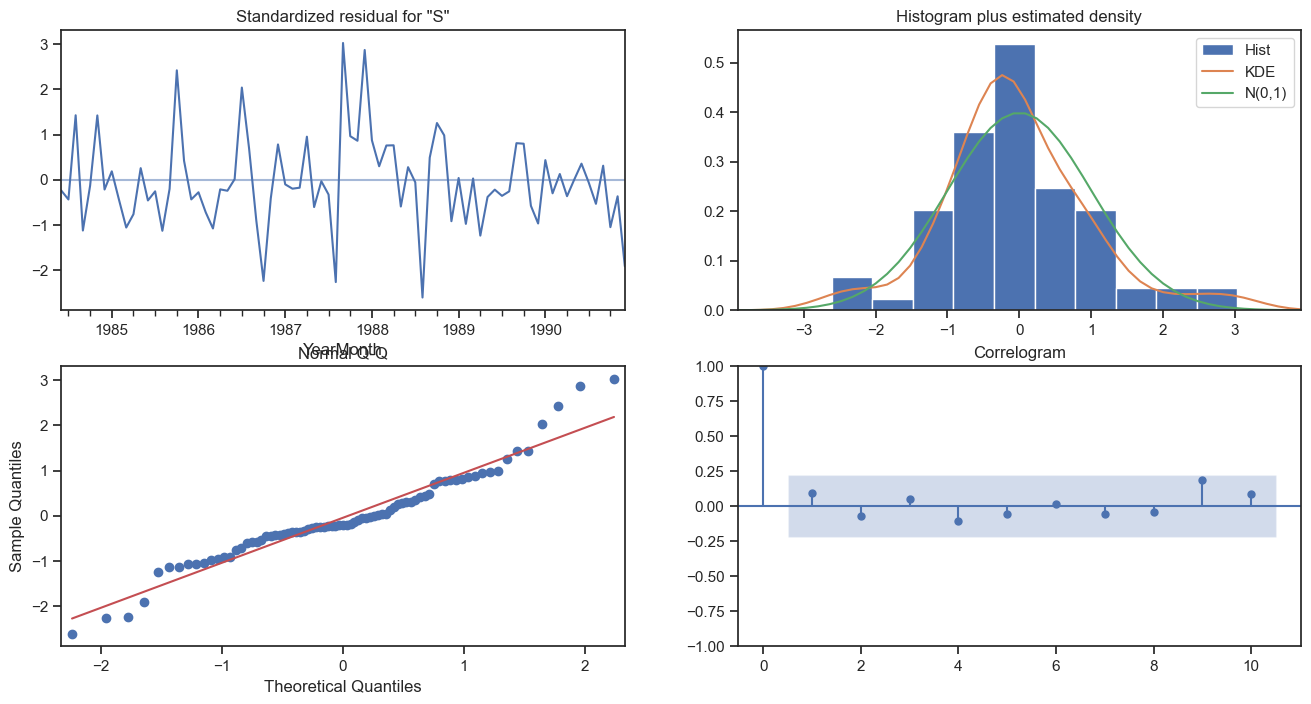

In [140]:
results_auto_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [141]:
predicted_auto_SARIMA_6 = results_auto_SARIMA.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1190.581498  448.873039     310.806508    2070.356488
1991-02-28   968.313061  448.618354      89.037245    1847.588877
1991-03-31  1400.634232  452.178984     514.379709    2286.888755
1991-04-30  1274.802863  455.664763     381.716339    2167.889387
1991-05-31  1190.214253  459.458800     289.691553    2090.736954

In [142]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print('RMSE for Auto SARIMA model for test data: ',rmse)

RMSE for Auto SARIMA model for test data:  2297.6862838489883


In [143]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['order=(0,2,2),seasonal_order=(0, 2, 2, 12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2, 1, 2)                                 1299.979898
order=(0,2,2),seasonal_order=(0, 2, 2, 12),Auto...  2297.686284

In [144]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average                                      1275.081804
6pointTrailingMovingAverage                         1283.927428
Auto ARIMA(2, 1, 2)                                 1299.979898
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
Linear Regression                                   1386.836243
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
order=(0,2,2),seasonal_order=(0, 2, 2, 12),Auto...  2297.686284
Naive Model                                         3864.279352

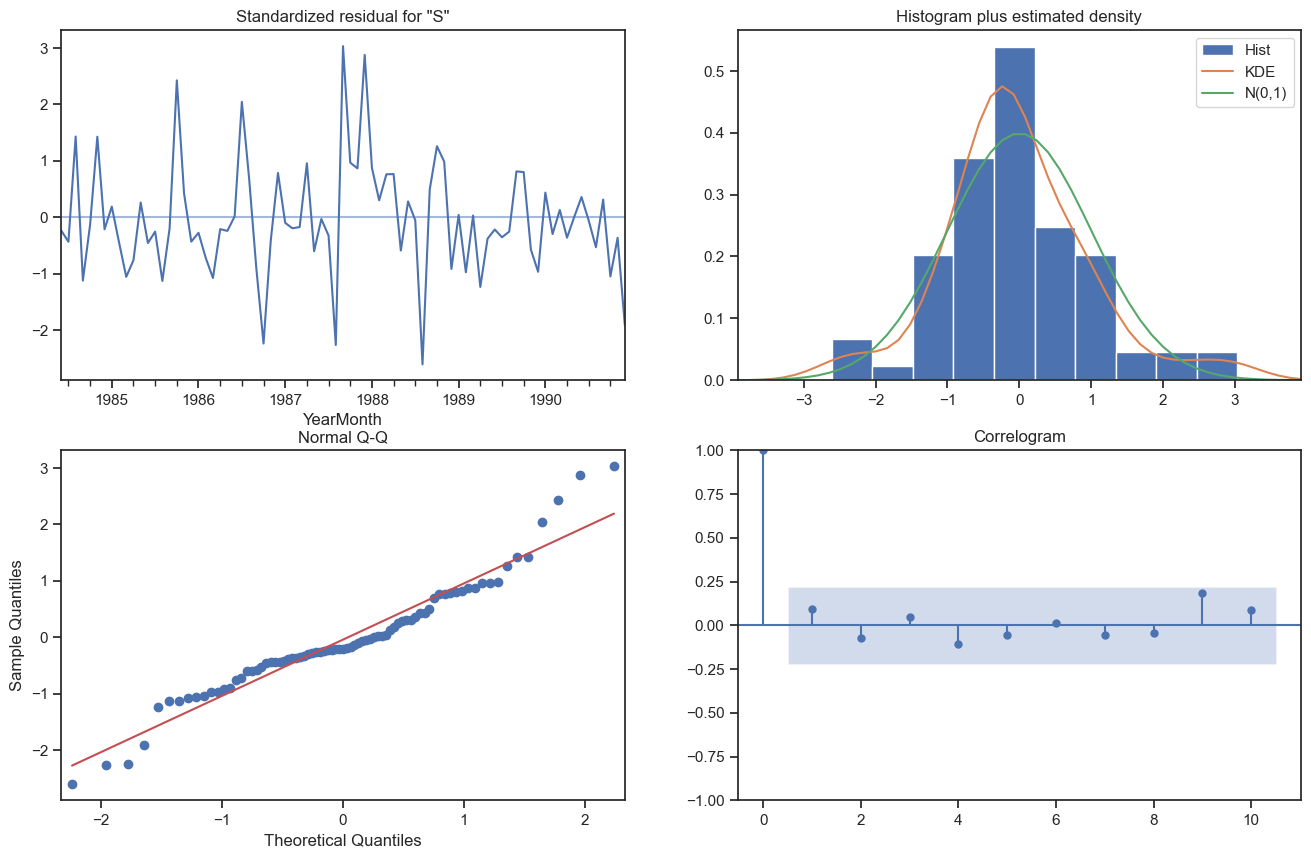

In [145]:
results_auto_SARIMA.plot_diagnostics(figsize=(16, 10))
plt.show()

### Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE

Manual ARIMA

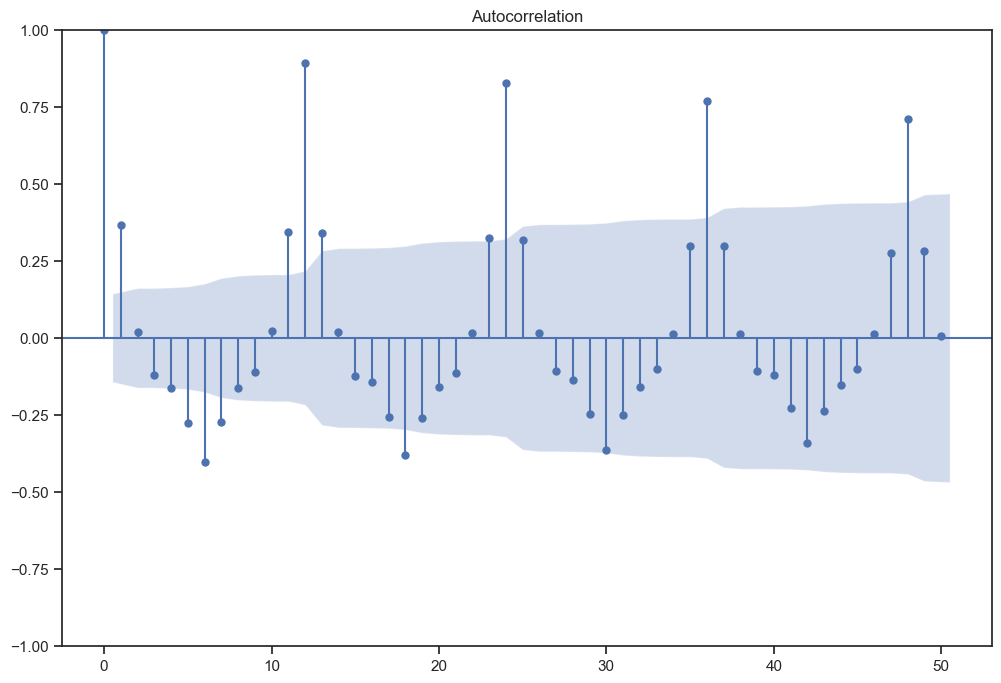

In [146]:
plt.figure(figsize=(12,8))
plot_acf(df['Sparkling'],lags=50,  ax=plt.gca())
plt.show()

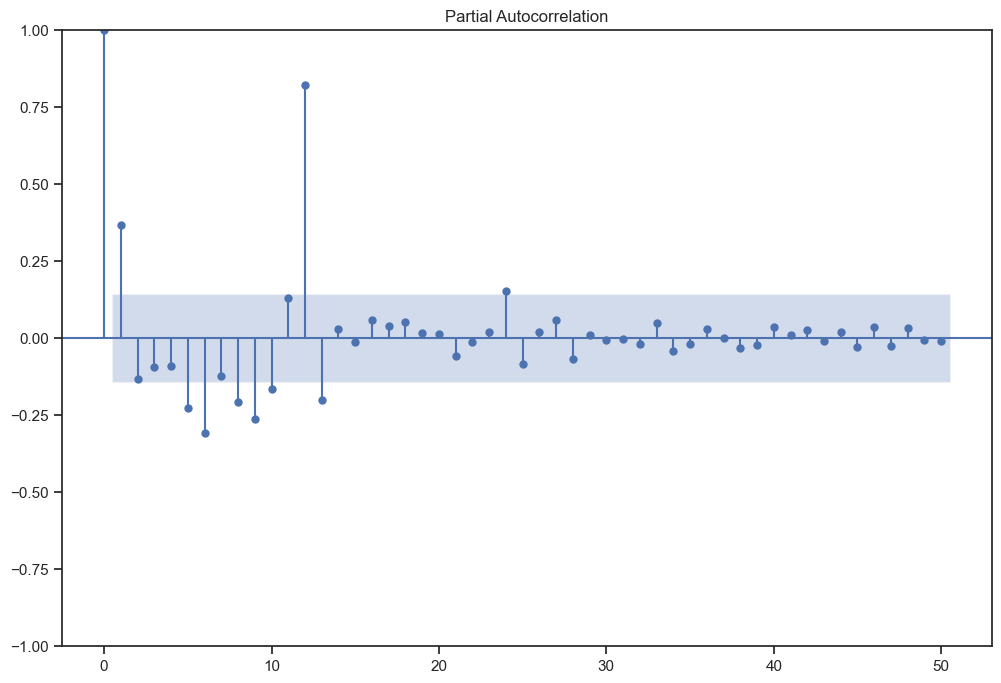

In [147]:
plt.figure(figsize=(12,8))
plot_pacf(df['Sparkling'], lags=50, ax=plt.gca())
plt.show()

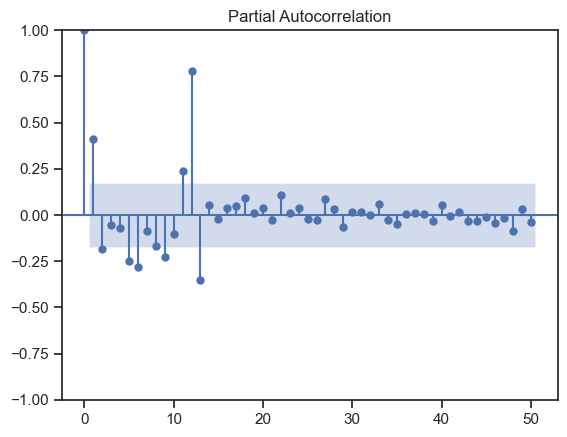

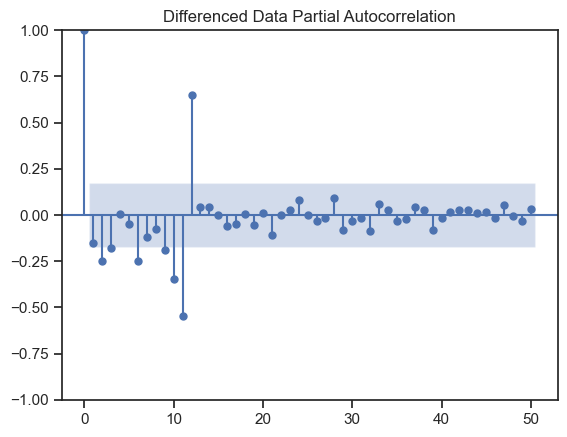

In [148]:
plot_pacf(train['Sparkling'],lags=50)
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [149]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1112.750
Date:                Sun, 26 May 2024   AIC                           2235.499
Time:                        20:41:32   BIC                           2249.875
Sample:                    01-31-1980   HQIC                          2241.341
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5102      0.119      4.294      0.000       0.277       0.743
ar.L2         -0.1560      0.206     -0.756      0.449      -0.560       0.248
ar.L3         -0.0469      0.195     -0.241      0.8

In [150]:
# Forecast using the fitted model
predicted_manual_ARIMA = results_manual_ARIMA.get_forecast(steps=len(test))
forecast_manual_ARIMA = predicted_manual_ARIMA.predicted_mean


In [151]:
# Calculate the RMSE
rmse_manual_ARIMA = np.sqrt(mean_squared_error(test['Sparkling'].values, forecast_manual_ARIMA))

print(f'RMSE for manual ARIMA model: {rmse_manual_ARIMA}')


RMSE for manual ARIMA model: 1297.1152862087922


In [152]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse_manual_ARIMA}
                           ,index=['order=(1, 1, 1) - Manual ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2, 1, 2)                                 1299.979898
order=(0,2,2),seasonal_order=(0, 2, 2, 12),Auto...  2297.686284
order=(1, 1, 1) - Manual ARIMA                      1297.115286

In [153]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average                                      1275.081804
6pointTrailingMovingAverage                         1283.927428
order=(1, 1, 1) - Manual ARIMA                      1297.115286
Auto ARIMA(2, 1, 2)                                 1299.979898
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
Linear Regression                                   1386.836243
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
order=(0,2,2),seasonal_order=(0, 2, 2, 12),Auto...  2297.686284
Naive Model                                         3864.279352

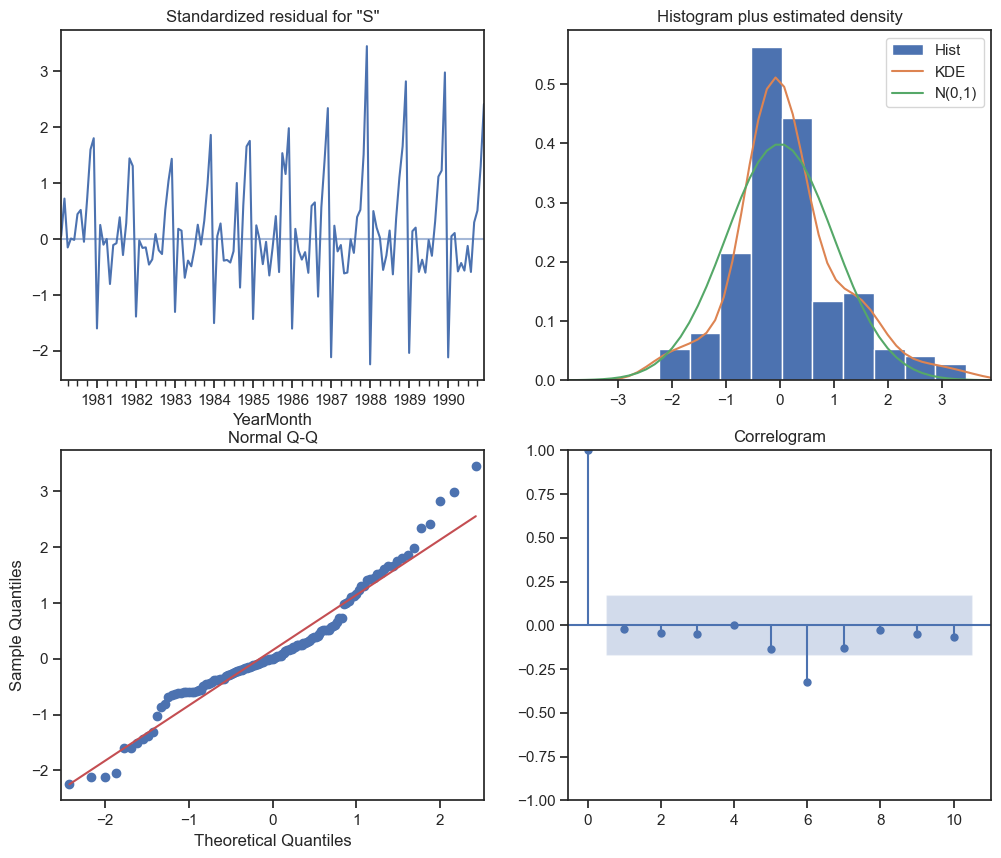

In [154]:
results_manual_ARIMA.plot_diagnostics(figsize=(12, 10))
plt.show()

### Manual SARIMA

In [155]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the parameters for the SARIMA model
param = (1, 2, 2)  # Example values for (p, d, q)
param_seasonal = (1, 2, 2, 12)  # Example values for (P, D, Q, s)

# Fit the SARIMA model with specified parameters
SARIMA_model_manual = SARIMAX(train['Sparkling'].values,
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

results_manual_SARIMA = SARIMA_model_manual.fit(maxiter=1000)

# Forecast using the fitted model
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
forecast_manual_SARIMA = predicted_manual_SARIMA.predicted_mean




 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09575D+00    |proj g|=  2.66766D-01

At iterate    5    f=  4.80993D+00    |proj g|=  3.09794D-02

At iterate   10    f=  4.77377D+00    |proj g|=  1.02281D-01

At iterate   15    f=  4.76086D+00    |proj g|=  2.60092D-02

At iterate   20    f=  4.75095D+00    |proj g|=  4.91223D-02

At iterate   25    f=  4.74184D+00    |proj g|=  1.42894D-02

At iterate   30    f=  4.74171D+00    |proj g|=  4.58304D-04

At iterate   35    f=  4.74170D+00    |proj g|=  2.14787D-02

At iterate   40    f=  4.74165D+00    |proj g|=  4.41625D-03

At iterate   45    f=  4.74006D+00    |proj g|=  1.26006D-01

At iterate   50    f=  4.61533D+00    |proj g|=  7.21908D-01

At iterate   55    f=  4.55271D+00    |proj g|=  1.28234D-01

At iterate   60    f=  4.55136D+00    |proj g|=  9.70277D-03

At iterate   65    f=  4.5

In [156]:
# Calculate the RMSE
rmse_manual_SARIMA = np.sqrt(mean_squared_error(test['Sparkling'].values, forecast_manual_SARIMA))

print(f'RMSE for manual SARIMA model: {rmse_manual_SARIMA}')


RMSE for manual SARIMA model: 1976.951890241937


In [157]:
# Optionally, print the forecast summary frame
forecast_manual_SARIMA_df = predicted_manual_SARIMA.summary_frame(alpha=0.05)
print(forecast_manual_SARIMA_df.head())


y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1191.882149  443.917780     321.819288    2061.945009
1  1016.081183  449.718735     134.648659    1897.513708
2  1483.245318  452.023954     597.294648    2369.195988
3  1357.188271  453.543440     468.259462    2246.117079
4  1279.355792  455.072590     387.429905    2171.281679


In [158]:
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -600.168
Date:                            Sun, 26 May 2024   AIC                           1214.336
Time:                                    20:41:39   BIC                           1230.922
Sample:                                         0   HQIC                          1220.981
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1457      0.146      0.998      0.318      -0.140       0.432
ma.L1         -2.0023      7.977   

In [159]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse_manual_SARIMA}
                           ,index=['order=(1, 2, 2),seasonal_order=(1, 2, 2, 12),Manual SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   1386.836243
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2, 1, 2)                                 1299.979898
order=(0,2,2),seasonal_order=(0, 2, 2, 12),Auto...  2297.686284
order=(1, 1, 1) - Manual ARIMA                      1297.115286
order=(1, 2, 2),seasonal_order=(1, 2, 2, 12),Ma...  1976.951890

In [160]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average                                      1275.081804
6pointTrailingMovingAverage                         1283.927428
order=(1, 1, 1) - Manual ARIMA                      1297.115286
Auto ARIMA(2, 1, 2)                                 1299.979898
Alpha=0.0395,SimpleExponentialSmoothing             1304.927405
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,Beta=0.1, Double Exponential Smoothin...  1382.520870
Linear Regression                                   1386.836243
𝛼-0.1 and 𝛽-0.1 Double Exponential Smoothing Model  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1778.564670
order=(1, 2, 2),seasonal_order=(1, 2, 2, 12),Ma...  1976.951890
order=(0,2,2),seasonal_order=(0, 2, 2, 12),Auto...  2297.686284
Naive Model                                         3864.279352

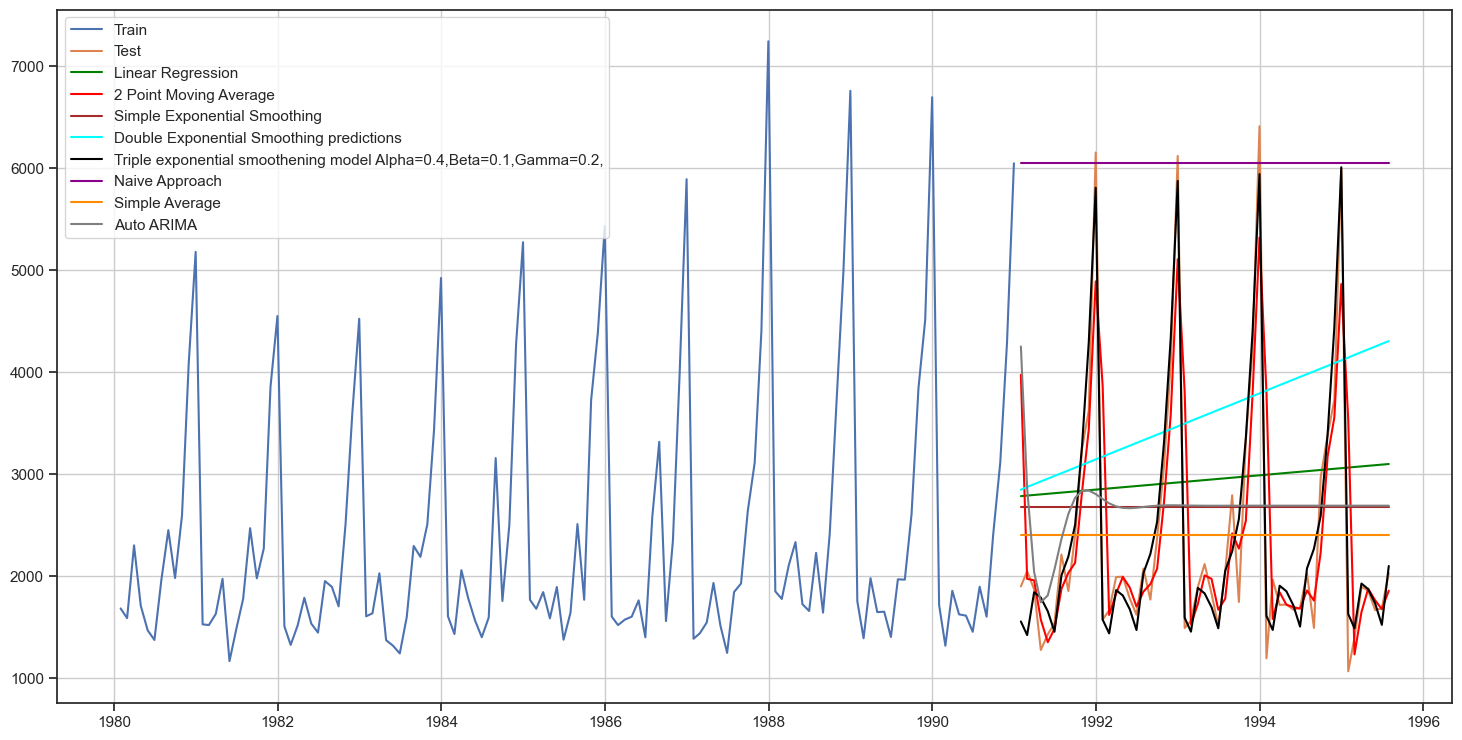

In [174]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_ta_sm',0.4,0.1,0.2], label='Triple exponential smoothening model Alpha=0.4,Beta=0.1,Gamma=0.2,', color='black')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto ARIMA', color='gray')


plt.legend(loc='best')
plt.grid();

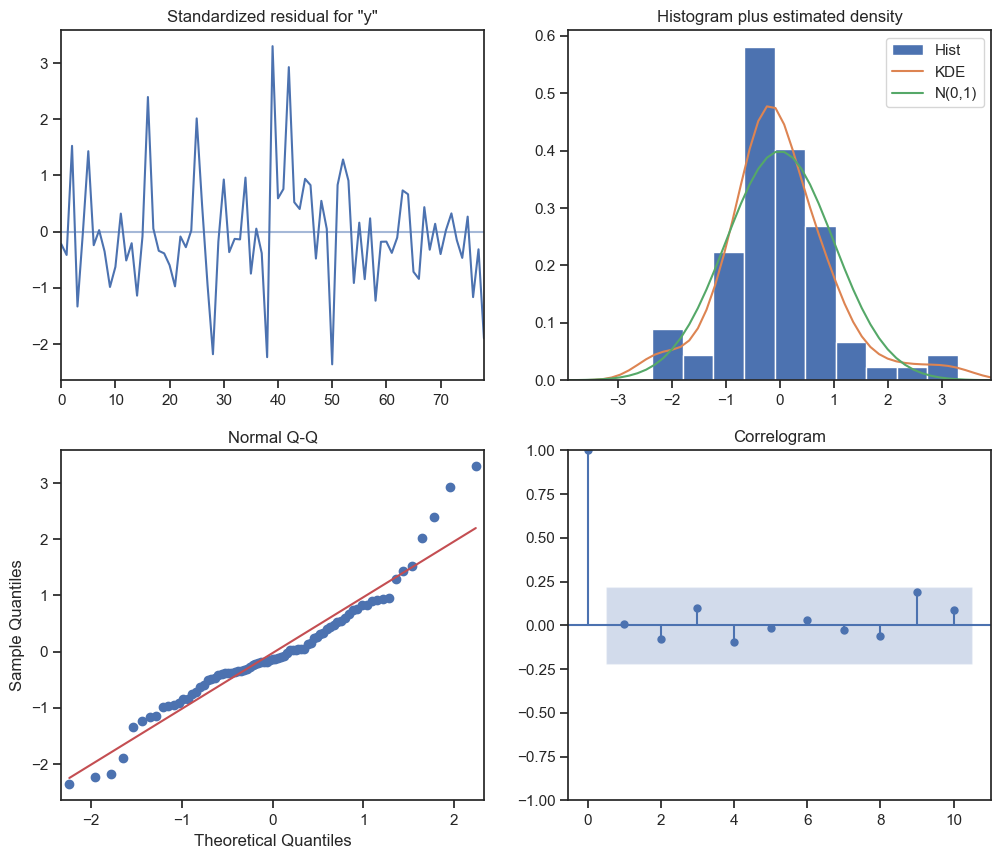

In [175]:
results_manual_SARIMA.plot_diagnostics(figsize=(12, 10))
plt.show()

### Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [176]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [177]:
future_predictions=pd.DataFrame(columns=['Future_Sparkling'],index=date)

In [178]:
TES_train = df.copy()

In [179]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [180]:
future_predictions['Future_Sparkling']=prediction
future_predictions

Future_Sparkling
1995-08-01               NaN
1995-09-01               NaN
1995-10-01               NaN
1995-11-01               NaN
1995-12-01               NaN
1996-01-01               NaN
1996-02-01               NaN
1996-03-01               NaN
1996-04-01               NaN
1996-05-01               NaN
1996-06-01               NaN
1996-07-01               NaN

               Forecast  Lower Bound  Upper Bound
1995-08-31  2124.572947  1381.254048  2867.891847
1995-09-30  2203.468063  1460.149163  2946.786963
1995-10-31  2974.840500  2231.521600  3718.159400
1995-11-30  3962.065362  3218.746462  4705.384262
1995-12-31  5649.728868  4906.409968  6393.047768
1996-01-31  1504.266000   760.947100  2247.584900
1996-02-29  1558.771788   815.452888  2302.090688
1996-03-31  1821.925572  1078.606672  2565.244472
1996-04-30  1753.628758  1010.309858  2496.947658
1996-05-31  1570.069307   826.750407  2313.388207
1996-06-30  1467.952120   724.633220  2211.271020
1996-07-31  1918.096927  1174.778027  2661.415827


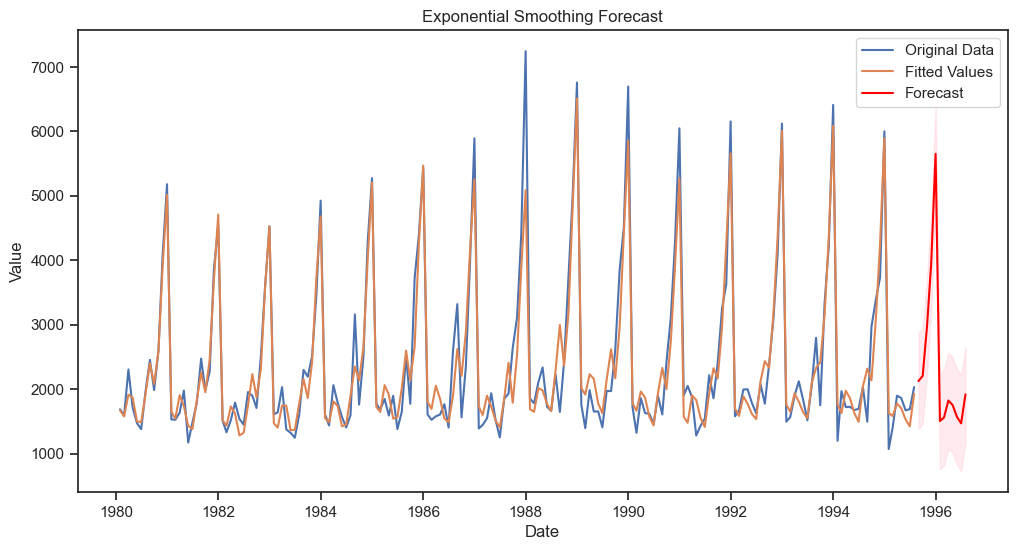

In [181]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


# Fit the Exponential Smoothing model
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sparkling'],
                                       trend='additive',
                                       seasonal='multiplicative',
                                       seasonal_periods=12)
fit_TES_ta_sm = model_TES_ta_sm.fit(smoothing_level=0.1, 
                                    smoothing_slope=0.2, 
                                    smoothing_seasonal=0.1, 
                                    optimized=False)

# Make predictions for the next 12 months
predictions_TES_ta_sm = fit_TES_ta_sm.forecast(steps=12)

# Calculate standard error of the residuals
residuals = fit_TES_ta_sm.resid
se = np.sqrt(np.sum(residuals**2) / len(TES_train))

# Calculate the confidence intervals
confidence_interval = 1.96 * se
lower_bounds = predictions_TES_ta_sm - confidence_interval
upper_bounds = predictions_TES_ta_sm + confidence_interval

# Combine forecasts and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({'Forecast': predictions_TES_ta_sm, 
                            'Lower Bound': lower_bounds, 
                            'Upper Bound': upper_bounds})

# Print the forecasted values and confidence intervals
print(forecast_df)

# Plot the original data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(TES_train['Sparkling'], label='Original Data')
plt.plot(fit_TES_ta_sm.fittedvalues, label='Fitted Values')
plt.plot(predictions_TES_ta_sm, label='Forecast', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['Lower Bound'],
                 forecast_df['Upper Bound'],
                 color='pink', alpha=0.3)
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [167]:
forecast_df.head()

Forecast  Lower Bound  Upper Bound
1995-08-31  2124.572947  1381.254048  2867.891847
1995-09-30  2203.468063  1460.149163  2946.786963
1995-10-31  2974.840500  2231.521600  3718.159400
1995-11-30  3962.065362  3218.746462  4705.384262
1995-12-31  5649.728868  4906.409968  6393.047768

In [182]:
predictions_TES_ta_sm

1995-08-31    2124.572947
1995-09-30    2203.468063
1995-10-31    2974.840500
1995-11-30    3962.065362
1995-12-31    5649.728868
1996-01-31    1504.266000
1996-02-29    1558.771788
1996-03-31    1821.925572
1996-04-30    1753.628758
1996-05-31    1570.069307
1996-06-30    1467.952120
1996-07-31    1918.096927
Freq: M, dtype: float64